# 2nd approach to Facial Emotion Recognition


In [1]:
import numpy as np
import cv2 as cv
import pandas as pd
import dlib
from imutils import face_utils
from sklearn.preprocessing import normalize
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.spatial.distance import pdist
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import matthews_corrcoef
from matplotlib import pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
from skorch import NeuralNetClassifier
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

## Preproccessing

First the dataset will be loaded.

In [2]:
x = [0]*980
y = [0]*980
from os import listdir
path = 'KDEF_and_AKDEF/KDEF'
folders = listdir(path)
c = 0
for f in folders:
    files = listdir(path + '/'+ f)
    for fi in files:
        if fi[6] == 'S':
            x[c] = cv.imread((path + '/' + f + '/' + fi))
            print(path + '/' + f + '/' + fi)
            y[c] = fi[4:6]
            c += 1

KDEF_and_AKDEF/KDEF/AF01/AF01AFS.JPG
KDEF_and_AKDEF/KDEF/AF01/AF01ANS.JPG
KDEF_and_AKDEF/KDEF/AF01/AF01DIS.JPG
KDEF_and_AKDEF/KDEF/AF01/AF01HAS.JPG
KDEF_and_AKDEF/KDEF/AF01/AF01NES.JPG
KDEF_and_AKDEF/KDEF/AF01/AF01SAS.JPG
KDEF_and_AKDEF/KDEF/AF01/AF01SUS.JPG
KDEF_and_AKDEF/KDEF/AF02/AF02AFS.JPG
KDEF_and_AKDEF/KDEF/AF02/AF02ANS.JPG
KDEF_and_AKDEF/KDEF/AF02/AF02DIS.JPG
KDEF_and_AKDEF/KDEF/AF02/AF02HAS.JPG
KDEF_and_AKDEF/KDEF/AF02/AF02NES.JPG
KDEF_and_AKDEF/KDEF/AF02/AF02SAS.JPG
KDEF_and_AKDEF/KDEF/AF02/AF02SUS.JPG
KDEF_and_AKDEF/KDEF/AF03/AF03AFS.JPG
KDEF_and_AKDEF/KDEF/AF03/AF03ANS.JPG
KDEF_and_AKDEF/KDEF/AF03/AF03DIS.JPG
KDEF_and_AKDEF/KDEF/AF03/AF03HAS.JPG
KDEF_and_AKDEF/KDEF/AF03/AF03NES.JPG
KDEF_and_AKDEF/KDEF/AF03/AF03SAS.JPG
KDEF_and_AKDEF/KDEF/AF03/AF03SUS.JPG
KDEF_and_AKDEF/KDEF/AF04/AF04AFS.JPG
KDEF_and_AKDEF/KDEF/AF04/AF04ANS.JPG
KDEF_and_AKDEF/KDEF/AF04/AF04DIS.JPG
KDEF_and_AKDEF/KDEF/AF04/AF04HAS.JPG
KDEF_and_AKDEF/KDEF/AF04/AF04NES.JPG
KDEF_and_AKDEF/KDEF/AF04/AF04SAS.JPG
K

KDEF_and_AKDEF/KDEF/AF32/AF32NES.JPG
KDEF_and_AKDEF/KDEF/AF32/AF32SAS.JPG
KDEF_and_AKDEF/KDEF/AF32/AF32SUS.JPG
KDEF_and_AKDEF/KDEF/AF33/AF33AFS.JPG
KDEF_and_AKDEF/KDEF/AF33/AF33ANS.JPG
KDEF_and_AKDEF/KDEF/AF33/AF33DIS.JPG
KDEF_and_AKDEF/KDEF/AF33/AF33HAS.JPG
KDEF_and_AKDEF/KDEF/AF33/AF33NES.JPG
KDEF_and_AKDEF/KDEF/AF33/AF33SAS.JPG
KDEF_and_AKDEF/KDEF/AF33/AF33SUS.JPG
KDEF_and_AKDEF/KDEF/AF34/AF34AFS.JPG
KDEF_and_AKDEF/KDEF/AF34/AF34ANS.JPG
KDEF_and_AKDEF/KDEF/AF34/AF34DIS.JPG
KDEF_and_AKDEF/KDEF/AF34/AF34HAS.JPG
KDEF_and_AKDEF/KDEF/AF34/AF34NES.JPG
KDEF_and_AKDEF/KDEF/AF34/AF34SAS.JPG
KDEF_and_AKDEF/KDEF/AF34/AF34SUS.JPG
KDEF_and_AKDEF/KDEF/AF35/AF35AFS.JPG
KDEF_and_AKDEF/KDEF/AF35/AF35ANS.JPG
KDEF_and_AKDEF/KDEF/AF35/AF35DIS.JPG
KDEF_and_AKDEF/KDEF/AF35/AF35HAS.JPG
KDEF_and_AKDEF/KDEF/AF35/AF35NES.JPG
KDEF_and_AKDEF/KDEF/AF35/AF35SAS.JPG
KDEF_and_AKDEF/KDEF/AF35/AF35SUS.JPG
KDEF_and_AKDEF/KDEF/AM01/AM01AFS.JPG
KDEF_and_AKDEF/KDEF/AM01/AM01ANS.JPG
KDEF_and_AKDEF/KDEF/AM01/AM01DIS.JPG
K

KDEF_and_AKDEF/KDEF/AM29/AM29ANS.JPG
KDEF_and_AKDEF/KDEF/AM29/AM29DIS.JPG
KDEF_and_AKDEF/KDEF/AM29/AM29HAS.JPG
KDEF_and_AKDEF/KDEF/AM29/AM29NES.JPG
KDEF_and_AKDEF/KDEF/AM29/AM29SAS.JPG
KDEF_and_AKDEF/KDEF/AM29/AM29SUS.JPG
KDEF_and_AKDEF/KDEF/AM30/AM30AFS.JPG
KDEF_and_AKDEF/KDEF/AM30/AM30ANS.JPG
KDEF_and_AKDEF/KDEF/AM30/AM30DIS.JPG
KDEF_and_AKDEF/KDEF/AM30/AM30HAS.JPG
KDEF_and_AKDEF/KDEF/AM30/AM30NES.JPG
KDEF_and_AKDEF/KDEF/AM30/AM30SAS.JPG
KDEF_and_AKDEF/KDEF/AM30/AM30SUS.JPG
KDEF_and_AKDEF/KDEF/AM31/AM31AFS.JPG
KDEF_and_AKDEF/KDEF/AM31/AM31ANS.JPG
KDEF_and_AKDEF/KDEF/AM31/AM31DIS.JPG
KDEF_and_AKDEF/KDEF/AM31/AM31HAS.JPG
KDEF_and_AKDEF/KDEF/AM31/AM31NES.JPG
KDEF_and_AKDEF/KDEF/AM31/AM31SAS.JPG
KDEF_and_AKDEF/KDEF/AM31/AM31SUS.JPG
KDEF_and_AKDEF/KDEF/AM32/AM32AFS.JPG
KDEF_and_AKDEF/KDEF/AM32/AM32ANS.JPG
KDEF_and_AKDEF/KDEF/AM32/AM32DIS.JPG
KDEF_and_AKDEF/KDEF/AM32/AM32HAS.JPG
KDEF_and_AKDEF/KDEF/AM32/AM32NES.JPG
KDEF_and_AKDEF/KDEF/AM32/AM32SAS.JPG
KDEF_and_AKDEF/KDEF/AM32/AM32SUS.JPG
K

KDEF_and_AKDEF/KDEF/BF25/BF25SAS.JPG
KDEF_and_AKDEF/KDEF/BF25/BF25SUS.JPG
KDEF_and_AKDEF/KDEF/BF26/BF26AFS.JPG
KDEF_and_AKDEF/KDEF/BF26/BF26ANS.JPG
KDEF_and_AKDEF/KDEF/BF26/BF26DIS.JPG
KDEF_and_AKDEF/KDEF/BF26/BF26HAS.JPG
KDEF_and_AKDEF/KDEF/BF26/BF26NES.JPG
KDEF_and_AKDEF/KDEF/BF26/BF26SAS.JPG
KDEF_and_AKDEF/KDEF/BF26/BF26SUS.JPG
KDEF_and_AKDEF/KDEF/BF27/BF27AFS.JPG
KDEF_and_AKDEF/KDEF/BF27/BF27ANS.JPG
KDEF_and_AKDEF/KDEF/BF27/BF27DIS.JPG
KDEF_and_AKDEF/KDEF/BF27/BF27HAS.JPG
KDEF_and_AKDEF/KDEF/BF27/BF27NES.JPG
KDEF_and_AKDEF/KDEF/BF27/BF27SAS.JPG
KDEF_and_AKDEF/KDEF/BF27/BF27SUS.JPG
KDEF_and_AKDEF/KDEF/BF28/BF28AFS.JPG
KDEF_and_AKDEF/KDEF/BF28/BF28ANS.JPG
KDEF_and_AKDEF/KDEF/BF28/BF28DIS.JPG
KDEF_and_AKDEF/KDEF/BF28/BF28HAS.JPG
KDEF_and_AKDEF/KDEF/BF28/BF28NES.JPG
KDEF_and_AKDEF/KDEF/BF28/BF28SAS.JPG
KDEF_and_AKDEF/KDEF/BF28/BF28SUS.JPG
KDEF_and_AKDEF/KDEF/BF29/BF29AFS.JPG
KDEF_and_AKDEF/KDEF/BF29/BF29ANS.JPG
KDEF_and_AKDEF/KDEF/BF29/BF29DIS.JPG
KDEF_and_AKDEF/KDEF/BF29/BF29HAS.JPG
K

KDEF_and_AKDEF/KDEF/BM22/BM22DIS.JPG
KDEF_and_AKDEF/KDEF/BM22/BM22HAS.JPG
KDEF_and_AKDEF/KDEF/BM22/BM22NES.JPG
KDEF_and_AKDEF/KDEF/BM22/BM22SAS.JPG
KDEF_and_AKDEF/KDEF/BM22/BM22SUS.JPG
KDEF_and_AKDEF/KDEF/BM23/BM23AFS.JPG
KDEF_and_AKDEF/KDEF/BM23/BM23ANS.JPG
KDEF_and_AKDEF/KDEF/BM23/BM23DIS.JPG
KDEF_and_AKDEF/KDEF/BM23/BM23HAS.JPG
KDEF_and_AKDEF/KDEF/BM23/BM23NES.JPG
KDEF_and_AKDEF/KDEF/BM23/BM23SAS.JPG
KDEF_and_AKDEF/KDEF/BM23/BM23SUS.JPG
KDEF_and_AKDEF/KDEF/BM24/BM24AFS.JPG
KDEF_and_AKDEF/KDEF/BM24/BM24ANS.JPG
KDEF_and_AKDEF/KDEF/BM24/BM24DIS.JPG
KDEF_and_AKDEF/KDEF/BM24/BM24HAS.JPG
KDEF_and_AKDEF/KDEF/BM24/BM24NES.JPG
KDEF_and_AKDEF/KDEF/BM24/BM24SAS.JPG
KDEF_and_AKDEF/KDEF/BM24/BM24SUS.JPG
KDEF_and_AKDEF/KDEF/BM25/BM25AFS.JPG
KDEF_and_AKDEF/KDEF/BM25/BM25ANS.JPG
KDEF_and_AKDEF/KDEF/BM25/BM25DIS.JPG
KDEF_and_AKDEF/KDEF/BM25/BM25HAS.JPG
KDEF_and_AKDEF/KDEF/BM25/BM25NES.JPG
KDEF_and_AKDEF/KDEF/BM25/BM25SAS.JPG
KDEF_and_AKDEF/KDEF/BM25/BM25SUS.JPG
KDEF_and_AKDEF/KDEF/BM26/BM26AFS.JPG
K

In [3]:
len(x)

980

In [4]:
y

['AF',
 'AN',
 'DI',
 'HA',
 'NE',
 'SA',
 'SU',
 'AF',
 'AN',
 'DI',
 'HA',
 'NE',
 'SA',
 'SU',
 'AF',
 'AN',
 'DI',
 'HA',
 'NE',
 'SA',
 'SU',
 'AF',
 'AN',
 'DI',
 'HA',
 'NE',
 'SA',
 'SU',
 'AF',
 'AN',
 'DI',
 'HA',
 'NE',
 'SA',
 'SU',
 'AF',
 'AN',
 'DI',
 'HA',
 'NE',
 'SA',
 'SU',
 'AF',
 'AN',
 'DI',
 'HA',
 'NE',
 'SA',
 'SU',
 'AF',
 'AN',
 'DI',
 'HA',
 'NE',
 'SA',
 'SU',
 'AF',
 'AN',
 'DI',
 'HA',
 'NE',
 'SA',
 'SU',
 'AF',
 'AN',
 'DI',
 'HA',
 'NE',
 'SA',
 'SU',
 'AF',
 'AN',
 'DI',
 'HA',
 'NE',
 'SA',
 'SU',
 'AF',
 'AN',
 'DI',
 'HA',
 'NE',
 'SA',
 'SU',
 'AF',
 'AN',
 'DI',
 'HA',
 'NE',
 'SA',
 'SU',
 'AF',
 'AN',
 'DI',
 'HA',
 'NE',
 'SA',
 'SU',
 'AF',
 'AN',
 'DI',
 'HA',
 'NE',
 'SA',
 'SU',
 'AF',
 'AN',
 'DI',
 'HA',
 'NE',
 'SA',
 'SU',
 'AF',
 'AN',
 'DI',
 'HA',
 'NE',
 'SA',
 'SU',
 'AF',
 'AN',
 'DI',
 'HA',
 'NE',
 'SA',
 'SU',
 'AF',
 'AN',
 'DI',
 'HA',
 'NE',
 'SA',
 'SU',
 'AF',
 'AN',
 'DI',
 'HA',
 'NE',
 'SA',
 'SU',
 'AF',
 'AN',
 'DI',

In [5]:
y = np.array(y)
#y[y != 'NE']

Now 68 points on each face will be located.

In [6]:
# initialize dlib's face detector (HOG-based) and then create
# the facial landmark predictor
p = "shape_predictor_68_face_landmarks.dat"
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(p)

In [7]:
def preproc(x):
    desf = [0]*len(x)
    c = 0
    for image in x:
        
        # A 3x3 Gaussian Blur will now be applied
        image = cv.GaussianBlur(image, (3,3), 0)
        
        # Now need to apply a Contrast Adaptive Histogran Equalization
        image2 = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
        clahe = cv.createCLAHE(clipLimit=4, tileGridSize=(8,8))
        cl1 = clahe.apply(image2.copy())
        
        # detect faces in the grayscale image
        rects = detector(cl1, 0)
        
        # loop over the face detections
        for (i, rect) in enumerate(rects):
            # determine the facial landmarks for the face region, then
            # convert the facial landmark (x, y)-coordinates to a NumPy
            # array
            shape = predictor(cl1, rect)
            shape = face_utils.shape_to_np(shape)
            
        desf[c] = shape
        c += 1
    return(desf)

In [8]:
desf = preproc(x)

In [9]:
desf = np.array(desf)
desf

array([[[124, 373],
        [127, 413],
        [135, 453],
        ...,
        [296, 542],
        [280, 545],
        [264, 542]],

       [[114, 367],
        [118, 410],
        [128, 451],
        ...,
        [296, 547],
        [282, 549],
        [266, 546]],

       [[129, 374],
        [132, 412],
        [140, 448],
        ...,
        [299, 521],
        [282, 523],
        [264, 521]],

       ...,

       [[117, 370],
        [121, 415],
        [128, 458],
        ...,
        [298, 544],
        [285, 546],
        [271, 545]],

       [[122, 405],
        [129, 445],
        [137, 481],
        ...,
        [297, 529],
        [284, 531],
        [269, 530]],

       [[113, 388],
        [119, 433],
        [129, 475],
        ...,
        [300, 550],
        [286, 552],
        [272, 551]]])

Now the neutral face class will be removed after the displacement from the nueral faces are determined. 

In [10]:
res = [0]*980
def feat(v1, v2):
    result = [0]*len(v1)
    for i in range(len(v1)):
        result[i] = np.linalg.norm(v1[i]-v2[i])
    result = np.array(result)
    return result
for i in range(0, len(desf), 7):
    res[i] = feat(desf[i], desf[i+4])
    res[i+1] = feat(desf[i+1], desf[i+4])
    res[i+2] = feat(desf[i+2], desf[i+4])
    res[i+3] = feat(desf[i+3], desf[i+4])
    res[i+4] = np.array([0]*len(desf[0]))
    res[i+5] = feat(desf[i+5], desf[i+4])
    res[i+6] = feat(desf[i+6], desf[i+4])
res = np.array(res)
neutral_indices = y!='NE'
y = y[neutral_indices]
res = res[neutral_indices]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(res, y, test_size=0.1, random_state=42)

In [12]:
len(X_train)

756

In [13]:
len(y_train)

756

In [14]:
X_train

array([[ 3.60555128,  2.82842712,  2.23606798, ...,  7.81024968,
         4.12310563,  6.70820393],
       [ 7.        ,  8.06225775, 10.63014581, ...,  8.48528137,
         6.        ,  5.        ],
       [22.13594362, 17.2626765 , 12.04159458, ..., 10.63014581,
         8.        , 10.        ],
       ...,
       [ 8.60232527,  7.81024968,  9.8488578 , ...,  8.        ,
         7.28010989,  8.60232527],
       [ 2.23606798,  3.16227766,  3.16227766, ...,  8.94427191,
         9.05538514,  9.21954446],
       [ 9.21954446,  7.61577311,  6.32455532, ..., 38.20994635,
        37.12142239, 37.12142239]])

In [15]:
le = LabelEncoder()
le.fit(y_train)

LabelEncoder()

In [16]:
le.classes_

array(['AF', 'AN', 'DI', 'HA', 'SA', 'SU'], dtype='<U2')

In [17]:
len(le.classes_)

6

In [18]:
y_actual = le.transform(y_train) 

In [19]:
scaler = StandardScaler().fit(X_train)

In [20]:
scaler

StandardScaler(copy=True, with_mean=True, with_std=True)

In [21]:
scaler.mean_

array([13.4212468 , 12.53215287, 12.30133646, 12.36494283, 12.46424551,
       12.39781892, 12.75165178, 13.42837621, 13.94364526, 13.50389551,
       12.96401529, 12.5197699 , 12.4377812 , 12.0878501 , 11.8222716 ,
       12.0450053 , 13.08815201,  9.5147746 , 10.42083818, 11.16663643,
       11.36994764, 10.85015242, 11.14593426, 11.60185707, 11.31126404,
       10.19663181,  8.97577403,  5.00996417,  5.48640228,  6.98009636,
        8.84971507,  7.37795933,  6.65083427,  6.50755377,  6.73105837,
        7.65627738,  5.10428545,  5.189194  ,  4.61789274,  4.2478041 ,
        5.60133266,  6.13196626,  4.40580307,  4.77568802,  5.38316336,
        5.31268569,  6.15516776,  5.75065462, 14.92970013, 12.59719201,
       10.21048503, 10.20861452, 10.47567181, 12.90346069, 15.23270426,
       15.91684216, 16.85619951, 16.66561146, 16.64496189, 15.37643615,
       14.5995465 , 11.29173651, 10.92762198, 11.59126954, 15.05452864,
       15.63251388, 15.23017383, 15.35196299])

In [22]:
scaler.scale_

array([ 9.57798826,  8.87140114,  8.58138009,  8.483784  ,  8.66886368,
        8.96320588,  9.7506549 , 10.45196283, 10.80206208, 10.31876042,
        9.55721676,  8.8756141 ,  8.63547567,  8.36384994,  8.30621174,
        8.55637178,  9.18385181,  6.74572299,  6.96115787,  7.7875656 ,
        8.16784602,  7.88276278,  7.69437032,  7.98701541,  7.64678332,
        6.82478143,  6.42490435,  5.3921111 ,  5.75812503,  6.68621743,
        7.88969949,  6.17081385,  6.08541507,  6.26949007,  6.1176513 ,
        6.22413707,  5.18383988,  5.16649165,  5.01338821,  4.9151339 ,
        5.18054393,  5.36333776,  4.94215319,  5.08808128,  5.23966525,
        5.21383745,  5.47675654,  5.2897598 , 11.23714226,  9.3371541 ,
        7.67089019,  7.6233982 ,  7.61375695,  9.15370879, 11.06201428,
       11.69246165, 14.53970184, 14.91051751, 14.30329097, 11.3191613 ,
       10.78567362,  8.37556718,  8.07019721,  8.35819368, 10.72923382,
       12.97102639, 13.32467996, 12.84733455])

In [23]:
X_train = scaler.transform(X_train)

In [24]:
X_test = scaler.transform(X_test)

## SVM classifiers

In [25]:
clf = SVC(kernel='rbf')

params = {
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1, 10, 100],
    'C': [0.001, 0.01, 0.1, 1]
}

gs = RandomizedSearchCV(clf, params, refit=False, cv=10, scoring='accuracy', verbose=3, random_state=42) #verbose=2

gs.fit(X_train, y_actual)
print(gs.best_score_, gs.best_params_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] gamma=1, C=1 ....................................................
[CV] .......... gamma=1, C=1, score=0.16666666666666666, total=   0.0s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] gamma=1, C=1 ....................................................
[CV] ........... gamma=1, C=1, score=0.1794871794871795, total=   0.0s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV] gamma=1, C=1 ....................................................
[CV] .......... gamma=1, C=1, score=0.16883116883116883, total=   0.0s
[CV] gamma=1, C=1 ....................................................
[CV] .......... gamma=1, C=1, score=0.16883116883116883, total=   0.0s
[CV] gamma=1, C=1 ....................................................
[CV] .......... gamma=1, C=1, score=0.16883116883116883, total=   0.0s
[CV] gamma=1, C=1 ....................................................
[CV] .......... gamma=1, C=1, score=0.17105263157894737, total=   0.0s
[CV] gamma=1, C=1 ....................................................
[CV] .......... gamma=1, C=1, score=0.17567567567567569, total=   0.0s
[CV] gamma=1, C=1 ....................................................
[CV] .......... gamma=1, C=1, score=0.17567567567567569, total=   0.0s
[CV] gamma=1, C=1 ....................................................
[CV] ........... gamma=1, C=1, score=0.2054794520547945, total=   0.0s
[CV] g

[CV] .... gamma=auto, C=0.01, score=0.16666666666666666, total=   0.0s
[CV] gamma=10, C=1 ...................................................
[CV] ......... gamma=10, C=1, score=0.16666666666666666, total=   0.0s
[CV] gamma=10, C=1 ...................................................
[CV] ......... gamma=10, C=1, score=0.16666666666666666, total=   0.0s
[CV] gamma=10, C=1 ...................................................
[CV] ......... gamma=10, C=1, score=0.16883116883116883, total=   0.0s
[CV] gamma=10, C=1 ...................................................
[CV] ......... gamma=10, C=1, score=0.16883116883116883, total=   0.0s
[CV] gamma=10, C=1 ...................................................
[CV] ......... gamma=10, C=1, score=0.16883116883116883, total=   0.0s
[CV] gamma=10, C=1 ...................................................
[CV] ......... gamma=10, C=1, score=0.17105263157894737, total=   0.0s
[CV] gamma=10, C=1 ...................................................
[CV] .

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   12.7s finished
C:\Users\Manvir\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.6997354497354498 {'gamma': 'scale', 'C': 1}


In [26]:
clf = SVC(kernel='rbf', gamma='scale', C=1)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

In [27]:
confusion_matrix(y_test, pred, labels=le.classes_)

array([[ 8,  2,  0,  0,  2,  2],
       [ 0,  8,  1,  0,  2,  0],
       [ 1,  1,  9,  0,  3,  1],
       [ 0,  0,  0, 11,  1,  0],
       [ 1,  4,  0,  2,  6,  1],
       [ 3,  1,  0,  0,  0, 14]], dtype=int64)

In [28]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

          AF       0.62      0.57      0.59        14
          AN       0.50      0.73      0.59        11
          DI       0.90      0.60      0.72        15
          HA       0.85      0.92      0.88        12
          SA       0.43      0.43      0.43        14
          SU       0.78      0.78      0.78        18

   micro avg       0.67      0.67      0.67        84
   macro avg       0.68      0.67      0.67        84
weighted avg       0.69      0.67      0.67        84



In [29]:
matthews_corrcoef(y_test, pred)

0.6021212493973955

In [30]:
clf = SVC(kernel='poly')

params = {
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1, 10, 100],
    'degree': [0, 1, 2, 3, 4, 5, 6],
    'C': [0.001, 0.01, 0.1, 1]
}

gs = RandomizedSearchCV(clf, params, refit=False, cv=10, scoring='accuracy', verbose=3, random_state=42) #verbose=2

gs.fit(X_train, y_actual)
print(gs.best_score_, gs.best_params_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] gamma=auto, degree=1, C=0.001 ...................................
[CV]  gamma=auto, degree=1, C=0.001, score=0.16666666666666666, total=   0.0s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] gamma=auto, degree=1, C=0.001 ...................................
[CV]  gamma=auto, degree=1, C=0.001, score=0.16666666666666666, total=   0.0s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV] gamma=auto, degree=1, C=0.001 ...................................
[CV]  gamma=auto, degree=1, C=0.001, score=0.16883116883116883, total=   0.0s
[CV] gamma=auto, degree=1, C=0.001 ...................................
[CV]  gamma=auto, degree=1, C=0.001, score=0.16883116883116883, total=   0.0s
[CV] gamma=auto, degree=1, C=0.001 ...................................
[CV]  gamma=auto, degree=1, C=0.001, score=0.16883116883116883, total=   0.0s
[CV] gamma=auto, degree=1, C=0.001 ...................................
[CV]  gamma=auto, degree=1, C=0.001, score=0.17105263157894737, total=   0.0s
[CV] gamma=auto, degree=1, C=0.001 ...................................
[CV]  gamma=auto, degree=1, C=0.001, score=0.17567567567567569, total=   0.0s
[CV] gamma=auto, degree=1, C=0.001 ...................................
[CV]  gamma=auto, degree=1, C=0.001, score=0.17567567567567569, total=   0.0s
[CV] gamma=auto, degree=1, C=0.001 ...................................
[CV]  gamma=auto, degree=1, C=0.001

[CV] gamma=auto, degree=0, C=0.1 .....................................
[CV]  gamma=auto, degree=0, C=0.1, score=0.1643835616438356, total=   0.0s
[CV] gamma=auto, degree=0, C=0.1 .....................................
[CV]  gamma=auto, degree=0, C=0.1, score=0.16666666666666666, total=   0.0s
[CV] gamma=0.1, degree=1, C=0.01 .....................................
[CV]  gamma=0.1, degree=1, C=0.01, score=0.6025641025641025, total=   0.0s
[CV] gamma=0.1, degree=1, C=0.01 .....................................
[CV]  gamma=0.1, degree=1, C=0.01, score=0.5641025641025641, total=   0.0s
[CV] gamma=0.1, degree=1, C=0.01 .....................................
[CV]  gamma=0.1, degree=1, C=0.01, score=0.5844155844155844, total=   0.0s
[CV] gamma=0.1, degree=1, C=0.01 .....................................
[CV]  gamma=0.1, degree=1, C=0.01, score=0.6233766233766234, total=   0.0s
[CV] gamma=0.1, degree=1, C=0.01 .....................................
[CV]  gamma=0.1, degree=1, C=0.01, score=0.519480519

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    8.6s finished
C:\Users\Manvir\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.6838624338624338 {'gamma': 'auto', 'degree': 1, 'C': 1}


In [31]:
clf = SVC(kernel='poly', gamma='auto', degree=1, C=1)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

In [32]:
confusion_matrix(y_test, pred, labels=le.classes_)

array([[ 7,  2,  0,  0,  3,  2],
       [ 1,  8,  0,  0,  2,  0],
       [ 2,  1,  9,  0,  3,  0],
       [ 0,  0,  0, 11,  1,  0],
       [ 1,  2,  0,  2,  8,  1],
       [ 2,  1,  0,  0,  1, 14]], dtype=int64)

In [33]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

          AF       0.54      0.50      0.52        14
          AN       0.57      0.73      0.64        11
          DI       1.00      0.60      0.75        15
          HA       0.85      0.92      0.88        12
          SA       0.44      0.57      0.50        14
          SU       0.82      0.78      0.80        18

   micro avg       0.68      0.68      0.68        84
   macro avg       0.70      0.68      0.68        84
weighted avg       0.71      0.68      0.68        84



In [34]:
matthews_corrcoef(y_test, pred)

0.6170588103401528

## Neural Networks

### One Hidden Layer

First the best hyperparameters for a neural network with one hidden layer will be determined.

In [20]:
H1 = int(((len(y)+len(le.classes_)))/2)
print('H1: ' + str(H1))
class MyModule(nn.Module):
    def __init__(self, dropout = 0.5, hl = len(desf[0])):
        super().__init__()
        self.module = nn.Sequential(
            nn.Linear(X_train.shape[1], hl),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(hl, len(le.classes_))
        )

    def forward(self, X):
        return self.module(X)

net = NeuralNetClassifier(
    MyModule,
    criterion = nn.CrossEntropyLoss,
    max_epochs=10,
    lr=0.3,
    optimizer__momentum=0.9,
    # Shuffle training data on each epoch
    iterator_train__shuffle=True,
    iterator_valid__shuffle=True,
)

params = {
    'lr': [0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0, 5.0],
    'max_epochs': [20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 400, 600, 800, 1000],
    'optimizer__momentum': [0.5, 0.6, 0.7, 0.8, 0.9],
    'module__dropout': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
    'module__hl': [7, 14, 20, 40, 60, 80, 100, 120, 140, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
    'optimizer__nesterov': [False, True]
}
gs = RandomizedSearchCV(net, params, refit=False, cv=10, scoring='accuracy', verbose=2, random_state=42)

gs.fit(X_train.astype(np.float32), y_actual.astype(np.int64))
print(gs.best_score_, gs.best_params_)

H1: 423
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] optimizer__nesterov=False, optimizer__momentum=0.9, module__hl=200, module__dropout=0.7, max_epochs=600, lr=0.001 
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        5.8369       0.1739        2.8431  0.0799
      2        3.8514       0.4855        1.4815  0.0320
      3        2.3916       0.5435        1.2752  0.0320
      4        1.8572       0.5000        1.3628  0.0290
      5        1.5561       0.5145        1.2785  0.0280
      6        1.3394       0.5652        1.1462  0.0290
      7        1.2760       0.5580        1.1337  0.0280
      8        1.1602       0.5652        1.1297  0.0320
      9        1.1639       0.5870        1.1360  0.0320
     10        1.1220       0.5870        1.1104  0.0320
     11        1.0569       0.6014        1.0971  0.0320
     12        1.1083       0.5942        1.0987  0.0347
     13        1.1108       0.5942        1.0921  0.0287
     14        1.0391    

    283        0.5553       0.6812        0.9729  0.0280
    284        0.5605       0.6884        0.9761  0.0262
    285        0.5184       0.7029        0.9860  0.0240
    286        0.5214       0.7029        1.0017  0.0253
    287        0.5357       0.6957        1.0070  0.0479
    288        0.4995       0.7029        1.0055  0.0240
    289        0.5489       0.7029        0.9903  0.0280
    290        0.5065       0.6884        0.9765  0.0240
    291        0.5110       0.6884        0.9623  0.0240
    292        0.5546       0.6812        0.9607  0.0240
    293        0.5398       0.6739        0.9706  0.0200
    294        0.5588       0.6812        0.9744  0.0240
    295        0.5270       0.7029        0.9797  0.0240
    296        0.5424       0.6667        0.9927  0.0200
    297        0.5349       0.6884        0.9756  0.0240
    298        0.5277       0.7029        0.9666  0.0200
    299        0.5454       0.7029        0.9630  0.0240
    300        0.5126       0.6

    569        0.3972       0.6812        1.1444  0.0259
    570        0.4020       0.6739        1.1063  0.0299
    571        0.3948       0.6739        1.0961  0.0299
    572        0.3863       0.6812        1.1106  0.0289
    573        0.3715       0.6739        1.1398  0.0249
    574        0.3434       0.6812        1.1664  0.0249
    575        0.4322       0.6957        1.1731  0.0239
    576        0.4249       0.6667        1.1707  0.0259
    577        0.3723       0.6739        1.1565  0.0209
    578        0.4066       0.6739        1.1196  0.0279
    579        0.4118       0.6812        1.1104  0.0229
    580        0.4024       0.6739        1.1135  0.0329
    581        0.3691       0.6812        1.1102  0.0294
    582        0.3931       0.6812        1.1074  0.0249
    583        0.3845       0.6812        1.1045  0.0289
    584        0.3625       0.6739        1.1221  0.0309
    585        0.3506       0.6812        1.1468  0.0279
    586        0.3675       0.6

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   41.5s remaining:    0.0s


[CV] optimizer__nesterov=False, optimizer__momentum=0.9, module__hl=200, module__dropout=0.7, max_epochs=600, lr=0.001 
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        6.0884       0.3623        2.1705  0.0219
      2        3.8952       0.5072        1.3954  0.0259
      3        2.3375       0.4783        1.2956  0.0279
      4        1.9552       0.5362        1.2942  0.0249
      5        1.8142       0.5217        1.1886  0.0279
      6        1.4438       0.5870        1.1410  0.0249
      7        1.4721       0.6377        1.0801  0.0249
      8        1.2485       0.6087        1.0437  0.0249
      9        1.2250       0.6232        1.0379  0.0239
     10        1.1579       0.5725        1.0340  0.0259
     11        1.1733       0.5725        1.0275  0.0249
     12        1.1122       0.6304        1.0163  0.0259
     13        1.1367       0.6232        1.0131  0.0259
     14        1.1325    

    283        0.5682       0.6739        0.8997  0.0209
    284        0.5567       0.6957        0.9134  0.0259
    285        0.5320       0.6957        0.9258  0.0229
    286        0.5196       0.6884        0.9242  0.0292
    287        0.5615       0.7029        0.9070  0.0316
    288        0.5792       0.6957        0.8882  0.0318
    289        0.5912       0.6739        0.8931  0.0331
    290        0.5365       0.6812        0.9016  0.0319
    291        0.5436       0.7029        0.9131  0.0319
    292        0.5378       0.6884        0.9277  0.0259
    293        0.5369       0.6957        0.9238  0.0229
    294        0.5650       0.6884        0.9129  0.0229
    295        0.5566       0.6812        0.9003  0.0219
    296        0.5311       0.7029        0.8745  0.0239
    297        0.5371       0.7101        0.8741  0.0309
    298        0.5722       0.7029        0.8831  0.0229
    299        0.5106       0.7101        0.8957  0.0219
    300        0.5324       0.7

    569        0.3987       0.6957        0.9921  0.0319
    570        0.3757       0.7029        0.9866  0.0321
    571        0.4091       0.7029        0.9714  0.0329
    572        0.3505       0.7029        0.9663  0.0309
    573        0.4258       0.7029        0.9550  0.0299
    574        0.3934       0.7101        0.9512  0.0269
    575        0.3691       0.7029        0.9791  0.0259
    576        0.3735       0.7101        0.9907  0.0259
    577        0.3646       0.7029        0.9891  0.0249
    578        0.3890       0.7029        0.9896  0.0259
    579        0.3658       0.7101        0.9936  0.0239
    580        0.3411       0.7029        1.0073  0.0249
    581        0.3711       0.7101        1.0166  0.0339
    582        0.3766       0.7101        1.0160  0.0339
    583        0.4022       0.7319        1.0150  0.0359
    584        0.3814       0.7101        1.0019  0.0364
    585        0.4038       0.6957        0.9884  0.0279
    586        0.3547       0.7

    249        0.5845       0.6739        0.9060  0.0219
    250        0.6024       0.6739        0.9025  0.0219
    251        0.5648       0.6594        0.9149  0.0209
    252        0.5370       0.6522        0.9246  0.0160
    253        0.5831       0.6667        0.9235  0.0229
    254        0.5488       0.6594        0.9230  0.0219
    255        0.5892       0.6812        0.9222  0.0209
    256        0.5434       0.6377        0.9168  0.0170
    257        0.5639       0.6304        0.9207  0.0180
    258        0.5641       0.6304        0.9382  0.0170
    259        0.5520       0.6377        0.9657  0.0199
    260        0.5691       0.6377        0.9699  0.0170
    261        0.5306       0.6377        0.9286  0.0219
    262        0.5263       0.6594        0.9250  0.0239
    263        0.6037       0.6957        0.9220  0.0180
    264        0.5804       0.6884        0.9115  0.0229
    265        0.5720       0.6812        0.9093  0.0219
    266        0.5611       0.6

    535        0.4276       0.6739        0.9796  0.0269
    536        0.3993       0.6812        0.9720  0.0249
    537        0.4228       0.6812        0.9828  0.0259
    538        0.3886       0.6957        1.0055  0.0239
    539        0.3617       0.6884        1.0100  0.0279
    540        0.4146       0.6812        0.9997  0.0259
    541        0.3982       0.6739        1.0087  0.0259
    542        0.3989       0.6739        1.0006  0.0329
    543        0.3851       0.6812        0.9931  0.1023
    544        0.3931       0.6884        0.9865  0.0329
    545        0.3903       0.6957        0.9896  0.0279
    546        0.4304       0.6594        1.0021  0.0229
    547        0.3716       0.6522        1.0210  0.0259
    548        0.4298       0.6594        1.0406  0.0229
    549        0.4232       0.6739        1.0510  0.0229
    550        0.4295       0.6812        1.0384  0.0199
    551        0.4345       0.6812        1.0200  0.0199
    552        0.3701       0.6

    215        0.6174       0.6667        1.0132  0.0219
    216        0.6371       0.6812        1.0064  0.0189
    217        0.6101       0.6812        1.0119  0.0219
    218        0.6154       0.7029        1.0175  0.0189
    219        0.6269       0.6884        1.0120  0.0199
    220        0.6245       0.6884        1.0118  0.0189
    221        0.6285       0.6667        1.0126  0.0189
    222        0.6143       0.6449        1.0200  0.0209
    223        0.6039       0.6522        1.0296  0.0219
    224        0.6010       0.6449        1.0253  0.0209
    225        0.5903       0.6449        1.0174  0.0199
    226        0.5877       0.6812        1.0275  0.0229
    227        0.6177       0.6812        1.0543  0.0209
    228        0.6190       0.6522        1.0334  0.0209
    229        0.5863       0.6884        1.0118  0.0219
    230        0.6044       0.6812        1.0171  0.0219
    231        0.6049       0.6739        1.0338  0.0209
    232        0.5653       0.6

    501        0.4137       0.6957        1.2262  0.0249
    502        0.3921       0.6957        1.2129  0.0229
    503        0.4067       0.6812        1.2155  0.0229
    504        0.4044       0.6667        1.2141  0.0269
    505        0.4242       0.6812        1.2051  0.0239
    506        0.4316       0.6812        1.1958  0.0229
    507        0.4151       0.6884        1.1744  0.0239
    508        0.4232       0.7101        1.1651  0.0229
    509        0.4509       0.7029        1.1823  0.0249
    510        0.4178       0.6884        1.1837  0.0329
    511        0.3966       0.7029        1.1815  0.0239
    512        0.4365       0.7101        1.1768  0.0299
    513        0.3953       0.6957        1.1908  0.0229
    514        0.4082       0.6884        1.1983  0.0229
    515        0.4108       0.6884        1.2075  0.0229
    516        0.3925       0.6884        1.2087  0.0170
    517        0.3656       0.6884        1.2179  0.0219
    518        0.4121       0.6

    181        0.6385       0.6377        0.9606  0.0239
    182        0.6444       0.6594        0.9390  0.0269
    183        0.6425       0.6594        0.9445  0.0269
    184        0.6221       0.6667        0.9494  0.0279
    185        0.6718       0.6594        0.9560  0.0269
    186        0.6781       0.6377        0.9585  0.0279
    187        0.6485       0.6522        0.9533  0.0259
    188        0.6505       0.6377        0.9542  0.0279
    189        0.6323       0.6377        0.9508  0.0259
    190        0.6537       0.6522        0.9492  0.0259
    191        0.6511       0.6449        0.9551  0.0279
    192        0.6350       0.6449        0.9690  0.0269
    193        0.6452       0.6449        0.9827  0.0279
    194        0.6527       0.6667        0.9701  0.0259
    195        0.6692       0.6812        0.9629  0.0269
    196        0.6290       0.6739        0.9592  0.0239
    197        0.6380       0.6667        0.9714  0.0259
    198        0.6124       0.6

    467        0.4505       0.6739        1.0181  0.0249
    468        0.4285       0.6667        1.0326  0.0249
    469        0.4226       0.6739        1.0464  0.0239
    470        0.4029       0.6667        1.0483  0.0269
    471        0.4342       0.6522        1.0567  0.0289
    472        0.4092       0.6594        1.0655  0.0259
    473        0.4385       0.6667        1.0808  0.0259
    474        0.4122       0.6884        1.0738  0.0289
    475        0.4037       0.6884        1.0630  0.0259
    476        0.4054       0.6884        1.0578  0.0339
    477        0.4037       0.6739        1.0770  0.0339
    478        0.4343       0.6594        1.1039  0.0312
    479        0.3828       0.6667        1.0870  0.0309
    480        0.4042       0.6884        1.0771  0.0259
    481        0.4025       0.6957        1.0812  0.0239
    482        0.4078       0.6884        1.0861  0.0279
    483        0.4236       0.6884        1.0752  0.0239
    484        0.4169       0.6

    147        0.7106       0.6812        0.9305  0.0249
    148        0.7244       0.6812        0.9188  0.0229
    149        0.7076       0.6812        0.9121  0.0239
    150        0.6853       0.6957        0.9033  0.0229
    151        0.7515       0.6884        0.9047  0.0229
    152        0.6766       0.6667        0.9079  0.0239
    153        0.7062       0.6522        0.9191  0.0239
    154        0.6915       0.6812        0.9168  0.0249
    155        0.7207       0.6812        0.9178  0.0229
    156        0.6589       0.6739        0.9161  0.0229
    157        0.6798       0.6957        0.9211  0.0239
    158        0.6906       0.6884        0.9234  0.0229
    159        0.6776       0.6812        0.9175  0.0229
    160        0.6721       0.6667        0.9123  0.0249
    161        0.6586       0.6812        0.9134  0.0229
    162        0.6879       0.6812        0.9159  0.0229
    163        0.7399       0.6884        0.9180  0.0180
    164        0.6759       0.6

    433        0.4550       0.6957        1.0297  0.0249
    434        0.4172       0.6884        1.0290  0.0239
    435        0.4250       0.6884        1.0355  0.0249
    436        0.4630       0.6884        1.0262  0.0239
    437        0.4296       0.6812        1.0369  0.0239
    438        0.4310       0.6812        1.0510  0.0239
    439        0.4156       0.6957        1.0505  0.0249
    440        0.4378       0.6957        1.0540  0.0249
    441        0.4159       0.6957        1.0645  0.0229
    442        0.3983       0.6957        1.0580  0.0229
    443        0.4471       0.6957        1.0532  0.0319
    444        0.4457       0.6884        1.0506  0.0249
    445        0.4026       0.6884        1.0743  0.0249
    446        0.4506       0.7101        1.0642  0.0249
    447        0.4275       0.7029        1.0474  0.0209
    448        0.4459       0.6884        1.0450  0.0259
    449        0.4357       0.6884        1.0600  0.0239
    450        0.4386       0.6

    113        0.7961       0.6377        0.9409  0.0239
    114        0.7172       0.6449        0.9210  0.0239
    115        0.7522       0.6594        0.9154  0.0239
    116        0.7726       0.6667        0.9234  0.0229
    117        0.7962       0.6522        0.9299  0.0239
    118        0.7430       0.6377        0.9289  0.0219
    119        0.7469       0.6377        0.9335  0.0229
    120        0.7531       0.6449        0.9358  0.0229
    121        0.7301       0.6377        0.9404  0.0259
    122        0.7556       0.6377        0.9366  0.0319
    123        0.7774       0.6594        0.9380  0.0269
    124        0.7501       0.6522        0.9359  0.0269
    125        0.7676       0.6594        0.9255  0.0249
    126        0.7252       0.6304        0.9265  0.0259
    127        0.7935       0.6377        0.9334  0.0279
    128        0.7632       0.6377        0.9491  0.0249
    129        0.7251       0.6522        0.9534  0.0239
    130        0.7440       0.6

    399        0.4515       0.6594        1.0093  0.0160
    400        0.4984       0.6667        1.0136  0.0229
    401        0.5215       0.6667        1.0060  0.0209
    402        0.4528       0.6667        1.0025  0.0229
    403        0.4883       0.6667        1.0205  0.0219
    404        0.4779       0.6667        1.0309  0.0219
    405        0.4789       0.6739        1.0358  0.0239
    406        0.4512       0.6667        1.0445  0.0259
    407        0.4894       0.6377        1.0492  0.0249
    408        0.4712       0.6522        1.0417  0.0229
    409        0.4941       0.6739        1.0190  0.0229
    410        0.4586       0.6812        1.0168  0.0229
    411        0.4691       0.6812        1.0194  0.0279
    412        0.4653       0.6812        1.0140  0.0239
    413        0.4512       0.6667        1.0406  0.0229
    414        0.4668       0.6884        1.0665  0.0249
    415        0.4451       0.6594        1.0706  0.0219
    416        0.4736       0.6

     79        0.8100       0.6232        0.9441  0.0239
     80        0.7892       0.6304        0.9435  0.0229
     81        0.7930       0.6304        0.9496  0.0229
     82        0.7789       0.6377        0.9605  0.0229
     83        0.8316       0.6522        0.9598  0.0229
     84        0.7814       0.6377        0.9524  0.0219
     85        0.8310       0.6449        0.9559  0.0249
     86        0.7912       0.6449        0.9591  0.0269
     87        0.7932       0.6449        0.9641  0.0329
     88        0.8219       0.6304        0.9655  0.0309
     89        0.7888       0.6232        0.9696  0.0249
     90        0.8123       0.6232        0.9746  0.0239
     91        0.8164       0.6232        0.9698  0.0259
     92        0.8022       0.6304        0.9593  0.0249
     93        0.7875       0.6304        0.9528  0.0249
     94        0.7698       0.6449        0.9491  0.0249
     95        0.8123       0.6377        0.9527  0.0239
     96        0.8105       0.6

    365        0.5037       0.6739        1.0548  0.0289
    366        0.4874       0.6884        1.0529  0.0249
    367        0.4703       0.6884        1.0594  0.0259
    368        0.4876       0.6812        1.0589  0.0259
    369        0.4813       0.6812        1.0589  0.0239
    370        0.4707       0.6884        1.0769  0.0279
    371        0.4881       0.6957        1.0762  0.0259
    372        0.4687       0.6957        1.0592  0.0299
    373        0.4854       0.6957        1.0481  0.0319
    374        0.4796       0.6739        1.0554  0.0279
    375        0.4684       0.6957        1.0789  0.0289
    376        0.4797       0.6957        1.0850  0.0279
    377        0.4472       0.6812        1.0807  0.0259
    378        0.4615       0.6812        1.0636  0.0229
    379        0.4467       0.6594        1.0409  0.0279
    380        0.4862       0.6522        1.0283  0.0369
    381        0.4741       0.6522        1.0287  0.0279
    382        0.4799       0.6

     45        0.8879       0.6187        0.9572  0.0279
     46        0.8865       0.6259        0.9553  0.0269
     47        0.8979       0.6187        0.9527  0.0259
     48        0.9003       0.6259        0.9508  0.0259
     49        0.8805       0.6403        0.9395  0.0279
     50        0.8923       0.6259        0.9354  0.0279
     51        0.8649       0.6475        0.9405  0.0259
     52        0.8768       0.6187        0.9456  0.0249
     53        0.9102       0.6187        0.9551  0.0249
     54        0.9208       0.6259        0.9614  0.0259
     55        0.8902       0.6115        0.9554  0.0239
     56        0.8807       0.6331        0.9458  0.0239
     57        0.8522       0.6475        0.9446  0.0219
     58        0.9084       0.6331        0.9430  0.0259
     59        0.8915       0.6259        0.9440  0.0249
     60        0.8586       0.6403        0.9419  0.0249
     61        0.8783       0.6475        0.9406  0.0259
     62        0.8428       0.6

    331        0.5318       0.6763        1.0006  0.0249
    332        0.4929       0.6835        0.9993  0.0229
    333        0.5216       0.6619        1.0218  0.0249
    334        0.4831       0.6619        1.0347  0.0239
    335        0.5377       0.6763        1.0243  0.0249
    336        0.4745       0.6906        1.0211  0.0229
    337        0.4667       0.6691        1.0338  0.0289
    338        0.5099       0.6475        1.0439  0.0239
    339        0.4977       0.6619        1.0451  0.0249
    340        0.4866       0.6835        1.0360  0.0180
    341        0.5052       0.6763        1.0319  0.0239
    342        0.4803       0.6691        1.0386  0.0209
    343        0.5000       0.6619        1.0395  0.0259
    344        0.4946       0.6835        1.0287  0.0249
    345        0.4843       0.6978        1.0183  0.0239
    346        0.5261       0.6691        1.0072  0.0249
    347        0.4605       0.6691        1.0086  0.0239
    348        0.4818       0.6

     11        1.1782       0.5971        1.0581  0.0259
     12        1.1257       0.5899        1.0546  0.0249
     13        1.1719       0.5612        1.0613  0.0239
     14        1.1192       0.5755        1.0491  0.0229
     15        1.0911       0.5755        1.0290  0.0249
     16        1.1168       0.5827        1.0193  0.0239
     17        1.0806       0.5971        1.0270  0.0249
     18        1.0793       0.5971        1.0200  0.0229
     19        1.1097       0.5899        1.0094  0.0209
     20        1.0635       0.5899        1.0009  0.0279
     21        1.0299       0.6043        0.9935  0.0239
     22        1.0388       0.6043        0.9944  0.0239
     23        1.0224       0.6115        0.9926  0.0239
     24        1.0044       0.6259        0.9962  0.0259
     25        1.0163       0.6187        0.9945  0.0249
     26        1.0040       0.6259        0.9923  0.0229
     27        1.0078       0.6259        0.9885  0.0239
     28        0.9573       0.6

    297        0.5111       0.6259        1.0076  0.0239
    298        0.5594       0.6259        1.0133  0.0229
    299        0.5196       0.6547        1.0195  0.0229
    300        0.5948       0.6691        1.0312  0.0239
    301        0.5750       0.6547        1.0402  0.0209
    302        0.5591       0.6547        1.0308  0.0229
    303        0.5361       0.6403        1.0204  0.0219
    304        0.5175       0.6115        1.0226  0.0209
    305        0.5340       0.6331        1.0180  0.0229
    306        0.5439       0.6331        1.0171  0.0249
    307        0.5260       0.6259        1.0258  0.0219
    308        0.5530       0.6331        1.0270  0.0229
    309        0.5576       0.6259        1.0236  0.0229
    310        0.5068       0.6331        1.0282  0.0209
    311        0.4866       0.6331        1.0346  0.0249
    312        0.5629       0.6259        1.0379  0.0249
    313        0.5471       0.6259        1.0174  0.0239
    314        0.5337       0.6

    583        0.3952       0.6547        1.1506  0.0299
    584        0.3630       0.6475        1.1326  0.0199
    585        0.4226       0.6403        1.1202  0.0259
    586        0.3865       0.6331        1.1233  0.0249
    587        0.3984       0.6547        1.1380  0.0249
    588        0.3911       0.6475        1.1447  0.0229
    589        0.3847       0.6475        1.1499  0.0229
    590        0.4133       0.6187        1.1531  0.0229
    591        0.4186       0.6403        1.1457  0.0219
    592        0.4280       0.6403        1.1336  0.0249
    593        0.4218       0.6475        1.1316  0.0249
    594        0.3982       0.6547        1.1454  0.0219
    595        0.4107       0.6331        1.1389  0.0229
    596        0.3894       0.6403        1.1341  0.0229
    597        0.3948       0.6475        1.1297  0.0229
    598        0.3738       0.6331        1.1367  0.0229
    599        0.3591       0.6331        1.1314  0.0209
    600        0.3618       0.6

    263        0.1040       0.6957        1.4289  0.0309
    264        0.1038       0.7101        1.4356  0.0309
    265        0.0883       0.6812        1.4681  0.0269
    266        0.1021       0.7029        1.4399  0.0319
    267        0.1291       0.6884        1.4498  0.0289
    268        0.1132       0.7101        1.4546  0.0299
    269        0.1104       0.7101        1.4293  0.0309
    270        0.1015       0.6957        1.4675  0.0309
    271        0.1067       0.6884        1.4835  0.0289
    272        0.1103       0.7101        1.4443  0.0319
    273        0.1002       0.7029        1.3998  0.0309
    274        0.1104       0.6957        1.4091  0.0299
    275        0.1093       0.7174        1.4457  0.0289
    276        0.1051       0.7101        1.4863  0.0309
    277        0.1079       0.6884        1.4677  0.0309
    278        0.0952       0.6957        1.4748  0.0309
    279        0.0896       0.6957        1.4817  0.0309
    280        0.0894       0.7

    549        0.0379       0.7029        1.8241  0.0289
    550        0.0339       0.6957        1.8273  0.0289
    551        0.0277       0.7101        1.8133  0.0279
    552        0.0291       0.7174        1.8265  0.0269
    553        0.0289       0.7319        1.8206  0.0279
    554        0.0293       0.7174        1.7931  0.0289
    555        0.0290       0.6957        1.7998  0.0309
    556        0.0290       0.6957        1.8087  0.0299
    557        0.0264       0.7029        1.8044  0.0299
    558        0.0408       0.6812        1.8049  0.0309
    559        0.0357       0.7101        1.8092  0.0279
    560        0.0345       0.7246        1.7923  0.0269
    561        0.0295       0.7246        1.7734  0.0269
    562        0.0331       0.6957        1.7947  0.0279
    563        0.0312       0.6957        1.7847  0.0299
    564        0.0407       0.6884        1.8105  0.0289
    565        0.0319       0.6884        1.8151  0.0299
    566        0.0273       0.6

    229        0.0899       0.6812        1.3442  0.0289
    230        0.0945       0.6884        1.3094  0.0279
    231        0.0940       0.6812        1.3042  0.0269
    232        0.0853       0.6957        1.3534  0.0259
    233        0.0878       0.6884        1.3170  0.0299
    234        0.0899       0.6667        1.3294  0.0269
    235        0.0858       0.7029        1.2933  0.0269
    236        0.0834       0.7029        1.2984  0.0279
    237        0.1019       0.6957        1.2845  0.0279
    238        0.0702       0.6812        1.3142  0.0269
    239        0.1107       0.6957        1.2762  0.0259
    240        0.0854       0.6884        1.2847  0.0269
    241        0.0827       0.6884        1.3090  0.0259
    242        0.0755       0.6957        1.3352  0.0269
    243        0.1035       0.6812        1.3313  0.0279
    244        0.0921       0.6812        1.3434  0.0309
    245        0.0852       0.6739        1.3742  0.0289
    246        0.0895       0.6

    515        0.0267       0.6812        1.6200  0.0289
    516        0.0351       0.6884        1.5818  0.0269
    517        0.0420       0.7174        1.5900  0.0269
    518        0.0373       0.7174        1.5909  0.0289
    519        0.0387       0.6957        1.5780  0.0399
    520        0.0433       0.6884        1.5751  0.0349
    521        0.0345       0.6884        1.5680  0.0359
    522        0.0359       0.6884        1.5755  0.0389
    523        0.0324       0.6884        1.5865  0.0329
    524        0.0251       0.6884        1.6109  0.0299
    525        0.0322       0.7101        1.6005  0.0279
    526        0.0285       0.6957        1.5814  0.0239
    527        0.0369       0.6957        1.5832  0.0279
    528        0.0347       0.6957        1.5860  0.0259
    529        0.0285       0.6812        1.6104  0.0259
    530        0.0449       0.6812        1.5680  0.0269
    531        0.0384       0.6812        1.5393  0.0279
    532        0.0279       0.6

    195        0.0929       0.6812        1.4397  0.0279
    196        0.0804       0.6739        1.4161  0.0289
    197        0.0934       0.6594        1.4444  0.0259
    198        0.0924       0.6739        1.4643  0.0269
    199        0.0766       0.6884        1.4111  0.0249
    200        0.0824       0.6884        1.4176  0.0329
    201        0.0991       0.7174        1.3825  0.0389
    202        0.0896       0.7101        1.3766  0.0359
    203        0.0782       0.7029        1.3594  0.0399
    204        0.1073       0.6812        1.5162  0.0279
    205        0.1114       0.6812        1.3972  0.0289
    206        0.1226       0.6957        1.3877  0.0279
    207        0.1153       0.6884        1.3736  0.0279
    208        0.1122       0.6884        1.4184  0.0249
    209        0.1129       0.6739        1.3881  0.0259
    210        0.1087       0.6957        1.3732  0.0269
    211        0.1012       0.6812        1.3868  0.0259
    212        0.0966       0.6

    481        0.0392       0.7101        1.6822  0.0309
    482        0.0362       0.7029        1.6763  0.0349
    483        0.0436       0.7029        1.6965  0.0329
    484        0.0280       0.6812        1.7004  0.0299
    485        0.0335       0.7101        1.6606  0.0309
    486        0.0303       0.6812        1.6916  0.0309
    487        0.0267       0.6739        1.7369  0.0289
    488        0.0222       0.6884        1.7451  0.0299
    489        0.0267       0.6812        1.7527  0.0379
    490        0.0246       0.6957        1.7752  0.0309
    491        0.0298       0.7029        1.7579  0.0409
    492        0.0293       0.6957        1.7543  0.0329
    493        0.0303       0.6884        1.7342  0.0309
    494        0.0309       0.6884        1.7345  0.0279
    495        0.0287       0.6957        1.6779  0.0299
    496        0.0245       0.6957        1.6841  0.0339
    497        0.0368       0.7029        1.6625  0.0289
    498        0.0303       0.7

    161        0.1897       0.6957        1.3331  0.0249
    162        0.1899       0.6667        1.3390  0.0269
    163        0.2066       0.6884        1.3353  0.0269
    164        0.1797       0.7029        1.3205  0.0279
    165        0.1632       0.7029        1.3335  0.0289
    166        0.1715       0.6884        1.3348  0.0319
    167        0.1746       0.6884        1.3347  0.0299
    168        0.1472       0.6739        1.3533  0.0289
    169        0.1596       0.6957        1.3380  0.0239
    170        0.1566       0.7029        1.3307  0.0269
    171        0.1556       0.6739        1.3997  0.0279
    172        0.1592       0.6812        1.4234  0.0279
    173        0.1583       0.6739        1.4101  0.0339
    174        0.1561       0.6594        1.3452  0.0309
    175        0.1799       0.6522        1.3738  0.0309
    176        0.1876       0.6739        1.3445  0.0319
    177        0.1675       0.7029        1.4147  0.0309
    178        0.1817       0.6

    447        0.0649       0.6667        1.6941  0.0299
    448        0.0769       0.6739        1.6671  0.0289
    449        0.0778       0.6594        1.6360  0.0297
    450        0.0599       0.6594        1.6664  0.0329
    451        0.0618       0.6739        1.6602  0.0309
    452        0.0629       0.6812        1.6805  0.0259
    453        0.0703       0.6739        1.6969  0.0289
    454        0.0596       0.7029        1.6759  0.0289
    455        0.0586       0.6739        1.6999  0.0349
    456        0.0623       0.6667        1.7046  0.0319
    457        0.0701       0.6884        1.6278  0.0309
    458        0.0551       0.6884        1.6577  0.0309
    459        0.0645       0.6884        1.6763  0.0309
    460        0.0603       0.6957        1.7101  0.0329
    461        0.0569       0.6739        1.7391  0.0329
    462        0.0456       0.6522        1.7767  0.0419
    463        0.0610       0.6667        1.7673  0.0459
    464        0.0603       0.6

    127        0.1862       0.6522        1.1951  0.0489
    128        0.1780       0.6667        1.1834  0.0549
    129        0.1562       0.6667        1.1855  0.0459
    130        0.1635       0.6812        1.1965  0.0459
    131        0.1507       0.6667        1.2134  0.0439
    132        0.1631       0.6812        1.2082  0.0399
    133        0.1653       0.6739        1.2442  0.0369
    134        0.1774       0.6667        1.2821  0.0359
    135        0.1557       0.6594        1.2437  0.0379
    136        0.1744       0.6812        1.2008  0.0399
    137        0.1692       0.6812        1.1943  0.0359
    138        0.1496       0.6812        1.2173  0.0339
    139        0.1450       0.6739        1.2224  0.0349
    140        0.1598       0.6739        1.2264  0.0369
    141        0.1606       0.6812        1.2266  0.0369
    142        0.1473       0.6667        1.2429  0.0339
    143        0.1663       0.6594        1.2430  0.0339
    144        0.1674       0.6

    413        0.0373       0.6594        1.5535  0.0349
    414        0.0418       0.6667        1.5582  0.0369
    415        0.0373       0.6667        1.5544  0.0369
    416        0.0430       0.6667        1.5155  0.0289
    417        0.0535       0.6667        1.5413  0.0299
    418        0.0583       0.6667        1.5625  0.0279
    419        0.0525       0.6594        1.5571  0.0269
    420        0.0472       0.6522        1.5310  0.0229
    421        0.0461       0.6594        1.5565  0.0319
    422        0.0554       0.6594        1.5742  0.0359
    423        0.0395       0.6667        1.5871  0.0359
    424        0.0471       0.6449        1.6070  0.0409
    425        0.0438       0.6522        1.5714  0.0299
    426        0.0367       0.6667        1.5746  0.0299
    427        0.0554       0.6667        1.5597  0.0289
    428        0.0438       0.6667        1.5446  0.0329
    429        0.0470       0.6739        1.5685  0.0289
    430        0.0352       0.6

     93        0.2650       0.6449        1.0963  0.0309
     94        0.2479       0.6667        1.0836  0.0279
     95        0.2740       0.6667        1.0830  0.0259
     96        0.2406       0.6594        1.0452  0.0299
     97        0.2582       0.6522        1.0199  0.0299
     98        0.2543       0.6667        1.0982  0.0319
     99        0.2746       0.6667        1.1042  0.0319
    100        0.2191       0.6377        1.1106  0.0309
    101        0.2500       0.6377        1.0883  0.0279
    102        0.2568       0.6377        1.0732  0.0279
    103        0.2279       0.6304        1.1154  0.0249
    104        0.2492       0.6087        1.4690  0.0341
    105        0.3983       0.6377        1.1348  0.0269
    106        0.3298       0.6304        1.1624  0.0289
    107        0.2758       0.6159        1.1842  0.0289
    108        0.2959       0.6304        1.1374  0.0269
    109        0.2259       0.6232        1.1044  0.0259
    110        0.2399       0.6

    379        0.0413       0.6304        1.5176  0.0359
    380        0.0509       0.6304        1.5388  0.0299
    381        0.0422       0.6667        1.5169  0.0289
    382        0.0436       0.6594        1.4816  0.0479
    383        0.0565       0.6594        1.4943  0.0289
    384        0.0471       0.6449        1.5386  0.0449
    385        0.0451       0.6594        1.5148  0.0449
    386        0.0486       0.6377        1.5178  0.0479
    387        0.0460       0.6377        1.5265  0.0459
    388        0.0458       0.6377        1.5170  0.0449
    389        0.0512       0.6449        1.5265  0.0389
    390        0.0448       0.6522        1.5202  0.0409
    391        0.0443       0.6812        1.5049  0.0479
    392        0.0491       0.6812        1.4773  0.0429
    393        0.0514       0.6594        1.4666  0.0529
    394        0.0499       0.6667        1.4802  0.0359
    395        0.0427       0.6739        1.4778  0.0419
    396        0.0386       0.6

     59        0.3705       0.6522        1.1331  0.0239
     60        0.3618       0.6667        1.1296  0.0269
     61        0.3578       0.6377        1.1700  0.0289
     62        0.3505       0.6377        1.1217  0.0249
     63        0.3251       0.6667        1.0956  0.0279
     64        0.3264       0.6087        1.1492  0.0289
     65        0.3398       0.6232        1.1618  0.0299
     66        0.3601       0.6377        1.1482  0.0269
     67        0.3208       0.6449        1.1680  0.0249
     68        0.3288       0.6377        1.1958  0.0249
     69        0.3255       0.6522        1.1648  0.0259
     70        0.2953       0.6449        1.1464  0.0239
     71        0.3051       0.6377        1.1536  0.0299
     72        0.3005       0.6667        1.1339  0.0319
     73        0.3099       0.6449        1.1800  0.0339
     74        0.2930       0.6739        1.1632  0.0319
     75        0.3184       0.6232        1.1189  0.0339
     76        0.3053       0.6

    345        0.0597       0.6377        1.6111  0.0349
    346        0.0461       0.6522        1.6466  0.0329
    347        0.0615       0.6522        1.6466  0.0319
    348        0.0523       0.6667        1.6329  0.0349
    349        0.0507       0.6594        1.6524  0.0379
    350        0.0683       0.6739        1.5975  0.0369
    351        0.0687       0.6449        1.5824  0.0319
    352        0.0474       0.6449        1.6240  0.0309
    353        0.0544       0.6449        1.6641  0.0369
    354        0.0569       0.6522        1.5982  0.0399
    355        0.0556       0.6449        1.6366  0.0369
    356        0.0701       0.6522        1.5908  0.0309
    357        0.0510       0.6594        1.5568  0.0299
    358        0.0684       0.6449        1.6046  0.0339
    359        0.0529       0.6667        1.5966  0.0329
    360        0.0585       0.6667        1.6069  0.0329
    361        0.0652       0.6449        1.6179  0.0312
    362        0.0539       0.6

     25        0.5950       0.6232        0.9941  0.0249
     26        0.5963       0.6594        0.9917  0.0269
     27        0.6049       0.6304        1.0355  0.0269
     28        0.6460       0.6522        0.9674  0.0269
     29        0.6117       0.6377        1.0221  0.0219
     30        0.6333       0.6232        0.9866  0.0249
     31        0.5896       0.6377        0.9720  0.0229
     32        0.5468       0.6522        0.9840  0.0249
     33        0.5289       0.6594        1.0120  0.0239
     34        0.5281       0.6449        1.0051  0.0279
     35        0.5671       0.6232        1.0166  0.0279
     36        0.5482       0.6377        1.0392  0.0269
     37        0.5147       0.6812        1.0189  0.0269
     38        0.5156       0.6449        1.0174  0.0289
     39        0.5497       0.6667        1.0113  0.0279
     40        0.5354       0.6522        1.0030  0.0259
     41        0.5002       0.6449        1.0151  0.0279
     42        0.4952       0.6

    311        0.0917       0.6884        1.4610  0.0299
    312        0.1011       0.6522        1.4647  0.0279
    313        0.0969       0.6812        1.4732  0.0279
    314        0.0902       0.6739        1.4882  0.0249
    315        0.0889       0.6377        1.4775  0.0289
    316        0.0918       0.6594        1.4856  0.0269
    317        0.0870       0.6594        1.4961  0.0299
    318        0.0859       0.6522        1.4510  0.0289
    319        0.0839       0.6522        1.5021  0.0289
    320        0.0894       0.6594        1.5037  0.0292
    321        0.0885       0.6739        1.4990  0.0269
    322        0.0670       0.6739        1.4957  0.0279
    323        0.0788       0.6667        1.5552  0.0259
    324        0.0801       0.6812        1.5649  0.0269
    325        0.0800       0.6667        1.5333  0.0269
    326        0.0779       0.6594        1.5714  0.0279
    327        0.0720       0.6522        1.6031  0.0269
    328        0.0855       0.6

    597        0.0283       0.6667        1.7044  0.0279
    598        0.0451       0.6594        1.7328  0.0259
    599        0.0374       0.6594        1.7606  0.0269
    600        0.0500       0.6377        1.7215  0.0289
[CV]  optimizer__nesterov=True, optimizer__momentum=0.8, module__hl=900, module__dropout=0.5, max_epochs=600, lr=0.005, total=  37.7s
[CV] optimizer__nesterov=True, optimizer__momentum=0.8, module__hl=900, module__dropout=0.5, max_epochs=600, lr=0.005 
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1       27.5887       0.3237        8.9940  0.0219
      2        3.7501       0.5755        1.4469  0.0289
      3        1.2397       0.6475        1.0871  0.0269
      4        1.0040       0.6259        1.0737  0.0239
      5        0.8979       0.6691        1.0281  0.0259
      6        0.8531       0.6475        1.0323  0.0279
      7        0.8353       0.6259        0.9813  0.0259
      

    277        0.0755       0.6906        1.4711  0.0409
    278        0.0975       0.6906        1.4407  0.0289
    279        0.0628       0.7050        1.4721  0.0279
    280        0.0863       0.7050        1.4943  0.0239
    281        0.0963       0.7122        1.4554  0.0259
    282        0.0775       0.7194        1.4059  0.0269
    283        0.0836       0.6906        1.4664  0.0249
    284        0.0760       0.6906        1.4287  0.0299
    285        0.0754       0.7194        1.3965  0.0269
    286        0.0781       0.6978        1.3978  0.0279
    287        0.1084       0.6906        1.4486  0.0279
    288        0.0879       0.7050        1.4231  0.0259
    289        0.0751       0.7194        1.4104  0.0289
    290        0.0698       0.7122        1.3776  0.0259
    291        0.0874       0.6978        1.4022  0.0259
    292        0.0823       0.7050        1.3926  0.0269
    293        0.0691       0.6835        1.4130  0.0319
    294        0.0763       0.6

    563        0.0471       0.6906        1.5866  0.0289
    564        0.0414       0.6906        1.6266  0.0269
    565        0.0331       0.6906        1.6433  0.0239
    566        0.0312       0.6978        1.6701  0.0319
    567        0.0369       0.6906        1.6956  0.0289
    568        0.0347       0.6906        1.6733  0.0289
    569        0.0368       0.6978        1.6754  0.0289
    570        0.0341       0.7122        1.6801  0.0269
    571        0.0298       0.7050        1.6804  0.0299
    572        0.0348       0.6978        1.7359  0.0319
    573        0.0363       0.6978        1.7278  0.0339
    574        0.0344       0.6978        1.6924  0.0329
    575        0.0320       0.6906        1.6838  0.0309
    576        0.0323       0.7050        1.6844  0.0319
    577        0.0382       0.6906        1.6973  0.0319
    578        0.0380       0.6906        1.6949  0.0309
    579        0.0242       0.6978        1.6762  0.0319
    580        0.0345       0.6

    243        0.0975       0.6547        1.3354  0.0259
    244        0.1060       0.6475        1.3443  0.0319
    245        0.0994       0.6619        1.3615  0.0259
    246        0.1150       0.6763        1.3394  0.0279
    247        0.1088       0.6691        1.3146  0.0279
    248        0.1234       0.6619        1.3463  0.0269
    249        0.0973       0.6403        1.3208  0.0269
    250        0.1278       0.6475        1.3265  0.0289
    251        0.1265       0.6547        1.2500  0.0279
    252        0.1178       0.6619        1.3069  0.0269
    253        0.1155       0.6547        1.3499  0.0289
    254        0.1022       0.6619        1.3296  0.0239
    255        0.0993       0.6475        1.3707  0.0269
    256        0.0959       0.6475        1.3417  0.0269
    257        0.0985       0.6331        1.3552  0.0279
    258        0.0913       0.6475        1.3545  0.0269
    259        0.0989       0.6547        1.3077  0.0279
    260        0.0937       0.6

    529        0.0314       0.6475        1.5341  0.0359
    530        0.0343       0.6691        1.5115  0.0319
    531        0.0379       0.6835        1.4893  0.0309
    532        0.0315       0.6835        1.5374  0.0379
    533        0.0479       0.6691        1.6031  0.0269
    534        0.0431       0.6835        1.6319  0.0279
    535        0.0438       0.6619        1.6731  0.0249
    536        0.0430       0.6763        1.5897  0.0259
    537        0.0968       0.6691        1.5738  0.0269
    538        0.0489       0.6691        1.5415  0.0249
    539        0.0535       0.6691        1.5264  0.0279
    540        0.0445       0.6763        1.5223  0.0269
    541        0.0442       0.6691        1.5695  0.0289
    542        0.0427       0.6691        1.5551  0.0249
    543        0.0434       0.6691        1.5387  0.0309
    544        0.0356       0.6763        1.5447  0.0259
    545        0.0333       0.6691        1.5795  0.0269
    546        0.0498       0.6

     36        0.3809       0.6739        1.0274  0.0269
     37        0.3659       0.6522        1.0300  0.0239
     38        0.3671       0.6594        1.0468  0.0289
     39        0.3659       0.6667        1.0403  0.0249
     40        0.3513       0.6884        1.0224  0.0289
     41        0.3518       0.6957        1.0576  0.0259
     42        0.3515       0.6812        1.0299  0.0269
     43        0.3437       0.6957        1.0554  0.0279
     44        0.3382       0.6812        1.0430  0.0219
     45        0.3209       0.6739        1.0752  0.0239
     46        0.3164       0.6739        1.0501  0.0249
     47        0.3235       0.6812        1.0549  0.0289
     48        0.3184       0.6667        1.0628  0.0259
     49        0.3199       0.6739        1.0661  0.0259
     50        0.3234       0.6812        1.0676  0.0239
     51        0.3087       0.6884        1.0342  0.0269
     52        0.2891       0.6594        1.0887  0.0379
     53        0.3015       0.7

     63        0.2616       0.7029        1.0490  0.0269
     64        0.2817       0.6667        1.0524  0.0269
     65        0.2696       0.7029        1.0461  0.0269
     66        0.2502       0.7101        1.0472  0.0259
     67        0.2554       0.7101        1.0383  0.0249
     68        0.2662       0.7101        1.0561  0.0299
     69        0.2526       0.7101        1.0663  0.0249
     70        0.2398       0.6812        1.0891  0.0279
     71        0.2466       0.6812        1.0376  0.0259
     72        0.2295       0.6812        1.0804  0.0269
     73        0.2417       0.6884        1.0555  0.0269
     74        0.2495       0.6957        1.0351  0.0239
     75        0.2445       0.6884        1.0619  0.0239
     76        0.2368       0.6957        1.0750  0.0269
     77        0.2268       0.6884        1.0520  0.0279
     78        0.2250       0.7101        1.0675  0.0239
     79        0.2320       0.6957        1.0400  0.0259
     80        0.2226       0.6

      3        1.7192       0.6187        1.2578  0.0299
      4        1.0953       0.6691        1.0207  0.0289
      5        0.8686       0.6043        1.0413  0.0299
      6        0.8106       0.6331        1.0379  0.0259
      7        0.7551       0.6547        1.0060  0.0229
      8        0.7292       0.6331        1.0178  0.0289
      9        0.7023       0.6403        0.9816  0.0269
     10        0.6750       0.6547        1.0099  0.0289
     11        0.6582       0.6763        0.9786  0.0239
     12        0.6314       0.6475        1.0166  0.0289
     13        0.6251       0.6475        0.9818  0.0219
     14        0.6119       0.6691        0.9971  0.0249
     15        0.5753       0.6475        1.0324  0.0239
     16        0.5735       0.6547        1.0151  0.0269
     17        0.5470       0.6331        1.0144  0.0269
     18        0.5427       0.6763        1.0057  0.0279
     19        0.5181       0.6547        0.9839  0.0289
     20        0.5163       0.6

     30        1.8072       0.1667     3491.8436  0.0219
     31        1.8155       0.1667     3491.8502  0.0229
     32        1.8120       0.1594     3491.8327  0.0209
     33        1.8070       0.1667     3491.8479  0.0219
     34        1.8088       0.1594     3491.8316  0.0229
     35        1.8149       0.1667     3491.8446  0.0180
     36        1.8085       0.1739     3491.8502  0.0219
     37        1.8141       0.1667     3491.8423  0.0219
     38        1.8156       0.1594     3491.8348  0.0209
     39        1.7946       0.1667     3491.8471  0.0180
     40        1.8310       0.1739     3491.8377  0.0219
     41        1.8147       0.1667     3491.8369  0.0189
     42        1.8162       0.1667     3491.8460  0.0209
     43        1.8138       0.1667     3491.8533  0.0229
     44        1.8115       0.1739     3491.8383  0.0229
     45        1.8226       0.1667     3491.8437  0.0239
     46        1.8167       0.1667     3491.8623  0.0229
     47        1.8161       0.1

     57        1.8038       0.1667        1.7976  0.0229
     58        1.8005       0.1594        1.7986  0.0229
     59        1.8144       0.1667        1.7954  0.0199
     60        1.8057       0.1667        1.8147  0.0239
     61        1.8087       0.1739        1.8005  0.0229
     62        1.8162       0.1667        1.8061  0.0229
     63        1.8146       0.1667        1.8205  0.0219
     64        1.8144       0.1739        1.8001  0.0229
     65        1.8098       0.1739        1.8008  0.0239
     66        1.8050       0.1667        1.8069  0.0229
     67        1.8108       0.1594        1.8085  0.0199
     68        1.8053       0.1667        1.7990  0.0229
     69        1.8002       0.1667        1.7981  0.0229
     70        1.8147       0.1594        1.7997  0.0230
     71        1.8054       0.1667        1.8014  0.0189
     72        1.7996       0.1667        1.8011  0.0219
     73        1.8034       0.1667        1.8041  0.0239
     74        1.8169       0.1

     28        1.7953       0.1667        1.8020  0.0249
     29        1.7994       0.1667        1.7970  0.0209
     30        1.7987       0.1667        1.7989  0.0219
     31        1.8039       0.1739        1.8045  0.0229
     32        1.8097       0.1667        1.8069  0.0229
     33        1.8070       0.1667        1.8024  0.0249
     34        1.8086       0.1594        1.8144  0.0229
     35        1.8113       0.1667        1.7967  0.0210
     36        1.8250       0.1667        1.8037  0.0229
     37        1.8083       0.1667        1.8053  0.0190
     38        1.8056       0.1594        1.8009  0.0229
     39        1.8078       0.1667        1.7959  0.0219
     40        1.8012       0.1739        1.7971  0.0189
     41        1.8065       0.1667        1.8017  0.0219
     42        1.8025       0.1667        1.7984  0.0229
     43        1.8022       0.1667        1.7957  0.0239
     44        1.8209       0.1667        1.8067  0.0259
     45        1.8122       0.1

     54        0.4984       0.6739        1.0428  0.0309
     55        0.4798       0.6884        1.0236  0.0339
     56        0.4834       0.6884        1.0167  0.0299
     57        0.4641       0.6957        1.0117  0.0289
     58        0.4923       0.6884        1.0116  0.0249
     59        0.4794       0.7101        1.0273  0.0299
     60        0.4986       0.7029        1.0198  0.0299
     61        0.4746       0.6884        1.0073  0.0289
     62        0.4686       0.6957        0.9866  0.0289
     63        0.4597       0.6957        0.9739  0.0289
     64        0.4825       0.7029        0.9711  0.0319
     65        0.4674       0.7101        0.9671  0.0299
     66        0.4858       0.7029        0.9884  0.0269
     67        0.4319       0.6957        0.9954  0.0289
     68        0.4672       0.6884        0.9971  0.0269
     69        0.4315       0.6739        1.0030  0.0289
     70        0.4397       0.6739        0.9937  0.0299
     71        0.4080       0.6

    340        0.1274       0.7029        1.3333  0.0279
    341        0.1265       0.6884        1.3407  0.0289
    342        0.1110       0.6957        1.3412  0.0279
    343        0.1117       0.6884        1.3485  0.0269
    344        0.1264       0.6957        1.3554  0.0249
    345        0.1057       0.7029        1.3614  0.0289
    346        0.1274       0.6957        1.3738  0.0279
    347        0.1101       0.7101        1.3790  0.0269
    348        0.1086       0.7029        1.3704  0.0269
    349        0.1097       0.7174        1.3588  0.0289
    350        0.1063       0.7174        1.3678  0.0259
    351        0.1060       0.7101        1.3691  0.0239
    352        0.1097       0.7029        1.3563  0.0269
    353        0.1126       0.7029        1.3428  0.0279
    354        0.1070       0.6957        1.3382  0.0269
    355        0.0988       0.7101        1.3375  0.0279
    356        0.1041       0.7174        1.3505  0.0239
    357        0.1021       0.7

    220        0.2069       0.6522        1.1738  0.0309
    221        0.1886       0.6449        1.1742  0.0309
    222        0.1853       0.6522        1.1947  0.0319
    223        0.2211       0.6449        1.2098  0.0319
    224        0.2062       0.6449        1.1871  0.0319
    225        0.1882       0.6449        1.1820  0.0319
    226        0.1986       0.6594        1.1906  0.0309
    227        0.1882       0.6449        1.1633  0.0369
    228        0.1727       0.6304        1.1480  0.0319
    229        0.1993       0.6522        1.1711  0.0319
    230        0.1537       0.6449        1.1860  0.0309
    231        0.1794       0.6522        1.1810  0.0349
    232        0.1933       0.6449        1.1711  0.0309
    233        0.1668       0.6522        1.1878  0.0309
    234        0.1880       0.6304        1.2113  0.0279
    235        0.1675       0.6522        1.2143  0.0304
    236        0.1860       0.6449        1.2186  0.0299
    237        0.1822       0.6

    100        0.3720       0.6377        1.1035  0.0289
    101        0.3768       0.6377        1.0860  0.0289
    102        0.3432       0.6594        1.1145  0.0289
    103        0.3504       0.6594        1.0998  0.0249
    104        0.3151       0.6522        1.1086  0.0329
    105        0.3511       0.6594        1.1073  0.0249
    106        0.3330       0.6667        1.1014  0.0289
    107        0.3123       0.6377        1.0966  0.0299
    108        0.3270       0.6304        1.1095  0.0289
    109        0.3003       0.6449        1.1080  0.0269
    110        0.3252       0.6304        1.1046  0.0229
    111        0.3413       0.6449        1.1407  0.0289
    112        0.3400       0.6522        1.1178  0.0249
    113        0.3432       0.6522        1.1192  0.0339
    114        0.3078       0.6594        1.1074  0.0309
    115        0.3191       0.6449        1.0945  0.0309
    116        0.3095       0.6594        1.0904  0.0329
    117        0.3122       0.6

    386        0.1042       0.6594        1.3071  0.0289
    387        0.1081       0.6667        1.3071  0.0259
    388        0.1022       0.6594        1.3334  0.0229
    389        0.1260       0.6594        1.3429  0.0229
    390        0.0907       0.6522        1.3209  0.0289
    391        0.0995       0.6667        1.2973  0.0279
    392        0.0962       0.6594        1.3032  0.0309
    393        0.0983       0.6667        1.3024  0.0289
    394        0.0809       0.6667        1.3200  0.0319
    395        0.0935       0.6667        1.3600  0.0319
    396        0.1037       0.6667        1.3330  0.0309
    397        0.0909       0.6522        1.2991  0.0309
    398        0.0991       0.6594        1.2998  0.0329
    399        0.0957       0.6667        1.3332  0.0319
    400        0.0945       0.6594        1.3596  0.0309
[CV]  optimizer__nesterov=True, optimizer__momentum=0.9, module__hl=1000, module__dropout=0.5, max_epochs=400, lr=0.001, total=  21.0s
[CV] optim

    266        0.1798       0.6594        1.3536  0.0259
    267        0.1641       0.6667        1.3401  0.0249
    268        0.1376       0.6449        1.4004  0.0279
    269        0.1743       0.6522        1.4033  0.0269
    270        0.1485       0.6667        1.3532  0.0279
    271        0.1533       0.6594        1.3579  0.0289
    272        0.1758       0.6594        1.3700  0.0269
    273        0.1483       0.6449        1.3773  0.0279
    274        0.1611       0.6304        1.4320  0.0269
    275        0.1666       0.6304        1.4379  0.0289
    276        0.1732       0.6377        1.4183  0.0289
    277        0.1714       0.6232        1.4135  0.0289
    278        0.1419       0.6304        1.4102  0.0269
    279        0.1373       0.6232        1.3992  0.0229
    280        0.1606       0.6304        1.3883  0.0259
    281        0.1459       0.6159        1.4103  0.0249
    282        0.1599       0.6159        1.4257  0.0309
    283        0.1396       0.6

    146        0.2682       0.6739        1.0867  0.0319
    147        0.2864       0.6594        1.0978  0.0269
    148        0.2738       0.6739        1.1133  0.0279
    149        0.2911       0.6884        1.1001  0.0289
    150        0.2931       0.6667        1.1154  0.0309
    151        0.2897       0.6667        1.1029  0.0389
    152        0.2677       0.6667        1.0791  0.0369
    153        0.2824       0.6667        1.0773  0.0299
    154        0.2721       0.6884        1.0692  0.0249
    155        0.2330       0.6739        1.0676  0.0299
    156        0.2563       0.6812        1.1038  0.0279
    157        0.2692       0.6739        1.0941  0.0289
    158        0.2433       0.6667        1.0958  0.0309
    159        0.2590       0.6812        1.0977  0.0279
    160        0.2801       0.6667        1.0884  0.0299
    161        0.2792       0.6667        1.1052  0.0279
    162        0.2277       0.6667        1.1336  0.0279
    163        0.2378       0.6

     26        0.6775       0.6377        1.1194  0.0289
     27        0.7192       0.6667        1.0831  0.0309
     28        0.7424       0.6304        1.1482  0.0289
     29        0.6843       0.6159        1.3372  0.0299
     30        0.7424       0.6232        1.1173  0.0289
     31        0.6997       0.6449        1.0832  0.0279
     32        0.6538       0.6232        1.0883  0.0289
     33        0.6472       0.6087        1.0710  0.0299
     34        0.6088       0.6449        1.0606  0.0299
     35        0.6371       0.6522        1.0544  0.0329
     36        0.6350       0.6667        1.0476  0.0269
     37        0.6155       0.6667        1.0746  0.0299
     38        0.6178       0.6667        1.0410  0.0259
     39        0.6207       0.6812        1.0858  0.0249
     40        0.5703       0.6667        1.0927  0.0259
     41        0.5590       0.6667        1.0384  0.0309
     42        0.5236       0.6957        1.0408  0.0309
     43        0.5523       0.6

    312        0.1098       0.6739        1.3907  0.0299
    313        0.1125       0.6667        1.3711  0.0319
    314        0.1198       0.6667        1.3532  0.0329
    315        0.1248       0.6594        1.3656  0.0299
    316        0.1258       0.6594        1.3658  0.0299
    317        0.1212       0.6594        1.3559  0.0249
    318        0.1469       0.6594        1.3425  0.0299
    319        0.1313       0.6739        1.3545  0.0279
    320        0.1329       0.6667        1.3498  0.0279
    321        0.1150       0.6739        1.3641  0.0269
    322        0.1153       0.6667        1.3685  0.0289
    323        0.1103       0.6594        1.3724  0.0269
    324        0.1347       0.6522        1.3684  0.0239
    325        0.1210       0.6594        1.3769  0.0279
    326        0.0982       0.6594        1.3941  0.0259
    327        0.1033       0.6667        1.3957  0.0249
    328        0.1086       0.6594        1.3867  0.0279
    329        0.1609       0.6

    192        0.2068       0.6667        1.2197  0.0289
    193        0.2243       0.6667        1.1942  0.0289
    194        0.2204       0.6594        1.2080  0.0279
    195        0.2584       0.6522        1.2334  0.0239
    196        0.2352       0.6522        1.2343  0.0239
    197        0.2402       0.6594        1.2089  0.0309
    198        0.2371       0.6449        1.2088  0.0299
    199        0.2070       0.6449        1.2051  0.0259
    200        0.2004       0.6449        1.2031  0.0249
    201        0.2290       0.6449        1.2240  0.0279
    202        0.1815       0.6449        1.2422  0.0289
    203        0.2226       0.6522        1.2322  0.0289
    204        0.2432       0.6667        1.2299  0.0279
    205        0.2117       0.6594        1.2314  0.0279
    206        0.2031       0.6594        1.2163  0.0269
    207        0.2082       0.6667        1.2078  0.0259
    208        0.2294       0.6667        1.2109  0.0339
    209        0.1947       0.6

     72        0.4549       0.6522        1.0678  0.0289
     73        0.4471       0.6522        1.0584  0.0309
     74        0.4526       0.6522        1.0436  0.0289
     75        0.4359       0.6739        1.0645  0.0289
     76        0.4016       0.6449        1.0367  0.0319
     77        0.3986       0.6739        1.0164  0.0289
     78        0.4330       0.6957        1.0151  0.0249
     79        0.3865       0.6739        1.0770  0.0279
     80        0.4143       0.6739        1.0589  0.0299
     81        0.4715       0.6884        1.0447  0.0259
     82        0.4017       0.6377        1.0989  0.0259
     83        0.4123       0.6739        1.0690  0.0279
     84        0.4189       0.6957        1.0624  0.0279
     85        0.3969       0.6594        1.1080  0.0289
     86        0.3554       0.6739        1.0829  0.0289
     87        0.3935       0.6522        1.0771  0.0249
     88        0.4240       0.6667        1.0848  0.0289
     89        0.3536       0.6

    358        0.1280       0.6377        1.3650  0.0279
    359        0.1269       0.6594        1.4081  0.0289
    360        0.1000       0.6667        1.3899  0.0289
    361        0.1141       0.6812        1.3656  0.0289
    362        0.1091       0.6812        1.3504  0.0269
    363        0.1212       0.6884        1.3335  0.0279
    364        0.1249       0.6812        1.3091  0.0239
    365        0.0973       0.6594        1.3065  0.0259
    366        0.1277       0.6522        1.3177  0.0249
    367        0.1131       0.6812        1.3264  0.0269
    368        0.1056       0.6957        1.3325  0.0289
    369        0.1255       0.6739        1.3323  0.0289
    370        0.0935       0.6667        1.3503  0.0269
    371        0.1144       0.6739        1.3305  0.0299
    372        0.1171       0.6884        1.3193  0.0229
    373        0.1046       0.6739        1.3252  0.0279
    374        0.1183       0.6812        1.3415  0.0289
    375        0.1124       0.6

    238        0.1830       0.6619        1.1095  0.0289
    239        0.1716       0.6403        1.1186  0.0369
    240        0.1895       0.6475        1.1123  0.0259
    241        0.1512       0.6403        1.1028  0.0349
    242        0.1838       0.6619        1.1114  0.0289
    243        0.1755       0.6619        1.1321  0.0359
    244        0.1795       0.6619        1.1283  0.0369
    245        0.1818       0.6691        1.1430  0.0359
    246        0.1659       0.6619        1.1294  0.0309
    247        0.1849       0.6691        1.1159  0.0269
    248        0.1850       0.6547        1.1196  0.0279
    249        0.1735       0.6547        1.1088  0.0289
    250        0.1509       0.6619        1.0979  0.0239
    251        0.1871       0.6691        1.1086  0.0359
    252        0.1630       0.6619        1.1351  0.0359
    253        0.1526       0.6547        1.1529  0.0379
    254        0.1639       0.6619        1.1709  0.0329
    255        0.1771       0.6

    118        0.3266       0.6691        1.0944  0.0489
    119        0.3133       0.6475        1.0872  0.0442
    120        0.2998       0.6691        1.0780  0.0450
    121        0.3198       0.6835        1.0876  0.0409
    122        0.2899       0.6691        1.0903  0.0397
    123        0.3001       0.6835        1.0575  0.0389
    124        0.2872       0.6763        1.0409  0.0405
    125        0.2961       0.6691        1.0582  0.0419
    126        0.3030       0.6691        1.0463  0.0409
    127        0.3258       0.6763        1.0550  0.0372
    128        0.2887       0.6835        1.0635  0.0359
    129        0.2562       0.6906        1.0658  0.0459
    130        0.2837       0.6763        1.0816  0.0404
    131        0.2845       0.6619        1.1084  0.0379
    132        0.2457       0.6691        1.1000  0.0369
    133        0.2854       0.6835        1.0728  0.0409
    134        0.2952       0.6547        1.1087  0.0399
    135        0.2899       0.6

[CV] optimizer__nesterov=False, optimizer__momentum=0.9, module__hl=300, module__dropout=0.2, max_epochs=120, lr=0.001 
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        4.5203       0.3116        2.1211  0.0319
      2        2.5658       0.4783        1.6383  0.0368
      3        1.9278       0.5435        1.7709  0.0349
      4        1.4799       0.5217        1.6245  0.0349
      5        1.4382       0.6087        1.4612  0.0334
      6        1.3571       0.5217        1.4437  0.0329
      7        1.3193       0.5725        1.2803  0.0329
      8        1.2582       0.5652        1.1817  0.0319
      9        1.0628       0.5870        1.1827  0.0319
     10        0.9951       0.6304        1.1086  0.0299
     11        0.8876       0.6159        1.0811  0.0379
     12        0.8839       0.6232        1.1019  0.0309
     13        0.8981       0.6232        1.0811  0.0309
     14        0.7956    

     31        0.6700       0.6739        0.8971  0.0341
     32        0.6744       0.6667        0.9483  0.0299
     33        0.6535       0.6377        0.9062  0.0269
     34        0.6540       0.6304        0.9188  0.0279
     35        0.6165       0.6812        0.9057  0.0249
     36        0.6461       0.6594        0.9058  0.0191
     37        0.6580       0.6449        0.9314  0.0302
     38        0.6330       0.6522        0.9011  0.0201
     39        0.6346       0.6594        0.8933  0.0416
     40        0.5945       0.6739        0.9160  0.0479
     41        0.6324       0.6594        0.9305  0.0329
     42        0.5970       0.6884        0.8933  0.0279
     43        0.6093       0.6739        0.9031  0.0369
     44        0.6024       0.6522        0.9155  0.0299
     45        0.6303       0.6667        0.9127  0.0289
     46        0.5872       0.6739        0.9171  0.0299
     47        0.5838       0.6594        0.9186  0.0279
     48        0.6322       0.6

     65        0.4909       0.6449        0.9980  0.0229
     66        0.4653       0.6377        0.9869  0.0209
     67        0.4810       0.6159        1.0205  0.0180
     68        0.4992       0.6449        1.0086  0.0219
     69        0.5147       0.6304        1.0325  0.0209
     70        0.4849       0.6304        1.0484  0.0209
     71        0.4787       0.6377        1.0316  0.0209
     72        0.4967       0.6449        1.0235  0.0209
     73        0.4740       0.6594        1.0313  0.0209
     74        0.4843       0.6377        1.0060  0.0199
     75        0.4898       0.6594        0.9746  0.0199
     76        0.4822       0.6667        1.0017  0.0219
     77        0.4890       0.6522        0.9835  0.0180
     78        0.4796       0.6377        0.9840  0.0209
     79        0.4448       0.6667        1.0059  0.0189
     80        0.4916       0.6594        1.0030  0.0219
     81        0.4504       0.6522        0.9971  0.0209
     82        0.4797       0.6

     99        0.4223       0.6739        1.0044  0.0219
    100        0.4080       0.6739        1.0211  0.0219
    101        0.4458       0.6594        0.9767  0.0189
    102        0.4195       0.6594        0.9677  0.0189
    103        0.4066       0.6522        1.0158  0.0189
    104        0.3883       0.6449        1.0283  0.0180
    105        0.4124       0.6594        1.0017  0.0219
    106        0.4054       0.6812        1.0232  0.0219
    107        0.3960       0.6739        1.0277  0.0209
    108        0.4069       0.6377        1.0462  0.0219
    109        0.4168       0.6884        1.0258  0.0269
    110        0.3984       0.6884        1.0284  0.0219
    111        0.3865       0.6594        1.0129  0.0170
    112        0.3882       0.6667        1.0230  0.0170
    113        0.3970       0.6739        1.0330  0.0180
    114        0.3870       0.6667        1.0333  0.0180
    115        0.3809       0.6884        1.0166  0.0219
    116        0.3931       0.6

      6        1.2711       0.5971        1.2439  0.0219
      7        1.1075       0.6115        1.2171  0.0249
      8        1.0138       0.5971        1.1743  0.0209
      9        1.0336       0.6187        1.1121  0.0229
     10        0.9336       0.5971        1.1017  0.0229
     11        0.8995       0.5899        1.0697  0.0219
     12        0.8835       0.6187        1.0498  0.0229
     13        0.8060       0.6187        1.0336  0.0209
     14        0.8274       0.5971        1.0258  0.0199
     15        0.8229       0.6331        0.9912  0.0229
     16        0.8057       0.6331        0.9843  0.0209
     17        0.7681       0.6331        0.9631  0.0229
     18        0.7656       0.6547        0.9712  0.0229
     19        0.7416       0.6403        0.9956  0.0229
     20        0.7107       0.6403        0.9702  0.0219
     21        0.7221       0.6331        0.9742  0.0219
     22        0.7428       0.6331        0.9892  0.0209
     23        0.7271       0.6

     80        1.7917       0.1667        1.7913  0.0299
[CV]  optimizer__nesterov=False, optimizer__momentum=0.6, module__hl=1000, module__dropout=0.4, max_epochs=80, lr=0.1, total=   3.1s
[CV] optimizer__nesterov=False, optimizer__momentum=0.6, module__hl=1000, module__dropout=0.4, max_epochs=80, lr=0.1 
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1      140.3631       0.4058        1.4888  0.0249
      2        3.5694       0.1739        5.8724  0.0289
      3       11.0076       0.1739       26.8913  0.0239
      4       25.3760       0.2101        2.6765  0.0259
      5        3.1707       0.3261        1.8265  0.0259
      6        2.0075       0.2101        2.0713  0.0249
      7        1.9638       0.2319        1.8029  0.0229
      8        1.8530       0.3043        1.6683  0.0249
      9        1.7596       0.2029        1.7164  0.0209
     10        1.7235       0.2464        1.7100  0.0239
     11 

     20        1.4980       0.3551        1.4491  0.0259
     21        1.5358       0.3333        1.4222  0.0249
     22        1.5108       0.3333        1.4569  0.0239
     23        1.4712       0.3623        1.4187  0.0209
     24        1.5443       0.2609        3.0564  0.0259
     25        2.1343       0.3261        1.5278  0.0259
     26        1.5840       0.4855        1.3595  0.0229
     27        1.6676       0.3696        1.4151  0.0199
     28        1.5486       0.3116        2.4438  0.0249
     29        1.9228       0.3188        1.4499  0.0249
     30        1.6230       0.2609        1.5825  0.0249
     31        1.7235       0.3406        1.5770  0.0259
     32        1.6436       0.3478        1.4568  0.0269
     33        1.6146       0.3333        1.5422  0.0259
     34        1.6011       0.3406        1.7159  0.0299
     35        1.6729       0.2826        1.5239  0.0319
     36        1.5908       0.3188        1.4634  0.0329
     37        1.6429       0.2

     47        1.7922       0.1511        1.7916  0.0429
     48        1.7926       0.1511        1.7917  0.0409
     49        1.7925       0.1511        1.7914  0.0419
     50        1.7922       0.1511        1.7914  0.0409
     51        1.7921       0.1727        1.7912  0.0266
     52        1.7921       0.1727        1.7912  0.0319
     53        1.7921       0.1871        1.7912  0.0349
     54        1.7922       0.1511        1.7912  0.0390
     55        1.7921       0.1511        1.7911  0.0359
     56        1.7920       0.1727        1.7910  0.0329
     57        1.7920       0.1871        1.7911  0.0329
     58        1.7922       0.1799        1.7912  0.0339
     59        1.7923       0.1511        1.7912  0.0339
     60        1.7925       0.1727        1.7912  0.0309
     61        1.7921       0.1511        1.7912  0.0329
     62        1.7920       0.1511        1.7912  0.0329
     63        1.7925       0.1511        1.7912  0.0339
     64        1.7921       0.1

     27        1.4438       0.5942        1.2703  0.0249
     28        1.4830       0.6014        1.1795  0.0299
     29        1.4331       0.5942        1.1723  0.0289
     30        1.5048       0.5652        1.2418  0.0259
     31        1.3787       0.6014        1.1817  0.0289
     32        1.3699       0.6087        1.1814  0.0309
     33        1.5286       0.6087        1.2250  0.0289
     34        1.4545       0.6014        1.1736  0.0289
     35        1.3311       0.6014        1.1861  0.0269
     36        1.3606       0.6232        1.1598  0.0299
     37        1.2703       0.5942        1.1546  0.0309
     38        1.3655       0.6014        1.1850  0.0319
     39        1.3567       0.6014        1.1527  0.0279
     40        1.3846       0.5942        1.1494  0.0299
     41        1.2778       0.6159        1.1663  0.0289
     42        1.2611       0.6159        1.1719  0.0269
     43        1.3548       0.6014        1.1433  0.0279
     44        1.2169       0.6

     47        1.2815       0.6812        1.0201  0.0319
     48        1.3308       0.6812        1.0158  0.0279
     49        1.3657       0.6667        1.0517  0.0329
     50        1.3041       0.6377        0.9923  0.0259
     51        1.2142       0.6812        1.0044  0.0269
     52        1.2800       0.6377        1.0413  0.0259
     53        1.2329       0.6884        0.9878  0.0331
     54        1.2556       0.6739        1.0018  0.0309
     55        1.2563       0.6449        1.0157  0.0289
     56        1.2803       0.6884        0.9880  0.0259
     57        1.1940       0.6812        0.9856  0.0279
     58        1.1755       0.6957        0.9752  0.0309
     59        1.2169       0.7029        0.9669  0.0299
     60        1.2084       0.6739        1.0101  0.0319
[CV]  optimizer__nesterov=False, optimizer__momentum=0.8, module__hl=900, module__dropout=0.4, max_epochs=60, lr=0.0001, total=   2.3s
[CV] optimizer__nesterov=False, optimizer__momentum=0.8, module__hl

     67        0.2210       0.6739        1.1157  0.0279
     68        0.2212       0.6812        1.1020  0.0259
     69        0.1963       0.7101        1.1019  0.0279
     70        0.1996       0.7029        1.1223  0.0309
     71        0.1890       0.6812        1.1148  0.0289
     72        0.1842       0.6884        1.1166  0.0279
     73        0.1911       0.6594        1.1604  0.0279
     74        0.1958       0.6667        1.1002  0.0309
     75        0.1598       0.6812        1.1278  0.0269
     76        0.1955       0.7029        1.1280  0.0279
     77        0.1639       0.6739        1.1443  0.0289
     78        0.1752       0.6884        1.1584  0.0289
     79        0.1568       0.6812        1.1299  0.0279
     80        0.1757       0.6884        1.1816  0.0309
     81        0.1700       0.6884        1.1665  0.0289
     82        0.1603       0.6957        1.1476  0.0279
     83        0.1459       0.6739        1.1839  0.0309
     84        0.1631       0.6

     61        0.2369       0.6594        1.0560  0.0259
     62        0.2252       0.6594        1.0484  0.0259
     63        0.2469       0.6812        1.0919  0.0269
     64        0.2295       0.6739        1.0814  0.0249
     65        0.2119       0.6667        1.0826  0.0259
     66        0.2247       0.6522        1.1079  0.0259
     67        0.2246       0.6522        1.0434  0.0259
     68        0.2058       0.6812        1.0844  0.0269
     69        0.2116       0.6739        1.0548  0.0289
     70        0.1978       0.6739        1.0711  0.0279
     71        0.2027       0.6667        1.0886  0.0249
     72        0.1950       0.6812        1.0426  0.0279
     73        0.1762       0.6667        1.0531  0.0269
     74        0.1858       0.6884        1.0735  0.0259
     75        0.1927       0.6667        1.0610  0.0259
     76        0.2046       0.6594        1.0912  0.0309
     77        0.1828       0.7174        1.0869  0.0289
     78        0.1798       0.6

     55        0.2559       0.6304        1.0692  0.0299
     56        0.2778       0.6667        1.0526  0.0289
     57        0.2619       0.6377        1.1035  0.0249
     58        0.2519       0.6449        1.0771  0.0279
     59        0.2574       0.6304        1.0717  0.0269
     60        0.2486       0.6522        1.0778  0.0269
     61        0.2580       0.6449        1.0630  0.0279
     62        0.2442       0.6449        1.0769  0.0269
     63        0.2371       0.6087        1.0903  0.0249
     64        0.2417       0.6449        1.1121  0.0239
     65        0.2413       0.6232        1.1055  0.0289
     66        0.2234       0.6522        1.0684  0.0219
     67        0.2202       0.6449        1.0905  0.0269
     68        0.2345       0.6449        1.1114  0.0219
     69        0.2302       0.6377        1.1101  0.0269
     70        0.2281       0.6377        1.0874  0.0244
     71        0.2136       0.6449        1.1039  0.0339
     72        0.2092       0.6

     49        0.2854       0.6594        1.1153  0.0349
     50        0.2863       0.6812        1.1350  0.0331
     51        0.3031       0.6667        1.1752  0.0279
     52        0.2806       0.6377        1.0639  0.0269
     53        0.2915       0.6304        1.0825  0.0317
     54        0.2773       0.6594        1.0873  0.0289
     55        0.2740       0.6594        1.1253  0.0279
     56        0.2599       0.6812        1.0934  0.0279
     57        0.2573       0.6522        1.1110  0.0269
     58        0.2439       0.6449        1.1219  0.0291
     59        0.2501       0.6159        1.1340  0.0309
     60        0.2540       0.6377        1.1306  0.0269
     61        0.2501       0.6449        1.1709  0.0259
     62        0.2335       0.6304        1.1334  0.0269
     63        0.2381       0.6739        1.1309  0.0279
     64        0.2313       0.6377        1.1193  0.0259
     65        0.2169       0.6449        1.1624  0.0259
     66        0.2221       0.6

     43        0.3400       0.6403        1.0007  0.0279
     44        0.3501       0.6331        1.0518  0.0309
     45        0.3420       0.6259        0.9936  0.0259
     46        0.3494       0.6331        1.0578  0.0269
     47        0.3277       0.6475        1.0796  0.0279
     48        0.3205       0.5971        1.0434  0.0269
     49        0.3389       0.6403        1.0535  0.0279
     50        0.3096       0.6691        1.0809  0.0229
     51        0.3106       0.6331        1.0453  0.0269
     52        0.3052       0.6403        1.0913  0.0299
     53        0.3111       0.6403        1.0885  0.0359
     54        0.2985       0.6403        1.0671  0.0299
     55        0.2778       0.6403        1.0937  0.0299
     56        0.2900       0.6619        1.0707  0.0279
     57        0.2719       0.6547        1.0384  0.0249
     58        0.2523       0.6475        1.0350  0.0259
     59        0.2748       0.6547        1.0925  0.0279
     60        0.2463       0.6

     37        1.6621       0.3841        1.5621  0.0170
     38        1.6324       0.3841        1.5495  0.0180
     39        1.6379       0.3841        1.5428  0.0180
     40        1.6484       0.3913        1.5500  0.0160
     41        1.6425       0.3913        1.5373  0.0180
     42        1.6766       0.3986        1.5286  0.0170
     43        1.6485       0.3986        1.5358  0.0189
     44        1.6390       0.4058        1.5282  0.0170
     45        1.6516       0.4058        1.5206  0.0189
     46        1.6409       0.4058        1.5129  0.0170
     47        1.6142       0.4058        1.5081  0.0180
     48        1.5802       0.3696        1.4885  0.0170
     49        1.6288       0.3696        1.4798  0.0189
     50        1.6660       0.3768        1.4882  0.0170
     51        1.6274       0.3913        1.4992  0.0130
     52        1.6302       0.4058        1.4967  0.0170
     53        1.6163       0.3913        1.4759  0.0209
     54        1.6113       0.3

     31        1.6696       0.3478        1.5259  0.0199
     32        1.6250       0.3478        1.5261  0.0170
     33        1.6711       0.3478        1.5240  0.0189
     34        1.6850       0.3478        1.5213  0.0150
     35        1.6393       0.3478        1.5226  0.0180
     36        1.6706       0.3551        1.5193  0.0180
     37        1.6327       0.3623        1.5093  0.0189
     38        1.6744       0.3696        1.5091  0.0189
     39        1.6704       0.3478        1.5158  0.0189
     40        1.6593       0.3406        1.5199  0.0170
     41        1.6669       0.3623        1.5119  0.0180
     42        1.6127       0.3696        1.5008  0.0160
     43        1.6512       0.3696        1.4949  0.0180
     44        1.6661       0.3768        1.4947  0.0180
     45        1.6356       0.3696        1.4952  0.0150
     46        1.6479       0.3768        1.4917  0.0140
     47        1.6287       0.3696        1.4890  0.0180
     48        1.6588       0.3

     25        1.7149       0.2899        1.6622  0.0189
     26        1.7148       0.3116        1.6546  0.0160
     27        1.7150       0.2971        1.6585  0.0199
     28        1.7429       0.2899        1.6599  0.0150
     29        1.7217       0.3043        1.6495  0.0140
     30        1.7074       0.3188        1.6361  0.0199
     31        1.6918       0.3188        1.6213  0.0199
     32        1.7029       0.3333        1.6084  0.0189
     33        1.6980       0.3333        1.6007  0.0180
     34        1.6887       0.3551        1.6019  0.0160
     35        1.7053       0.3261        1.5991  0.0194
     36        1.6785       0.3188        1.5951  0.0140
     37        1.6976       0.3261        1.5973  0.0160
     38        1.7057       0.3188        1.5952  0.0170
     39        1.6706       0.3261        1.5924  0.0170
     40        1.6764       0.3261        1.5811  0.0189
     41        1.6861       0.3406        1.5682  0.0180
     42        1.6698       0.3

     19        1.6464       0.3188        1.5727  0.0180
     20        1.6504       0.3188        1.5741  0.0150
     21        1.6404       0.3188        1.5638  0.0150
     22        1.6553       0.3188        1.5526  0.0180
     23        1.6518       0.3261        1.5403  0.0180
     24        1.6216       0.3261        1.5322  0.0160
     25        1.6125       0.3188        1.5286  0.0186
     26        1.6126       0.3188        1.5289  0.0199
     27        1.6454       0.3188        1.5268  0.0170
     28        1.6136       0.3188        1.5231  0.0180
     29        1.6202       0.3188        1.5212  0.0180
     30        1.6117       0.3188        1.5171  0.0189
     31        1.6061       0.3261        1.5140  0.0189
     32        1.5999       0.3188        1.5125  0.0189
     33        1.6352       0.3188        1.5137  0.0189
     34        1.6105       0.3261        1.5139  0.0170
     35        1.6144       0.3188        1.5155  0.0170
     36        1.6124       0.3

     13        1.7573       0.3165        1.6675  0.0199
     14        1.7337       0.3165        1.6475  0.0239
     15        1.7063       0.3165        1.6317  0.0160
     16        1.7086       0.3165        1.6150  0.0160
     17        1.7116       0.3309        1.5994  0.0190
     18        1.7246       0.3309        1.5968  0.0199
     19        1.6881       0.3309        1.6068  0.0199
     20        1.6970       0.3453        1.5983  0.0180
     21        1.7115       0.3669        1.5880  0.0199
     22        1.6926       0.3741        1.5754  0.0209
     23        1.6941       0.3885        1.5628  0.0219
     24        1.7233       0.3741        1.5605  0.0219
     25        1.6933       0.3741        1.5617  0.0180
     26        1.6947       0.3885        1.5612  0.0180
     27        1.6708       0.3957        1.5522  0.0170
     28        1.6909       0.4029        1.5547  0.0229
     29        1.6513       0.3957        1.5561  0.0189
     30        1.6600       0.3

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 21.1min finished
C:\Users\Manvir\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.19047619047619047 {'optimizer__nesterov': False, 'optimizer__momentum': 0.6, 'module__hl': 1000, 'module__dropout': 0.2, 'max_epochs': 80, 'lr': 0.005}


Now test accuracy will be determined

In [30]:
H1 = int(((len(y)+len(le.classes_)))/2)
print('H1: ' + str(H1))
class MyModule(nn.Module):
    def __init__(self, dropout = 0.5, hl = len(desf[0])):
        super().__init__()
        self.module = nn.Sequential(
            nn.Linear(X_train.shape[1], hl),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(hl, len(le.classes_)),
            nn.Softmax(dim=-1)            
        )

    def forward(self, X):
        return self.module(X)

net = NeuralNetClassifier(
    MyModule,
    #optimizer__nesterov=False,
    #optimizer__momentum=0.9,
    module__hl=14,
    module__dropout=0.6,
    max_epochs=140,
    lr=0.0005,
    # Shuffle training data on each epoch
    iterator_train__shuffle=True,
    iterator_valid__shuffle=True,
)

net.fit(X_train.astype(np.float32), y_actual.astype(np.int64))
pred = net.predict(X_test.astype(np.float32))
pred = le.inverse_transform(pred)

H1: 423
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        1.9139       0.1688        1.8740  0.0719
      2        1.9298       0.1688        1.8732  0.0280
      3        1.9251       0.1688        1.8725  0.0240
      4        1.9301       0.1688        1.8717  0.0212
      5        1.9111       0.1688        1.8710  0.0240
      6        1.9122       0.1688        1.8702  0.0240
      7        1.9139       0.1753        1.8695  0.0221
      8        1.9248       0.1753        1.8688  0.0255
      9        1.9233       0.1753        1.8680  0.0265
     10        1.9209       0.1753        1.8673  0.0280
     11        1.9149       0.1753        1.8666  0.0280
     12        1.9178       0.1753        1.8659  0.0221
     13        1.9240       0.1818        1.8652  0.0240
     14        1.9133       0.1818        1.8645  0.0220
     15        1.9029       0.1818        1.8639  0.0240
     16        1.8994  

In [31]:
confusion_matrix(y_test, pred, labels=le.classes_)

array([[2, 3, 5, 0, 3, 1],
       [1, 1, 9, 0, 0, 0],
       [3, 2, 4, 0, 5, 1],
       [1, 0, 3, 0, 4, 4],
       [1, 1, 3, 0, 9, 0],
       [3, 0, 6, 0, 6, 3]], dtype=int64)

In [32]:
print(classification_report(y_test, pred))

C:\Users\Manvir\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

          AF       0.18      0.14      0.16        14
          AN       0.14      0.09      0.11        11
          DI       0.13      0.27      0.18        15
          HA       0.00      0.00      0.00        12
          SA       0.33      0.64      0.44        14
          SU       0.33      0.17      0.22        18

   micro avg       0.23      0.23      0.23        84
   macro avg       0.19      0.22      0.19        84
weighted avg       0.20      0.23      0.19        84



In [33]:
matthews_corrcoef(y_test, pred)

0.0681484842659018

In [21]:
H1 = int(((len(y)+len(le.classes_)))/2)
print('H1: ' + str(H1))
class MyModule(nn.Module):
    def __init__(self, dropout = 0.5, hl = len(desf[0])):
        super().__init__()
        self.module = nn.Sequential(
            nn.Linear(X_train.shape[1], hl),
            nn.ReLU(inplace=True),
            nn.Dropout(dropout),
            nn.Linear(hl, len(le.classes_)),
            nn.Softmax(dim=-1),
        )

    def forward(self, X):
        return self.module(X)

net = NeuralNetClassifier(
    MyModule,
    optimizer__nesterov=True,
    optimizer__momentum=0.8,
    module__hl=100,
    module__dropout=0,
    max_epochs=140,
    lr=0.05,
    # Shuffle training data on each epoch
    iterator_train__shuffle=True,
    iterator_valid__shuffle=True,
)

net.fit(X_train.astype(np.float32), y_actual)
pred = net.predict(X_test.astype(np.float32))
pred = le.inverse_transform(pred)

H1: 423
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1           nan       0.1688           nan  0.0170
      2           nan       0.1688           nan  0.0229
      3           nan       0.1688           nan  0.0189
      4           nan       0.1688           nan  0.0180
      5           nan       0.1688           nan  0.0180
      6           nan       0.1688           nan  0.0189
      7           nan       0.1688           nan  0.0165
      8           nan       0.1688           nan  0.0199
      9           nan       0.1688           nan  0.0192
     10           nan       0.1688           nan  0.0229
     11           nan       0.1688           nan  0.0199
     12           nan       0.1688           nan  0.0199
     13           nan       0.1688           nan  0.0209
     14           nan       0.1688           nan  0.0188
     15           nan       0.1688           nan  0.0189
     16           nan  

In [23]:
confusion_matrix(y_test, pred, labels=le.classes_)

array([[ 0, 14,  0,  0,  0,  0],
       [ 0, 11,  0,  0,  0,  0],
       [ 0, 15,  0,  0,  0,  0],
       [ 0, 12,  0,  0,  0,  0],
       [ 0, 14,  0,  0,  0,  0],
       [ 0, 18,  0,  0,  0,  0]], dtype=int64)

In [24]:
print(classification_report(y_test, pred))

C:\Users\Manvir\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

          AF       0.00      0.00      0.00        14
          AN       0.13      1.00      0.23        11
          DI       0.00      0.00      0.00        15
          HA       0.00      0.00      0.00        12
          SA       0.00      0.00      0.00        14
          SU       0.00      0.00      0.00        18

   micro avg       0.13      0.13      0.13        84
   macro avg       0.02      0.17      0.04        84
weighted avg       0.02      0.13      0.03        84



In [25]:
matthews_corrcoef(y_test, pred)

C:\Users\Manvir\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:543: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


0.0

### Two Hidden Layers

First the best hyperparameters for a neural network with two hidden layers will be determined.

In [21]:
class MyModule(nn.Module):
    def __init__(self, dropout = 0.5, hl = H1, h2 = H1):
        super().__init__()
        self.module = nn.Sequential(
            nn.Linear(X_train.shape[1], hl),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(hl, h2),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(h2, len(le.classes_))
        )

    def forward(self, X):
        return self.module(X)

net = NeuralNetClassifier(
    MyModule,
    criterion = nn.CrossEntropyLoss,
    max_epochs=10,
    lr=0.3,
    optimizer__momentum=0.9,
    # Shuffle training data on each epoch
    iterator_train__shuffle=True,
    iterator_valid__shuffle=True,
)

params = {
    'lr': [0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0, 5.0],
    'max_epochs': [20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 400, 600, 800, 1000],
    'optimizer__momentum': [0.5, 0.6, 0.7, 0.8, 0.9],
    'module__dropout': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
    'module__hl': [20, 40, 60, 80, 100, 120, 140, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
    'optimizer__nesterov': [False, True],
    'module__h2': [20, 40, 60, 80, 100, 120, 140, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
}
gs = RandomizedSearchCV(net, params, refit=False, cv=10, scoring='accuracy', verbose=2, random_state=42)

gs.fit(X_train.astype(np.float32), y_actual.astype(np.int64))
print(gs.best_score_, gs.best_params_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] optimizer__nesterov=True, optimizer__momentum=0.6, module__hl=500, module__h2=80, module__dropout=0.1, max_epochs=400, lr=0.001 
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        2.0258       0.4420        1.5616  0.0349
      2        1.5666       0.4710        1.4218  0.0369
      3        1.4276       0.4638        1.3555  0.0369
      4        1.3911       0.4783        1.3176  0.0419
      5        1.3482       0.5072        1.2942  0.0409
      6        1.3012       0.5072        1.2549  0.0399
      7        1.2419       0.5145        1.2344  0.0399
      8        1.2283       0.5072        1.2062  0.0399
      9        1.2127       0.5362        1.2126  0.0409
     10        1.1934       0.5580        1.1855  0.0409
     11        1.2120       0.5580        1.1608  0.0758
     12        1.1475       0.5507        1.1690  0.0369
     13        1.1221       0.5797        1.1368  0.0359
     14    

    283        0.5589       0.6667        0.9321  0.0309
    284        0.5742       0.6739        0.9386  0.0299
    285        0.5544       0.6667        0.9349  0.0279
    286        0.5693       0.6739        0.9270  0.0289
    287        0.5546       0.6667        0.9255  0.0299
    288        0.5586       0.6594        0.9282  0.0329
    289        0.5541       0.6594        0.9302  0.0259
    290        0.5411       0.6667        0.9333  0.0289
    291        0.5477       0.6667        0.9419  0.0269
    292        0.5567       0.6667        0.9325  0.0279
    293        0.5347       0.6594        0.9360  0.0299
    294        0.5639       0.6739        0.9339  0.0309
    295        0.5235       0.6667        0.9340  0.0299
    296        0.5454       0.6667        0.9390  0.0299
    297        0.5381       0.6812        0.9448  0.0259
    298        0.5178       0.6667        0.9488  0.0289
    299        0.5349       0.6667        0.9431  0.0269
    300        0.5355       0.6

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   23.4s remaining:    0.0s


[CV] optimizer__nesterov=True, optimizer__momentum=0.6, module__hl=500, module__h2=80, module__dropout=0.1, max_epochs=400, lr=0.001 
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        1.9167       0.4348        1.5837  0.0279
      2        1.5906       0.4783        1.4394  0.0309
      3        1.4888       0.4638        1.3772  0.0299
      4        1.3924       0.5290        1.3035  0.0309
      5        1.3578       0.5797        1.2675  0.0319
      6        1.3186       0.5580        1.2356  0.0309
      7        1.2652       0.5362        1.2203  0.0289
      8        1.2582       0.5725        1.1792  0.0319
      9        1.2395       0.5652        1.1778  0.0299
     10        1.2106       0.5652        1.1719  0.0339
     11        1.2109       0.5507        1.1738  0.0309
     12        1.1706       0.5942        1.1214  0.0299
     13        1.1330       0.5870        1.1112  0.0319
     14    

    283        0.5823       0.6739        0.9178  0.0269
    284        0.5578       0.6594        0.9261  0.0309
    285        0.5826       0.6594        0.9028  0.0349
    286        0.5573       0.6667        0.9063  0.0399
    287        0.5536       0.6667        0.9109  0.0369
    288        0.5935       0.6667        0.9361  0.0359
    289        0.5858       0.6667        0.9049  0.0359
    290        0.5537       0.6449        0.9159  0.0419
    291        0.5599       0.6449        0.9171  0.0399
    292        0.5602       0.6522        0.9145  0.0319
    293        0.5929       0.6522        0.9121  0.0289
    294        0.5731       0.6522        0.9134  0.0329
    295        0.5423       0.6594        0.9172  0.0319
    296        0.5714       0.6812        0.9217  0.0329
    297        0.5781       0.6739        0.9170  0.0289
    298        0.5403       0.6232        0.9201  0.0319
    299        0.5787       0.6449        0.9109  0.0329
    300        0.5419       0.6

    162        0.7289       0.6594        0.9716  0.0309
    163        0.7171       0.6522        0.9685  0.0309
    164        0.7253       0.6594        0.9725  0.0289
    165        0.6948       0.6522        0.9731  0.0299
    166        0.6973       0.6304        0.9666  0.0289
    167        0.7342       0.6449        0.9665  0.0289
    168        0.7331       0.6594        0.9771  0.0379
    169        0.7136       0.6449        0.9743  0.0279
    170        0.7180       0.6449        0.9692  0.0269
    171        0.7251       0.6304        0.9809  0.0349
    172        0.7070       0.6377        0.9805  0.0269
    173        0.7047       0.6594        0.9794  0.0329
    174        0.7001       0.6304        0.9785  0.0469
    175        0.7196       0.6522        0.9725  0.0319
    176        0.6872       0.6594        0.9727  0.0309
    177        0.7189       0.6594        0.9812  0.0279
    178        0.7055       0.6087        1.1007  0.0319
    179        0.7801       0.6

     41        0.9505       0.6449        1.0443  0.0239
     42        0.9521       0.6377        1.0385  0.0309
     43        0.9376       0.6304        1.0328  0.0319
     44        0.9563       0.6232        1.0514  0.0289
     45        0.9381       0.6232        1.0158  0.0279
     46        0.9295       0.6159        1.0247  0.0299
     47        0.9434       0.6377        1.0378  0.0309
     48        0.9306       0.6304        1.0153  0.0279
     49        0.8900       0.6232        1.0200  0.0299
     50        0.9212       0.6304        1.0208  0.0299
     51        0.8990       0.6304        1.0102  0.0279
     52        0.8656       0.6232        1.0097  0.0309
     53        0.9423       0.6304        1.0168  0.0299
     54        0.8984       0.6449        1.0094  0.0319
     55        0.9052       0.6377        1.0198  0.0299
     56        0.9101       0.6232        1.0197  0.0319
     57        0.8816       0.6449        1.0038  0.0309
     58        0.8954       0.6

    327        0.5230       0.6087        1.1556  0.0349
    328        0.6309       0.6449        0.9993  0.0389
    329        0.5318       0.6449        0.9890  0.0319
    330        0.5126       0.6304        0.9979  0.0319
    331        0.5244       0.6377        0.9980  0.0299
    332        0.5023       0.6232        1.0073  0.0299
    333        0.5309       0.6522        1.0358  0.0289
    334        0.5276       0.6449        1.0208  0.0319
    335        0.5259       0.6304        1.0134  0.0309
    336        0.4897       0.6232        1.0056  0.0369
    337        0.5074       0.6304        1.0121  0.0399
    338        0.5171       0.6304        1.0103  0.0299
    339        0.5199       0.6304        1.0117  0.0309
    340        0.5343       0.6377        1.0104  0.0269
    341        0.4994       0.6377        1.0054  0.0309
    342        0.5196       0.6377        0.9992  0.0299
    343        0.4920       0.6377        1.0068  0.0299
    344        0.5218       0.6

    206        0.7009       0.6522        0.9298  0.0329
    207        0.6676       0.6522        0.9299  0.0289
    208        0.6773       0.6377        0.9348  0.0249
    209        0.6792       0.6377        0.9249  0.0339
    210        0.6826       0.6594        0.9388  0.0399
    211        0.6586       0.6377        0.9311  0.0439
    212        0.6394       0.6449        0.9325  0.0379
    213        0.6696       0.6377        0.9355  0.0339
    214        0.6445       0.6522        0.9255  0.0319
    215        0.6788       0.6522        0.9242  0.0309
    216        0.6682       0.6449        0.9179  0.0299
    217        0.6720       0.6377        0.9351  0.0329
    218        0.6716       0.6522        0.9358  0.0309
    219        0.6573       0.6594        0.9458  0.0299
    220        0.6313       0.6159        0.9279  0.0319
    221        0.6669       0.6449        0.9310  0.0319
    222        0.6579       0.6449        0.9248  0.0369
    223        0.6607       0.6

     85        0.8419       0.6232        0.9664  0.0449
     86        0.8195       0.6304        0.9661  0.0389
     87        0.8373       0.6449        0.9601  0.0369
     88        0.8272       0.6232        0.9915  0.0389
     89        0.7965       0.6377        0.9627  0.0399
     90        0.8048       0.6304        0.9703  0.0439
     91        0.8180       0.6232        0.9805  0.0439
     92        0.8114       0.6232        0.9561  0.0419
     93        0.7943       0.6449        0.9680  0.0349
     94        0.8181       0.6232        0.9675  0.0359
     95        0.8196       0.6159        0.9526  0.0339
     96        0.8112       0.6304        0.9612  0.0409
     97        0.8151       0.6377        0.9554  0.0429
     98        0.7793       0.6304        0.9543  0.0429
     99        0.7957       0.6232        0.9456  0.0409
    100        0.8140       0.6159        0.9698  0.0419
    101        0.8057       0.6014        0.9567  0.0409
    102        0.8146       0.6

    371        0.5114       0.6594        0.9591  0.0289
    372        0.5095       0.6522        0.9499  0.0269
    373        0.4958       0.6522        0.9454  0.0289
    374        0.4825       0.6522        0.9390  0.0269
    375        0.5110       0.6522        0.9363  0.0279
    376        0.4819       0.6449        0.9488  0.0329
    377        0.5080       0.6522        0.9551  0.0279
    378        0.4944       0.6522        0.9543  0.0279
    379        0.5137       0.6594        0.9507  0.0299
    380        0.5064       0.6449        0.9451  0.0279
    381        0.5003       0.6522        0.9542  0.0309
    382        0.4946       0.6449        0.9445  0.0299
    383        0.4948       0.6449        0.9451  0.0279
    384        0.5027       0.6377        0.9435  0.0279
    385        0.4856       0.6522        0.9457  0.0299
    386        0.4969       0.6522        0.9480  0.0329
    387        0.4888       0.6594        0.9659  0.0688
    388        0.4972       0.6

    250        0.6506       0.6667        0.9546  0.0299
    251        0.6541       0.6667        0.9508  0.0299
    252        0.6364       0.6812        0.9562  0.0329
    253        0.6338       0.6739        0.9448  0.0369
    254        0.6421       0.6594        0.9459  0.0429
    255        0.6487       0.6884        0.9579  0.0379
    256        0.6121       0.6594        0.9473  0.0389
    257        0.6265       0.6667        0.9411  0.0349
    258        0.6092       0.6667        0.9502  0.0319
    259        0.6254       0.6667        0.9461  0.0319
    260        0.6422       0.6667        0.9480  0.0299
    261        0.6397       0.6667        0.9419  0.0249
    262        0.6236       0.6594        0.9458  0.0299
    263        0.6173       0.6594        0.9487  0.0299
    264        0.6153       0.6594        0.9488  0.0259
    265        0.6370       0.6739        0.9448  0.0279
    266        0.6293       0.6594        0.9495  0.0259
    267        0.6131       0.6

    129        0.7660       0.6232        0.9702  0.0359
    130        0.7653       0.6232        0.9529  0.0339
    131        0.7833       0.6304        0.9600  0.0289
    132        0.8066       0.6304        0.9625  0.0309
    133        0.7854       0.6304        0.9471  0.0319
    134        0.7511       0.6304        0.9413  0.0429
    135        0.7851       0.6304        0.9453  0.0339
    136        0.7883       0.6087        0.9376  0.0339
    137        0.7517       0.6377        0.9446  0.0329
    138        0.7646       0.6304        0.9428  0.0319
    139        0.7513       0.6377        0.9655  0.0309
    140        0.7670       0.6232        0.9420  0.0299
    141        0.7505       0.6087        0.9378  0.0299
    142        0.7524       0.6377        0.9482  0.0279
    143        0.7627       0.6449        0.9456  0.0329
    144        0.7515       0.6304        0.9572  0.0309
    145        0.7337       0.6377        0.9631  0.0279
    146        0.7749       0.6

      8        1.2520       0.5971        1.1709  0.0389
      9        1.1983       0.5971        1.1545  0.0379
     10        1.2075       0.6115        1.1283  0.0359
     11        1.1758       0.6043        1.1164  0.0359
     12        1.1356       0.6115        1.1060  0.0329
     13        1.1449       0.6187        1.1011  0.0329
     14        1.1267       0.6187        1.0807  0.0319
     15        1.1059       0.6187        1.0853  0.0319
     16        1.1098       0.5899        1.0872  0.0339
     17        1.0906       0.6043        1.0714  0.0429
     18        1.0856       0.6043        1.0698  0.0529
     19        1.0781       0.6259        1.0503  0.0379
     20        1.0472       0.6331        1.0477  0.0379
     21        1.1008       0.6259        1.0389  0.0379
     22        1.0192       0.6259        1.0390  0.0319
     23        1.0469       0.6259        1.0318  0.0299
     24        1.0383       0.6331        1.0284  0.0289
     25        1.0299       0.6

    294        0.5741       0.6115        0.9337  0.0329
    295        0.5485       0.6187        0.9358  0.0319
    296        0.5246       0.6187        0.9382  0.0299
    297        0.5612       0.6403        0.9381  0.0359
    298        0.5574       0.6187        0.9449  0.0309
    299        0.5600       0.6475        0.9336  0.0269
    300        0.5626       0.6475        0.9418  0.0229
    301        0.5624       0.6475        0.9415  0.0259
    302        0.5674       0.6115        0.9411  0.0279
    303        0.5608       0.6259        0.9229  0.0379
    304        0.5644       0.6187        0.9214  0.0319
    305        0.5581       0.6259        0.9377  0.0301
    306        0.5558       0.6331        0.9341  0.0309
    307        0.5613       0.6403        0.9303  0.0447
    308        0.5492       0.6259        0.9404  0.0289
    309        0.5579       0.6403        0.9365  0.0421
    310        0.5303       0.6331        0.9446  0.0319
    311        0.5458       0.6

    173        0.7258       0.6187        1.0827  0.0309
    174        0.7716       0.6187        0.9555  0.0309
    175        0.7439       0.6259        0.9469  0.0309
    176        0.7292       0.6115        0.9572  0.0269
    177        0.7511       0.6187        0.9589  0.0289
    178        0.7198       0.6259        0.9528  0.0269
    179        0.7165       0.6475        0.9356  0.0279
    180        0.7237       0.6187        0.9383  0.0349
    181        0.6994       0.6331        0.9534  0.0319
    182        0.6947       0.6259        0.9489  0.0299
    183        0.7069       0.6259        0.9674  0.0289
    184        0.7071       0.6475        0.9595  0.0299
    185        0.7300       0.6475        0.9541  0.0319
    186        0.6823       0.6331        0.9507  0.0299
    187        0.6798       0.6547        0.9637  0.0289
    188        0.7066       0.6331        1.0775  0.0319
    189        0.7255       0.6403        0.9887  0.0319
    190        0.6721       0.6

     52        0.3987       0.6304        1.1332  0.0439
     53        0.3523       0.6667        1.1548  0.0419
     54        0.2888       0.6739        1.1986  0.0429
     55        0.3092       0.6594        1.1989  0.0389
     56        0.2717       0.5797        1.3890  0.0499
     57        0.4928       0.6449        1.1919  0.0439
     58        0.3894       0.6594        1.1314  0.0449
     59        0.3568       0.6232        1.2954  0.0429
     60        0.4638       0.6667        1.1942  0.0399
     61        0.4382       0.6304        1.1357  0.0439
     62        0.3986       0.7029        1.1170  0.0419
     63        0.4373       0.6884        1.0322  0.0449
     64        0.3644       0.6667        1.0478  0.0419
     65        0.3574       0.7029        1.0548  0.0469
     66        0.3190       0.6957        1.1348  0.0409
     67        0.2899       0.7101        1.1757  0.0429
     68        0.2891       0.6812        1.2195  0.0379
     69        0.2828       0.6

     77        0.3295       0.6377        1.6059  0.0399
     78        0.3246       0.6377        1.4326  0.0429
     79        0.2892       0.6667        1.4063  0.0429
     80        0.3177       0.6304        1.5711  0.0389
[CV]  optimizer__nesterov=True, optimizer__momentum=0.9, module__hl=300, module__h2=800, module__dropout=0.2, max_epochs=80, lr=0.01, total=   4.6s
[CV] optimizer__nesterov=True, optimizer__momentum=0.9, module__hl=300, module__h2=800, module__dropout=0.2, max_epochs=80, lr=0.01 
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        8.8140       0.2246        1.6340  0.0439
      2        1.5085       0.5290        1.3115  0.0459
      3        1.1796       0.5362        1.2159  0.0499
      4        1.0501       0.5725        1.1693  0.0479
      5        0.9898       0.6232        1.0596  0.0509
      6        0.9534       0.6667        0.9801  0.0459
      7        0.9023       0.5797 

     15        1.1242       0.6159        1.0589  0.0459
     16        0.8290       0.6377        0.9733  0.0469
     17        0.7903       0.6087        1.0789  0.0509
     18        0.7838       0.5942        1.0327  0.0469
     19        0.7951       0.6739        0.9663  0.0489
     20        0.7053       0.6232        0.9907  0.0489
     21        0.7085       0.6812        1.0145  0.0479
     22        0.6686       0.6667        1.0037  0.0479
     23        0.6775       0.6304        1.0553  0.0489
     24        0.6448       0.6522        0.9876  0.0489
     25        0.7032       0.6594        0.9959  0.0459
     26        0.6359       0.6377        1.0682  0.0439
     27        0.6077       0.6522        1.0314  0.0558
     28        0.6189       0.6232        1.0607  0.0539
     29        0.6050       0.6159        1.0410  0.0459
     30        0.5910       0.6232        1.1469  0.0489
     31        0.6544       0.6667        1.0496  0.0489
     32        0.6061       0.6

     40        1.0440       0.5652        1.0539  0.0349
     41        1.0336       0.5725        1.0524  0.0289
     42        1.0163       0.5725        1.0539  0.0319
     43        1.0639       0.5870        1.0505  0.0319
     44        1.0517       0.5942        1.0498  0.0299
     45        1.0175       0.5942        1.0537  0.0309
     46        1.0239       0.5870        1.0545  0.0349
     47        1.0281       0.5942        1.0480  0.0322
     48        1.0328       0.5942        1.0438  0.0269
     49        1.0631       0.6232        1.0468  0.0269
     50        1.0020       0.6014        1.0484  0.0249
     51        1.0012       0.5870        1.0445  0.0259
     52        1.0037       0.5870        1.0438  0.0269
     53        0.9883       0.5942        1.0500  0.0279
     54        1.0190       0.5942        1.0572  0.0279
     55        0.9938       0.6232        1.0410  0.0339
     56        0.9920       0.6232        1.0372  0.0359
     57        0.9694       0.6

     72        0.9387       0.6232        1.0031  0.0289
     73        0.9192       0.6304        1.0087  0.0229
     74        0.9351       0.6377        1.0063  0.0249
     75        0.9525       0.6304        1.0071  0.0249
     76        0.9682       0.6377        1.0040  0.0259
     77        0.9076       0.6377        1.0037  0.0309
     78        0.9382       0.6449        1.0079  0.0249
     79        0.9401       0.6377        1.0067  0.0279
     80        0.9264       0.6377        1.0032  0.0289
     81        0.9410       0.6304        0.9993  0.0299
     82        0.9189       0.6304        0.9902  0.0289
     83        0.9297       0.6377        0.9874  0.0249
     84        0.9193       0.6449        0.9894  0.0299
     85        0.9284       0.6377        0.9841  0.0289
     86        0.9182       0.6304        0.9854  0.0299
     87        0.9276       0.6304        0.9862  0.0299
     88        0.9325       0.6232        0.9879  0.0289
     89        0.9298       0.6

    104        0.8559       0.6304        0.9875  0.0289
    105        0.8861       0.6232        0.9897  0.0299
    106        0.8776       0.6377        0.9818  0.0319
    107        0.8608       0.6377        0.9812  0.0329
    108        0.8803       0.6304        0.9849  0.0339
    109        0.8690       0.6304        0.9848  0.0339
    110        0.8592       0.6304        0.9862  0.0279
    111        0.8536       0.6304        0.9855  0.0269
    112        0.8657       0.6304        0.9847  0.0289
    113        0.8525       0.6377        0.9797  0.0289
    114        0.8648       0.6159        0.9787  0.0309
    115        0.8753       0.6159        0.9869  0.0299
    116        0.8395       0.6304        0.9915  0.0279
    117        0.8666       0.6304        0.9956  0.0269
    118        0.8474       0.6304        0.9934  0.0269
    119        0.8360       0.6304        0.9832  0.0269
    120        0.8312       0.6304        0.9815  0.0259
[CV]  optimizer__nesterov=False

      9        1.3417       0.5145        1.2659  0.0309
     10        1.3515       0.5217        1.2485  0.0309
     11        1.3767       0.5435        1.2399  0.0309
     12        1.3407       0.5362        1.2342  0.0309
     13        1.2881       0.5362        1.2197  0.0369
     14        1.3056       0.5362        1.2083  0.0349
     15        1.2560       0.5435        1.1877  0.0319
     16        1.2825       0.5507        1.1773  0.0419
     17        1.2512       0.5507        1.1628  0.0369
     18        1.2078       0.5652        1.1537  0.0349
     19        1.2272       0.5507        1.1486  0.0319
     20        1.2221       0.5290        1.1469  0.0249
     21        1.2101       0.5507        1.1291  0.0249
     22        1.1825       0.5507        1.1194  0.0279
     23        1.1944       0.5580        1.1134  0.0309
     24        1.1882       0.5797        1.1061  0.0329
     25        1.1759       0.5870        1.1041  0.0339
     26        1.1672       0.5

     41        1.0767       0.6547        0.9982  0.0229
     42        1.0756       0.6403        0.9928  0.0289
     43        1.0818       0.6115        0.9950  0.0289
     44        1.0821       0.6115        0.9867  0.0249
     45        1.0895       0.6331        0.9839  0.0289
     46        1.0643       0.6547        0.9852  0.0279
     47        1.0114       0.6547        0.9864  0.0279
     48        1.0090       0.6547        0.9883  0.0269
     49        1.0213       0.6691        0.9848  0.0299
     50        1.0608       0.6619        0.9845  0.0259
     51        1.0127       0.6547        0.9919  0.0279
     52        1.0159       0.6403        0.9903  0.0249
     53        1.0378       0.6403        0.9871  0.0279
     54        1.0020       0.6331        0.9818  0.0299
     55        1.0423       0.6403        0.9719  0.0259
     56        1.0366       0.6619        0.9695  0.0269
     57        1.0557       0.6547        0.9741  0.0289
     58        1.0198       0.6

  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        2.8122       0.2826        1.8118  0.0389
      2        2.2685       0.3696        1.5769  0.0439
      3        2.0652       0.4130        1.4710  0.0439
      4        1.8894       0.4493        1.3860  0.0439
      5        1.7442       0.4783        1.3460  0.0469
      6        1.7491       0.4710        1.3157  0.0409
      7        1.6810       0.4855        1.2663  0.0411
      8        1.5892       0.5000        1.2472  0.0419
      9        1.4652       0.5217        1.2092  0.0429
     10        1.5019       0.5290        1.2002  0.0399
     11        1.3988       0.5507        1.1788  0.0369
     12        1.3936       0.5652        1.1691  0.0409
     13        1.4146       0.5507        1.1512  0.0419
     14        1.3977       0.5580        1.1455  0.0419
     15        1.4035       0.5652        1.1397  0.0449
     16        1.3680       0.6

     17        1.2365       0.5652        1.1241  0.0419
     18        1.2913       0.5942        1.1069  0.0469
     19        1.2877       0.5942        1.1070  0.0429
     20        1.2317       0.5507        1.1134  0.0414
     21        1.2095       0.5435        1.1203  0.0399
     22        1.2518       0.5870        1.1169  0.0399
     23        1.2529       0.5870        1.1017  0.0414
     24        1.2399       0.5725        1.1049  0.0409
     25        1.1768       0.5870        1.0782  0.0389
     26        1.2157       0.5942        1.0774  0.0379
     27        1.2010       0.5870        1.0932  0.0399
     28        1.1697       0.5797        1.1028  0.0598
     29        1.2144       0.6014        1.0793  0.0499
     30        1.1809       0.5870        1.0578  0.0412
     31        1.1707       0.6014        1.0758  0.0399
     32        1.1719       0.5942        1.0864  0.0427
     33        1.1698       0.5942        1.0887  0.0419
     34        1.1305       0.6

[CV]  optimizer__nesterov=True, optimizer__momentum=0.8, module__hl=300, module__h2=20, module__dropout=0, max_epochs=100, lr=5.0, total=   4.0s
[CV] optimizer__nesterov=True, optimizer__momentum=0.8, module__hl=300, module__h2=20, module__dropout=0, max_epochs=100, lr=5.0 
  epoch                 train_loss    valid_acc                                valid_loss     dur
-------  -------------------------  -----------  ----------------------------------------  ------
      1  12162661550516279296.0000       0.1667  34655063811069037278145912837767168.0000  0.0230
      2  7992847491460986809893925083414528.0000       0.1739        4.6481  0.0255
      3        3.7014       0.1594        2.0744  0.0240
      4        1.9472       0.1594        2.0316  0.0210
      5        1.8769       0.1667        1.9516  0.0250
      6        1.8742       0.1667        2.2640  0.0240
      7        1.9329       0.1594        1.9663  0.0240
      8        1.8982       0.1667        2.1135  0.0230
     

     63        1.8373       0.1667        2.1878  0.0269
     64        1.9386       0.1667        1.9513  0.0249
     65        1.8678       0.1667        2.1571  0.0243
     66        1.9327       0.1594        2.6438  0.0249
     67        2.0651       0.1667        2.2068  0.0250
     68        1.9747       0.1667        1.8411  0.0259
     69        1.8332       0.1594        1.9131  0.0249
     70        1.8848       0.1667        2.1359  0.0269
     71        1.9535       0.1739        2.0091  0.0259
     72        1.9017       0.1594        2.4709  0.0269
     73        2.1008       0.1667        2.1194  0.0289
     74        1.9108       0.1667        1.9468  0.0309
     75        1.8659       0.1739        1.9054  0.0349
     76        1.8905       0.1667        1.8946  0.0319
     77        1.8593       0.1739        2.0067  0.0359
     78        1.9045       0.1667        1.8383  0.0693
     79        1.8430       0.1739        1.8632  0.0379
     80        1.8508       0.1

     27        1.8289       0.1667        1.9523  0.0240
     28        1.8929       0.1667        1.9130  0.0239
     29        1.9243       0.1667        1.9109  0.0219
     30        1.8757       0.1594        1.8485  0.0239
     31        1.8239       0.1667        1.9370  0.0314
     32        1.8728       0.1667        1.9316  0.0329
     33        1.8452       0.1594        2.0996  0.0329
     34        1.9870       0.1594        2.0078  0.0349
     35        1.8656       0.1667        1.9392  0.0354
     36        1.8589       0.1667        1.9199  0.0379
     37        1.8738       0.1667        1.9519  0.0269
     38        1.9441       0.1667        2.0794  0.0259
     39        1.9144       0.1667        1.8956  0.0269
     40        1.8411       0.1739        1.8700  0.0274
     41        1.8362       0.1667        2.2406  0.0259
     42        1.9744       0.1667        2.0087  0.0289
     43        1.9034       0.1667        1.9929  0.0279
     44        1.8750       0.1

     98        1.8876       0.1727        1.9411  0.0390
     99        1.8646       0.1727        1.8738  0.0410
    100        1.8945       0.1655        1.9507  0.0370
[CV]  optimizer__nesterov=True, optimizer__momentum=0.8, module__hl=300, module__h2=20, module__dropout=0, max_epochs=100, lr=5.0, total=   4.6s
[CV] optimizer__nesterov=True, optimizer__momentum=0.8, module__hl=300, module__h2=20, module__dropout=0, max_epochs=100, lr=5.0 
  epoch                  train_loss    valid_acc                            valid_loss     dur
-------  --------------------------  -----------  ------------------------------------  ------
      1  943832713343573557248.0000       0.1727  8904089395629341837361873420288.0000  0.0210
      2  2081453500629527381332516143104.0000       0.1727       15.1483  0.0280
      3       12.3979       0.1655        7.4797  0.0250
      4        6.2741       0.1655        3.7987  0.0290
      5        2.6383       0.1655        1.9656  0.0270
      6        1.

     21        1.7044       0.4928        1.3818  0.0359
     22        1.6401       0.4928        1.3711  0.0339
     23        1.6723       0.4928        1.3650  0.0329
     24        1.6995       0.5072        1.3589  0.0285
     25        1.6234       0.5072        1.3520  0.0329
     26        1.5859       0.5145        1.3449  0.0299
     27        1.6463       0.5072        1.3372  0.0329
     28        1.6159       0.5145        1.3285  0.0319
     29        1.5548       0.5145        1.3215  0.0289
     30        1.6064       0.5145        1.3152  0.0316
     31        1.5298       0.5217        1.3097  0.0309
     32        1.5723       0.5290        1.3061  0.0319
     33        1.6068       0.5362        1.3026  0.0309
     34        1.6348       0.5362        1.3003  0.0339
     35        1.4827       0.5290        1.2933  0.0309
     36        1.5225       0.5435        1.2865  0.0319
     37        1.4707       0.5507        1.2814  0.0319
     38        1.5510       0.5

     13        1.7603       0.5145        1.3567  0.0339
     14        1.7646       0.5217        1.3458  0.0339
     15        1.7558       0.5000        1.3343  0.0319
     16        1.7664       0.5145        1.3270  0.0554
     17        1.6667       0.5217        1.3195  0.0349
     18        1.6618       0.5217        1.3122  0.0359
     19        1.6559       0.5145        1.3025  0.0329
     20        1.6503       0.5145        1.2970  0.0329
     21        1.6760       0.5290        1.2915  0.0319
     22        1.5743       0.5290        1.2865  0.0329
     23        1.5901       0.5217        1.2836  0.0322
     24        1.6798       0.5145        1.2777  0.0319
     25        1.5830       0.5290        1.2674  0.0299
     26        1.5671       0.5290        1.2627  0.0289
     27        1.5311       0.5362        1.2604  0.0309
     28        1.5762       0.5435        1.2583  0.0319
     29        1.5270       0.5435        1.2537  0.0319
     30        1.4265       0.5

      5        2.1558       0.4348        1.5239  0.0450
      6        2.1662       0.4348        1.5001  0.0450
      7        2.0613       0.4420        1.4736  0.0420
      8        2.1030       0.4710        1.4560  0.0490
      9        2.0583       0.4565        1.4410  0.0420
     10        2.0035       0.4565        1.4310  0.0430
     11        1.8811       0.4710        1.4191  0.0420
     12        1.8646       0.4638        1.4079  0.0415
     13        1.8236       0.4710        1.3969  0.0850
     14        1.8134       0.4710        1.3864  0.0465
     15        1.8732       0.4565        1.3778  0.0439
     16        1.7949       0.5000        1.3689  0.0430
     17        1.6657       0.5145        1.3592  0.0370
     18        1.7375       0.5217        1.3538  0.0370
     19        1.7021       0.5145        1.3464  0.0330
     20        1.6656       0.5072        1.3424  0.0340
     21        1.6642       0.5217        1.3385  0.0395
     22        1.6685       0.5

[CV] optimizer__nesterov=True, optimizer__momentum=0.5, module__hl=200, module__h2=120, module__dropout=0.4, max_epochs=140, lr=0.0005 
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        3.0105       0.3261        1.8181  0.0279
      2        2.4925       0.3913        1.6876  0.0354
      3        2.3047       0.4130        1.6105  0.0319
      4        2.3336       0.4348        1.5670  0.0339
      5        2.1515       0.4565        1.5284  0.0329
      6        2.1687       0.4710        1.4943  0.0339
      7        2.0393       0.4783        1.4609  0.0334
      8        2.0078       0.4710        1.4480  0.0319
      9        1.9960       0.5000        1.4314  0.0319
     10        1.8671       0.4855        1.4146  0.0319
     11        1.9365       0.4855        1.4037  0.0319
     12        1.9040       0.4855        1.3905  0.0299
     13        1.8016       0.4855        1.3794  0.0289
     14  

    136        1.2087       0.5827        1.1001  0.0349
    137        1.2166       0.5755        1.1001  0.0329
    138        1.1897       0.5755        1.1001  0.0299
    139        1.2230       0.5755        1.0998  0.0314
    140        1.2123       0.5827        1.0978  0.0319
[CV]  optimizer__nesterov=True, optimizer__momentum=0.5, module__hl=200, module__h2=120, module__dropout=0.4, max_epochs=140, lr=0.0005, total=   6.8s
[CV] optimizer__nesterov=True, optimizer__momentum=0.5, module__hl=200, module__h2=120, module__dropout=0.4, max_epochs=140, lr=0.0005 
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        3.4402       0.2518        2.0896  0.0319
      2        2.8945       0.2662        1.8296  0.0369
      3        2.5501       0.2734        1.6878  0.0349
      4        2.5193       0.2950        1.6190  0.0334
      5        2.2826       0.3381        1.5648  0.0349
      6        2.2043       0

    128        1.1489       0.6304        1.0363  0.0219
    129        1.1057       0.6232        1.0079  0.0210
    130        1.0852       0.6304        1.0182  0.0200
    131        1.1273       0.6304        0.9885  0.0234
    132        1.1209       0.6232        1.0250  0.0249
    133        1.1119       0.6232        1.0114  0.0259
    134        1.1232       0.6159        0.9872  0.0209
    135        1.0629       0.6449        0.9760  0.0225
    136        1.0564       0.6304        1.0009  0.0229
    137        1.0580       0.6232        0.9766  0.0209
    138        1.0554       0.6594        1.0043  0.0229
    139        1.0861       0.6304        0.9820  0.0249
    140        1.1298       0.6232        1.0056  0.0229
    141        1.1015       0.6232        1.0085  0.0229
    142        1.0715       0.6377        1.0023  0.0249
    143        1.0874       0.6232        0.9929  0.0269
    144        1.1038       0.6377        0.9859  0.0225
    145        1.0673       0.6

    414        0.8908       0.6232        0.9576  0.0289
    415        0.9092       0.6232        0.9335  0.0339
    416        0.9658       0.6449        0.9471  0.0289
    417        0.9394       0.6232        0.9398  0.0329
    418        0.9334       0.6449        0.9432  0.0304
    419        0.9119       0.6232        0.9427  0.0251
    420        0.9138       0.6522        0.9292  0.0259
    421        0.9028       0.6377        0.9275  0.0309
    422        0.9231       0.6232        0.9353  0.0309
    423        0.9042       0.6449        0.9180  0.0309
    424        0.9147       0.6304        0.9260  0.0299
    425        0.9179       0.6377        0.9211  0.0267
    426        0.8662       0.6232        0.9234  0.0259
    427        0.9448       0.6449        0.9263  0.0243
    428        0.9062       0.6304        0.9336  0.0239
    429        0.8777       0.6449        0.9309  0.0230
    430        0.8696       0.6377        0.9489  0.0224
    431        0.8998       0.6

    700        0.8447       0.6232        0.9634  0.0289
    701        0.8407       0.6377        0.9562  0.0269
    702        0.7970       0.6232        0.9772  0.0269
    703        0.8422       0.6087        1.0068  0.0319
    704        0.8540       0.6594        0.9682  0.0239
    705        0.8438       0.6377        0.9665  0.0262
    706        0.7986       0.6449        0.9622  0.0289
    707        0.7970       0.6594        0.9514  0.0269
    708        0.8618       0.6232        0.9627  0.0339
    709        0.8292       0.6449        0.9716  0.0319
    710        0.7816       0.6522        0.9787  0.0349
    711        0.8346       0.6522        0.9764  0.0329
    712        0.8550       0.6159        0.9768  0.0319
    713        0.8799       0.6159        0.9748  0.0219
    714        0.8334       0.6159        0.9765  0.0459
    715        0.8038       0.6304        0.9612  0.0339
    716        0.8289       0.6304        0.9733  0.0359
    717        0.8704       0.6

    986        0.7920       0.6812        1.0270  0.0300
    987        0.7707       0.6594        1.0097  0.0360
    988        0.7955       0.6594        0.9912  0.0310
    989        0.7846       0.7101        1.0199  0.0280
    990        0.7517       0.6667        1.0172  0.0311
    991        0.7371       0.6739        1.0215  0.0330
    992        0.7778       0.6449        1.0304  0.0310
    993        0.7681       0.6667        1.0148  0.0310
    994        0.8031       0.6449        1.0175  0.0300
    995        0.7755       0.6594        0.9927  0.0300
    996        0.7542       0.6884        1.0041  0.0310
    997        0.7638       0.6667        1.0148  0.0309
    998        0.7888       0.6739        1.0168  0.0279
    999        0.7732       0.6667        1.0407  0.0299
   1000        0.7991       0.6594        0.9867  0.0390
[CV]  optimizer__nesterov=False, optimizer__momentum=0.6, module__hl=20, module__h2=100, module__dropout=0.5, max_epochs=1000, lr=0.005, total= 1

    265        1.0524       0.6087        0.9860  0.0279
    266        1.0295       0.6087        0.9840  0.0229
    267        1.0590       0.6159        1.0087  0.0274
    268        1.0431       0.6232        0.9889  0.0229
    269        1.1064       0.6159        1.0042  0.0264
    270        1.0852       0.6159        1.0126  0.0290
    271        1.0244       0.6594        1.0172  0.0239
    272        0.9940       0.6377        1.0063  0.0259
    273        1.0493       0.6232        0.9953  0.0269
    274        1.0174       0.6304        0.9869  0.0259
    275        1.0623       0.6449        0.9877  0.0224
    276        1.0291       0.6159        1.0187  0.0239
    277        1.0389       0.6159        1.0056  0.0269
    278        0.9891       0.6232        0.9827  0.0262
    279        1.0250       0.6159        1.0162  0.0259
    280        1.0087       0.6159        0.9848  0.0253
    281        1.0025       0.6159        0.9902  0.0269
    282        1.0204       0.6

    551        0.8999       0.6522        0.9935  0.0289
    552        0.8868       0.6377        1.0059  0.0299
    553        0.8748       0.6304        1.0433  0.0279
    554        0.9192       0.6449        1.0233  0.0289
    555        0.8433       0.6304        1.0399  0.0269
    556        0.9053       0.6159        1.0368  0.0294
    557        0.8508       0.6449        1.0345  0.0299
    558        0.8583       0.6304        1.0486  0.0309
    559        0.8855       0.6304        1.0085  0.0299
    560        0.8886       0.6159        1.0461  0.0329
    561        0.9120       0.6449        1.0066  0.0519
    562        0.8899       0.6304        1.0258  0.0309
    563        0.8571       0.6304        1.0366  0.0309
    564        0.8808       0.6304        0.9796  0.0309
    565        0.8746       0.6449        0.9750  0.0279
    566        0.8504       0.6522        1.0130  0.0289
    567        0.9030       0.6377        1.0129  0.0319
    568        0.9295       0.6

    837        0.8355       0.6232        1.1184  0.0209
    838        0.8830       0.6304        1.0457  0.0219
    839        0.8227       0.6812        0.9817  0.0199
    840        0.9017       0.6449        1.0084  0.0170
    841        0.8778       0.6232        1.0278  0.0229
    842        0.8552       0.6377        1.0528  0.0229
    843        0.8414       0.6304        1.0022  0.0229
    844        0.8758       0.6522        1.0636  0.0219
    845        0.7802       0.6159        1.0717  0.0219
    846        0.8732       0.6377        1.1166  0.0229
    847        0.8476       0.6594        1.0656  0.0219
    848        0.8245       0.6304        1.2482  0.0209
    849        0.8642       0.6449        1.0729  0.0219
    850        0.8318       0.6232        1.0817  0.0219
    851        0.8197       0.6739        1.0407  0.0209
    852        0.8494       0.6159        1.0843  0.0219
    853        0.8147       0.6522        1.0786  0.0229
    854        0.8217       0.6

    116        1.1958       0.6232        1.0579  0.0439
    117        1.2084       0.6087        1.0609  0.0399
    118        1.1957       0.6014        1.0683  0.0339
    119        1.1546       0.6159        1.0807  0.0156
    120        1.1608       0.6014        1.0471  0.0482
    121        1.2041       0.5797        1.0838  0.0130
    122        1.1836       0.6377        1.0750  0.0312
    123        1.1749       0.6087        1.0532  0.0289
    124        1.1284       0.6304        1.0509  0.0279
    125        1.1821       0.6087        1.0686  0.0349
    126        1.1331       0.6232        1.0668  0.0249
    127        1.1554       0.5870        1.0657  0.0259
    128        1.1813       0.6014        1.0540  0.0259
    129        1.1638       0.6232        1.0497  0.0219
    130        1.1698       0.5942        1.0547  0.0229
    131        1.1727       0.6232        1.0713  0.0209
    132        1.1521       0.5942        1.0584  0.0229
    133        1.1652       0.6

    402        0.9800       0.6159        0.9729  0.0249
    403        0.9128       0.6014        0.9627  0.0219
    404        0.9571       0.5942        0.9762  0.0239
    405        0.9003       0.5797        0.9791  0.0219
    406        0.9722       0.6087        0.9660  0.0209
    407        0.9058       0.5870        0.9598  0.0229
    408        0.9226       0.5870        0.9797  0.0219
    409        0.9358       0.5870        0.9847  0.0269
    410        0.9183       0.5942        0.9766  0.0239
    411        1.0026       0.5942        0.9805  0.0239
    412        0.9269       0.5942        0.9884  0.0229
    413        0.8809       0.5942        0.9826  0.0219
    414        0.9568       0.6232        0.9677  0.0219
    415        0.9092       0.5870        0.9765  0.0229
    416        0.9609       0.5942        0.9852  0.0189
    417        0.9167       0.5942        0.9991  0.0229
    418        0.9262       0.5870        0.9710  0.0199
    419        0.8899       0.6

    688        0.8723       0.5942        0.9898  0.0189
    689        0.8416       0.6232        0.9766  0.0229
    690        0.8409       0.6014        1.0138  0.0189
    691        0.8573       0.6449        0.9667  0.0229
    692        0.8908       0.5942        0.9950  0.0229
    693        0.8409       0.6232        0.9949  0.0170
    694        0.8969       0.5942        1.0066  0.0269
    695        0.8551       0.6522        1.0129  0.0229
    696        0.8169       0.5797        1.0179  0.0229
    697        0.8482       0.6014        1.0286  0.0229
    698        0.8438       0.6087        0.9942  0.0209
    699        0.8497       0.6159        0.9920  0.0219
    700        0.8682       0.6087        0.9993  0.0229
    701        0.8589       0.6232        0.9495  0.0219
    702        0.8773       0.5870        0.9799  0.0239
    703        0.9501       0.6087        0.9461  0.0229
    704        0.8899       0.5797        1.0237  0.0180
    705        0.8013       0.6

    974        0.8141       0.6232        1.0224  0.0219
    975        0.8379       0.6159        1.0352  0.0219
    976        0.8278       0.6159        0.9977  0.0219
    977        0.7845       0.6232        1.0057  0.0279
    978        0.7941       0.6304        0.9802  0.0209
    979        0.8101       0.6087        1.0407  0.0219
    980        0.8236       0.6232        1.0109  0.0199
    981        0.7926       0.6087        1.0198  0.0229
    982        0.8265       0.6304        1.0059  0.0229
    983        0.7321       0.6232        1.0239  0.0229
    984        0.8065       0.6014        1.0256  0.0219
    985        0.7879       0.6232        1.0153  0.0239
    986        0.8134       0.6159        1.0028  0.0219
    987        0.8172       0.6232        1.0127  0.0219
    988        0.8362       0.6087        1.0209  0.0219
    989        0.7893       0.6087        1.0156  0.0219
    990        0.8007       0.6087        0.9809  0.0189
    991        0.7920       0.6

    253        1.0908       0.6304        1.0227  0.0209
    254        1.0284       0.6014        1.0250  0.0209
    255        1.0416       0.6522        1.0293  0.0249
    256        1.0887       0.6377        0.9970  0.0239
    257        1.0570       0.6304        1.0066  0.0249
    258        1.0983       0.6232        0.9983  0.0229
    259        1.0533       0.6449        1.0214  0.0239
    260        1.0722       0.5870        1.0347  0.0229
    261        1.0444       0.6449        1.0044  0.0259
    262        1.0358       0.6304        0.9932  0.0219
    263        1.0354       0.6304        0.9914  0.0219
    264        1.0538       0.6232        1.0139  0.0259
    265        1.0683       0.6377        1.0034  0.0189
    266        1.0602       0.5870        1.0257  0.0239
    267        1.0661       0.6449        1.0137  0.0239
    268        1.0852       0.5870        1.0555  0.0229
    269        1.0752       0.6014        1.0515  0.0229
    270        1.0533       0.5

    539        0.9757       0.6304        1.0211  0.0219
    540        0.9571       0.6159        1.0324  0.0229
    541        0.9179       0.6449        0.9926  0.0219
    542        0.9641       0.6232        0.9984  0.0229
    543        0.9293       0.6159        1.0868  0.0219
    544        0.9666       0.6377        1.0106  0.0209
    545        0.9449       0.6159        1.0914  0.0229
    546        0.9846       0.6522        1.0196  0.0229
    547        0.9304       0.6304        1.0542  0.0199
    548        1.0084       0.6667        1.0093  0.0219
    549        0.9220       0.6522        1.0281  0.0219
    550        0.9321       0.6594        1.0278  0.0229
    551        0.9904       0.6377        1.0559  0.0199
    552        0.9689       0.6594        1.0230  0.0199
    553        0.9283       0.6232        1.0293  0.0199
    554        0.9723       0.6667        1.0096  0.0189
    555        0.9286       0.6377        1.0356  0.0219
    556        0.9812       0.6

    825        0.8455       0.6232        1.1247  0.0229
    826        0.9084       0.5942        1.1587  0.0229
    827        0.9068       0.6159        1.0956  0.0249
    828        0.9110       0.6014        1.1692  0.0209
    829        0.8642       0.6449        1.0860  0.0219
    830        0.8834       0.6594        1.1069  0.0239
    831        0.8876       0.6304        1.0919  0.0229
    832        0.9316       0.5797        1.1953  0.0219
    833        0.8935       0.6304        1.1011  0.0239
    834        0.9928       0.6087        1.0956  0.0209
    835        0.8457       0.6449        1.1333  0.0229
    836        0.8878       0.6377        1.1406  0.0309
    837        0.9036       0.6377        1.1559  0.0199
    838        0.8815       0.6232        1.0771  0.0189
    839        0.9085       0.6377        1.0950  0.0209
    840        0.9103       0.6449        1.1141  0.0229
    841        0.8990       0.6377        1.1433  0.0209
    842        0.8601       0.5

    104        1.0552       0.6232        0.9936  0.0239
    105        1.0829       0.6449        0.9915  0.0249
    106        1.0459       0.6304        0.9847  0.0199
    107        1.0627       0.6377        0.9774  0.0279
    108        1.0472       0.6377        0.9875  0.0249
    109        1.0626       0.6232        1.0007  0.0289
    110        1.1123       0.6304        1.0002  0.0319
    111        1.0658       0.6667        0.9579  0.0319
    112        1.0634       0.6449        0.9796  0.0249
    113        1.0878       0.6377        0.9653  0.0239
    114        1.0771       0.6377        0.9829  0.0229
    115        1.0904       0.6522        0.9553  0.0209
    116        1.0865       0.6304        0.9881  0.0219
    117        1.0449       0.6377        0.9804  0.0199
    118        1.0949       0.6377        0.9836  0.0239
    119        1.0501       0.6522        0.9621  0.0239
    120        1.0870       0.6304        0.9736  0.0199
    121        1.0592       0.6

    390        0.8549       0.6449        0.9764  0.0239
    391        0.8322       0.6594        0.9842  0.0229
    392        0.8712       0.6812        0.9706  0.0219
    393        0.9465       0.6812        0.9535  0.0229
    394        0.9439       0.6522        0.9778  0.0219
    395        0.9539       0.6667        0.9720  0.0180
    396        0.8798       0.6522        0.9865  0.0189
    397        0.8456       0.6522        1.0313  0.0209
    398        0.8625       0.6449        1.0012  0.0229
    399        0.8452       0.6449        1.0145  0.0209
    400        0.8638       0.6812        0.9832  0.0189
    401        0.9353       0.6594        0.9615  0.0189
    402        0.8884       0.6232        1.0015  0.0199
    403        0.8779       0.6522        1.0050  0.0219
    404        0.8389       0.6594        1.0041  0.0229
    405        0.9121       0.6159        1.0275  0.0209
    406        0.8173       0.6449        1.0150  0.0249
    407        0.8887       0.6

    676        0.7757       0.6449        1.2022  0.0249
    677        0.8093       0.6449        1.0391  0.0269
    678        0.8020       0.6594        1.1045  0.0249
    679        0.8445       0.6522        1.1116  0.0269
    680        0.8691       0.6377        1.0286  0.0229
    681        0.8428       0.6377        1.0656  0.0219
    682        0.7431       0.6377        1.0595  0.0229
    683        0.7796       0.6522        1.0709  0.0379
    684        0.8098       0.6377        1.1027  0.0289
    685        0.7786       0.6594        1.0927  0.0349
    686        0.8102       0.6087        1.1318  0.0309
    687        0.8018       0.6449        1.0567  0.0259
    688        0.7910       0.6449        1.1178  0.0239
    689        0.7982       0.6377        0.9980  0.0229
    690        0.8580       0.6014        1.0340  0.0209
    691        0.8302       0.6377        1.0658  0.0189
    692        0.7573       0.6449        1.0554  0.0239
    693        0.8303       0.6

    962        0.7536       0.6087        1.0728  0.0259
    963        0.7615       0.6232        1.1557  0.0279
    964        0.7724       0.6232        1.1296  0.0239
    965        0.7569       0.6087        1.1129  0.0279
    966        0.7495       0.6304        1.1453  0.0249
    967        0.7248       0.6304        1.1765  0.0249
    968        0.7579       0.6377        1.1501  0.0259
    969        0.7147       0.6377        1.1796  0.0309
    970        0.7645       0.6304        1.1692  0.0279
    971        0.7464       0.6304        1.2251  0.0259
    972        0.7536       0.6159        1.1039  0.0389
    973        0.7771       0.6304        1.1871  0.0718
    974        0.7050       0.6449        1.1896  0.0479
    975        0.7310       0.6449        1.2606  0.0369
    976        0.7519       0.6087        1.1472  0.0369
    977        0.7439       0.6449        1.2742  0.0259
    978        0.7829       0.6377        1.0974  0.0156
    979        0.8039       0.6

    241        0.9423       0.6159        1.0179  0.0205
    242        0.9730       0.6232        1.0109  0.0232
    243        0.9330       0.6304        1.0096  0.0225
    244        0.9612       0.6159        1.0094  0.0221
    245        0.9533       0.6304        1.0130  0.0219
    246        0.9985       0.6232        1.0184  0.0229
    247        0.9440       0.6014        1.0042  0.0219
    248        0.9772       0.6087        1.0062  0.0219
    249        0.9683       0.6377        1.0014  0.0211
    250        0.9135       0.5942        1.0137  0.0279
    251        1.0007       0.6304        1.0110  0.0289
    252        0.9597       0.6087        1.0220  0.0299
    253        0.9802       0.6304        1.0175  0.0261
    254        0.9804       0.6304        1.0082  0.0219
    255        0.9322       0.6449        1.0041  0.0219
    256        1.0094       0.6449        1.0056  0.0249
    257        0.9510       0.6159        1.0119  0.0279
    258        0.9639       0.6

    527        0.8359       0.6159        0.9775  0.0219
    528        0.8114       0.6159        0.9900  0.0229
    529        0.8522       0.6087        1.0231  0.0229
    530        0.8299       0.6087        1.0162  0.0225
    531        0.8531       0.6014        1.0237  0.0229
    532        0.8516       0.6159        1.0088  0.0209
    533        0.8541       0.6014        1.0144  0.0280
    534        0.7971       0.6159        0.9889  0.0230
    535        0.7994       0.6304        1.0070  0.0190
    536        0.7932       0.6232        1.0144  0.0230
    537        0.8600       0.5942        1.0158  0.0289
    538        0.8487       0.6014        1.0010  0.0289
    539        0.9249       0.6232        1.0133  0.0289
    540        0.8640       0.6014        1.0261  0.0239
    541        0.8533       0.6232        1.0305  0.0269
    542        0.8451       0.6159        1.0056  0.0209
    543        0.8489       0.6159        1.0163  0.0289
    544        0.8323       0.6

    813        0.8044       0.6014        1.0819  0.0240
    814        0.8237       0.6159        1.0399  0.0260
    815        0.8418       0.6304        1.0638  0.0270
    816        0.8762       0.6087        1.0512  0.0240
    817        0.7815       0.6232        1.0584  0.0230
    818        0.8237       0.6014        1.0890  0.0240
    819        0.8157       0.6087        1.0541  0.0219
    820        0.7907       0.6304        1.0520  0.0239
    821        0.8399       0.6014        1.0639  0.0219
    822        0.8005       0.6087        1.0730  0.0259
    823        0.8346       0.6087        1.0773  0.0229
    824        0.7714       0.6014        1.0899  0.0249
    825        0.8187       0.6159        1.0568  0.0260
    826        0.8445       0.6159        1.0661  0.0249
    827        0.7598       0.6232        1.0832  0.0249
    828        0.7615       0.6014        1.1212  0.0249
    829        0.8409       0.6304        1.0238  0.0229
    830        0.7729       0.6

     92        1.1047       0.6014        1.0202  0.0189
     93        1.1014       0.6304        1.0214  0.0229
     94        1.1440       0.6232        1.0122  0.0199
     95        1.1206       0.6304        1.0174  0.0219
     96        1.1506       0.6232        1.0322  0.0219
     97        1.1122       0.6304        1.0154  0.0229
     98        1.0915       0.6304        1.0286  0.0209
     99        1.1391       0.6377        1.0153  0.0209
    100        1.1337       0.6377        1.0070  0.0269
    101        1.1466       0.6304        0.9941  0.0259
    102        1.0824       0.6087        1.0034  0.0289
    103        1.1522       0.6087        0.9975  0.0309
    104        1.1468       0.6449        0.9976  0.0289
    105        1.1083       0.6232        0.9927  0.0259
    106        1.1310       0.6159        1.0044  0.0309
    107        1.1017       0.6522        0.9965  0.0219
    108        1.1043       0.6594        0.9948  0.0229
    109        1.1196       0.6

    378        0.9144       0.6957        0.9316  0.0219
    379        0.9074       0.6522        0.9490  0.0249
    380        0.9266       0.7029        0.9353  0.0259
    381        0.9261       0.6812        0.9379  0.0229
    382        0.9230       0.6957        0.9454  0.0259
    383        0.9560       0.6812        0.9430  0.0269
    384        0.9034       0.6957        0.9230  0.0219
    385        0.8846       0.6667        0.9765  0.0209
    386        0.9347       0.6884        0.9341  0.0190
    387        0.8643       0.6812        0.9321  0.0229
    388        0.8737       0.6957        0.9310  0.0249
    389        0.8516       0.7029        0.9458  0.0229
    390        0.8627       0.6884        0.9297  0.0249
    391        0.8429       0.6812        0.9551  0.0229
    392        0.8728       0.6739        0.9465  0.0239
    393        0.9115       0.6884        0.9282  0.0229
    394        0.8900       0.6812        0.9536  0.0229
    395        0.9041       0.6

    664        0.7862       0.7174        0.9849  0.0259
    665        0.8007       0.7029        0.9604  0.0289
    666        0.8167       0.6739        0.9875  0.0219
    667        0.8483       0.7029        0.9622  0.0229
    668        0.8347       0.6884        1.0053  0.0289
    669        0.8077       0.6884        0.9690  0.0259
    670        0.8346       0.7029        0.9788  0.0269
    671        0.8734       0.6884        0.9548  0.0249
    672        0.8428       0.7029        0.9571  0.0199
    673        0.8075       0.7174        0.9527  0.0249
    674        0.7719       0.7029        0.9937  0.0249
    675        0.8425       0.6957        0.9812  0.0259
    676        0.8511       0.7101        1.0108  0.0239
    677        0.8355       0.7174        0.9621  0.0249
    678        0.8106       0.7101        0.9905  0.0239
    679        0.8045       0.6957        1.0194  0.0588
    680        0.8513       0.6739        1.0195  0.0249
    681        0.7432       0.7

    950        0.7765       0.6812        1.0206  0.0229
    951        0.8316       0.6667        1.1055  0.0190
    952        0.7766       0.6739        1.0164  0.0608
    953        0.7824       0.6739        1.0412  0.0219
    954        0.7875       0.6812        1.0524  0.0229
    955        0.8348       0.7029        0.9717  0.0249
    956        0.7545       0.6884        1.0559  0.0229
    957        0.8197       0.6812        1.0347  0.0249
    958        0.8273       0.6884        1.0354  0.0229
    959        0.7762       0.6594        1.1080  0.0229
    960        0.7913       0.6884        1.0474  0.0229
    961        0.7815       0.6594        1.0340  0.0279
    962        0.7964       0.6594        1.1615  0.0199
    963        0.7708       0.6812        0.9834  0.0499
    964        0.8162       0.6812        1.0208  1.6975
    965        0.7816       0.6522        1.0875  0.5096
    966        0.7940       0.7029        1.0633  0.0928
    967        0.7972       0.6

    229        0.9635       0.6377        0.9876  0.0299
    230        0.9572       0.6739        0.9860  0.0279
    231        0.9596       0.6594        0.9943  0.0299
    232        0.9760       0.6304        1.0011  0.0279
    233        0.9993       0.6377        1.0057  0.0279
    234        0.9103       0.6377        0.9919  0.0269
    235        0.9776       0.6667        0.9839  0.0249
    236        0.9829       0.6377        0.9980  0.0259
    237        0.9637       0.6377        0.9869  0.0249
    238        0.9529       0.6377        1.0044  0.0239
    239        0.9648       0.6449        0.9905  0.0239
    240        0.9698       0.6522        1.0222  0.0239
    241        0.9393       0.6739        0.9955  0.0249
    242        0.9012       0.6594        1.0138  0.0249
    243        0.9815       0.6667        0.9998  0.0299
    244        0.9283       0.6522        0.9888  0.0279
    245        0.9620       0.6522        1.0005  0.0309
    246        0.9480       0.6

    515        0.8923       0.6159        1.0012  0.0329
    516        0.8456       0.6884        0.9871  0.0319
    517        0.8746       0.6232        1.0405  0.0319
    518        0.8663       0.6159        0.9925  0.0329
    519        0.9087       0.6377        1.0595  0.0309
    520        0.8381       0.6377        1.0226  0.0319
    521        0.8684       0.6594        1.0255  0.0319
    522        0.8862       0.6377        1.0046  0.0319
    523        0.8705       0.6522        1.0298  0.0339
    524        0.8002       0.6232        1.0026  0.0299
    525        0.7891       0.6594        1.0269  0.0314
    526        0.7835       0.6304        1.0085  0.0299
    527        0.8317       0.6449        0.9674  0.0299
    528        0.8844       0.6304        0.9884  0.0339
    529        0.9558       0.6377        1.0262  0.0409
    530        0.9490       0.6159        1.0175  0.0309
    531        0.9245       0.6594        0.9863  0.0309
    532        0.9398       0.6

    801        0.8408       0.6232        1.0537  0.0269
    802        0.8630       0.6449        1.0416  0.0259
    803        0.8142       0.6449        1.0425  0.0259
    804        0.8250       0.6377        1.0148  0.0309
    805        0.8671       0.6014        0.9919  0.0279
    806        0.8195       0.5942        1.0499  0.0259
    807        0.7848       0.6159        0.9961  0.0269
    808        0.8783       0.6159        1.0289  0.0259
    809        0.8401       0.6014        1.1131  0.0249
    810        0.8042       0.6304        1.0468  0.0259
    811        0.8680       0.6377        1.0332  0.0279
    812        0.8788       0.6232        1.0428  0.0269
    813        0.8310       0.6232        1.0765  0.0269
    814        0.8536       0.6377        1.0196  0.0249
    815        0.8339       0.6232        1.0547  0.0269
    816        0.8524       0.6377        1.0490  0.0259
    817        0.8059       0.6449        1.0237  0.0229
    818        0.8691       0.6

     80        1.2424       0.6043        1.0795  0.0269
     81        1.1949       0.6115        1.0791  0.0279
     82        1.2263       0.6115        1.0874  0.0269
     83        1.1979       0.5827        1.0778  0.0249
     84        1.2087       0.5899        1.0710  0.0279
     85        1.1562       0.6187        1.0650  0.0269
     86        1.2073       0.6259        1.0693  0.0299
     87        1.1814       0.6043        1.0669  0.0259
     88        1.2179       0.5899        1.0603  0.0299
     89        1.1781       0.6115        1.0471  0.0279
     90        1.2052       0.6115        1.0561  0.0279
     91        1.2004       0.5971        1.0450  0.0269
     92        1.1668       0.6115        1.0415  0.0289
     93        1.1687       0.5971        1.0450  0.0289
     94        1.1804       0.6043        1.0483  0.0299
     95        1.1648       0.6043        1.0301  0.0309
     96        1.1748       0.6187        1.0378  0.0299
     97        1.1686       0.6

    366        0.9524       0.5971        0.9739  0.0180
    367        0.9537       0.6187        0.9909  0.0229
    368        0.9336       0.6259        1.0118  0.0209
    369        0.9255       0.6403        0.9963  0.0189
    370        0.9151       0.6331        1.0128  0.0239
    371        0.9647       0.6331        1.0049  0.0219
    372        0.9711       0.6475        0.9796  0.0219
    373        0.9431       0.6331        0.9912  0.0229
    374        0.9502       0.6403        1.0029  0.0229
    375        0.8899       0.6475        0.9708  0.0209
    376        1.0026       0.6043        0.9691  0.0239
    377        0.9747       0.6403        1.0073  0.0189
    378        0.9344       0.6043        0.9941  0.0219
    379        0.9867       0.6475        1.0014  0.0229
    380        0.9464       0.6403        0.9869  0.0219
    381        0.9500       0.6331        1.0337  0.0199
    382        0.9101       0.6331        0.9740  0.0229
    383        0.9579       0.6

    652        0.8395       0.6331        1.0119  0.0259
    653        0.8286       0.6115        1.0724  0.0259
    654        0.8571       0.5971        1.0511  0.0259
    655        0.8093       0.6475        1.0092  0.0239
    656        0.8484       0.6331        1.0091  0.0199
    657        0.8310       0.6115        1.0789  0.0229
    658        0.7888       0.6475        1.0061  0.0259
    659        0.8456       0.6259        1.0397  0.0259
    660        0.8742       0.6115        1.0809  0.0219
    661        0.8935       0.6331        1.0180  0.0209
    662        0.8682       0.6331        1.0630  0.0269
    663        0.8751       0.6115        1.0254  0.0247
    664        0.8320       0.6259        1.0564  0.0239
    665        0.8705       0.6187        1.0186  0.0229
    666        0.8797       0.6331        1.0212  0.0239
    667        0.8594       0.6187        1.0247  0.0259
    668        0.8729       0.6403        1.0377  0.0289
    669        0.8907       0.6

    938        0.8108       0.6187        1.0739  0.0219
    939        0.7792       0.6115        1.0933  0.0249
    940        0.7648       0.6259        1.0961  0.0219
    941        0.8190       0.5755        1.1113  0.0189
    942        0.8037       0.6043        1.0929  0.0209
    943        0.7592       0.5827        1.0842  0.0249
    944        0.8103       0.6043        1.1160  0.0229
    945        0.8708       0.6187        1.1173  0.0219
    946        0.8101       0.6115        1.1011  0.0199
    947        0.8076       0.6043        1.1096  0.0189
    948        0.8289       0.6115        1.0615  0.0219
    949        0.8309       0.6043        1.0744  0.0229
    950        0.8234       0.5971        1.0927  0.0209
    951        0.7571       0.6115        1.0690  0.0229
    952        0.8371       0.5899        1.0981  0.0229
    953        0.8223       0.6115        1.0719  0.0199
    954        0.8212       0.6187        1.1325  0.0229
    955        0.8404       0.6

    217        1.0000       0.6403        1.0427  0.0209
    218        1.0584       0.6403        1.0314  0.0209
    219        1.0552       0.6403        1.0282  0.0229
    220        1.0412       0.6403        1.0211  0.0219
    221        1.0573       0.6475        1.0066  0.0180
    222        1.0685       0.6403        1.0391  0.0209
    223        1.0795       0.6547        1.0248  0.0209
    224        1.0610       0.6403        1.0227  0.0199
    225        1.0481       0.6475        1.0133  0.0189
    226        1.0688       0.6691        1.0138  0.0209
    227        1.0652       0.6619        1.0280  0.0189
    228        1.0125       0.6547        1.0209  0.0229
    229        1.0935       0.6259        1.0541  0.0199
    230        1.0624       0.6547        1.0167  0.0209
    231        1.0856       0.6331        1.0222  0.0219
    232        1.0720       0.6403        1.0152  0.0229
    233        1.0332       0.6331        1.0400  0.0219
    234        1.0910       0.6

    503        0.9573       0.6475        1.0061  0.0239
    504        0.9164       0.6835        1.0057  0.0239
    505        0.9587       0.6187        1.0049  0.0259
    506        0.9610       0.6547        1.0511  0.0249
    507        0.9493       0.6475        1.0082  0.0289
    508        0.9609       0.6187        1.0274  0.0219
    509        0.9570       0.6691        1.0106  0.0199
    510        0.9733       0.6475        0.9916  0.0189
    511        1.0041       0.6331        1.0255  0.0269
    512        0.9173       0.6331        0.9740  0.0289
    513        0.9561       0.6331        1.0486  0.0339
    514        0.9548       0.6475        1.0398  0.0299
    515        0.9604       0.6547        1.0138  0.0269
    516        0.8799       0.6475        1.0005  0.0279
    517        0.9526       0.6547        1.0443  0.0279
    518        0.9377       0.6475        1.0155  0.0329
    519        0.9415       0.6403        1.0070  0.0299
    520        0.9431       0.6

    789        0.9452       0.6187        1.1076  0.0239
    790        0.9090       0.6115        1.1141  0.0219
    791        0.9472       0.6475        1.0957  0.0239
    792        0.9171       0.6475        1.1284  0.0199
    793        0.9124       0.6115        1.0824  0.0209
    794        0.9084       0.5971        1.0972  0.0199
    795        0.9108       0.6115        1.0705  0.0199
    796        0.8717       0.6331        1.1766  0.0209
    797        0.9245       0.6475        1.0645  0.0219
    798        0.8513       0.6547        1.1094  0.0209
    799        0.9279       0.6331        1.1232  0.0219
    800        0.8741       0.6475        1.1064  0.0219
    801        0.9172       0.6403        1.0958  0.0189
    802        0.9017       0.6403        1.0901  0.0189
    803        0.8906       0.6547        1.1103  0.0229
    804        0.8817       0.6259        1.1012  0.0239
    805        0.9172       0.6403        1.0881  0.0199
    806        0.9151       0.6

     68        0.9655       0.5797        1.1195  0.0274
     69        0.9725       0.5580        1.1115  0.0269
     70        0.9591       0.5652        1.1100  0.0249
     71        0.9583       0.5580        1.1070  0.0269
     72        0.9552       0.5507        1.1257  0.0269
     73        0.9761       0.5870        1.1010  0.0259
     74        0.9520       0.5870        1.1093  0.0279
     75        0.9521       0.5870        1.1096  0.0259
     76        0.9480       0.5580        1.1094  0.0239
     77        0.9504       0.5870        1.0971  0.0249
     78        0.9416       0.5942        1.0940  0.0209
     79        0.9397       0.5870        1.0998  0.0239
     80        0.9400       0.5797        1.1002  0.0219
     81        0.9365       0.5870        1.0905  0.0215
     82        0.9340       0.5725        1.0965  0.0269
     83        0.9344       0.5725        1.0924  0.0269
     84        0.9289       0.5942        1.0901  0.0239
     85        0.9331       0.5

    354        0.6171       0.6667        0.9512  0.0209
    355        0.6109       0.6739        0.9834  0.0160
    356        0.6189       0.6667        0.9553  0.0180
    357        0.6078       0.6667        0.9552  0.0199
    358        0.6116       0.6667        0.9505  0.0239
    359        0.6072       0.6667        0.9693  0.0219
    360        0.6118       0.6594        0.9492  0.0279
    361        0.6068       0.6594        0.9457  0.0259
    362        0.6091       0.6449        0.9592  0.0289
    363        0.6047       0.6667        0.9478  0.0289
    364        0.6112       0.6739        0.9507  0.0309
    365        0.6056       0.6522        0.9512  0.0289
    366        0.6041       0.6594        0.9575  0.0309
    367        0.6105       0.6667        0.9408  0.0289
    368        0.6044       0.6449        0.9493  0.0269
    369        0.6024       0.6667        0.9491  0.0259
    370        0.6017       0.6812        0.9660  0.0269
    371        0.6029       0.6

    640        0.4620       0.7029        1.0110  0.0259
    641        0.4656       0.6812        0.9881  0.0239
    642        0.4634       0.6739        1.0039  0.0279
    643        0.4616       0.6812        1.0032  0.0249
    644        0.4645       0.6884        0.9914  0.0259
    645        0.4638       0.6739        0.9908  0.0289
    646        0.4609       0.6667        0.9954  0.0279
    647        0.4573       0.6812        0.9971  0.0309
    648        0.4591       0.6739        0.9909  0.0289
    649        0.4551       0.6667        0.9915  0.0269
    650        0.4565       0.6812        0.9947  0.0249
    651        0.4588       0.6522        1.0275  0.0209
    652        0.4741       0.6667        0.9882  0.0229
    653        0.4568       0.6884        0.9808  0.0249
    654        0.4555       0.6884        1.0050  0.0229
    655        0.4590       0.6667        1.0152  0.0252
    656        0.4663       0.6594        1.0171  0.0269
    657        0.4759       0.6

    926        0.3580       0.6884        1.0776  0.0237
    927        0.3512       0.6812        1.0780  0.0519
    928        0.3517       0.6884        1.0840  0.0369
    929        0.3534       0.6884        1.0662  0.0309
    930        0.3533       0.6594        1.1195  0.0239
    931        0.3868       0.6957        1.0805  0.0219
    932        0.3536       0.6884        1.0959  0.0219
    933        0.3579       0.6812        1.0870  0.0170
    934        0.3531       0.6667        1.0973  0.0209
    935        0.3529       0.6739        1.0963  0.0229
    936        0.3545       0.7029        1.1176  0.0229
    937        0.3543       0.6884        1.0960  0.0229
    938        0.3613       0.6812        1.0971  0.0239
    939        0.3483       0.6739        1.1214  0.0229
    940        0.3685       0.6957        1.0646  0.0229
    941        0.3481       0.6957        1.0817  0.0189
    942        0.3522       0.6739        1.0773  0.0219
    943        0.3522       0.7

    205        0.8122       0.6377        0.9965  0.0272
    206        0.8112       0.6304        0.9905  0.0259
    207        0.8086       0.6304        0.9862  0.0279
    208        0.8083       0.6304        0.9872  0.0269
    209        0.8085       0.6232        0.9891  0.0269
    210        0.8054       0.6159        0.9987  0.0269
    211        0.8082       0.6377        0.9969  0.0249
    212        0.8031       0.6304        0.9975  0.0249
    213        0.8033       0.6522        0.9911  0.0259
    214        0.8003       0.6667        0.9950  0.0259
    215        0.8005       0.6449        0.9882  0.0249
    216        0.7989       0.6232        0.9856  0.0229
    217        0.7962       0.6594        0.9909  0.0269
    218        0.7974       0.6377        0.9856  0.0259
    219        0.7954       0.6522        0.9886  0.0259
    220        0.7953       0.6522        0.9921  0.0269
    221        0.7945       0.6304        0.9832  0.0249
    222        0.7942       0.6

    491        0.5750       0.6667        0.9407  0.0199
    492        0.5804       0.6812        0.9516  0.0219
    493        0.5855       0.6812        0.9476  0.0249
    494        0.5774       0.6884        0.9454  0.0249
    495        0.5757       0.6812        0.9456  0.0249
    496        0.5708       0.6739        0.9415  0.0259
    497        0.5725       0.6812        0.9659  0.0259
    498        0.5716       0.6957        0.9628  0.0269
    499        0.5723       0.6739        0.9644  0.0259
    500        0.5704       0.6884        0.9538  0.0249
    501        0.5702       0.6739        0.9525  0.0269
    502        0.5674       0.6957        0.9797  0.0259
    503        0.5713       0.6594        0.9680  0.0259
    504        0.5698       0.6739        0.9527  0.0259
    505        0.5832       0.6667        0.9450  0.0249
    506        0.5671       0.6812        0.9521  0.0249
    507        0.5658       0.6739        0.9555  0.0249
    508        0.5685       0.6

    777        0.4383       0.6812        1.0184  0.0229
    778        0.4372       0.6594        1.0164  0.0219
    779        0.4365       0.6594        1.0083  0.0249
    780        0.4377       0.6739        1.0067  0.0249
    781        0.4343       0.6594        1.0130  0.0259
    782        0.4337       0.6667        1.0044  0.0259
    783        0.4344       0.6739        1.0207  0.0269
    784        0.4331       0.6812        1.0117  0.0269
    785        0.4347       0.6739        1.0107  0.0289
    786        0.4377       0.6739        1.0223  0.0289
    787        0.4328       0.6594        1.0078  0.0269
    788        0.4334       0.6667        1.0395  0.0289
    789        0.4326       0.6449        1.0040  0.0269
    790        0.4342       0.6667        1.0329  0.0269
    791        0.4315       0.6667        0.9977  0.0279
    792        0.4311       0.6522        1.0121  0.0279
    793        0.4311       0.6739        1.0528  0.0329
    794        0.4300       0.6

     56        0.9414       0.6159        1.0788  0.0249
     57        0.9401       0.6014        1.0776  0.0289
     58        0.9338       0.5870        1.0733  0.0289
     59        0.9310       0.5942        1.0737  0.0279
     60        0.9293       0.5870        1.0681  0.0289
     61        0.9279       0.5942        1.0674  0.0279
     62        0.9231       0.5942        1.0656  0.0249
     63        0.9210       0.5870        1.0662  0.0279
     64        0.9199       0.5870        1.0654  0.0259
     65        0.9162       0.6014        1.0630  0.0279
     66        0.9122       0.5942        1.0600  0.0289
     67        0.9105       0.5942        1.0585  0.0319
     68        0.9095       0.6087        1.0558  0.0289
     69        0.9082       0.5797        1.1006  0.0299
     70        0.9284       0.5942        1.0567  0.0269
     71        0.9018       0.6159        1.0561  0.0259
     72        0.9011       0.6087        1.0595  0.0279
     73        0.8984       0.6

    342        0.5859       0.6522        1.0036  0.0239
    343        0.5736       0.6594        1.0024  0.0249
    344        0.5728       0.6522        1.0126  0.0269
    345        0.5761       0.6594        1.0082  0.0189
    346        0.5727       0.6594        1.0113  0.0259
    347        0.5713       0.6594        1.0287  0.0249
    348        0.5744       0.6667        1.0090  0.0249
    349        0.5776       0.6667        1.0285  0.0259
    350        0.5732       0.6594        1.0068  0.0249
    351        0.5691       0.6594        1.0164  0.0259
    352        0.5708       0.6667        1.0259  0.0239
    353        0.5697       0.6449        1.0262  0.0259
    354        0.5695       0.6522        1.0108  0.0219
    355        0.5688       0.6594        1.0061  0.0259
    356        0.5702       0.6377        1.0068  0.0259
    357        0.5682       0.6449        1.0174  0.0239
    358        0.5662       0.6667        1.0112  0.0229
    359        0.5727       0.6

    628        0.4289       0.6449        1.0828  0.0259
    629        0.4331       0.6594        1.1135  0.0259
    630        0.4321       0.6594        1.1234  0.0239
    631        0.4351       0.6594        1.1188  0.0239
    632        0.4330       0.6594        1.0801  0.0249
    633        0.4295       0.6739        1.0992  0.0259
    634        0.4310       0.6667        1.0904  0.0249
    635        0.4288       0.6522        1.0878  0.0259
    636        0.4251       0.6594        1.0932  0.0259
    637        0.4311       0.6667        1.1097  0.0259
    638        0.4288       0.6594        1.0843  0.0249
    639        0.4264       0.6594        1.0912  0.0249
    640        0.4268       0.6667        1.0966  0.0249
    641        0.4293       0.6667        1.0907  0.0249
    642        0.4230       0.6594        1.0825  0.0259
    643        0.4266       0.6522        1.0976  0.0259
    644        0.4255       0.6667        1.0921  0.0239
    645        0.4248       0.6

    914        0.3368       0.6594        1.2082  0.0249
    915        0.3428       0.6449        1.1521  0.0249
    916        0.3409       0.6739        1.1848  0.0259
    917        0.3388       0.6594        1.2021  0.0249
    918        0.3352       0.6667        1.1898  0.0259
    919        0.3381       0.6377        1.2068  0.0249
    920        0.3486       0.6449        1.1626  0.0249
    921        0.3325       0.6667        1.1963  0.0259
    922        0.3307       0.6522        1.2001  0.0259
    923        0.3382       0.6594        1.1748  0.0249
    924        0.3321       0.6594        1.1866  0.0259
    925        0.3336       0.6667        1.2089  0.0239
    926        0.3320       0.6594        1.1772  0.0249
    927        0.3296       0.6594        1.1862  0.0239
    928        0.3347       0.6594        1.1863  0.0259
    929        0.3406       0.6449        1.1604  0.0249
    930        0.3310       0.6449        1.1682  0.0239
    931        0.3350       0.6

    193        0.7556       0.6304        1.0037  0.0249
    194        0.7580       0.6232        1.0262  0.0239
    195        0.7655       0.6232        0.9826  0.0239
    196        0.7510       0.6377        1.0242  0.0249
    197        0.7593       0.6377        0.9836  0.0249
    198        0.7528       0.6449        0.9791  0.0289
    199        0.7538       0.6232        0.9790  0.0209
    200        0.7461       0.6449        0.9778  0.0239
    201        0.7452       0.6377        0.9771  0.0229
    202        0.7453       0.6014        0.9661  0.0239
    203        0.7464       0.6087        0.9731  0.0229
    204        0.7423       0.6377        0.9733  0.0229
    205        0.7440       0.6232        0.9619  0.0239
    206        0.7442       0.6232        0.9797  0.0239
    207        0.7417       0.6377        0.9720  0.0199
    208        0.7431       0.6377        0.9680  0.0239
    209        0.7399       0.6159        0.9648  0.0199
    210        0.7399       0.6

    479        0.5547       0.6449        0.9643  0.0259
    480        0.5497       0.6594        0.9911  0.0269
    481        0.5520       0.6739        0.9899  0.0259
    482        0.5567       0.6522        0.9753  0.0279
    483        0.5478       0.6522        0.9735  0.0279
    484        0.5449       0.6522        0.9732  0.0269
    485        0.5485       0.6667        0.9708  0.0259
    486        0.5482       0.6594        0.9812  0.0269
    487        0.5507       0.6449        0.9720  0.0259
    488        0.5523       0.6522        0.9734  0.0289
    489        0.5430       0.6667        0.9572  0.0249
    490        0.5509       0.6594        0.9770  0.0279
    491        0.5429       0.6667        0.9647  0.0239
    492        0.5437       0.6594        0.9862  0.0249
    493        0.5458       0.6522        0.9901  0.0239
    494        0.5582       0.6304        1.0069  0.0249
    495        0.5489       0.6667        0.9722  0.0249
    496        0.5464       0.6

    765        0.4380       0.6304        1.0572  0.0259
    766        0.4237       0.6522        1.0202  0.0229
    767        0.4359       0.6812        1.0806  0.0259
    768        0.4451       0.6594        1.0938  0.0269
    769        0.4315       0.6449        1.0374  0.0269
    770        0.4229       0.6377        1.0675  0.0249
    771        0.4217       0.6522        1.1016  0.0259
    772        0.4251       0.6304        1.0582  0.0239
    773        0.4197       0.6667        1.0405  0.0259
    774        0.4272       0.6594        1.0794  0.0259
    775        0.4280       0.6449        1.0829  0.0249
    776        0.4254       0.6449        1.0398  0.0259
    777        0.4200       0.6522        1.0548  0.0239
    778        0.4194       0.6159        1.0761  0.0239
    779        0.4182       0.6594        1.0662  0.0269
    780        0.4212       0.6449        1.0699  0.0249
    781        0.4174       0.6522        1.0571  0.0249
    782        0.4163       0.6

     44        1.0018       0.5797        1.0826  0.0269
     45        0.9999       0.5797        1.0790  0.0259
     46        0.9953       0.5870        1.0755  0.0249
     47        0.9914       0.5870        1.0729  0.0249
     48        0.9907       0.5870        1.0674  0.0289
     49        0.9831       0.5797        1.0725  0.0279
     50        0.9818       0.5942        1.0691  0.0329
     51        0.9766       0.5797        1.0633  0.0279
     52        0.9741       0.5870        1.0603  0.0299
     53        0.9735       0.5942        1.0600  0.0299
     54        0.9676       0.6014        1.0585  0.0269
     55        0.9660       0.5942        1.0541  0.0299
     56        0.9652       0.5942        1.0555  0.0279
     57        0.9616       0.6159        1.0576  0.0269
     58        0.9568       0.5870        1.0501  0.0279
     59        0.9551       0.5797        1.0466  0.0259
     60        0.9541       0.5942        1.0420  0.0289
     61        0.9496       0.5

    330        0.6417       0.6667        0.9645  0.0229
    331        0.6411       0.6594        0.9662  0.0249
    332        0.6416       0.6594        0.9647  0.0269
    333        0.6400       0.6594        0.9619  0.0209
    334        0.6384       0.6594        0.9802  0.0269
    335        0.6398       0.6667        0.9654  0.0259
    336        0.6393       0.6667        0.9627  0.0229
    337        0.6378       0.6522        0.9663  0.0239
    338        0.6347       0.6594        0.9667  0.0219
    339        0.6346       0.6522        0.9747  0.0249
    340        0.6338       0.6594        0.9723  0.0249
    341        0.6330       0.6522        0.9838  0.0259
    342        0.6362       0.6594        0.9709  0.0259
    343        0.6340       0.6522        0.9703  0.0259
    344        0.6304       0.6449        0.9703  0.0249
    345        0.6306       0.6667        0.9603  0.0249
    346        0.6349       0.6522        0.9761  0.0239
    347        0.6445       0.6

    616        0.4979       0.6594        1.0183  0.0249
    617        0.4996       0.6884        0.9927  0.0249
    618        0.5014       0.6522        1.0496  0.0249
    619        0.4989       0.6594        1.0064  0.0249
    620        0.4987       0.6739        1.0098  0.0249
    621        0.4948       0.6594        1.0497  0.0249
    622        0.5089       0.6957        0.9907  0.0259
    623        0.4990       0.6522        1.0089  0.0259
    624        0.4924       0.6667        1.0078  0.0259
    625        0.4971       0.6812        1.0033  0.0259
    626        0.4976       0.6667        1.0198  0.0249
    627        0.4946       0.6739        0.9982  0.0239
    628        0.4931       0.6594        1.0460  0.0239
    629        0.4987       0.6884        0.9819  0.0229
    630        0.4907       0.6739        0.9950  0.0249
    631        0.4925       0.6739        0.9960  0.0259
    632        0.4898       0.6522        1.0202  0.0249
    633        0.4909       0.6

    902        0.3961       0.6812        1.0612  0.0249
    903        0.3989       0.6739        1.0587  0.0259
    904        0.3986       0.6739        1.0585  0.0249
    905        0.3952       0.6739        1.0750  0.0259
    906        0.4002       0.6812        1.0550  0.0259
    907        0.4011       0.6594        1.0612  0.0249
    908        0.3933       0.6884        1.0485  0.0269
    909        0.3984       0.6739        1.0600  0.0249
    910        0.3956       0.6667        1.0894  0.0249
    911        0.3976       0.6739        1.0655  0.0229
    912        0.3952       0.6739        1.0548  0.0259
    913        0.3990       0.6812        1.0596  0.0259
    914        0.3942       0.6667        1.0594  0.0249
    915        0.3926       0.6739        1.0654  0.0249
    916        0.3924       0.6739        1.0782  0.0249
    917        0.3918       0.6739        1.0613  0.0249
    918        0.3936       0.6739        1.0547  0.0269
    919        0.3921       0.6

    181        0.7852       0.6304        1.0216  0.0239
    182        0.7837       0.6304        1.0196  0.0259
    183        0.7830       0.6377        1.0188  0.0259
    184        0.7802       0.6377        1.0156  0.0229
    185        0.7778       0.6522        1.0142  0.0249
    186        0.7838       0.6522        1.0085  0.0249
    187        0.7762       0.6594        1.0078  0.0269
    188        0.7770       0.6232        1.0212  0.0279
    189        0.7746       0.6522        1.0068  0.0239
    190        0.7742       0.6522        1.0124  0.0259
    191        0.7744       0.6449        1.0075  0.0239
    192        0.7697       0.6449        1.0037  0.0209
    193        0.7719       0.6159        1.0119  0.0259
    194        0.7698       0.6159        1.0130  0.0259
    195        0.7668       0.6304        1.0051  0.0249
    196        0.7658       0.6522        1.0012  0.0249
    197        0.7685       0.6594        1.0340  0.0279
    198        0.7783       0.6

    467        0.5518       0.6812        0.9803  0.0239
    468        0.5650       0.6667        0.9565  0.0249
    469        0.5512       0.6739        0.9576  0.0239
    470        0.5517       0.6812        0.9648  0.0249
    471        0.5505       0.6667        0.9636  0.0229
    472        0.5482       0.6884        0.9591  0.0259
    473        0.5551       0.6667        0.9565  0.0259
    474        0.5448       0.6739        0.9599  0.0239
    475        0.5464       0.6667        0.9532  0.0269
    476        0.5463       0.6667        0.9467  0.0219
    477        0.5455       0.6667        0.9674  0.0239
    478        0.5458       0.6667        0.9540  0.0239
    479        0.5455       0.6522        0.9522  0.0249
    480        0.5448       0.6522        0.9575  0.0239
    481        0.5423       0.6594        0.9568  0.0249
    482        0.5438       0.6594        0.9564  0.0259
    483        0.5423       0.6739        0.9644  0.0269
    484        0.5461       0.6

    753        0.4163       0.6377        0.9912  0.0259
    754        0.4194       0.6594        0.9712  0.0229
    755        0.4203       0.6594        0.9703  0.0259
    756        0.4218       0.6377        1.0284  0.0239
    757        0.4232       0.6739        0.9812  0.0239
    758        0.4142       0.6739        0.9787  0.0259
    759        0.4138       0.6594        0.9724  0.0249
    760        0.4161       0.6449        0.9768  0.0259
    761        0.4151       0.6594        0.9652  0.0259
    762        0.4176       0.6667        0.9743  0.0249
    763        0.4125       0.6232        1.0473  0.0259
    764        0.4284       0.6739        0.9841  0.0259
    765        0.4128       0.6594        0.9826  0.0259
    766        0.4149       0.6449        0.9815  0.0249
    767        0.4150       0.6739        0.9815  0.0259
    768        0.4110       0.6739        0.9882  0.0259
    769        0.4103       0.6739        0.9858  0.0249
    770        0.4100       0.6

     32        1.1098       0.5290        1.1495  0.0309
     33        1.1059       0.5580        1.1451  0.0309
     34        1.0985       0.5797        1.1367  0.0319
     35        1.0941       0.5362        1.1311  0.0289
     36        1.0886       0.5652        1.1253  0.0289
     37        1.0847       0.5797        1.1259  0.0295
     38        1.0785       0.5797        1.1309  0.0279
     39        1.0774       0.5797        1.1256  0.0269
     40        1.0708       0.5942        1.1209  0.0369
     41        1.0650       0.5797        1.1128  0.0299
     42        1.0590       0.5870        1.1064  0.0289
     43        1.0556       0.5942        1.1020  0.0289
     44        1.0513       0.6014        1.0998  0.0289
     45        1.0479       0.5942        1.1001  0.0299
     46        1.0448       0.6014        1.0972  0.0299
     47        1.0413       0.6014        1.0947  0.0369
     48        1.0373       0.6014        1.0930  0.0359
     49        1.0351       0.6

    318        0.6637       0.5942        0.9805  0.0299
    319        0.6713       0.6087        0.9753  0.0259
    320        0.6622       0.6159        0.9776  0.0289
    321        0.6622       0.6377        0.9795  0.0279
    322        0.6611       0.5942        0.9716  0.0269
    323        0.6615       0.6087        0.9830  0.0289
    324        0.6601       0.6377        0.9949  0.0269
    325        0.6602       0.6304        0.9834  0.0299
    326        0.6592       0.6522        0.9895  0.0259
    327        0.6572       0.6304        0.9809  0.0279
    328        0.6598       0.6377        0.9887  0.0319
    329        0.6551       0.6449        0.9927  0.0269
    330        0.6553       0.6449        0.9875  0.0309
    331        0.6540       0.6449        0.9868  0.0259
    332        0.6530       0.6594        0.9872  0.0239
    333        0.6547       0.6522        0.9930  0.0249
    334        0.6527       0.6014        0.9756  0.0239
    335        0.6544       0.6

    604        0.4970       0.6377        1.0479  0.0249
    605        0.5006       0.6232        1.0461  0.0249
    606        0.4953       0.6232        1.0475  0.0229
    607        0.4959       0.6304        1.0636  0.0259
    608        0.4961       0.6232        1.0512  0.0229
    609        0.4996       0.6232        1.0656  0.0249
    610        0.4946       0.6304        1.0479  0.0249
    611        0.4954       0.6087        1.0479  0.0259
    612        0.4963       0.6377        1.0503  0.0239
    613        0.4928       0.6667        1.0770  0.0229
    614        0.5186       0.6304        1.0711  0.0259
    615        0.4986       0.6087        1.0399  0.0249
    616        0.4931       0.6304        1.0457  0.0239
    617        0.4898       0.6304        1.0437  0.0259
    618        0.4910       0.6159        1.0536  0.0259
    619        0.4898       0.6159        1.0406  0.0259
    620        0.4904       0.6304        1.0453  0.0249
    621        0.4970       0.6

    890        0.3875       0.6667        1.1085  0.0289
    891        0.3841       0.6449        1.1147  0.0249
    892        0.3852       0.6449        1.1322  0.0359
    893        0.3840       0.6449        1.1338  0.0319
    894        0.3860       0.6449        1.1277  0.0299
    895        0.3820       0.6522        1.1340  0.0299
    896        0.3821       0.6739        1.1630  0.0329
    897        0.3877       0.6377        1.1453  0.0309
    898        0.3793       0.6377        1.1309  0.0309
    899        0.3778       0.6304        1.1448  0.0309
    900        0.3796       0.6304        1.1273  0.0299
    901        0.3764       0.6449        1.1350  0.0279
    902        0.3815       0.6449        1.1527  0.0299
    903        0.3784       0.6232        1.1423  0.0299
    904        0.3812       0.6594        1.1309  0.0299
    905        0.3797       0.6449        1.1227  0.0289
    906        0.3761       0.6377        1.1635  0.0289
    907        0.3828       0.6

    169        0.7914       0.6087        1.0329  0.0249
    170        0.7869       0.6159        1.0356  0.0249
    171        0.7869       0.6159        1.0304  0.0259
    172        0.7861       0.6087        1.0368  0.0269
    173        0.7828       0.5942        1.0215  0.0289
    174        0.7831       0.6014        1.0297  0.0289
    175        0.7795       0.6014        1.0264  0.0289
    176        0.7787       0.6087        1.0170  0.0279
    177        0.7832       0.6159        1.0324  0.0259
    178        0.7769       0.6014        1.0236  0.0239
    179        0.7762       0.5870        1.0208  0.0269
    180        0.7754       0.5942        1.0241  0.0279
    181        0.7747       0.6087        1.0316  0.0259
    182        0.7711       0.6087        1.0470  0.0259
    183        0.7739       0.6159        1.0308  0.0269
    184        0.7715       0.5942        1.0751  0.0229
    185        0.7903       0.6014        1.0328  0.0269
    186        0.7719       0.6

    455        0.5532       0.6232        1.0077  0.0339
    456        0.5459       0.6377        1.0124  0.0259
    457        0.5464       0.6304        1.0399  0.0299
    458        0.5486       0.6232        0.9982  0.0259
    459        0.5485       0.6304        1.0190  0.0269
    460        0.5421       0.6159        1.0088  0.0279
    461        0.5407       0.6304        1.0004  0.0289
    462        0.5429       0.6159        1.0078  0.0259
    463        0.5408       0.6304        1.0080  0.0269
    464        0.5407       0.6232        1.0271  0.0259
    465        0.5422       0.6522        1.0610  0.0259
    466        0.5444       0.6377        1.0224  0.0269
    467        0.5389       0.6449        1.0231  0.0259
    468        0.5383       0.6449        1.1008  0.0269
    469        0.5584       0.6232        1.0113  0.0259
    470        0.5389       0.6304        0.9999  0.0249
    471        0.5403       0.6232        1.0094  0.0249
    472        0.5369       0.6

    741        0.4079       0.6594        1.0662  0.0249
    742        0.4064       0.6667        1.0579  0.0229
    743        0.4056       0.6594        1.0541  0.0239
    744        0.4063       0.6594        1.0542  0.0249
    745        0.4068       0.6594        1.0840  0.0249
    746        0.4116       0.6449        1.0468  0.0269
    747        0.4053       0.6449        1.0848  0.0279
    748        0.4105       0.6739        1.0689  0.0289
    749        0.4040       0.6667        1.0682  0.0259
    750        0.4038       0.6377        1.0514  0.0269
    751        0.4098       0.6304        1.0379  0.0269
    752        0.4124       0.6522        1.0623  0.0259
    753        0.4025       0.6739        1.0787  0.0249
    754        0.4041       0.6522        1.0587  0.0249
    755        0.4035       0.6449        1.0767  0.0249
    756        0.4032       0.6594        1.0729  0.0259
    757        0.4029       0.6449        1.0435  0.0259
    758        0.3999       0.6

     20        1.2488       0.4964        1.2509  0.0259
     21        1.2324       0.5036        1.2373  0.0259
     22        1.2182       0.5252        1.2268  0.0279
     23        1.2056       0.5396        1.2171  0.0319
     24        1.1928       0.5468        1.2061  0.0289
     25        1.1815       0.5468        1.1970  0.0289
     26        1.1711       0.5468        1.1909  0.0279
     27        1.1612       0.5540        1.1832  0.0279
     28        1.1514       0.5612        1.1720  0.0289
     29        1.1416       0.5540        1.1647  0.0279
     30        1.1332       0.5612        1.1613  0.0269
     31        1.1251       0.5683        1.1551  0.0279
     32        1.1165       0.5755        1.1497  0.0279
     33        1.1090       0.5612        1.1474  0.0289
     34        1.1036       0.5827        1.1382  0.0289
     35        1.0978       0.5899        1.1348  0.0309
     36        1.0884       0.6043        1.1313  0.0289
     37        1.0838       0.5

    306        0.6640       0.6475        0.9699  0.0269
    307        0.6615       0.6547        0.9719  0.0259
    308        0.6602       0.6763        0.9790  0.0269
    309        0.6630       0.6691        0.9723  0.0249
    310        0.6657       0.6763        0.9683  0.0239
    311        0.6625       0.6691        0.9741  0.0229
    312        0.6583       0.6619        0.9644  0.0239
    313        0.6593       0.6331        0.9634  0.0249
    314        0.6681       0.6619        0.9755  0.0219
    315        0.6571       0.6691        0.9724  0.0239
    316        0.6563       0.6835        0.9637  0.0239
    317        0.6544       0.6475        0.9924  0.0269
    318        0.6591       0.6403        0.9732  0.0279
    319        0.6549       0.6619        0.9655  0.0269
    320        0.6545       0.6331        0.9739  0.0239
    321        0.6514       0.6475        0.9563  0.0229
    322        0.6583       0.6403        0.9615  0.0259
    323        0.6527       0.6

    592        0.5085       0.6763        0.9772  0.0269
    593        0.5028       0.6547        1.0233  0.0239
    594        0.5069       0.6691        0.9934  0.0249
    595        0.5033       0.6835        0.9845  0.0249
    596        0.4993       0.6906        0.9982  0.0269
    597        0.4990       0.6691        0.9782  0.0269
    598        0.5017       0.6835        0.9992  0.0259
    599        0.4996       0.6691        1.0222  0.0239
    600        0.5023       0.6763        0.9785  0.0249
    601        0.4961       0.6763        0.9744  0.0239
    602        0.5021       0.6691        1.0048  0.0259
    603        0.5007       0.6691        1.0102  0.0259
    604        0.4987       0.6835        0.9796  0.0259
    605        0.4970       0.6763        1.0049  0.0239
    606        0.4970       0.6619        1.0193  0.0239
    607        0.4991       0.6619        0.9813  0.0249
    608        0.4944       0.6763        0.9761  0.0239
    609        0.4913       0.6

    878        0.3903       0.6547        1.0152  0.0229
    879        0.3915       0.6906        1.0253  0.0252
    880        0.3880       0.6763        1.0436  0.0239
    881        0.3877       0.6691        1.0586  0.0249
    882        0.3916       0.6619        1.0185  0.0259
    883        0.3986       0.6763        1.0400  0.0249
    884        0.3932       0.6763        1.0361  0.0259
    885        0.3868       0.6691        1.0541  0.0259
    886        0.3910       0.6619        1.0160  0.0259
    887        0.3869       0.6835        1.0147  0.0269
    888        0.3859       0.6835        1.0353  0.0259
    889        0.3860       0.6475        1.0822  0.0249
    890        0.3899       0.6835        1.0162  0.0249
    891        0.3861       0.6835        1.0430  0.0249
    892        0.3911       0.6619        1.0215  0.0249
    893        0.4091       0.6691        1.0178  0.0259
    894        0.3864       0.6547        1.0526  0.0269
    895        0.3861       0.6

    157        0.8140       0.6475        1.0093  0.0259
    158        0.8094       0.6403        1.0095  0.0249
    159        0.8084       0.6331        1.0119  0.0269
    160        0.8073       0.6475        1.0084  0.0269
    161        0.8081       0.6331        1.0090  0.0269
    162        0.8047       0.6475        1.0157  0.0279
    163        0.8062       0.6547        1.0158  0.0259
    164        0.8047       0.6547        1.0126  0.0249
    165        0.8021       0.6259        1.0072  0.0239
    166        0.8027       0.6331        1.0104  0.0269
    167        0.8015       0.6331        1.0113  0.0249
    168        0.7962       0.6403        1.0125  0.0269
    169        0.7976       0.6115        1.0094  0.0259
    170        0.7988       0.6187        1.0069  0.0249
    171        0.7954       0.6403        1.0070  0.0259
    172        0.7941       0.6331        1.0128  0.0259
    173        0.7936       0.6187        1.0148  0.0279
    174        0.7907       0.6

    443        0.5688       0.6475        1.0062  0.0239
    444        0.5695       0.6403        1.0065  0.0239
    445        0.5715       0.6547        0.9952  0.0249
    446        0.5708       0.6547        0.9967  0.0259
    447        0.5673       0.6331        1.0051  0.0259
    448        0.5671       0.6475        0.9990  0.0239
    449        0.5660       0.6475        1.0126  0.0269
    450        0.5667       0.6475        1.0100  0.0249
    451        0.5660       0.6403        0.9991  0.0299
    452        0.5705       0.6619        1.0061  0.0259
    453        0.5637       0.6475        0.9998  0.0229
    454        0.5655       0.6331        1.0090  0.0259
    455        0.5654       0.6619        1.0120  0.0180
    456        0.5659       0.6547        1.0108  0.0209
    457        0.5649       0.6475        0.9997  0.0249
    458        0.5618       0.6619        0.9996  0.0259
    459        0.5619       0.6331        1.0148  0.0259
    460        0.5632       0.6

    729        0.4369       0.6259        1.0417  0.0229
    730        0.4335       0.6403        1.0365  0.0229
    731        0.4357       0.6115        1.0387  0.0259
    732        0.4338       0.6259        1.0447  0.0249
    733        0.4379       0.6259        1.0527  0.0269
    734        0.4384       0.6331        1.0343  0.0249
    735        0.4330       0.6403        1.0472  0.0249
    736        0.4346       0.6331        1.0481  0.0269
    737        0.4418       0.6331        1.0420  0.0229
    738        0.4346       0.6259        1.0526  0.0249
    739        0.4333       0.6547        1.0598  0.0259
    740        0.4327       0.6331        1.0555  0.0239
    741        0.4317       0.6547        1.0816  0.0249
    742        0.4367       0.6619        1.0342  0.0259
    743        0.4385       0.6331        1.0519  0.0259
    744        0.4286       0.6331        1.0405  0.0239
    745        0.4295       0.6187        1.0450  0.0269
    746        0.4281       0.6

      7           nan       0.1667           nan  0.0429
      8           nan       0.1667           nan  0.0439
      9           nan       0.1667           nan  0.0429
     10           nan       0.1667           nan  0.0449
     11           nan       0.1667           nan  0.0439
     12           nan       0.1667           nan  0.0419
     13           nan       0.1667           nan  0.0439
     14           nan       0.1667           nan  0.0419
     15           nan       0.1667           nan  0.0439
     16           nan       0.1667           nan  0.0439
     17           nan       0.1667           nan  0.0419
     18           nan       0.1667           nan  0.0429
     19           nan       0.1667           nan  0.0439
     20           nan       0.1667           nan  0.0459
     21           nan       0.1667           nan  0.0439
     22           nan       0.1667           nan  0.0429
     23           nan       0.1667           nan  0.0429
     24           nan       0.1

     77           nan       0.1667           nan  0.0459
     78           nan       0.1667           nan  0.0429
     79           nan       0.1667           nan  0.0409
     80           nan       0.1667           nan  0.0429
     81           nan       0.1667           nan  0.0419
     82           nan       0.1667           nan  0.0399
     83           nan       0.1667           nan  0.0439
     84           nan       0.1667           nan  0.0419
     85           nan       0.1667           nan  0.0449
     86           nan       0.1667           nan  0.0439
     87           nan       0.1667           nan  0.0439
     88           nan       0.1667           nan  0.0419
     89           nan       0.1667           nan  0.0419
     90           nan       0.1667           nan  0.0419
     91           nan       0.1667           nan  0.0419
     92           nan       0.1667           nan  0.0439
     93           nan       0.1667           nan  0.0389
     94           nan       0.1

     39           nan       0.1667           nan  0.0419
     40           nan       0.1667           nan  0.0399
     41           nan       0.1667           nan  0.0439
     42           nan       0.1667           nan  0.0459
     43           nan       0.1667           nan  0.0449
     44           nan       0.1667           nan  0.0429
     45           nan       0.1667           nan  0.0439
     46           nan       0.1667           nan  0.0439
     47           nan       0.1667           nan  0.0419
     48           nan       0.1667           nan  0.0389
     49           nan       0.1667           nan  0.0439
     50           nan       0.1667           nan  0.0419
     51           nan       0.1667           nan  0.0439
     52           nan       0.1667           nan  0.0439
     53           nan       0.1667           nan  0.0439
     54           nan       0.1667           nan  0.0419
     55           nan       0.1667           nan  0.0459
     56           nan       0.1

      2  450365545776.5499       0.1727  110417761582.0432  0.0479
      3  17893482979.4086       0.1655        1.8830  0.0449
      4        2.1605       0.1727        1.8678  0.0459
      5        1.8534       0.1583        1.8240  0.0459
      6        1.8042       0.1655        1.8112  0.0469
      7        1.8085       0.1727        1.8079  0.0469
      8        1.7981       0.1655        1.8039  0.0479
      9        1.8036       0.1727        1.8079  0.0469
     10        1.8001       0.1583        1.8036  0.0439
     11        1.7975       0.1583        1.8025  0.0459
     12        1.7978       0.1727        1.8035  0.0489
     13        1.7962       0.1655        1.8059  0.0479
     14        1.7987       0.1655        1.8050  0.0429
     15        1.7974       0.1655        1.8051  0.0449
     16        1.8003       0.1655        1.8032  0.0439
     17        1.7942       0.1655        1.8030  0.0449
     18        1.7983       0.1655        1.8013  0.0439
     19        1.

      6       12.2199       0.1232        2.1635  0.0339
      7       11.6415       0.1304        2.0777  0.0359
      8       10.6635       0.1377        2.0209  0.0319
      9        9.9312       0.1377        1.9690  0.0339
     10       10.1429       0.1522        1.9358  0.0339
     11        9.7261       0.1449        1.9077  0.0359
     12        9.1822       0.1522        1.8794  0.0369
     13        9.1373       0.1667        1.8580  0.0349
     14        8.6547       0.1812        1.8410  0.0359
     15        8.5654       0.1884        1.8242  0.0359
     16        8.0613       0.2029        1.8084  0.0349
     17        8.0604       0.2174        1.7935  0.0349
     18        7.1160       0.2246        1.7823  0.0369
     19        6.6395       0.2174        1.7703  0.0359
     20        6.5743       0.2174        1.7611  0.0359
     21        6.7524       0.2174        1.7516  0.0359
     22        6.6748       0.2101        1.7425  0.0349
     23        6.0489       0.2

     24        5.4840       0.3478        1.6509  0.0399
     25        5.3094       0.3696        1.6498  0.0349
     26        4.9405       0.3768        1.6512  0.0339
     27        5.1340       0.3696        1.6524  0.0349
     28        4.6827       0.3696        1.6555  0.0339
     29        4.6063       0.3623        1.6579  0.0339
     30        3.9957       0.3696        1.6586  0.0329
     31        4.3540       0.3768        1.6610  0.0299
     32        4.2134       0.3696        1.6629  0.0319
     33        3.8775       0.3696        1.6648  0.0329
     34        3.6788       0.3696        1.6652  0.0349
     35        3.9566       0.3696        1.6677  0.0339
     36        3.7089       0.3696        1.6703  0.0309
     37        3.2942       0.3623        1.6730  0.0314
     38        3.5450       0.3623        1.6746  0.0309
     39        3.3387       0.3623        1.6759  0.0329
     40        3.3922       0.3623        1.6779  0.0319
     41        3.3170       0.3

     42        3.1825       0.3381        1.6951  0.0339
     43        2.9812       0.3453        1.6967  0.0319
     44        3.0209       0.3525        1.6978  0.0339
     45        3.1594       0.3453        1.6994  0.0329
     46        3.1797       0.3381        1.7012  0.0319
     47        3.0651       0.3381        1.7028  0.0329
     48        3.0171       0.3525        1.7039  0.0299
     49        2.8727       0.3381        1.7036  0.0329
     50        2.8549       0.3453        1.7040  0.0329
     51        2.8330       0.3525        1.7053  0.0339
     52        2.8487       0.3309        1.7062  0.0329
     53        2.7026       0.3309        1.7076  0.0319
     54        2.7915       0.3309        1.7086  0.0339
     55        2.7267       0.3309        1.7094  0.0329
     56        2.7043       0.3309        1.7101  0.0289
     57        2.6683       0.3309        1.7109  0.0339
     58        2.5459       0.3309        1.7115  0.0329
     59        2.5432       0.3

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 38.5min finished
C:\Users\Manvir\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.19973544973544974 {'optimizer__nesterov': True, 'optimizer__momentum': 0.6, 'module__hl': 500, 'module__h2': 80, 'module__dropout': 0.1, 'max_epochs': 400, 'lr': 0.001}


Now the test accuracy will be determined

In [37]:
H1 = 493

In [38]:
class MyModule(nn.Module):
    def __init__(self, dropout = 0.5, hl = H1, h2 = H1):
        super().__init__()
        self.module = nn.Sequential(
            nn.Linear(X_train.shape[1], hl),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(hl, h2),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(h2, len(le.classes_))
        )

    def forward(self, X):
        return self.module(X)

net = NeuralNetClassifier(
    MyModule,
    criterion = nn.CrossEntropyLoss,
    optimizer__nesterov=True,
    optimizer__momentum=0.6,
    module__hl=500,
    module__h2=80,
    module__dropout=0.1,
    max_epochs=400,
    lr=0.001,
    # Shuffle training data on each epoch
    iterator_train__shuffle=True,
    iterator_valid__shuffle=True,
)

net.fit(X_train.astype(np.float32), y_actual)
pred = net.predict(X_test.astype(np.float32))
pred = le.inverse_transform(pred)

  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        1.8184       0.1494        1.8109  0.0399
      2        1.8139       0.1494        1.8083  0.0349
      3        1.8130       0.1623        1.8058  0.0324
      4        1.8104       0.1688        1.8032  0.0319
      5        1.8069       0.1688        1.8006  0.0329
      6        1.8050       0.1688        1.7981  0.0309
      7        1.7992       0.1883        1.7956  0.0339
      8        1.7969       0.2143        1.7931  0.0309
      9        1.7939       0.2338        1.7906  0.0369
     10        1.7897       0.2468        1.7882  0.0379
     11        1.7888       0.2468        1.7857  0.0349
     12        1.7845       0.2727        1.7833  0.0329
     13        1.7827       0.2727        1.7808  0.0329
     14        1.7795       0.2922        1.7784  0.0349
     15        1.7769       0.2987        1.7760  0.0349
     16        1.7764       0.3

    142        1.4102       0.5390        1.4355  0.0370
    143        1.3999       0.5390        1.4327  0.0320
    144        1.3949       0.5390        1.4298  0.0320
    145        1.3951       0.5390        1.4270  0.0330
    146        1.3961       0.5455        1.4243  0.0350
    147        1.3909       0.5390        1.4215  0.0370
    148        1.3843       0.5390        1.4187  0.0368
    149        1.3783       0.5390        1.4159  0.0349
    150        1.3788       0.5455        1.4131  0.0319
    151        1.3768       0.5455        1.4104  0.0299
    152        1.3759       0.5455        1.4076  0.0319
    153        1.3694       0.5455        1.4048  0.0289
    154        1.3656       0.5455        1.4021  0.0290
    155        1.3654       0.5455        1.3993  0.0310
    156        1.3565       0.5519        1.3966  0.0299
    157        1.3629       0.5519        1.3939  0.0309
    158        1.3572       0.5519        1.3912  0.0299
    159        1.3476       0.5

    285        1.0890       0.6494        1.1471  0.0379
    286        1.0831       0.6494        1.1458  0.0341
    287        1.0840       0.6494        1.1448  0.0430
    288        1.0848       0.6494        1.1435  0.0270
    289        1.0817       0.6494        1.1423  0.0260
    290        1.0786       0.6494        1.1410  0.0290
    291        1.0766       0.6494        1.1399  0.0300
    292        1.0763       0.6494        1.1386  0.0310
    293        1.0752       0.6494        1.1374  0.0320
    294        1.0727       0.6494        1.1362  0.0320
    295        1.0738       0.6494        1.1351  0.0340
    296        1.0727       0.6494        1.1339  0.0340
    297        1.0654       0.6494        1.1328  0.0339
    298        1.0628       0.6494        1.1316  0.0339
    299        1.0605       0.6494        1.1304  0.0319
    300        1.0707       0.6558        1.1293  0.0389
    301        1.0655       0.6558        1.1281  0.0419
    302        1.0578       0.6

In [39]:
confusion_matrix(y_test, pred, labels=le.classes_)

array([[1, 3, 5, 2, 3, 0],
       [2, 2, 0, 1, 1, 5],
       [1, 4, 2, 3, 1, 4],
       [1, 3, 2, 2, 3, 1],
       [0, 1, 3, 1, 4, 5],
       [0, 4, 1, 4, 6, 3]], dtype=int64)

In [40]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

          AF       0.20      0.07      0.11        14
          AN       0.12      0.18      0.14        11
          DI       0.15      0.13      0.14        15
          HA       0.15      0.17      0.16        12
          SA       0.22      0.29      0.25        14
          SU       0.17      0.17      0.17        18

   micro avg       0.17      0.17      0.17        84
   macro avg       0.17      0.17      0.16        84
weighted avg       0.17      0.17      0.16        84



In [41]:
matthews_corrcoef(y_test, pred)

-0.001378642496104713

In [ ]:
# Ignore everything below

In [22]:
class MyModule(nn.Module):
    def __init__(self, dropout = 0.5, hl = H1, h2 = H1, h3 = H1):
        super().__init__()
        self.module = nn.Sequential(
            nn.Linear(X_train.shape[1], hl),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(hl, h2),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(h2, h3),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(h3, len(le.classes_))
        )

    def forward(self, X):
        return self.module(X)

net = NeuralNetClassifier(
    MyModule,
    criterion = nn.CrossEntropyLoss,
    max_epochs=10,
    lr=0.3,
    optimizer__momentum=0.9,
    # Shuffle training data on each epoch
    iterator_train__shuffle=True,
    iterator_valid__shuffle=True,
)

params = {
    'lr': [0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0, 5.0],
    'max_epochs': [20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 400, 600, 800, 1000],
    'optimizer__momentum': [0.5, 0.6, 0.7, 0.8, 0.9],
    'module__dropout': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
    'module__hl': [20, 40, 60, 80, 100, 120, 140, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
    'optimizer__nesterov': [False, True],
    'module__h2': [20, 40, 60, 80, 100, 120, 140, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
    'module__h3': [20, 40, 60, 80, 100, 120, 140, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
}
gs = RandomizedSearchCV(net, params, refit=False, cv=10, scoring='accuracy', verbose=2, random_state=42)

gs.fit(X_train.astype(np.float32), y_actual.astype(np.int64))
print(gs.best_score_, gs.best_params_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] optimizer__nesterov=True, optimizer__momentum=0.8, module__hl=900, module__h3=120, module__h2=400, module__dropout=0.3, max_epochs=140, lr=5.0 
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1           nan       0.1667           nan  0.0708
      2           nan       0.1667           nan  0.0648
      3           nan       0.1667           nan  0.0658
      4           nan       0.1667           nan  0.0628
      5           nan       0.1667           nan  0.0618
      6           nan       0.1667           nan  0.0658
      7           nan       0.1667           nan  0.0608
      8           nan       0.1667           nan  0.0618
      9           nan       0.1667           nan  0.0638
     10           nan       0.1667           nan  0.0638
     11           nan       0.1667           nan  0.0598
     12           nan       0.1667           nan  0.0588
     13           nan       0.1667           nan  0.0

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.3s remaining:    0.0s


[CV] optimizer__nesterov=True, optimizer__momentum=0.8, module__hl=900, module__h3=120, module__h2=400, module__dropout=0.3, max_epochs=140, lr=5.0 
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1           nan       0.1667           nan  0.0568
      2           nan       0.1667           nan  0.0638
      3           nan       0.1667           nan  0.0588
      4           nan       0.1667           nan  0.0559
      5           nan       0.1667           nan  0.0578
      6           nan       0.1667           nan  0.0559
      7           nan       0.1667           nan  0.0598
      8           nan       0.1667           nan  0.0608
      9           nan       0.1667           nan  0.0578
     10           nan       0.1667           nan  0.0568
     11           nan       0.1667           nan  0.0658
     12           nan       0.1667           nan  0.0598
     13           nan       0.1667           nan  0.0

    136           nan       0.1667           nan  0.0678
    137           nan       0.1667           nan  0.0698
    138           nan       0.1667           nan  0.0668
    139           nan       0.1667           nan  0.0708
    140           nan       0.1667           nan  0.0688
[CV]  optimizer__nesterov=True, optimizer__momentum=0.8, module__hl=900, module__h3=120, module__h2=400, module__dropout=0.3, max_epochs=140, lr=5.0, total=  10.5s
[CV] optimizer__nesterov=True, optimizer__momentum=0.8, module__hl=900, module__h3=120, module__h2=400, module__dropout=0.3, max_epochs=140, lr=5.0 
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1           nan       0.1667           nan  0.0578
      2           nan       0.1667           nan  0.0598
      3           nan       0.1667           nan  0.0578
      4           nan       0.1667           nan  0.0568
      5           nan       0.1667           nan  0.0588
   

    128           nan       0.1667           nan  0.0728
    129           nan       0.1667           nan  0.0758
    130           nan       0.1667           nan  0.0708
    131           nan       0.1667           nan  0.0668
    132           nan       0.1667           nan  0.0698
    133           nan       0.1667           nan  0.0678
    134           nan       0.1667           nan  0.0678
    135           nan       0.1667           nan  0.0708
    136           nan       0.1667           nan  0.0698
    137           nan       0.1667           nan  0.0698
    138           nan       0.1667           nan  0.0688
    139           nan       0.1667           nan  0.0718
    140           nan       0.1667           nan  0.0678
[CV]  optimizer__nesterov=True, optimizer__momentum=0.8, module__hl=900, module__h3=120, module__h2=400, module__dropout=0.3, max_epochs=140, lr=5.0, total=  10.8s
[CV] optimizer__nesterov=True, optimizer__momentum=0.8, module__hl=900, module__h3=120, module_

    120           nan       0.1667           nan  0.0698
    121           nan       0.1667           nan  0.0688
    122           nan       0.1667           nan  0.0688
    123           nan       0.1667           nan  0.0688
    124           nan       0.1667           nan  0.0678
    125           nan       0.1667           nan  0.0678
    126           nan       0.1667           nan  0.0668
    127           nan       0.1667           nan  0.0688
    128           nan       0.1667           nan  0.0728
    129           nan       0.1667           nan  0.0728
    130           nan       0.1667           nan  0.0668
    131           nan       0.1667           nan  0.0688
    132           nan       0.1667           nan  0.0718
    133           nan       0.1667           nan  0.0668
    134           nan       0.1667           nan  0.0678
    135           nan       0.1667           nan  0.0698
    136           nan       0.1667           nan  0.0678
    137           nan       0.1

    112           nan       0.1655           nan  0.0698
    113           nan       0.1655           nan  0.0788
    114           nan       0.1655           nan  0.0688
    115           nan       0.1655           nan  0.0678
    116           nan       0.1655           nan  0.0668
    117           nan       0.1655           nan  0.0678
    118           nan       0.1655           nan  0.0808
    119           nan       0.1655           nan  0.0688
    120           nan       0.1655           nan  0.0668
    121           nan       0.1655           nan  0.0648
    122           nan       0.1655           nan  0.0678
    123           nan       0.1655           nan  0.0688
    124           nan       0.1655           nan  0.0688
    125           nan       0.1655           nan  0.0688
    126           nan       0.1655           nan  0.0688
    127           nan       0.1655           nan  0.0688
    128           nan       0.1655           nan  0.0718
    129           nan       0.1

    103           nan       0.1667           nan  0.0808
    104           nan       0.1667           nan  0.0858
    105           nan       0.1667           nan  0.0748
    106           nan       0.1667           nan  0.0818
    107           nan       0.1667           nan  0.0818
    108           nan       0.1667           nan  0.0808
    109           nan       0.1667           nan  0.0788
    110           nan       0.1667           nan  0.0788
    111           nan       0.1667           nan  0.0788
    112           nan       0.1667           nan  0.0808
    113           nan       0.1667           nan  0.0818
    114           nan       0.1667           nan  0.0788
    115           nan       0.1667           nan  0.0838
    116           nan       0.1667           nan  0.0818
    117           nan       0.1667           nan  0.0818
    118           nan       0.1667           nan  0.0808
    119           nan       0.1667           nan  0.0828
    120           nan       0.1

    389           nan       0.1667           nan  0.0868
    390           nan       0.1667           nan  0.0818
    391           nan       0.1667           nan  0.0818
    392           nan       0.1667           nan  0.0778
    393           nan       0.1667           nan  0.0808
    394           nan       0.1667           nan  0.0828
    395           nan       0.1667           nan  0.0768
    396           nan       0.1667           nan  0.0798
    397           nan       0.1667           nan  0.0778
    398           nan       0.1667           nan  0.0788
    399           nan       0.1667           nan  0.0808
    400           nan       0.1667           nan  0.0798
    401           nan       0.1667           nan  0.0868
    402           nan       0.1667           nan  0.0798
    403           nan       0.1667           nan  0.0788
    404           nan       0.1667           nan  0.0798
    405           nan       0.1667           nan  0.0778
    406           nan       0.1

    675           nan       0.1667           nan  0.0818
    676           nan       0.1667           nan  0.0788
    677           nan       0.1667           nan  0.0848
    678           nan       0.1667           nan  0.0808
    679           nan       0.1667           nan  0.0808
    680           nan       0.1667           nan  0.0788
    681           nan       0.1667           nan  0.0808
    682           nan       0.1667           nan  0.0808
    683           nan       0.1667           nan  0.0788
    684           nan       0.1667           nan  0.0758
    685           nan       0.1667           nan  0.0768
    686           nan       0.1667           nan  0.0778
    687           nan       0.1667           nan  0.0878
    688           nan       0.1667           nan  0.0768
    689           nan       0.1667           nan  0.0768
    690           nan       0.1667           nan  0.0848
    691           nan       0.1667           nan  0.0778
    692           nan       0.1

    153           nan       0.1667           nan  0.0808
    154           nan       0.1667           nan  0.0858
    155           nan       0.1667           nan  0.0798
    156           nan       0.1667           nan  0.0808
    157           nan       0.1667           nan  0.0778
    158           nan       0.1667           nan  0.0808
    159           nan       0.1667           nan  0.0788
    160           nan       0.1667           nan  0.0818
    161           nan       0.1667           nan  0.0828
    162           nan       0.1667           nan  0.0818
    163           nan       0.1667           nan  0.0848
    164           nan       0.1667           nan  0.0808
    165           nan       0.1667           nan  0.0808
    166           nan       0.1667           nan  0.0818
    167           nan       0.1667           nan  0.0848
    168           nan       0.1667           nan  0.0778
    169           nan       0.1667           nan  0.0798
    170           nan       0.1

    439           nan       0.1667           nan  0.0888
    440           nan       0.1667           nan  0.0818
    441           nan       0.1667           nan  0.0788
    442           nan       0.1667           nan  0.0778
    443           nan       0.1667           nan  0.0818
    444           nan       0.1667           nan  0.0808
    445           nan       0.1667           nan  0.0828
    446           nan       0.1667           nan  0.0798
    447           nan       0.1667           nan  0.0838
    448           nan       0.1667           nan  0.0868
    449           nan       0.1667           nan  0.0878
    450           nan       0.1667           nan  0.0908
    451           nan       0.1667           nan  0.0878
    452           nan       0.1667           nan  0.0878
    453           nan       0.1667           nan  0.0868
    454           nan       0.1667           nan  0.0878
    455           nan       0.1667           nan  0.0937
    456           nan       0.1

    725           nan       0.1667           nan  0.0808
    726           nan       0.1667           nan  0.0808
    727           nan       0.1667           nan  0.0798
    728           nan       0.1667           nan  0.0798
    729           nan       0.1667           nan  0.0768
    730           nan       0.1667           nan  0.0798
    731           nan       0.1667           nan  0.0798
    732           nan       0.1667           nan  0.0778
    733           nan       0.1667           nan  0.0778
    734           nan       0.1667           nan  0.0788
    735           nan       0.1667           nan  0.0778
    736           nan       0.1667           nan  0.0768
    737           nan       0.1667           nan  0.0848
    738           nan       0.1667           nan  0.0818
    739           nan       0.1667           nan  0.0788
    740           nan       0.1667           nan  0.0828
    741           nan       0.1667           nan  0.0778
    742           nan       0.1

    203           nan       0.1667           nan  0.0848
    204           nan       0.1667           nan  0.0838
    205           nan       0.1667           nan  0.0838
    206           nan       0.1667           nan  0.0798
    207           nan       0.1667           nan  0.0788
    208           nan       0.1667           nan  0.0808
    209           nan       0.1667           nan  0.0818
    210           nan       0.1667           nan  0.0818
    211           nan       0.1667           nan  0.0808
    212           nan       0.1667           nan  0.0848
    213           nan       0.1667           nan  0.0778
    214           nan       0.1667           nan  0.0788
    215           nan       0.1667           nan  0.0798
    216           nan       0.1667           nan  0.0788
    217           nan       0.1667           nan  0.0808
    218           nan       0.1667           nan  0.0798
    219           nan       0.1667           nan  0.0798
    220           nan       0.1

    489           nan       0.1667           nan  0.0818
    490           nan       0.1667           nan  0.0808
    491           nan       0.1667           nan  0.0808
    492           nan       0.1667           nan  0.0828
    493           nan       0.1667           nan  0.0778
    494           nan       0.1667           nan  0.0798
    495           nan       0.1667           nan  0.0768
    496           nan       0.1667           nan  0.0808
    497           nan       0.1667           nan  0.0788
    498           nan       0.1667           nan  0.0768
    499           nan       0.1667           nan  0.0838
    500           nan       0.1667           nan  0.0838
    501           nan       0.1667           nan  0.0788
    502           nan       0.1667           nan  0.0908
    503           nan       0.1667           nan  0.0808
    504           nan       0.1667           nan  0.0798
    505           nan       0.1667           nan  0.0838
    506           nan       0.1

    775           nan       0.1667           nan  0.0748
    776           nan       0.1667           nan  0.0808
    777           nan       0.1667           nan  0.0788
    778           nan       0.1667           nan  0.0778
    779           nan       0.1667           nan  0.0758
    780           nan       0.1667           nan  0.0768
    781           nan       0.1667           nan  0.0778
    782           nan       0.1667           nan  0.0818
    783           nan       0.1667           nan  0.0828
    784           nan       0.1667           nan  0.0798
    785           nan       0.1667           nan  0.0768
    786           nan       0.1667           nan  0.0838
    787           nan       0.1667           nan  0.0758
    788           nan       0.1667           nan  0.0768
    789           nan       0.1667           nan  0.0768
    790           nan       0.1667           nan  0.0798
    791           nan       0.1667           nan  0.0788
    792           nan       0.1

    253           nan       0.1667           nan  0.0878
    254           nan       0.1667           nan  0.0808
    255           nan       0.1667           nan  0.0768
    256           nan       0.1667           nan  0.0808
    257           nan       0.1667           nan  0.0808
    258           nan       0.1667           nan  0.0798
    259           nan       0.1667           nan  0.0778
    260           nan       0.1667           nan  0.0838
    261           nan       0.1667           nan  0.0798
    262           nan       0.1667           nan  0.0818
    263           nan       0.1667           nan  0.0798
    264           nan       0.1667           nan  0.0828
    265           nan       0.1667           nan  0.0808
    266           nan       0.1667           nan  0.0778
    267           nan       0.1667           nan  0.0788
    268           nan       0.1667           nan  0.0808
    269           nan       0.1667           nan  0.0808
    270           nan       0.1

    539           nan       0.1667           nan  0.0798
    540           nan       0.1667           nan  0.0808
    541           nan       0.1667           nan  0.0818
    542           nan       0.1667           nan  0.0758
    543           nan       0.1667           nan  0.0808
    544           nan       0.1667           nan  0.0768
    545           nan       0.1667           nan  0.0778
    546           nan       0.1667           nan  0.0788
    547           nan       0.1667           nan  0.0768
    548           nan       0.1667           nan  0.0798
    549           nan       0.1667           nan  0.0838
    550           nan       0.1667           nan  0.0808
    551           nan       0.1667           nan  0.0768
    552           nan       0.1667           nan  0.0798
    553           nan       0.1667           nan  0.0798
    554           nan       0.1667           nan  0.0808
    555           nan       0.1667           nan  0.0748
    556           nan       0.1

     16           nan       0.1667           nan  0.0728
     17           nan       0.1667           nan  0.0798
     18           nan       0.1667           nan  0.0798
     19           nan       0.1667           nan  0.0788
     20           nan       0.1667           nan  0.0778
     21           nan       0.1667           nan  0.0758
     22           nan       0.1667           nan  0.0778
     23           nan       0.1667           nan  0.0768
     24           nan       0.1667           nan  0.0718
     25           nan       0.1667           nan  0.0758
     26           nan       0.1667           nan  0.0768
     27           nan       0.1667           nan  0.0758
     28           nan       0.1667           nan  0.0748
     29           nan       0.1667           nan  0.0808
     30           nan       0.1667           nan  0.0788
     31           nan       0.1667           nan  0.0778
     32           nan       0.1667           nan  0.0748
     33           nan       0.1

    302           nan       0.1667           nan  0.0947
    303           nan       0.1667           nan  0.0888
    304           nan       0.1667           nan  0.0888
    305           nan       0.1667           nan  0.0947
    306           nan       0.1667           nan  0.0898
    307           nan       0.1667           nan  0.0908
    308           nan       0.1667           nan  0.0937
    309           nan       0.1667           nan  0.0823
    310           nan       0.1667           nan  0.0878
    311           nan       0.1667           nan  0.0848
    312           nan       0.1667           nan  0.0898
    313           nan       0.1667           nan  0.0957
    314           nan       0.1667           nan  0.0928
    315           nan       0.1667           nan  0.0878
    316           nan       0.1667           nan  0.0798
    317           nan       0.1667           nan  0.0798
    318           nan       0.1667           nan  0.0828
    319           nan       0.1

    588           nan       0.1667           nan  0.0808
    589           nan       0.1667           nan  0.0818
    590           nan       0.1667           nan  0.0848
    591           nan       0.1667           nan  0.0908
    592           nan       0.1667           nan  0.0798
    593           nan       0.1667           nan  0.0778
    594           nan       0.1667           nan  0.0758
    595           nan       0.1667           nan  0.0818
    596           nan       0.1667           nan  0.0788
    597           nan       0.1667           nan  0.0808
    598           nan       0.1667           nan  0.0798
    599           nan       0.1667           nan  0.0788
    600           nan       0.1667           nan  0.0798
    601           nan       0.1667           nan  0.0788
    602           nan       0.1667           nan  0.0798
    603           nan       0.1667           nan  0.0788
    604           nan       0.1667           nan  0.0808
    605           nan       0.1

     66           nan       0.1667           nan  0.0798
     67           nan       0.1667           nan  0.0798
     68           nan       0.1667           nan  0.0748
     69           nan       0.1667           nan  0.0728
     70           nan       0.1667           nan  0.0798
     71           nan       0.1667           nan  0.0778
     72           nan       0.1667           nan  0.0728
     73           nan       0.1667           nan  0.0788
     74           nan       0.1667           nan  0.0748
     75           nan       0.1667           nan  0.0788
     76           nan       0.1667           nan  0.0788
     77           nan       0.1667           nan  0.0748
     78           nan       0.1667           nan  0.0838
     79           nan       0.1667           nan  0.0808
     80           nan       0.1667           nan  0.0778
     81           nan       0.1667           nan  0.0828
     82           nan       0.1667           nan  0.0808
     83           nan       0.1

    352           nan       0.1667           nan  0.0818
    353           nan       0.1667           nan  0.0838
    354           nan       0.1667           nan  0.0818
    355           nan       0.1667           nan  0.0818
    356           nan       0.1667           nan  0.0808
    357           nan       0.1667           nan  0.0808
    358           nan       0.1667           nan  0.0798
    359           nan       0.1667           nan  0.0858
    360           nan       0.1667           nan  0.0828
    361           nan       0.1667           nan  0.0808
    362           nan       0.1667           nan  0.0818
    363           nan       0.1667           nan  0.0818
    364           nan       0.1667           nan  0.0778
    365           nan       0.1667           nan  0.0798
    366           nan       0.1667           nan  0.0798
    367           nan       0.1667           nan  0.0838
    368           nan       0.1667           nan  0.0798
    369           nan       0.1

    638           nan       0.1667           nan  0.0828
    639           nan       0.1667           nan  0.0808
    640           nan       0.1667           nan  0.0808
    641           nan       0.1667           nan  0.0818
    642           nan       0.1667           nan  0.0768
    643           nan       0.1667           nan  0.0808
    644           nan       0.1667           nan  0.0778
    645           nan       0.1667           nan  0.0798
    646           nan       0.1667           nan  0.0758
    647           nan       0.1667           nan  0.0788
    648           nan       0.1667           nan  0.0798
    649           nan       0.1667           nan  0.0818
    650           nan       0.1667           nan  0.0798
    651           nan       0.1667           nan  0.0818
    652           nan       0.1667           nan  0.0808
    653           nan       0.1667           nan  0.0798
    654           nan       0.1667           nan  0.0808
    655           nan       0.1

    115           nan       0.1667           nan  0.0828
    116           nan       0.1667           nan  0.0808
    117           nan       0.1667           nan  0.0838
    118           nan       0.1667           nan  0.0848
    119           nan       0.1667           nan  0.0798
    120           nan       0.1667           nan  0.0788
    121           nan       0.1667           nan  0.0818
    122           nan       0.1667           nan  0.0888
    123           nan       0.1667           nan  0.0848
    124           nan       0.1667           nan  0.0808
    125           nan       0.1667           nan  0.0798
    126           nan       0.1667           nan  0.0818
    127           nan       0.1667           nan  0.0828
    128           nan       0.1667           nan  0.0798
    129           nan       0.1667           nan  0.0818
    130           nan       0.1667           nan  0.0808
    131           nan       0.1667           nan  0.0818
    132           nan       0.1

    401           nan       0.1667           nan  0.0818
    402           nan       0.1667           nan  0.0828
    403           nan       0.1667           nan  0.0823
    404           nan       0.1667           nan  0.0838
    405           nan       0.1667           nan  0.0816
    406           nan       0.1667           nan  0.0808
    407           nan       0.1667           nan  0.0788
    408           nan       0.1667           nan  0.0808
    409           nan       0.1667           nan  0.0838
    410           nan       0.1667           nan  0.0868
    411           nan       0.1667           nan  0.0798
    412           nan       0.1667           nan  0.0798
    413           nan       0.1667           nan  0.0818
    414           nan       0.1667           nan  0.0818
    415           nan       0.1667           nan  0.0808
    416           nan       0.1667           nan  0.0818
    417           nan       0.1667           nan  0.0838
    418           nan       0.1

    687           nan       0.1667           nan  0.0808
    688           nan       0.1667           nan  0.0898
    689           nan       0.1667           nan  0.0808
    690           nan       0.1667           nan  0.0808
    691           nan       0.1667           nan  0.0788
    692           nan       0.1667           nan  0.0828
    693           nan       0.1667           nan  0.0798
    694           nan       0.1667           nan  0.0788
    695           nan       0.1667           nan  0.0758
    696           nan       0.1667           nan  0.0828
    697           nan       0.1667           nan  0.0798
    698           nan       0.1667           nan  0.0888
    699           nan       0.1667           nan  0.0788
    700           nan       0.1667           nan  0.0788
    701           nan       0.1667           nan  0.0788
    702           nan       0.1667           nan  0.0818
    703           nan       0.1667           nan  0.0798
    704           nan       0.1

    165           nan       0.1667           nan  0.0838
    166           nan       0.1667           nan  0.0888
    167           nan       0.1667           nan  0.0818
    168           nan       0.1667           nan  0.0798
    169           nan       0.1667           nan  0.0788
    170           nan       0.1667           nan  0.0828
    171           nan       0.1667           nan  0.0828
    172           nan       0.1667           nan  0.0798
    173           nan       0.1667           nan  0.0788
    174           nan       0.1667           nan  0.0828
    175           nan       0.1667           nan  0.0928
    176           nan       0.1667           nan  0.0778
    177           nan       0.1667           nan  0.0848
    178           nan       0.1667           nan  0.0828
    179           nan       0.1667           nan  0.0808
    180           nan       0.1667           nan  0.0828
    181           nan       0.1667           nan  0.0778
    182           nan       0.1

    451           nan       0.1667           nan  0.0808
    452           nan       0.1667           nan  0.0818
    453           nan       0.1667           nan  0.0808
    454           nan       0.1667           nan  0.0808
    455           nan       0.1667           nan  0.0798
    456           nan       0.1667           nan  0.0828
    457           nan       0.1667           nan  0.0808
    458           nan       0.1667           nan  0.0808
    459           nan       0.1667           nan  0.0808
    460           nan       0.1667           nan  0.0758
    461           nan       0.1667           nan  0.0818
    462           nan       0.1667           nan  0.0818
    463           nan       0.1667           nan  0.0838
    464           nan       0.1667           nan  0.0778
    465           nan       0.1667           nan  0.0808
    466           nan       0.1667           nan  0.0798
    467           nan       0.1667           nan  0.0798
    468           nan       0.1

    737           nan       0.1667           nan  0.0898
    738           nan       0.1667           nan  0.1017
    739           nan       0.1667           nan  0.0927
    740           nan       0.1667           nan  0.0838
    741           nan       0.1667           nan  0.0808
    742           nan       0.1667           nan  0.0828
    743           nan       0.1667           nan  0.0808
    744           nan       0.1667           nan  0.0798
    745           nan       0.1667           nan  0.0808
    746           nan       0.1667           nan  0.0778
    747           nan       0.1667           nan  0.0808
    748           nan       0.1667           nan  0.1117
    749           nan       0.1667           nan  0.0808
    750           nan       0.1667           nan  0.0868
    751           nan       0.1667           nan  0.0768
    752           nan       0.1667           nan  0.0808
    753           nan       0.1667           nan  0.0798
    754           nan       0.1

    214           nan       0.1655           nan  0.0928
    215           nan       0.1655           nan  0.0937
    216           nan       0.1655           nan  0.0898
    217           nan       0.1655           nan  0.0967
    218           nan       0.1655           nan  0.0908
    219           nan       0.1655           nan  0.0878
    220           nan       0.1655           nan  0.1087
    221           nan       0.1655           nan  0.0957
    222           nan       0.1655           nan  0.0977
    223           nan       0.1655           nan  0.0848
    224           nan       0.1655           nan  0.0838
    225           nan       0.1655           nan  0.0848
    226           nan       0.1655           nan  0.0808
    227           nan       0.1655           nan  0.0798
    228           nan       0.1655           nan  0.0878
    229           nan       0.1655           nan  0.0818
    230           nan       0.1655           nan  0.0798
    231           nan       0.1

    500           nan       0.1655           nan  0.0878
    501           nan       0.1655           nan  0.1017
    502           nan       0.1655           nan  0.0825
    503           nan       0.1655           nan  0.0873
    504           nan       0.1655           nan  0.0709
    505           nan       0.1655           nan  0.0871
    506           nan       0.1655           nan  0.0938
    507           nan       0.1655           nan  0.0818
    508           nan       0.1655           nan  0.0798
    509           nan       0.1655           nan  0.0798
    510           nan       0.1655           nan  0.0838
    511           nan       0.1655           nan  0.0818
    512           nan       0.1655           nan  0.0808
    513           nan       0.1655           nan  0.0818
    514           nan       0.1655           nan  0.0838
    515           nan       0.1655           nan  0.0818
    516           nan       0.1655           nan  0.0828
    517           nan       0.1

    786           nan       0.1655           nan  0.0818
    787           nan       0.1655           nan  0.0818
    788           nan       0.1655           nan  0.0957
    789           nan       0.1655           nan  0.0778
    790           nan       0.1655           nan  0.0848
    791           nan       0.1655           nan  0.0928
    792           nan       0.1655           nan  0.0888
    793           nan       0.1655           nan  0.0898
    794           nan       0.1655           nan  0.0928
    795           nan       0.1655           nan  0.0937
    796           nan       0.1655           nan  0.0803
    797           nan       0.1655           nan  0.0818
    798           nan       0.1655           nan  0.0868
    799           nan       0.1655           nan  0.0977
    800           nan       0.1655           nan  0.0918
[CV]  optimizer__nesterov=False, optimizer__momentum=0.8, module__hl=1000, module__h3=900, module__h2=400, module__dropout=0.5, max_epochs=800, l

    263           nan       0.1655           nan  0.0868
    264           nan       0.1655           nan  0.0798
    265           nan       0.1655           nan  0.0848
    266           nan       0.1655           nan  0.0828
    267           nan       0.1655           nan  0.0898
    268           nan       0.1655           nan  0.0808
    269           nan       0.1655           nan  0.0828
    270           nan       0.1655           nan  0.0868
    271           nan       0.1655           nan  0.0778
    272           nan       0.1655           nan  0.0778
    273           nan       0.1655           nan  0.0808
    274           nan       0.1655           nan  0.0818
    275           nan       0.1655           nan  0.0828
    276           nan       0.1655           nan  0.0798
    277           nan       0.1655           nan  0.0798
    278           nan       0.1655           nan  0.0868
    279           nan       0.1655           nan  0.0808
    280           nan       0.1

    549           nan       0.1655           nan  0.0967
    550           nan       0.1655           nan  0.0908
    551           nan       0.1655           nan  0.0947
    552           nan       0.1655           nan  0.0808
    553           nan       0.1655           nan  0.0778
    554           nan       0.1655           nan  0.0818
    555           nan       0.1655           nan  0.0788
    556           nan       0.1655           nan  0.0798
    557           nan       0.1655           nan  0.0818
    558           nan       0.1655           nan  0.0808
    559           nan       0.1655           nan  0.0768
    560           nan       0.1655           nan  0.0798
    561           nan       0.1655           nan  0.0788
    562           nan       0.1655           nan  0.0778
    563           nan       0.1655           nan  0.0788
    564           nan       0.1655           nan  0.0808
    565           nan       0.1655           nan  0.0838
    566           nan       0.1

     26           nan       0.1667           nan  0.0559
     27           nan       0.1667           nan  0.0499
     28           nan       0.1667           nan  0.0489
     29           nan       0.1667           nan  0.0509
     30           nan       0.1667           nan  0.0489
     31           nan       0.1667           nan  0.0509
     32           nan       0.1667           nan  0.0449
     33           nan       0.1667           nan  0.0479
     34           nan       0.1667           nan  0.0509
     35           nan       0.1667           nan  0.0529
     36           nan       0.1667           nan  0.0519
     37           nan       0.1667           nan  0.0519
     38           nan       0.1667           nan  0.0509
     39           nan       0.1667           nan  0.0509
     40           nan       0.1667           nan  0.0529
     41           nan       0.1667           nan  0.0499
     42           nan       0.1667           nan  0.0509
     43           nan       0.1

    312           nan       0.1667           nan  0.0489
    313           nan       0.1667           nan  0.0529
    314           nan       0.1667           nan  0.0529
    315           nan       0.1667           nan  0.0499
    316           nan       0.1667           nan  0.0499
    317           nan       0.1667           nan  0.0509
    318           nan       0.1667           nan  0.0509
    319           nan       0.1667           nan  0.0499
    320           nan       0.1667           nan  0.0539
    321           nan       0.1667           nan  0.0588
    322           nan       0.1667           nan  0.0559
    323           nan       0.1667           nan  0.0559
    324           nan       0.1667           nan  0.0598
    325           nan       0.1667           nan  0.0578
    326           nan       0.1667           nan  0.0618
    327           nan       0.1667           nan  0.0578
    328           nan       0.1667           nan  0.0568
    329           nan       0.1

    598           nan       0.1667           nan  0.0509
    599           nan       0.1667           nan  0.0549
    600           nan       0.1667           nan  0.0519
    601           nan       0.1667           nan  0.0479
    602           nan       0.1667           nan  0.0509
    603           nan       0.1667           nan  0.0509
    604           nan       0.1667           nan  0.0559
    605           nan       0.1667           nan  0.0499
    606           nan       0.1667           nan  0.0489
    607           nan       0.1667           nan  0.0509
    608           nan       0.1667           nan  0.0499
    609           nan       0.1667           nan  0.0509
    610           nan       0.1667           nan  0.0519
    611           nan       0.1667           nan  0.0499
    612           nan       0.1667           nan  0.0509
    613           nan       0.1667           nan  0.0509
    614           nan       0.1667           nan  0.0499
    615           nan       0.1

     76           nan       0.1667           nan  0.0529
     77           nan       0.1667           nan  0.0619
     78           nan       0.1667           nan  0.0479
     79           nan       0.1667           nan  0.0489
     80           nan       0.1667           nan  0.0608
     81           nan       0.1667           nan  0.0499
     82           nan       0.1667           nan  0.0489
     83           nan       0.1667           nan  0.0618
     84           nan       0.1667           nan  0.0519
     85           nan       0.1667           nan  0.0519
     86           nan       0.1667           nan  0.0509
     87           nan       0.1667           nan  0.0499
     88           nan       0.1667           nan  0.0509
     89           nan       0.1667           nan  0.0529
     90           nan       0.1667           nan  0.0509
     91           nan       0.1667           nan  0.0529
     92           nan       0.1667           nan  0.0489
     93           nan       0.1

    362           nan       0.1667           nan  0.0526
    363           nan       0.1667           nan  0.0509
    364           nan       0.1667           nan  0.0509
    365           nan       0.1667           nan  0.0549
    366           nan       0.1667           nan  0.0519
    367           nan       0.1667           nan  0.0479
    368           nan       0.1667           nan  0.0549
    369           nan       0.1667           nan  0.0509
    370           nan       0.1667           nan  0.0539
    371           nan       0.1667           nan  0.0529
    372           nan       0.1667           nan  0.0499
    373           nan       0.1667           nan  0.0539
    374           nan       0.1667           nan  0.0509
    375           nan       0.1667           nan  0.0499
    376           nan       0.1667           nan  0.0519
    377           nan       0.1667           nan  0.0509
    378           nan       0.1667           nan  0.0509
    379           nan       0.1

    648           nan       0.1667           nan  0.0529
    649           nan       0.1667           nan  0.0519
    650           nan       0.1667           nan  0.0499
    651           nan       0.1667           nan  0.0509
    652           nan       0.1667           nan  0.0499
    653           nan       0.1667           nan  0.0524
    654           nan       0.1667           nan  0.0499
    655           nan       0.1667           nan  0.0549
    656           nan       0.1667           nan  0.0519
    657           nan       0.1667           nan  0.0489
    658           nan       0.1667           nan  0.0499
    659           nan       0.1667           nan  0.0519
    660           nan       0.1667           nan  0.0509
    661           nan       0.1667           nan  0.0509
    662           nan       0.1667           nan  0.0519
    663           nan       0.1667           nan  0.0489
    664           nan       0.1667           nan  0.0519
    665           nan       0.1

    126           nan       0.1667           nan  0.0549
    127           nan       0.1667           nan  0.0539
    128           nan       0.1667           nan  0.0519
    129           nan       0.1667           nan  0.0519
    130           nan       0.1667           nan  0.0529
    131           nan       0.1667           nan  0.0489
    132           nan       0.1667           nan  0.0529
    133           nan       0.1667           nan  0.0509
    134           nan       0.1667           nan  0.0499
    135           nan       0.1667           nan  0.0499
    136           nan       0.1667           nan  0.0559
    137           nan       0.1667           nan  0.0529
    138           nan       0.1667           nan  0.0539
    139           nan       0.1667           nan  0.0519
    140           nan       0.1667           nan  0.0629
    141           nan       0.1667           nan  0.0529
    142           nan       0.1667           nan  0.0549
    143           nan       0.1

    412           nan       0.1667           nan  0.0618
    413           nan       0.1667           nan  0.0588
    414           nan       0.1667           nan  0.0578
    415           nan       0.1667           nan  0.0578
    416           nan       0.1667           nan  0.0578
    417           nan       0.1667           nan  0.0568
    418           nan       0.1667           nan  0.0588
    419           nan       0.1667           nan  0.0568
    420           nan       0.1667           nan  0.0568
    421           nan       0.1667           nan  0.0519
    422           nan       0.1667           nan  0.0519
    423           nan       0.1667           nan  0.0534
    424           nan       0.1667           nan  0.0519
    425           nan       0.1667           nan  0.0509
    426           nan       0.1667           nan  0.0539
    427           nan       0.1667           nan  0.0519
    428           nan       0.1667           nan  0.0559
    429           nan       0.1

    698           nan       0.1667           nan  0.0549
    699           nan       0.1667           nan  0.0519
    700           nan       0.1667           nan  0.0509
    701           nan       0.1667           nan  0.0499
    702           nan       0.1667           nan  0.0549
    703           nan       0.1667           nan  0.0479
    704           nan       0.1667           nan  0.0499
    705           nan       0.1667           nan  0.0479
    706           nan       0.1667           nan  0.0529
    707           nan       0.1667           nan  0.0509
    708           nan       0.1667           nan  0.0509
    709           nan       0.1667           nan  0.0539
    710           nan       0.1667           nan  0.0529
    711           nan       0.1667           nan  0.0499
    712           nan       0.1667           nan  0.0509
    713           nan       0.1667           nan  0.0489
    714           nan       0.1667           nan  0.0509
    715           nan       0.1

    176           nan       0.1667           nan  0.0568
    177           nan       0.1667           nan  0.0568
    178           nan       0.1667           nan  0.0549
    179           nan       0.1667           nan  0.0578
    180           nan       0.1667           nan  0.0748
    181           nan       0.1667           nan  0.0578
    182           nan       0.1667           nan  0.0608
    183           nan       0.1667           nan  0.0578
    184           nan       0.1667           nan  0.0529
    185           nan       0.1667           nan  0.0588
    186           nan       0.1667           nan  0.0539
    187           nan       0.1667           nan  0.0509
    188           nan       0.1667           nan  0.0519
    189           nan       0.1667           nan  0.0509
    190           nan       0.1667           nan  0.0519
    191           nan       0.1667           nan  0.0549
    192           nan       0.1667           nan  0.0519
    193           nan       0.1

    462           nan       0.1667           nan  0.0568
    463           nan       0.1667           nan  0.0519
    464           nan       0.1667           nan  0.0549
    465           nan       0.1667           nan  0.0459
    466           nan       0.1667           nan  0.0499
    467           nan       0.1667           nan  0.0499
    468           nan       0.1667           nan  0.0499
    469           nan       0.1667           nan  0.0539
    470           nan       0.1667           nan  0.0499
    471           nan       0.1667           nan  0.0519
    472           nan       0.1667           nan  0.0529
    473           nan       0.1667           nan  0.0509
    474           nan       0.1667           nan  0.0519
    475           nan       0.1667           nan  0.0489
    476           nan       0.1667           nan  0.0509
    477           nan       0.1667           nan  0.0529
    478           nan       0.1667           nan  0.0509
    479           nan       0.1

    748           nan       0.1667           nan  0.0519
    749           nan       0.1667           nan  0.0519
    750           nan       0.1667           nan  0.0529
    751           nan       0.1667           nan  0.0479
    752           nan       0.1667           nan  0.0479
    753           nan       0.1667           nan  0.0489
    754           nan       0.1667           nan  0.0499
    755           nan       0.1667           nan  0.0499
    756           nan       0.1667           nan  0.0499
    757           nan       0.1667           nan  0.0479
    758           nan       0.1667           nan  0.0499
    759           nan       0.1667           nan  0.0509
    760           nan       0.1667           nan  0.0509
    761           nan       0.1667           nan  0.0509
    762           nan       0.1667           nan  0.0509
    763           nan       0.1667           nan  0.0539
    764           nan       0.1667           nan  0.0519
    765           nan       0.1

    226           nan       0.1667           nan  0.0499
    227           nan       0.1667           nan  0.0529
    228           nan       0.1667           nan  0.0559
    229           nan       0.1667           nan  0.0529
    230           nan       0.1667           nan  0.0519
    231           nan       0.1667           nan  0.0539
    232           nan       0.1667           nan  0.0529
    233           nan       0.1667           nan  0.0509
    234           nan       0.1667           nan  0.0519
    235           nan       0.1667           nan  0.0578
    236           nan       0.1667           nan  0.0509
    237           nan       0.1667           nan  0.0519
    238           nan       0.1667           nan  0.0529
    239           nan       0.1667           nan  0.0509
    240           nan       0.1667           nan  0.0519
    241           nan       0.1667           nan  0.0479
    242           nan       0.1667           nan  0.0539
    243           nan       0.1

    512           nan       0.1667           nan  0.0529
    513           nan       0.1667           nan  0.0509
    514           nan       0.1667           nan  0.0489
    515           nan       0.1667           nan  0.0499
    516           nan       0.1667           nan  0.0499
    517           nan       0.1667           nan  0.0509
    518           nan       0.1667           nan  0.0539
    519           nan       0.1667           nan  0.0499
    520           nan       0.1667           nan  0.0509
    521           nan       0.1667           nan  0.0499
    522           nan       0.1667           nan  0.0519
    523           nan       0.1667           nan  0.0519
    524           nan       0.1667           nan  0.0509
    525           nan       0.1667           nan  0.0539
    526           nan       0.1667           nan  0.0608
    527           nan       0.1667           nan  0.0678
    528           nan       0.1667           nan  0.0588
    529           nan       0.1

    798           nan       0.1667           nan  0.0529
    799           nan       0.1667           nan  0.0509
    800           nan       0.1667           nan  0.0509
[CV]  optimizer__nesterov=False, optimizer__momentum=0.6, module__hl=100, module__h3=500, module__h2=600, module__dropout=0.8, max_epochs=800, lr=0.5, total= 1.3min
[CV] optimizer__nesterov=False, optimizer__momentum=0.6, module__hl=100, module__h3=500, module__h2=600, module__dropout=0.8, max_epochs=800, lr=0.5 
  epoch      train_loss    valid_acc              valid_loss     dur
-------  --------------  -----------  ----------------------  ------
      1  100186520.3638       0.1667  14647779648963034.0000  0.0489
      2           nan       0.1667           nan  0.0549
      3           nan       0.1667           nan  0.0479
      4           nan       0.1667           nan  0.0469
      5           nan       0.1667           nan  0.0489
      6           nan       0.1667           nan  0.0469
      7           nan 

    276           nan       0.1667           nan  0.0509
    277           nan       0.1667           nan  0.0529
    278           nan       0.1667           nan  0.0499
    279           nan       0.1667           nan  0.0509
    280           nan       0.1667           nan  0.0588
    281           nan       0.1667           nan  0.0529
    282           nan       0.1667           nan  0.0519
    283           nan       0.1667           nan  0.0539
    284           nan       0.1667           nan  0.0509
    285           nan       0.1667           nan  0.0529
    286           nan       0.1667           nan  0.0529
    287           nan       0.1667           nan  0.0529
    288           nan       0.1667           nan  0.0509
    289           nan       0.1667           nan  0.0509
    290           nan       0.1667           nan  0.0529
    291           nan       0.1667           nan  0.0549
    292           nan       0.1667           nan  0.0499
    293           nan       0.1

    562           nan       0.1667           nan  0.0519
    563           nan       0.1667           nan  0.0509
    564           nan       0.1667           nan  0.0499
    565           nan       0.1667           nan  0.0529
    566           nan       0.1667           nan  0.0509
    567           nan       0.1667           nan  0.0489
    568           nan       0.1667           nan  0.0509
    569           nan       0.1667           nan  0.0499
    570           nan       0.1667           nan  0.0519
    571           nan       0.1667           nan  0.0519
    572           nan       0.1667           nan  0.0519
    573           nan       0.1667           nan  0.0519
    574           nan       0.1667           nan  0.0549
    575           nan       0.1667           nan  0.0519
    576           nan       0.1667           nan  0.0499
    577           nan       0.1667           nan  0.0519
    578           nan       0.1667           nan  0.0529
    579           nan       0.1

     40           nan       0.1667           nan  0.0519
     41           nan       0.1667           nan  0.0519
     42           nan       0.1667           nan  0.0479
     43           nan       0.1667           nan  0.0509
     44           nan       0.1667           nan  0.0539
     45           nan       0.1667           nan  0.0499
     46           nan       0.1667           nan  0.0529
     47           nan       0.1667           nan  0.0549
     48           nan       0.1667           nan  0.0509
     49           nan       0.1667           nan  0.0529
     50           nan       0.1667           nan  0.0499
     51           nan       0.1667           nan  0.0499
     52           nan       0.1667           nan  0.0519
     53           nan       0.1667           nan  0.0499
     54           nan       0.1667           nan  0.0489
     55           nan       0.1667           nan  0.0539
     56           nan       0.1667           nan  0.0549
     57           nan       0.1

    326           nan       0.1667           nan  0.0499
    327           nan       0.1667           nan  0.0529
    328           nan       0.1667           nan  0.0539
    329           nan       0.1667           nan  0.0499
    330           nan       0.1667           nan  0.0509
    331           nan       0.1667           nan  0.0519
    332           nan       0.1667           nan  0.0559
    333           nan       0.1667           nan  0.0489
    334           nan       0.1667           nan  0.0489
    335           nan       0.1667           nan  0.0519
    336           nan       0.1667           nan  0.0539
    337           nan       0.1667           nan  0.0509
    338           nan       0.1667           nan  0.0509
    339           nan       0.1667           nan  0.0519
    340           nan       0.1667           nan  0.0549
    341           nan       0.1667           nan  0.0499
    342           nan       0.1667           nan  0.0519
    343           nan       0.1

    612           nan       0.1667           nan  0.0519
    613           nan       0.1667           nan  0.0529
    614           nan       0.1667           nan  0.0529
    615           nan       0.1667           nan  0.0499
    616           nan       0.1667           nan  0.0519
    617           nan       0.1667           nan  0.0539
    618           nan       0.1667           nan  0.0499
    619           nan       0.1667           nan  0.0509
    620           nan       0.1667           nan  0.0529
    621           nan       0.1667           nan  0.0638
    622           nan       0.1667           nan  0.0628
    623           nan       0.1667           nan  0.0628
    624           nan       0.1667           nan  0.0519
    625           nan       0.1667           nan  0.0509
    626           nan       0.1667           nan  0.0519
    627           nan       0.1667           nan  0.0499
    628           nan       0.1667           nan  0.0499
    629           nan       0.1

     90           nan       0.1667           nan  0.0509
     91           nan       0.1667           nan  0.0499
     92           nan       0.1667           nan  0.0519
     93           nan       0.1667           nan  0.0529
     94           nan       0.1667           nan  0.0559
     95           nan       0.1667           nan  0.0509
     96           nan       0.1667           nan  0.0529
     97           nan       0.1667           nan  0.0519
     98           nan       0.1667           nan  0.0489
     99           nan       0.1667           nan  0.0549
    100           nan       0.1667           nan  0.0519
    101           nan       0.1667           nan  0.0519
    102           nan       0.1667           nan  0.0529
    103           nan       0.1667           nan  0.0529
    104           nan       0.1667           nan  0.0499
    105           nan       0.1667           nan  0.0519
    106           nan       0.1667           nan  0.0489
    107           nan       0.1

    376           nan       0.1667           nan  0.0529
    377           nan       0.1667           nan  0.0509
    378           nan       0.1667           nan  0.0514
    379           nan       0.1667           nan  0.0539
    380           nan       0.1667           nan  0.0519
    381           nan       0.1667           nan  0.0529
    382           nan       0.1667           nan  0.0529
    383           nan       0.1667           nan  0.0509
    384           nan       0.1667           nan  0.0479
    385           nan       0.1667           nan  0.0529
    386           nan       0.1667           nan  0.0529
    387           nan       0.1667           nan  0.0539
    388           nan       0.1667           nan  0.0499
    389           nan       0.1667           nan  0.0519
    390           nan       0.1667           nan  0.0519
    391           nan       0.1667           nan  0.0489
    392           nan       0.1667           nan  0.0529
    393           nan       0.1

    662           nan       0.1667           nan  0.0539
    663           nan       0.1667           nan  0.0499
    664           nan       0.1667           nan  0.0529
    665           nan       0.1667           nan  0.0509
    666           nan       0.1667           nan  0.0509
    667           nan       0.1667           nan  0.0509
    668           nan       0.1667           nan  0.0539
    669           nan       0.1667           nan  0.0489
    670           nan       0.1667           nan  0.0509
    671           nan       0.1667           nan  0.0519
    672           nan       0.1667           nan  0.0509
    673           nan       0.1667           nan  0.0539
    674           nan       0.1667           nan  0.0509
    675           nan       0.1667           nan  0.0519
    676           nan       0.1667           nan  0.0509
    677           nan       0.1667           nan  0.0499
    678           nan       0.1667           nan  0.0489
    679           nan       0.1

    138           nan       0.1655           nan  0.0539
    139           nan       0.1655           nan  0.0539
    140           nan       0.1655           nan  0.0578
    141           nan       0.1655           nan  0.0519
    142           nan       0.1655           nan  0.0509
    143           nan       0.1655           nan  0.0529
    144           nan       0.1655           nan  0.0509
    145           nan       0.1655           nan  0.0529
    146           nan       0.1655           nan  0.0509
    147           nan       0.1655           nan  0.0489
    148           nan       0.1655           nan  0.0499
    149           nan       0.1655           nan  0.0509
    150           nan       0.1655           nan  0.0529
    151           nan       0.1655           nan  0.0499
    152           nan       0.1655           nan  0.0519
    153           nan       0.1655           nan  0.0529
    154           nan       0.1655           nan  0.0568
    155           nan       0.1

    424           nan       0.1655           nan  0.0588
    425           nan       0.1655           nan  0.0608
    426           nan       0.1655           nan  0.0628
    427           nan       0.1655           nan  0.0578
    428           nan       0.1655           nan  0.0524
    429           nan       0.1655           nan  0.0519
    430           nan       0.1655           nan  0.0549
    431           nan       0.1655           nan  0.0539
    432           nan       0.1655           nan  0.0648
    433           nan       0.1655           nan  0.0608
    434           nan       0.1655           nan  0.0628
    435           nan       0.1655           nan  0.0578
    436           nan       0.1655           nan  0.0509
    437           nan       0.1655           nan  0.0549
    438           nan       0.1655           nan  0.0539
    439           nan       0.1655           nan  0.0519
    440           nan       0.1655           nan  0.0529
    441           nan       0.1

    710           nan       0.1655           nan  0.0588
    711           nan       0.1655           nan  0.0618
    712           nan       0.1655           nan  0.0628
    713           nan       0.1655           nan  0.0568
    714           nan       0.1655           nan  0.0529
    715           nan       0.1655           nan  0.0529
    716           nan       0.1655           nan  0.0509
    717           nan       0.1655           nan  0.0519
    718           nan       0.1655           nan  0.0489
    719           nan       0.1655           nan  0.0509
    720           nan       0.1655           nan  0.0469
    721           nan       0.1655           nan  0.0549
    722           nan       0.1655           nan  0.0509
    723           nan       0.1655           nan  0.0519
    724           nan       0.1655           nan  0.0499
    725           nan       0.1655           nan  0.0509
    726           nan       0.1655           nan  0.0539
    727           nan       0.1

    186           nan       0.1655           nan  0.0499
    187           nan       0.1655           nan  0.0559
    188           nan       0.1655           nan  0.0539
    189           nan       0.1655           nan  0.0549
    190           nan       0.1655           nan  0.0529
    191           nan       0.1655           nan  0.0668
    192           nan       0.1655           nan  0.0519
    193           nan       0.1655           nan  0.0499
    194           nan       0.1655           nan  0.0499
    195           nan       0.1655           nan  0.0499
    196           nan       0.1655           nan  0.0529
    197           nan       0.1655           nan  0.0519
    198           nan       0.1655           nan  0.0529
    199           nan       0.1655           nan  0.0519
    200           nan       0.1655           nan  0.0529
    201           nan       0.1655           nan  0.0529
    202           nan       0.1655           nan  0.0499
    203           nan       0.1

    472           nan       0.1655           nan  0.0539
    473           nan       0.1655           nan  0.0559
    474           nan       0.1655           nan  0.0539
    475           nan       0.1655           nan  0.0539
    476           nan       0.1655           nan  0.0509
    477           nan       0.1655           nan  0.0509
    478           nan       0.1655           nan  0.0509
    479           nan       0.1655           nan  0.0608
    480           nan       0.1655           nan  0.0509
    481           nan       0.1655           nan  0.0499
    482           nan       0.1655           nan  0.0519
    483           nan       0.1655           nan  0.0549
    484           nan       0.1655           nan  0.0529
    485           nan       0.1655           nan  0.0489
    486           nan       0.1655           nan  0.0519
    487           nan       0.1655           nan  0.0549
    488           nan       0.1655           nan  0.0608
    489           nan       0.1

    758           nan       0.1655           nan  0.0598
    759           nan       0.1655           nan  0.0529
    760           nan       0.1655           nan  0.0519
    761           nan       0.1655           nan  0.0549
    762           nan       0.1655           nan  0.0519
    763           nan       0.1655           nan  0.0529
    764           nan       0.1655           nan  0.0509
    765           nan       0.1655           nan  0.0509
    766           nan       0.1655           nan  0.0529
    767           nan       0.1655           nan  0.0489
    768           nan       0.1655           nan  0.0529
    769           nan       0.1655           nan  0.0519
    770           nan       0.1655           nan  0.0509
    771           nan       0.1655           nan  0.0529
    772           nan       0.1655           nan  0.0509
    773           nan       0.1655           nan  0.0509
    774           nan       0.1655           nan  0.0549
    775           nan       0.1

     30        1.3529       0.5072        1.2645  0.0429
     31        1.3598       0.5072        1.2570  0.0429
     32        1.3943       0.5145        1.2502  0.0399
     33        1.4010       0.5145        1.2453  0.0389
     34        1.3288       0.5145        1.2385  0.0349
     35        1.3518       0.5072        1.2329  0.0389
     36        1.3274       0.5145        1.2267  0.0379
     37        1.3338       0.5145        1.2199  0.0379
     38        1.3490       0.5290        1.2140  0.0389
     39        1.3259       0.5145        1.2093  0.0399
     40        1.3303       0.5072        1.2054  0.0409
     41        1.3048       0.5145        1.2008  0.0389
     42        1.2935       0.5290        1.1955  0.0415
     43        1.3346       0.5362        1.1929  0.0399
     44        1.3249       0.5435        1.1905  0.0379
     45        1.3074       0.5435        1.1887  0.0369
     46        1.3110       0.5507        1.1863  0.0357
     47        1.2784       0.5

    109        1.1632       0.5870        1.0722  0.0389
    110        1.1566       0.5942        1.0691  0.0389
    111        1.1550       0.5942        1.0668  0.0379
    112        1.1643       0.5942        1.0666  0.0369
    113        1.1136       0.5942        1.0666  0.0379
    114        1.1423       0.6014        1.0678  0.0379
    115        1.1494       0.5942        1.0696  0.0389
    116        1.1390       0.5797        1.0704  0.0369
    117        1.1385       0.5725        1.0728  0.0369
    118        1.1348       0.5725        1.0728  0.0339
    119        1.1576       0.5725        1.0694  0.0379
    120        1.1355       0.5797        1.0676  0.0389
    121        1.1185       0.5870        1.0659  0.0379
    122        1.0980       0.5725        1.0651  0.0369
    123        1.1304       0.5797        1.0647  0.0369
    124        1.1303       0.5942        1.0622  0.0359
    125        1.1249       0.5942        1.0599  0.0349
    126        1.1024       0.6

    188        0.9823       0.6377        1.0024  0.0379
    189        0.9434       0.6304        0.9992  0.0369
    190        0.9954       0.6304        0.9963  0.0369
    191        0.9799       0.6449        0.9940  0.0409
    192        0.9894       0.6304        0.9923  0.0369
    193        0.9897       0.6377        0.9940  0.0389
    194        0.9563       0.6304        0.9931  0.0359
    195        1.0106       0.6377        0.9913  0.0379
    196        0.9790       0.6304        0.9912  0.0369
    197        0.9569       0.6232        0.9903  0.0379
    198        0.9640       0.6304        0.9917  0.0349
    199        0.9470       0.6304        0.9917  0.0389
    200        0.9672       0.6232        0.9903  0.0349
[CV]  optimizer__nesterov=False, optimizer__momentum=0.9, module__hl=60, module__h3=40, module__h2=600, module__dropout=0.4, max_epochs=200, lr=0.0005, total=  11.5s
[CV] optimizer__nesterov=False, optimizer__momentum=0.9, module__hl=60, module__h3=40, module

     60        1.3306       0.5072        1.2552  0.0379
     61        1.2997       0.5145        1.2494  0.0379
     62        1.4030       0.5072        1.2455  0.0389
     63        1.3202       0.4928        1.2414  0.0379
     64        1.3158       0.4928        1.2385  0.0369
     65        1.3105       0.5000        1.2359  0.0369
     66        1.3225       0.5072        1.2332  0.0349
     67        1.2904       0.4855        1.2360  0.0369
     68        1.3087       0.4855        1.2344  0.0359
     69        1.2973       0.4855        1.2285  0.0399
     70        1.2956       0.5000        1.2201  0.0409
     71        1.2741       0.5145        1.2118  0.0389
     72        1.2554       0.5217        1.2036  0.0419
     73        1.3093       0.5145        1.1977  0.0429
     74        1.2752       0.5290        1.1940  0.0379
     75        1.2760       0.5217        1.1910  0.0399
     76        1.2662       0.5217        1.1867  0.0389
     77        1.2534       0.5

    137        1.1324       0.5797        1.0745  0.0389
    138        1.1010       0.5797        1.0714  0.0389
    139        1.1489       0.5870        1.0685  0.0389
    140        1.1142       0.5870        1.0673  0.0379
    141        1.1307       0.5725        1.0660  0.0389
    142        1.1677       0.5725        1.0646  0.0389
    143        1.1451       0.5870        1.0651  0.0369
    144        1.1751       0.5870        1.0676  0.0369
    145        1.1099       0.5870        1.0689  0.0349
    146        1.1372       0.5870        1.0666  0.0339
    147        1.1238       0.6014        1.0650  0.0359
    148        1.1508       0.5942        1.0652  0.0379
    149        1.1454       0.5797        1.0664  0.0339
    150        1.1229       0.5725        1.0673  0.0364
    151        1.0803       0.5652        1.0662  0.0369
    152        1.1359       0.5870        1.0634  0.0389
    153        1.1237       0.5870        1.0614  0.0389
    154        1.1226       0.5

      9        1.7488       0.3741        1.6761  0.0389
     10        1.7249       0.3741        1.6589  0.0389
     11        1.7199       0.4029        1.6458  0.0429
     12        1.6927       0.4101        1.6315  0.0409
     13        1.6628       0.4245        1.6160  0.0399
     14        1.6951       0.4245        1.5981  0.0409
     15        1.6530       0.4245        1.5787  0.0399
     16        1.6854       0.4317        1.5656  0.0419
     17        1.6478       0.4317        1.5476  0.0389
     18        1.6164       0.4317        1.5297  0.0379
     19        1.5937       0.4317        1.5104  0.0409
     20        1.5833       0.4460        1.4925  0.0409
     21        1.5788       0.4532        1.4773  0.0409
     22        1.5562       0.4388        1.4621  0.0439
     23        1.5435       0.4532        1.4478  0.0419
     24        1.5282       0.4604        1.4351  0.0409
     25        1.5515       0.4892        1.4245  0.0409
     26        1.5152       0.4

     88        1.1970       0.5827        1.1019  0.0359
     89        1.2080       0.5755        1.1012  0.0419
     90        1.2158       0.5827        1.1001  0.0359
     91        1.2162       0.5971        1.1011  0.0359
     92        1.2002       0.5971        1.1002  0.0389
     93        1.1704       0.5971        1.0978  0.0369
     94        1.1869       0.5899        1.0967  0.0389
     95        1.1575       0.5971        1.0949  0.0369
     96        1.1785       0.5827        1.0931  0.0389
     97        1.2111       0.5971        1.0924  0.0369
     98        1.1750       0.5899        1.0937  0.0379
     99        1.1843       0.5899        1.0944  0.0369
    100        1.2093       0.5899        1.0937  0.0359
    101        1.1557       0.5899        1.0909  0.0389
    102        1.1565       0.5899        1.0882  0.0359
    103        1.1992       0.5971        1.0857  0.0329
    104        1.1838       0.5899        1.0842  0.0349
    105        1.1692       0.5

     60        1.9813       0.2681        1.7439  0.0329
     61        1.9691       0.2681        1.7431  0.0329
     62        1.9547       0.2681        1.7421  0.0329
     63        1.9731       0.2681        1.7412  0.0349
     64        1.9965       0.2754        1.7403  0.0329
     65        1.9902       0.2754        1.7394  0.0339
     66        1.9298       0.2754        1.7385  0.0299
     67        1.9073       0.2754        1.7377  0.0319
     68        1.9962       0.2754        1.7371  0.0319
     69        1.9175       0.2826        1.7362  0.0339
     70        1.9509       0.2754        1.7352  0.0329
     71        1.9198       0.2754        1.7342  0.0349
     72        1.9342       0.2899        1.7331  0.0349
     73        1.9638       0.2899        1.7320  0.0329
     74        1.8996       0.2899        1.7313  0.0329
     75        1.9649       0.2971        1.7305  0.0329
     76        1.8872       0.2971        1.7298  0.0339
     77        1.9353       0.2

     24        2.0838       0.1957        1.7780  0.0329
     25        1.9993       0.2101        1.7774  0.0339
     26        2.0623       0.2029        1.7768  0.0329
     27        2.0153       0.2029        1.7761  0.0339
     28        2.0236       0.1957        1.7757  0.0329
     29        2.0460       0.1884        1.7751  0.0309
     30        2.0169       0.1957        1.7748  0.0329
     31        2.0363       0.2101        1.7745  0.0329
     32        2.0503       0.2101        1.7743  0.0319
     33        2.0264       0.2029        1.7740  0.0339
     34        2.0317       0.2029        1.7738  0.0299
     35        1.9914       0.2101        1.7735  0.0319
     36        2.0001       0.2174        1.7732  0.0329
     37        1.9730       0.2246        1.7728  0.0319
     38        2.0229       0.2319        1.7725  0.0349
     39        2.0004       0.2391        1.7722  0.0349
     40        1.9815       0.2319        1.7719  0.0349
     41        2.0193       0.2

     96        1.9433       0.1957        1.7434  0.0349
     97        1.8775       0.1884        1.7435  0.0349
     98        1.9678       0.1884        1.7438  0.0339
     99        1.9562       0.1884        1.7442  0.0319
    100        1.8648       0.1957        1.7444  0.0319
[CV]  optimizer__nesterov=False, optimizer__momentum=0.6, module__hl=120, module__h3=80, module__h2=40, module__dropout=0.5, max_epochs=100, lr=0.0001, total=   4.6s
[CV] optimizer__nesterov=False, optimizer__momentum=0.6, module__hl=120, module__h3=80, module__h2=40, module__dropout=0.5, max_epochs=100, lr=0.0001 
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        2.4959       0.1667        1.9518  0.0319
      2        2.3978       0.1667        1.9390  0.0349
      3        2.4376       0.1594        1.9279  0.0319
      4        2.3366       0.1449        1.9170  0.0319
      5        2.3799       0.1522        1.9075  0.0329

     60        1.8939       0.2302        1.7443  0.0379
     61        1.9464       0.2302        1.7439  0.0319
     62        1.9124       0.2302        1.7435  0.0329
     63        1.9052       0.2302        1.7431  0.0339
     64        1.9299       0.2302        1.7428  0.0339
     65        1.9570       0.2302        1.7424  0.0329
     66        1.8702       0.2302        1.7421  0.0339
     67        1.8599       0.2302        1.7418  0.0329
     68        1.9748       0.2302        1.7416  0.0329
     69        1.9231       0.2302        1.7413  0.0329
     70        1.9096       0.2230        1.7409  0.0329
     71        1.9024       0.2230        1.7402  0.0309
     72        1.9489       0.2230        1.7399  0.0329
     73        1.8921       0.2230        1.7395  0.0339
     74        1.9325       0.2230        1.7389  0.0339
     75        1.9231       0.2230        1.7385  0.0289
     76        1.8573       0.2230        1.7381  0.0329
     77        1.9484       0.2

     64        1.0550       0.6377        0.9705  0.0738
     65        1.0089       0.6304        0.9678  0.0748
     66        0.9972       0.6377        1.0208  0.0828
     67        1.0114       0.6304        0.9657  0.0748
     68        1.0008       0.6159        0.9791  0.0748
     69        0.9653       0.6232        0.9915  0.0758
     70        0.9875       0.6739        0.9696  0.0808
     71        0.9874       0.6377        0.9717  0.0738
     72        0.9793       0.6377        0.9380  0.0720
     73        0.9597       0.6232        0.9471  0.0738
     74        0.9756       0.6232        0.9577  0.0728
     75        0.9387       0.6667        0.9314  0.0768
     76        0.9221       0.6377        0.9302  0.0738
     77        0.9252       0.6377        0.9420  0.0748
     78        0.9600       0.6232        0.9959  0.0738
     79        0.9544       0.6522        0.9434  0.0728
     80        0.9542       0.6377        0.9586  0.0718
[CV]  optimizer__nesterov=True,

-------  ------------  -----------  ------------  ------
      1        1.9204       0.2609        1.7390  0.0718
      2        1.7893       0.3116        1.6884  0.0798
      3        1.6946       0.3116        1.5628  0.0798
      4        1.6179       0.4058        1.4850  0.0778
      5        1.5365       0.4130        1.4366  0.0778
      6        1.4913       0.4710        1.3572  0.0788
      7        1.4594       0.4420        1.3023  0.0778
      8        1.4149       0.4420        1.2834  0.0738
      9        1.3794       0.5435        1.2405  0.0788
     10        1.3376       0.5217        1.2385  0.0738
     11        1.3393       0.5362        1.2319  0.0758
     12        1.3280       0.4928        1.1879  0.0758
     13        1.3217       0.5725        1.1795  0.0738
     14        1.2661       0.5725        1.1749  0.0768
     15        1.2282       0.5652        1.1343  0.0728
     16        1.2691       0.5870        1.1447  0.0838
     17        1.1882       0.5

     24        1.1803       0.5468        1.0713  0.0798
     25        1.1699       0.5468        1.0488  0.0718
     26        1.1498       0.5396        1.0623  0.0768
     27        1.1319       0.5540        1.0589  0.0778
     28        1.1264       0.5540        1.0380  0.0758
     29        1.1500       0.5755        1.0538  0.0698
     30        1.1001       0.5827        1.0285  0.0758
     31        1.1271       0.5612        1.0414  0.0768
     32        1.1158       0.5324        1.0616  0.0738
     33        1.1512       0.5755        1.0305  0.0738
     34        1.1008       0.6115        1.0486  0.0758
     35        1.1116       0.5899        1.0349  0.0768
     36        1.1125       0.5755        1.0261  0.0738
     37        1.1222       0.5683        1.0771  0.0768
     38        1.0961       0.5899        1.0202  0.0728
     39        1.1060       0.5827        1.0063  0.0708
     40        1.0618       0.5683        0.9972  0.0718
     41        1.0599       0.5

     16        1.2325       0.5507        1.1754  0.1012
     17        1.2229       0.5652        1.1681  0.0987
     18        1.2016       0.5507        1.1564  0.0967
     19        1.2218       0.5652        1.1507  0.1027
     20        1.2273       0.5797        1.1456  0.1247
     21        1.1896       0.5580        1.1381  0.1097
     22        1.1817       0.5580        1.1335  0.1207
     23        1.1798       0.5580        1.1233  0.0997
     24        1.1692       0.5870        1.1174  0.0978
     25        1.1450       0.5580        1.1100  0.1067
     26        1.1675       0.5797        1.1078  0.1007
     27        1.1537       0.5725        1.1032  0.0997
     28        1.1168       0.5797        1.1001  0.1037
     29        1.1232       0.5797        1.0997  0.1037
     30        1.1537       0.5580        1.0966  0.1007
     31        1.1326       0.5870        1.0901  0.1007
     32        1.1018       0.5942        1.0888  0.0977
     33        1.1200       0.5

     95        0.9612       0.6159        1.0176  0.1057
     96        0.9124       0.6159        0.9982  0.0973
     97        0.9082       0.6159        1.0080  0.0947
     98        0.9090       0.6159        1.0174  0.1017
     99        0.9041       0.6087        1.0146  0.1047
    100        0.9199       0.6232        1.0081  0.1257
    101        0.9627       0.6304        1.0222  0.1027
    102        0.9601       0.6304        1.0177  0.1107
    103        0.9054       0.6232        1.0091  0.0987
    104        0.9133       0.6304        0.9978  0.1008
    105        0.9365       0.6159        1.0120  0.0928
    106        0.9054       0.6304        1.0112  0.0947
    107        0.9271       0.6232        1.0175  0.0947
    108        0.8954       0.6304        1.0184  0.0928
    109        0.8745       0.6159        1.0035  0.0937
    110        0.9059       0.6159        1.0262  0.0967
    111        0.9108       0.6159        1.0154  0.0997
    112        0.9123       0.6

    174        0.8344       0.6449        1.0038  0.0997
    175        0.8280       0.6522        1.0131  0.1077
    176        0.8240       0.6522        1.0022  0.1162
    177        0.8500       0.6522        1.0056  0.1157
    178        0.8373       0.6377        0.9868  0.1037
    179        0.7801       0.6449        0.9921  0.0957
    180        0.8038       0.6449        1.0318  0.0918
    181        0.8294       0.6522        1.0074  0.0928
    182        0.8030       0.6304        0.9841  0.0997
    183        0.8364       0.6449        1.0028  0.1057
    184        0.8498       0.6449        1.0120  0.0947
    185        0.7946       0.6304        0.9892  0.0987
    186        0.8067       0.6449        1.0091  0.0947
    187        0.8200       0.6594        1.0154  0.0967
    188        0.8151       0.6522        1.0091  0.0947
    189        0.8096       0.6449        0.9979  0.0928
    190        0.8149       0.6449        1.0043  0.0928
    191        0.8098       0.6

     46        1.0206       0.6087        1.0439  0.1027
     47        1.0231       0.6159        1.0358  0.1003
     48        1.0119       0.6304        1.0362  0.0947
     49        1.0047       0.6304        1.0365  0.0997
     50        1.0262       0.6232        1.0346  0.0997
     51        1.0063       0.6087        1.0256  0.1217
     52        1.0269       0.6014        1.0282  0.1087
     53        1.0027       0.6159        1.0279  0.1067
     54        0.9836       0.6232        1.0259  0.1047
     55        1.0168       0.6232        1.0258  0.0928
     56        0.9934       0.6304        1.0280  0.0977
     57        0.9776       0.6159        1.0405  0.0967
     58        1.0061       0.6159        1.0355  0.0957
     59        0.9835       0.6232        1.0178  0.0928
     60        0.9930       0.6304        1.0331  0.0957
     61        0.9719       0.6232        1.0302  0.0947
     62        0.9601       0.6232        1.0252  0.0967
     63        0.9979       0.6

    125        0.9091       0.6594        0.9987  0.0948
    126        0.8885       0.6522        1.0014  0.0973
    127        0.8655       0.6522        1.0054  0.0977
    128        0.9190       0.6522        1.0066  0.1147
    129        0.9184       0.6667        1.0111  0.1297
    130        0.9191       0.6522        1.0110  0.1057
    131        0.8886       0.6594        1.0089  0.1087
    132        0.8902       0.6522        1.0059  0.0997
    133        0.8802       0.6522        1.0199  0.0978
    134        0.9048       0.6449        1.0198  0.0957
    135        0.9221       0.6449        1.0178  0.0928
    136        0.9317       0.6522        1.0093  0.0938
    137        0.8968       0.6594        1.0057  0.0945
    138        0.8944       0.6594        1.0029  0.0957
    139        0.9167       0.6594        1.0109  0.0947
    140        0.8815       0.6522        1.0070  0.0967
    141        0.8926       0.6449        1.0312  0.0957
    142        0.9099       0.6

[CV] optimizer__nesterov=False, optimizer__momentum=0.5, module__hl=1000, module__h3=500, module__h2=600, module__dropout=0.2, max_epochs=200, lr=0.001 
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        1.9154       0.3885        1.7101  0.0957
      2        1.8088       0.4388        1.6097  0.1297
      3        1.6667       0.4676        1.5331  0.1107
      4        1.5950       0.4676        1.4670  0.1107
      5        1.5568       0.4820        1.4152  0.1057
      6        1.5325       0.4676        1.3781  0.1077
      7        1.4607       0.4820        1.3411  0.1007
      8        1.4424       0.5036        1.3152  0.0947
      9        1.3897       0.5108        1.2859  0.1017
     10        1.3809       0.5180        1.2565  0.1067
     11        1.3571       0.5324        1.2384  0.0977
     12        1.3439       0.5396        1.2276  0.0937
     13        1.3072       0.5396        1.2134 

     76        1.0062       0.6115        1.0466  0.1057
     77        1.0151       0.6043        1.0305  0.1047
     78        1.0198       0.6115        1.0323  0.0963
     79        0.9909       0.6331        1.0292  0.0967
     80        0.9765       0.6187        1.0249  0.0987
     81        0.9989       0.6115        1.0289  0.1057
     82        0.9733       0.6187        1.0236  0.1207
     83        0.9729       0.6259        1.0180  0.1057
     84        0.9739       0.6187        1.0198  0.1157
     85        0.9806       0.6187        1.0190  0.0947
     86        0.9977       0.6259        1.0248  0.0898
     87        0.9655       0.6187        1.0284  0.0947
     88        0.9820       0.6331        1.0187  0.0937
     89        0.9705       0.6331        1.0213  0.0937
     90        0.9458       0.6259        1.0217  0.0947
     91        0.9796       0.6331        1.0158  0.0997
     92        0.9882       0.6187        1.0182  0.0977
     93        0.9863       0.6

    155        0.8122       0.6667        0.9195  0.0359
    156        0.8321       0.6377        0.9401  0.0339
    157        0.8250       0.6522        0.9618  0.0359
    158        0.7983       0.6739        0.9223  0.0349
    159        0.7702       0.6812        0.9106  0.0359
    160        0.8384       0.6449        0.9254  0.0329
[CV]  optimizer__nesterov=True, optimizer__momentum=0.6, module__hl=20, module__h3=200, module__h2=100, module__dropout=0.2, max_epochs=160, lr=0.005, total=   8.6s
[CV] optimizer__nesterov=True, optimizer__momentum=0.6, module__hl=20, module__h3=200, module__h2=100, module__dropout=0.2, max_epochs=160, lr=0.005 
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        1.8642       0.2174        1.7457  0.0369
      2        1.7735       0.3043        1.6944  0.0389
      3        1.7040       0.3623        1.6480  0.0349
      4        1.6415       0.4348        1.6068  0.0389
 

    107        0.8823       0.6449        0.9510  0.0439
    108        0.8457       0.6304        0.9473  0.0419
    109        0.8526       0.6812        0.9558  0.0409
    110        0.8651       0.6377        0.9579  0.0379
    111        0.8560       0.6232        0.9906  0.0379
    112        0.8582       0.6087        0.9878  0.0369
    113        0.8483       0.6594        0.9456  0.0379
    114        0.8250       0.6594        0.9597  0.0379
    115        0.8642       0.6667        0.9505  0.0399
    116        0.8430       0.6522        0.9448  0.0379
    117        0.8090       0.6594        0.9427  0.0359
    118        0.7791       0.6522        0.9552  0.0389
    119        0.8092       0.6739        0.9487  0.0389
    120        0.8338       0.6522        0.9629  0.0389
    121        0.8253       0.6667        0.9455  0.0429
    122        0.8334       0.6522        0.9384  0.0379
    123        0.8169       0.6522        0.9458  0.0379
    124        0.8261       0.6

     59        1.0073       0.6087        1.0321  0.0339
     60        1.0051       0.6522        1.0052  0.0369
     61        1.0115       0.6449        1.0093  0.0379
     62        0.9841       0.5942        1.0265  0.0369
     63        1.0035       0.6304        1.0188  0.0369
     64        1.0203       0.6449        1.0070  0.0339
     65        1.0090       0.6449        1.0039  0.0349
     66        0.9983       0.6377        1.0012  0.0409
     67        0.9900       0.6522        1.0023  0.0369
     68        0.9557       0.6232        1.0109  0.0359
     69        0.9899       0.6304        1.0163  0.0379
     70        0.9496       0.6232        1.0048  0.0369
     71        0.9758       0.6304        0.9992  0.0379
     72        0.9860       0.6449        1.0030  0.0369
     73        0.9612       0.6522        0.9932  0.0309
     74        0.9364       0.6304        1.0093  0.0369
     75        0.9656       0.6232        1.0272  0.0359
     76        0.9679       0.6

     11        1.3713       0.5217        1.2415  0.0369
     12        1.3784       0.5145        1.2331  0.0389
     13        1.3299       0.5072        1.2080  0.0369
     14        1.3453       0.4855        1.1932  0.0349
     15        1.2871       0.5072        1.1797  0.0369
     16        1.2969       0.5362        1.1565  0.0389
     17        1.2719       0.5217        1.1505  0.0369
     18        1.2918       0.5435        1.1465  0.0319
     19        1.2267       0.5290        1.1350  0.0349
     20        1.2346       0.5362        1.1249  0.0369
     21        1.2176       0.5435        1.1231  0.0389
     22        1.2006       0.5362        1.1181  0.0389
     23        1.1855       0.5580        1.1038  0.0339
     24        1.2200       0.5362        1.1108  0.0379
     25        1.1847       0.5652        1.0993  0.0359
     26        1.1554       0.5797        1.0845  0.0409
     27        1.1683       0.5652        1.0779  0.0379
     28        1.1730       0.5

    130        0.8095       0.6304        0.9294  0.0369
    131        0.8310       0.6522        0.9220  0.0349
    132        0.8205       0.6377        0.9639  0.0339
    133        0.8059       0.6594        0.9466  0.0359
    134        0.7435       0.6522        0.9665  0.0369
    135        0.7778       0.6594        0.9478  0.0349
    136        0.7759       0.6449        0.9566  0.0349
    137        0.7747       0.6667        0.9311  0.0369
    138        0.7564       0.6377        0.9617  0.0339
    139        0.8081       0.6594        0.9305  0.0359
    140        0.7852       0.6667        0.9466  0.0369
    141        0.7718       0.6377        0.9467  0.0349
    142        0.8092       0.6449        0.9336  0.0369
    143        0.7719       0.6159        1.1241  0.0379
    144        0.8584       0.6377        0.9396  0.0359
    145        0.7871       0.6304        0.9171  0.0369
    146        0.8068       0.6449        0.9387  0.0339
    147        0.7775       0.6

     82        0.9499       0.6187        0.9959  0.0409
     83        0.9745       0.6043        0.9991  0.0399
     84        1.0188       0.6043        1.0208  0.0419
     85        0.9968       0.5971        1.0013  0.0459
     86        0.9413       0.6331        1.0193  0.0389
     87        1.0026       0.6403        1.0106  0.0429
     88        0.9759       0.6259        0.9919  0.0409
     89        0.9814       0.6115        1.0060  0.0439
     90        0.9688       0.6259        0.9964  0.0429
     91        0.9625       0.6331        1.0016  0.0339
     92        0.9610       0.6331        1.0053  0.0379
     93        0.9738       0.6259        1.0027  0.0359
     94        0.9609       0.5252        1.1869  0.0379
     95        1.0745       0.5755        1.0260  0.0359
     96        0.9977       0.6043        1.0184  0.0369
     97        0.9618       0.5899        1.0093  0.0349
     98        0.9626       0.5971        1.0050  0.0349
     99        0.9739       0.6

    201        1.5869       0.4493        1.5685  0.0728
    202        1.6001       0.4420        1.5680  0.0728
    203        1.5961       0.4420        1.5671  0.0688
    204        1.6067       0.4420        1.5663  0.1177
    205        1.5878       0.4420        1.5654  0.0738
    206        1.5907       0.4493        1.5647  0.0688
    207        1.5763       0.4493        1.5639  0.0678
    208        1.6028       0.4493        1.5631  0.0698
    209        1.5904       0.4493        1.5623  0.0748
    210        1.5912       0.4493        1.5616  0.1157
    211        1.5849       0.4493        1.5606  0.0728
    212        1.5825       0.4493        1.5598  0.0838
    213        1.5743       0.4493        1.5591  0.0688
    214        1.5828       0.4493        1.5583  0.0648
    215        1.5927       0.4493        1.5574  0.0708
    216        1.5826       0.4493        1.5567  0.0708
    217        1.5863       0.4493        1.5560  0.0738
    218        1.5737       0.4

    487        1.4213       0.5000        1.4039  0.0698
    488        1.4164       0.5000        1.4035  0.0698
    489        1.4144       0.5000        1.4030  0.0738
    490        1.4200       0.5000        1.4026  0.0718
    491        1.4090       0.5000        1.4022  0.0698
    492        1.3991       0.5000        1.4016  0.0728
    493        1.4051       0.5000        1.4012  0.0708
    494        1.4008       0.5000        1.4008  0.0708
    495        1.3978       0.5000        1.4004  0.0688
    496        1.3848       0.5000        1.3999  0.0678
    497        1.4097       0.5000        1.3996  0.0688
    498        1.4149       0.5000        1.3991  0.0698
    499        1.4002       0.4928        1.3987  0.0698
    500        1.4033       0.4928        1.3984  0.0718
    501        1.3883       0.5000        1.3980  0.0698
    502        1.3988       0.5072        1.3978  0.0708
    503        1.4182       0.5072        1.3976  0.0688
    504        1.4011       0.5

    773        1.3205       0.5145        1.3082  0.0698
    774        1.3030       0.5145        1.3079  0.0708
    775        1.2960       0.5145        1.3075  0.0708
    776        1.3229       0.5145        1.3072  0.0638
    777        1.2931       0.5145        1.3069  0.0678
    778        1.2998       0.5145        1.3066  0.0688
    779        1.2957       0.5145        1.3063  0.0688
    780        1.3026       0.5145        1.3061  0.0688
    781        1.3052       0.5145        1.3058  0.0728
    782        1.3161       0.5145        1.3056  0.0698
    783        1.3106       0.5145        1.3054  0.0628
    784        1.3069       0.5145        1.3052  0.0698
    785        1.2950       0.5145        1.3049  0.0678
    786        1.2839       0.5145        1.3046  0.0668
    787        1.3055       0.5145        1.3043  0.0688
    788        1.3023       0.5145        1.3041  0.0688
    789        1.2928       0.5145        1.3040  0.0718
    790        1.3077       0.5

    252        1.6181       0.4493        1.5538  0.0788
    253        1.6190       0.4565        1.5531  0.0738
    254        1.5895       0.4565        1.5525  0.0788
    255        1.6054       0.4565        1.5519  0.0808
    256        1.5948       0.4493        1.5513  0.0728
    257        1.5934       0.4493        1.5507  0.0698
    258        1.5939       0.4493        1.5500  0.0728
    259        1.5789       0.4493        1.5494  0.0738
    260        1.5777       0.4493        1.5487  0.1027
    261        1.6009       0.4565        1.5480  0.0808
    262        1.6086       0.4638        1.5474  0.0798
    263        1.5767       0.4638        1.5468  0.0828
    264        1.5912       0.4638        1.5461  0.0748
    265        1.5716       0.4638        1.5454  0.0778
    266        1.5714       0.4638        1.5447  0.0748
    267        1.5719       0.4638        1.5440  0.0758
    268        1.5624       0.4638        1.5433  0.0818
    269        1.5866       0.4

    538        1.4337       0.5290        1.4015  0.0748
    539        1.4472       0.5290        1.4010  0.0798
    540        1.4524       0.5290        1.4006  0.0758
    541        1.4311       0.5290        1.4002  0.0748
    542        1.4452       0.5290        1.3997  0.0628
    543        1.4506       0.5290        1.3993  0.0728
    544        1.4382       0.5290        1.3989  0.0688
    545        1.4194       0.5290        1.3985  0.0728
    546        1.4453       0.5290        1.3981  0.0698
    547        1.4297       0.5290        1.3976  0.0748
    548        1.4276       0.5362        1.3972  0.0818
    549        1.4073       0.5362        1.3968  0.0858
    550        1.4426       0.5290        1.3964  0.0798
    551        1.4426       0.5290        1.3960  0.0728
    552        1.4189       0.5290        1.3956  0.0778
    553        1.4148       0.5290        1.3952  0.0828
    554        1.4323       0.5290        1.3947  0.0788
    555        1.4219       0.5

     17        1.7505       0.2246        1.7080  0.0818
     18        1.7630       0.2391        1.7054  0.0848
     19        1.7348       0.2391        1.7029  0.0928
     20        1.7384       0.2391        1.7004  0.0768
     21        1.7148       0.2391        1.6981  0.0788
     22        1.7193       0.2319        1.6961  0.0698
     23        1.7261       0.2319        1.6943  0.0698
     24        1.7364       0.2464        1.6923  0.0768
     25        1.7397       0.2536        1.6902  0.0728
     26        1.7408       0.2826        1.6884  0.0718
     27        1.7205       0.2899        1.6866  0.0728
     28        1.7126       0.3043        1.6849  0.0738
     29        1.7209       0.3116        1.6832  0.0778
     30        1.7242       0.3188        1.6815  0.1067
     31        1.6959       0.3188        1.6797  0.0738
     32        1.7210       0.3188        1.6780  0.0768
     33        1.7281       0.3261        1.6762  0.0778
     34        1.7056       0.3

    303        1.5009       0.4928        1.4552  0.0708
    304        1.4899       0.4928        1.4545  0.0718
    305        1.4949       0.4928        1.4539  0.0698
    306        1.4883       0.4928        1.4534  0.0688
    307        1.4850       0.4855        1.4529  0.0748
    308        1.4843       0.4855        1.4523  0.0828
    309        1.4857       0.4855        1.4517  0.0698
    310        1.4857       0.4928        1.4511  0.0728
    311        1.4834       0.4928        1.4505  0.0738
    312        1.4948       0.4928        1.4500  0.0738
    313        1.4868       0.4928        1.4493  0.0698
    314        1.4705       0.4928        1.4488  0.0718
    315        1.4894       0.4928        1.4482  0.0718
    316        1.5047       0.4928        1.4477  0.0698
    317        1.4950       0.4928        1.4471  0.0698
    318        1.5037       0.4928        1.4465  0.0698
    319        1.5009       0.4928        1.4459  0.0708
    320        1.4761       0.4

    589        1.3808       0.5580        1.3279  0.0728
    590        1.3719       0.5580        1.3275  0.0748
    591        1.3700       0.5580        1.3272  0.0738
    592        1.3783       0.5580        1.3269  0.0738
    593        1.3559       0.5580        1.3266  0.0778
    594        1.3744       0.5580        1.3263  0.0758
    595        1.3428       0.5580        1.3260  0.0698
    596        1.3557       0.5580        1.3257  0.0738
    597        1.3687       0.5580        1.3253  0.0748
    598        1.3711       0.5580        1.3250  0.0728
    599        1.3463       0.5580        1.3247  0.0718
    600        1.3562       0.5580        1.3244  0.0788
    601        1.3551       0.5580        1.3240  0.0928
    602        1.3634       0.5580        1.3237  0.0838
    603        1.3545       0.5580        1.3234  0.0838
    604        1.3738       0.5580        1.3231  0.0768
    605        1.3594       0.5580        1.3227  0.0688
    606        1.3507       0.5

     68        1.7847       0.2754        1.7241  0.0728
     69        1.7763       0.2826        1.7229  0.0758
     70        1.7603       0.2826        1.7216  0.0758
     71        1.7554       0.2899        1.7203  0.0728
     72        1.7694       0.2971        1.7191  0.0768
     73        1.7635       0.2971        1.7179  0.0708
     74        1.7464       0.2971        1.7168  0.0688
     75        1.7677       0.2971        1.7156  0.0728
     76        1.7553       0.2971        1.7146  0.0668
     77        1.7434       0.3043        1.7134  0.0718
     78        1.7508       0.3043        1.7124  0.0758
     79        1.7807       0.3116        1.7112  0.0718
     80        1.7685       0.3116        1.7100  0.0738
     81        1.7528       0.3188        1.7088  0.0708
     82        1.7500       0.3188        1.7077  0.0708
     83        1.7400       0.3406        1.7066  0.0688
     84        1.7455       0.3406        1.7054  0.0738
     85        1.7620       0.3

    354        1.5265       0.4855        1.4872  0.0708
    355        1.5171       0.4855        1.4866  0.0728
    356        1.5095       0.4855        1.4860  0.0728
    357        1.5517       0.4855        1.4854  0.0718
    358        1.5298       0.4855        1.4848  0.0708
    359        1.5086       0.4855        1.4841  0.0698
    360        1.5201       0.4855        1.4835  0.0768
    361        1.5516       0.4855        1.4829  0.0718
    362        1.5129       0.4855        1.4822  0.0708
    363        1.5070       0.4855        1.4815  0.0728
    364        1.5282       0.4855        1.4810  0.0698
    365        1.5072       0.4855        1.4804  0.0728
    366        1.5420       0.4855        1.4799  0.0718
    367        1.5199       0.4855        1.4794  0.0718
    368        1.5378       0.4855        1.4789  0.0718
    369        1.5286       0.4855        1.4782  0.0768
    370        1.5179       0.4855        1.4776  0.0728
    371        1.5378       0.4

    640        1.3901       0.5290        1.3504  0.0798
    641        1.3953       0.5290        1.3500  0.0848
    642        1.3950       0.5290        1.3497  0.0828
    643        1.3679       0.5290        1.3493  0.0778
    644        1.3974       0.5290        1.3490  0.0848
    645        1.4061       0.5290        1.3486  0.0937
    646        1.4002       0.5290        1.3482  0.0838
    647        1.3973       0.5290        1.3478  0.0788
    648        1.3934       0.5290        1.3475  0.0728
    649        1.3990       0.5290        1.3472  0.0748
    650        1.3739       0.5290        1.3468  0.0758
    651        1.3853       0.5290        1.3465  0.0708
    652        1.3816       0.5290        1.3461  0.0728
    653        1.3944       0.5290        1.3458  0.0718
    654        1.3957       0.5290        1.3455  0.0758
    655        1.3995       0.5290        1.3451  0.0728
    656        1.3891       0.5290        1.3448  0.0748
    657        1.3743       0.5

    119        1.7656       0.2681        1.7156  0.0718
    120        1.7302       0.2681        1.7147  0.0728
    121        1.7397       0.2681        1.7137  0.0758
    122        1.7434       0.2681        1.7128  0.0708
    123        1.7472       0.2681        1.7120  0.0728
    124        1.7248       0.2826        1.7112  0.0708
    125        1.7462       0.2826        1.7104  0.0738
    126        1.7467       0.2826        1.7096  0.0688
    127        1.7552       0.2826        1.7087  0.0728
    128        1.7279       0.2826        1.7078  0.0708
    129        1.7365       0.2826        1.7070  0.0728
    130        1.7388       0.2826        1.7063  0.0648
    131        1.7282       0.2826        1.7055  0.0718
    132        1.7280       0.2826        1.7047  0.0708
    133        1.7376       0.2826        1.7038  0.0718
    134        1.7349       0.2826        1.7029  0.0738
    135        1.7477       0.2826        1.7020  0.0708
    136        1.7468       0.2

    405        1.5538       0.4203        1.5194  0.0698
    406        1.5416       0.4203        1.5188  0.0718
    407        1.5369       0.4203        1.5183  0.0658
    408        1.5419       0.4203        1.5179  0.0728
    409        1.5432       0.4203        1.5174  0.0738
    410        1.5446       0.4203        1.5169  0.0718
    411        1.5320       0.4203        1.5164  0.0688
    412        1.5413       0.4203        1.5158  0.0878
    413        1.5251       0.4203        1.5154  0.0718
    414        1.5441       0.4203        1.5149  0.0758
    415        1.5393       0.4203        1.5144  0.0718
    416        1.5527       0.4203        1.5139  0.0708
    417        1.5547       0.4203        1.5135  0.0718
    418        1.5302       0.4203        1.5131  0.0712
    419        1.5262       0.4203        1.5125  0.0718
    420        1.5406       0.4203        1.5118  0.0718
    421        1.5439       0.4203        1.5112  0.0728
    422        1.5347       0.4

    691        1.4320       0.4638        1.3917  0.0768
    692        1.4315       0.4638        1.3913  0.1027
    693        1.4101       0.4710        1.3910  0.1346
    694        1.4083       0.4710        1.3906  0.0928
    695        1.4172       0.4710        1.3902  0.1307
    696        1.4344       0.4783        1.3898  0.0928
    697        1.4210       0.4783        1.3895  0.0928
    698        1.4089       0.4783        1.3891  0.0898
    699        1.4022       0.4783        1.3888  0.0888
    700        1.4253       0.4783        1.3886  0.1097
    701        1.4116       0.4783        1.3883  0.0937
    702        1.4338       0.4783        1.3880  0.0888
    703        1.4202       0.4783        1.3877  0.0748
    704        1.4071       0.4783        1.3874  0.0838
    705        1.4054       0.4855        1.3870  0.0738
    706        1.4097       0.4855        1.3867  0.0708
    707        1.4035       0.4783        1.3863  0.0768
    708        1.4022       0.4

    170        1.6247       0.3913        1.5872  0.0720
    171        1.6038       0.3913        1.5863  0.0720
    172        1.6042       0.3913        1.5855  0.0690
    173        1.6136       0.3913        1.5846  0.0711
    174        1.6050       0.3913        1.5838  0.0720
    175        1.6123       0.3913        1.5830  0.0710
    176        1.6148       0.3913        1.5820  0.0650
    177        1.6123       0.3841        1.5811  0.0720
    178        1.6168       0.3841        1.5802  0.0774
    179        1.5839       0.3841        1.5793  0.0798
    180        1.6176       0.3841        1.5785  0.0789
    181        1.6079       0.3841        1.5776  0.0780
    182        1.6089       0.3841        1.5768  0.0655
    183        1.6291       0.3841        1.5760  0.0810
    184        1.6182       0.3841        1.5752  0.0750
    185        1.6105       0.3841        1.5744  0.0680
    186        1.6108       0.3841        1.5736  0.0672
    187        1.5919       0.3

    456        1.4241       0.4783        1.4073  0.0868
    457        1.4132       0.4783        1.4068  0.0768
    458        1.4331       0.4783        1.4063  0.0709
    459        1.4272       0.4783        1.4059  0.0652
    460        1.4141       0.4783        1.4054  0.0649
    461        1.4282       0.4783        1.4049  0.0650
    462        1.4181       0.4783        1.4045  0.0670
    463        1.4146       0.4783        1.4040  0.0662
    464        1.4467       0.4783        1.4036  0.0690
    465        1.4347       0.4783        1.4031  0.0665
    466        1.4111       0.4783        1.4027  0.0685
    467        1.4398       0.4783        1.4023  0.0758
    468        1.4379       0.4783        1.4018  0.0661
    469        1.4318       0.4783        1.4013  0.0803
    470        1.4101       0.4783        1.4009  0.0818
    471        1.4045       0.4783        1.4004  0.0920
    472        1.4222       0.4783        1.3999  0.1080
    473        1.4121       0.4

    742        1.2984       0.5290        1.2992  0.0898
    743        1.3035       0.5290        1.2989  0.1108
    744        1.3099       0.5290        1.2986  0.0843
    745        1.3191       0.5290        1.2983  0.0748
    746        1.3204       0.5290        1.2980  0.0738
    747        1.2988       0.5290        1.2977  0.0681
    748        1.3013       0.5290        1.2974  0.0828
    749        1.2826       0.5290        1.2971  0.0781
    750        1.3075       0.5290        1.2967  0.0784
    751        1.2903       0.5290        1.2964  0.0878
    752        1.3165       0.5290        1.2961  0.0868
    753        1.3036       0.5290        1.2958  0.1332
    754        1.2961       0.5362        1.2955  0.0731
    755        1.3093       0.5362        1.2953  0.0739
    756        1.3084       0.5362        1.2950  0.0706
    757        1.3004       0.5362        1.2947  0.0698
    758        1.3068       0.5362        1.2944  0.0671
    759        1.3191       0.5

    221        1.5798       0.4493        1.5233  0.1366
    222        1.5722       0.4565        1.5225  0.1042
    223        1.5565       0.4565        1.5217  0.0982
    224        1.5758       0.4565        1.5210  0.0973
    225        1.5668       0.4565        1.5202  0.0928
    226        1.5648       0.4565        1.5194  0.1591
    227        1.5783       0.4565        1.5186  0.1247
    228        1.5642       0.4565        1.5179  0.0908
    229        1.5687       0.4565        1.5172  0.0939
    230        1.5617       0.4565        1.5164  0.0909
    231        1.5607       0.4565        1.5156  0.0969
    232        1.5479       0.4565        1.5149  0.1010
    233        1.5776       0.4638        1.5142  0.1039
    234        1.5703       0.4565        1.5135  0.1178
    235        1.5665       0.4565        1.5127  0.1069
    236        1.5496       0.4565        1.5120  0.1172
    237        1.5556       0.4565        1.5113  0.1247
    238        1.5635       0.4

    507        1.3802       0.5000        1.3634  0.0695
    508        1.3986       0.5000        1.3630  0.0666
    509        1.4170       0.5000        1.3625  0.0695
    510        1.4057       0.5000        1.3621  0.0657
    511        1.3769       0.5000        1.3617  0.0850
    512        1.3997       0.5000        1.3612  0.0868
    513        1.3698       0.5000        1.3608  0.0928
    514        1.3939       0.5000        1.3604  0.0909
    515        1.3873       0.5000        1.3601  0.0850
    516        1.3870       0.5000        1.3596  0.0761
    517        1.4054       0.5000        1.3592  0.0761
    518        1.3928       0.5000        1.3588  0.0977
    519        1.3799       0.5000        1.3584  0.1020
    520        1.3895       0.5000        1.3580  0.1010
    521        1.3754       0.5000        1.3576  0.1217
    522        1.3749       0.5000        1.3571  0.1110
    523        1.3815       0.5000        1.3567  0.0859
    524        1.3957       0.5

    793        1.2979       0.5217        1.2688  0.0987
    794        1.2794       0.5217        1.2686  0.0765
    795        1.2891       0.5217        1.2683  0.0710
    796        1.2901       0.5217        1.2681  0.0730
    797        1.3028       0.5217        1.2678  0.0700
    798        1.2916       0.5217        1.2676  0.0680
    799        1.2885       0.5217        1.2673  0.0649
    800        1.2847       0.5217        1.2671  0.0770
[CV]  optimizer__nesterov=True, optimizer__momentum=0.7, module__hl=140, module__h3=900, module__h2=400, module__dropout=0.1, max_epochs=800, lr=1e-05, total= 2.1min
[CV] optimizer__nesterov=True, optimizer__momentum=0.7, module__hl=140, module__h3=900, module__h2=400, module__dropout=0.1, max_epochs=800, lr=1e-05 
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        1.8321       0.0580        1.8013  0.0710
      2        1.8376       0.0652        1.7963  0.0820

    272        1.5227       0.5290        1.4661  0.1010
    273        1.4734       0.5290        1.4654  0.0812
    274        1.5073       0.5290        1.4647  0.0919
    275        1.5050       0.5290        1.4640  0.0986
    276        1.5106       0.5290        1.4633  0.0818
    277        1.5037       0.5290        1.4627  0.0828
    278        1.5120       0.5290        1.4620  0.0984
    279        1.4785       0.5290        1.4613  0.1217
    280        1.4985       0.5290        1.4606  0.1008
    281        1.4930       0.5290        1.4599  0.0849
    282        1.5046       0.5290        1.4592  0.0888
    283        1.4778       0.5290        1.4585  0.0928
    284        1.4945       0.5290        1.4579  0.1390
    285        1.4828       0.5290        1.4572  0.0843
    286        1.4767       0.5290        1.4565  0.0865
    287        1.4840       0.5290        1.4559  0.0773
    288        1.4880       0.5290        1.4553  0.0793
    289        1.5006       0.5

    558        1.3592       0.5290        1.3224  0.0770
    559        1.3482       0.5290        1.3220  0.0660
    560        1.3598       0.5290        1.3216  0.0690
    561        1.3672       0.5290        1.3213  0.0720
    562        1.3416       0.5290        1.3209  0.0870
    563        1.3552       0.5290        1.3206  0.0770
    564        1.3330       0.5290        1.3203  0.1010
    565        1.3490       0.5290        1.3199  0.1024
    566        1.3629       0.5290        1.3195  0.0970
    567        1.3669       0.5290        1.3191  0.0953
    568        1.3546       0.5290        1.3188  0.0998
    569        1.3772       0.5290        1.3184  0.0967
    570        1.3474       0.5290        1.3180  0.0848
    571        1.3523       0.5290        1.3176  0.0928
    572        1.3618       0.5362        1.3173  0.0806
    573        1.3306       0.5290        1.3170  0.1027
    574        1.3301       0.5290        1.3166  0.1159
    575        1.3789       0.5

     37        1.7709       0.2662        1.7368  0.0933
     38        1.7790       0.2734        1.7354  0.0987
     39        1.7658       0.2734        1.7338  0.0918
     40        1.7679       0.2806        1.7323  0.0977
     41        1.7771       0.2950        1.7309  0.0898
     42        1.7648       0.2950        1.7295  0.0828
     43        1.7727       0.2878        1.7282  0.0748
     44        1.7676       0.2950        1.7269  0.0763
     45        1.7812       0.2950        1.7257  0.0718
     46        1.7541       0.3022        1.7245  0.0768
     47        1.7695       0.3022        1.7231  0.0868
     48        1.7476       0.3022        1.7217  0.0835
     49        1.7529       0.3094        1.7205  0.0843
     50        1.7604       0.3094        1.7192  0.0808
     51        1.7357       0.3094        1.7180  0.0773
     52        1.7802       0.3094        1.7168  0.0823
     53        1.7588       0.3165        1.7155  0.0808
     54        1.7553       0.3

    323        1.5088       0.4604        1.4805  0.0798
    324        1.5146       0.4604        1.4799  0.0864
    325        1.5203       0.4604        1.4793  0.0928
    326        1.4994       0.4604        1.4786  0.1129
    327        1.5270       0.4532        1.4780  0.1996
    328        1.5117       0.4532        1.4774  0.0997
    329        1.5074       0.4532        1.4767  0.0984
    330        1.5210       0.4532        1.4760  0.0925
    331        1.5110       0.4532        1.4755  0.1087
    332        1.5317       0.4532        1.4749  0.0858
    333        1.5176       0.4532        1.4743  0.0858
    334        1.5106       0.4532        1.4738  0.0793
    335        1.5114       0.4532        1.4733  0.0858
    336        1.5160       0.4532        1.4728  0.0863
    337        1.5108       0.4604        1.4722  0.0838
    338        1.5192       0.4604        1.4715  0.0748
    339        1.5081       0.4604        1.4709  0.0758
    340        1.5047       0.4

    609        1.3722       0.5036        1.3425  0.0930
    610        1.3768       0.5108        1.3420  0.0864
    611        1.3742       0.5108        1.3417  0.0839
    612        1.3766       0.5108        1.3413  0.0840
    613        1.3802       0.5108        1.3408  0.0830
    614        1.3597       0.5108        1.3404  0.0769
    615        1.3706       0.5108        1.3400  0.0800
    616        1.3734       0.5108        1.3396  0.0800
    617        1.3911       0.5108        1.3392  0.0800
    618        1.4012       0.5108        1.3389  0.0790
    619        1.3829       0.5108        1.3386  0.0800
    620        1.3733       0.5180        1.3383  0.0775
    621        1.3797       0.5180        1.3379  0.1157
    622        1.3608       0.5180        1.3375  0.1077
    623        1.3561       0.5180        1.3371  0.1037
    624        1.3751       0.5180        1.3368  0.0850
    625        1.3753       0.5180        1.3366  0.0830
    626        1.3651       0.5

     88        1.7148       0.3237        1.6679  0.0743
     89        1.7177       0.3237        1.6667  0.0752
     90        1.7038       0.3237        1.6655  0.0718
     91        1.7214       0.3165        1.6644  0.0722
     92        1.7082       0.3237        1.6632  0.0758
     93        1.6896       0.3237        1.6619  0.0851
     94        1.6914       0.3237        1.6607  0.0878
     95        1.6827       0.3237        1.6595  0.0890
     96        1.7098       0.3237        1.6582  0.0821
     97        1.7066       0.3237        1.6571  0.0761
     98        1.6991       0.3309        1.6560  0.0818
     99        1.6955       0.3309        1.6548  0.0782
    100        1.7215       0.3309        1.6537  0.0730
    101        1.7033       0.3381        1.6525  0.0728
    102        1.6815       0.3381        1.6513  0.0738
    103        1.6925       0.3381        1.6502  0.0723
    104        1.6852       0.3381        1.6491  0.0728
    105        1.6929       0.3

    374        1.4673       0.4532        1.4436  0.0741
    375        1.4783       0.4532        1.4431  0.0690
    376        1.4867       0.4460        1.4424  0.0720
    377        1.4575       0.4460        1.4418  0.0830
    378        1.4887       0.4460        1.4413  0.0830
    379        1.4727       0.4460        1.4408  0.0700
    380        1.4786       0.4460        1.4403  0.0690
    381        1.4511       0.4460        1.4397  0.0690
    382        1.4693       0.4460        1.4393  0.0740
    383        1.4807       0.4460        1.4388  0.0690
    384        1.4559       0.4460        1.4384  0.0700
    385        1.4813       0.4460        1.4379  0.0730
    386        1.4547       0.4460        1.4374  0.0830
    387        1.4636       0.4460        1.4368  0.0695
    388        1.4734       0.4460        1.4363  0.0699
    389        1.4751       0.4460        1.4357  0.0670
    390        1.4753       0.4460        1.4351  0.0708
    391        1.4746       0.4

    660        1.3661       0.4964        1.3306  0.0688
    661        1.3539       0.4964        1.3303  0.0698
    662        1.3517       0.4964        1.3300  0.0783
    663        1.3525       0.4964        1.3298  0.0768
    664        1.3639       0.4964        1.3295  0.0893
    665        1.3510       0.4964        1.3291  0.0948
    666        1.3815       0.4892        1.3287  0.0987
    667        1.3444       0.4892        1.3284  0.0917
    668        1.3840       0.4892        1.3281  0.0798
    669        1.3715       0.4892        1.3277  0.0781
    670        1.3572       0.4892        1.3274  0.0718
    671        1.3533       0.4892        1.3272  0.0678
    672        1.3498       0.4892        1.3269  0.0678
    673        1.3680       0.4892        1.3267  0.0668
    674        1.3725       0.4964        1.3264  0.0748
    675        1.3358       0.4964        1.3262  0.0738
    676        1.3689       0.4964        1.3260  0.0713
    677        1.3343       0.4

    137        1.0123       0.5362        1.1252  0.0490
    138        1.0106       0.5362        1.1238  0.0530
    139        1.0097       0.5362        1.1229  0.0480
    140        1.0086       0.5362        1.1222  0.0480
[CV]  optimizer__nesterov=True, optimizer__momentum=0.8, module__hl=300, module__h3=300, module__h2=500, module__dropout=0, max_epochs=140, lr=0.0001, total=  10.0s
[CV] optimizer__nesterov=True, optimizer__momentum=0.8, module__hl=300, module__h3=300, module__h2=500, module__dropout=0, max_epochs=140, lr=0.0001 
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        1.7614       0.1957        1.7459  0.0425
      2        1.7394       0.2246        1.7237  0.0500
      3        1.7135       0.2826        1.7019  0.0510
      4        1.6892       0.3043        1.6824  0.0480
      5        1.6684       0.3551        1.6648  0.0500
      6        1.6478       0.3696        1.6484  0.0530
 

    129        1.0147       0.6087        1.0975  0.0710
    130        1.0128       0.6014        1.0955  0.0630
    131        1.0112       0.6014        1.0934  0.0720
    132        1.0095       0.5942        1.0918  0.0690
    133        1.0077       0.5942        1.0902  0.0560
    134        1.0059       0.6087        1.0889  0.0600
    135        1.0041       0.6014        1.0881  0.0510
    136        1.0026       0.6014        1.0869  0.0480
    137        1.0014       0.6014        1.0853  0.0550
    138        0.9997       0.5942        1.0835  0.0539
    139        0.9983       0.5870        1.0824  0.0540
    140        0.9968       0.6087        1.0823  0.0510
[CV]  optimizer__nesterov=True, optimizer__momentum=0.8, module__hl=300, module__h3=300, module__h2=500, module__dropout=0, max_epochs=140, lr=0.0001, total=  11.5s
[CV] optimizer__nesterov=True, optimizer__momentum=0.8, module__hl=300, module__h3=300, module__h2=500, module__dropout=0, max_epochs=140, lr=0.0001 
 

    121        1.0271       0.6232        1.1083  0.0680
    122        1.0252       0.6159        1.1072  0.0670
    123        1.0236       0.6159        1.1060  0.0600
    124        1.0220       0.6159        1.1056  0.0725
    125        1.0201       0.6159        1.1050  0.0690
    126        1.0187       0.6159        1.1044  0.0579
    127        1.0176       0.6159        1.1036  0.0658
    128        1.0161       0.6159        1.1016  0.0656
    129        1.0141       0.6159        1.0996  0.0678
    130        1.0128       0.6159        1.0984  0.0628
    131        1.0113       0.6159        1.0974  0.1110
    132        1.0097       0.6159        1.0967  0.0623
    133        1.0086       0.6159        1.0953  0.0654
    134        1.0070       0.6159        1.0938  0.0628
    135        1.0064       0.6159        1.0935  0.0639
    136        1.0043       0.6232        1.0937  0.0618
    137        1.0029       0.6159        1.0930  0.0598
    138        1.0013       0.6

    113        1.0762       0.5870        1.1461  0.0555
    114        1.0745       0.5725        1.1448  0.0584
    115        1.0731       0.5725        1.1439  0.0509
    116        1.0718       0.5797        1.1424  0.0519
    117        1.0695       0.5870        1.1404  0.0539
    118        1.0680       0.5870        1.1388  0.0539
    119        1.0668       0.5870        1.1374  0.0529
    120        1.0659       0.5870        1.1364  0.0510
    121        1.0633       0.5797        1.1357  0.0529
    122        1.0619       0.5797        1.1348  0.0544
    123        1.0607       0.5870        1.1337  0.0539
    124        1.0585       0.5942        1.1330  0.0559
    125        1.0570       0.5942        1.1312  0.0529
    126        1.0553       0.5870        1.1288  0.0489
    127        1.0537       0.5870        1.1270  0.0509
    128        1.0523       0.5870        1.1252  0.0573
    129        1.0508       0.5725        1.1236  0.0511
    130        1.0495       0.5

    105        1.1052       0.5971        1.1612  0.0520
    106        1.1032       0.5971        1.1597  0.0510
    107        1.1011       0.5971        1.1579  0.0520
    108        1.0992       0.5971        1.1562  0.0540
    109        1.0972       0.6043        1.1541  0.0520
    110        1.0954       0.6043        1.1520  0.0520
    111        1.0936       0.6043        1.1508  0.0530
    112        1.0914       0.6115        1.1493  0.0541
    113        1.0895       0.6043        1.1470  0.0529
    114        1.0877       0.6043        1.1445  0.0519
    115        1.0861       0.6043        1.1424  0.0529
    116        1.0844       0.6043        1.1417  0.0545
    117        1.0823       0.6043        1.1413  0.0630
    118        1.0804       0.6043        1.1406  0.0745
    119        1.0788       0.6043        1.1396  0.0700
    120        1.0769       0.6043        1.1387  0.0585
    121        1.0750       0.6043        1.1370  0.0590
    122        1.0734       0.6

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 61.2min finished
C:\Users\Manvir\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.19444444444444445 {'optimizer__nesterov': True, 'optimizer__momentum': 0.8, 'module__hl': 300, 'module__h3': 300, 'module__h2': 500, 'module__dropout': 0, 'max_epochs': 140, 'lr': 0.0001}


In [23]:
class MyModule(nn.Module):
    def __init__(self, dropout = 0.5, hl = H1, h2 = H1, h3 = H1, h4= H1):
        super().__init__()
        self.module = nn.Sequential(
            nn.Linear(X_train.shape[1], hl),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(hl, h2),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(h2, h3),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(h3, h4),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(h4, len(le.classes_))
        )

    def forward(self, X):
        return self.module(X)

net = NeuralNetClassifier(
    MyModule,
    criterion = nn.CrossEntropyLoss,
    max_epochs=10,
    lr=0.3,
    optimizer__momentum=0.9,
    # Shuffle training data on each epoch
    iterator_train__shuffle=True,
    iterator_valid__shuffle=True,
)

params = {
    'lr': [0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0, 5.0],
    'max_epochs': [20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 400, 600, 800, 1000],
    'optimizer__momentum': [0.5, 0.6, 0.7, 0.8, 0.9],
    'module__dropout': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
    'module__hl': [20, 40, 60, 80, 100, 120, 140, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
    'optimizer__nesterov': [False, True],
    'module__h2': [20, 40, 60, 80, 100, 120, 140, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
    'module__h3': [20, 40, 60, 80, 100, 120, 140, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
    'module__h4': [20, 40, 60, 80, 100, 120, 140, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
}
gs = RandomizedSearchCV(net, params, refit=False, cv=10, scoring='accuracy', verbose=2, random_state=42)

gs.fit(X_train.astype(np.float32), y_actual.astype(np.int64))
print(gs.best_score_, gs.best_params_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] optimizer__nesterov=False, optimizer__momentum=0.7, module__hl=40, module__h4=300, module__h3=300, module__h2=60, module__dropout=0.2, max_epochs=180, lr=0.1 
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        1.7388       0.2826        1.5288  0.0412
      2        1.4786       0.4348        1.4761  0.0472
      3        1.4744       0.5362        1.2810  0.0402
      4        1.3514       0.1957        2.6198  0.0418
      5        1.8407       0.4348        1.5168  0.0389
      6        1.3706       0.4565        1.4104  0.0419
      7        1.3025       0.5217        1.2353  0.0393
      8        1.2094       0.6014        1.1677  0.0404
      9        1.1593       0.5290        1.2608  0.0390
     10        1.1351       0.3551        2.2786  0.0404
     11        2.0118       0.4130        1.3473  0.0389
     12        1.4133       0.4783        1.2898  0.0399
     13        1.2202       0.3913    

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.6s remaining:    0.0s


[CV] optimizer__nesterov=False, optimizer__momentum=0.7, module__hl=40, module__h4=300, module__h3=300, module__h2=60, module__dropout=0.2, max_epochs=180, lr=0.1 
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        1.8244       0.2029        1.6865  0.0394
      2        1.5634       0.4493        1.3343  0.0628
      3        1.3808       0.5217        1.2081  0.0703
      4        1.1861       0.3768        1.7242  0.0558
      5        1.6111       0.4783        1.2993  0.0688
      6        1.2870       0.4855        1.1952  0.0633
      7        1.2510       0.5507        1.1654  0.0578
      8        1.1544       0.6232        1.0967  0.0539
      9        1.1793       0.4710        1.3959  0.0474
     10        1.2615       0.5435        1.1244  0.0426
     11        1.2717       0.5362        1.2178  0.0409
     12        1.1566       0.5362        1.1917  0.0399
     13        1.2265       0.5580    

     94        1.1596       0.6159        1.0728  0.0375
     95        1.1301       0.5507        1.1238  0.0369
     96        1.1428       0.5507        1.1156  0.0380
     97        1.2039       0.6159        1.0331  0.0330
     98        1.1780       0.5217        1.1863  0.0380
     99        1.1817       0.5797        1.1544  0.0370
    100        1.2055       0.5797        1.1377  0.0430
    101        1.1565       0.5652        1.1363  0.0440
    102        1.1994       0.5145        1.1679  0.0420
    103        1.1751       0.5507        1.1239  0.0430
    104        1.2144       0.6014        1.1014  0.0440
    105        1.2439       0.5290        1.1257  0.0415
    106        1.2272       0.5652        1.1393  0.0421
    107        1.1865       0.6087        1.1225  0.0420
    108        1.1172       0.5362        1.1267  0.0430
    109        1.1822       0.5942        1.0941  0.0445
    110        1.1618       0.6377        1.0540  0.0440
    111        1.1593       0.5

      4        1.4150       0.2826        1.9714  0.0555
      5        1.6416       0.4203        1.4378  0.0499
      6        1.4052       0.4638        1.2311  0.0589
      7        1.1903       0.5072        1.2776  0.0540
      8        1.2279       0.4420        1.3021  0.0540
      9        1.3072       0.4058        1.4249  0.0549
     10        1.3113       0.5870        1.1425  0.0530
     11        1.1017       0.6304        1.0767  0.0490
     12        1.0788       0.5435        1.0988  0.0500
     13        1.1053       0.6014        1.1917  0.0444
     14        1.0673       0.5435        1.0704  0.0469
     15        1.2364       0.5362        1.1510  0.0524
     16        1.1534       0.5725        1.0689  0.0549
     17        1.0293       0.6594        1.0320  0.0519
     18        0.9924       0.6304        1.0131  0.0568
     19        0.9906       0.6304        1.0113  0.0743
     20        1.0415       0.6232        1.1004  0.0658
     21        0.9794       0.6

    102        1.0006       0.6449        1.0187  0.0549
    103        0.9384       0.6159        1.0644  0.0479
    104        1.0741       0.5725        1.1154  0.0494
    105        1.0025       0.6087        0.9737  0.0479
    106        1.0613       0.5217        1.1654  0.0499
    107        1.1990       0.6087        1.0617  0.0495
    108        0.9711       0.6304        1.0308  0.0469
    109        1.0259       0.6304        1.0476  0.0434
    110        0.9650       0.5870        1.0606  0.0489
    111        0.9619       0.6304        0.9860  0.0489
    112        0.9073       0.6232        0.9971  0.0494
    113        0.9995       0.5652        1.1604  0.0519
    114        1.2388       0.4710        1.1950  0.0479
    115        1.1739       0.4928        1.2033  0.0479
    116        1.1437       0.4130        1.1739  0.0498
    117        1.1273       0.5000        1.1835  0.0494
    118        1.0989       0.5797        1.0196  0.0494
    119        1.1345       0.5

     12        1.2912       0.5435        1.2338  0.0608
     13        1.2476       0.4565        1.2859  0.0509
     14        1.2614       0.4928        1.2003  0.0534
     15        1.2053       0.5362        1.1519  0.0549
     16        1.1797       0.5145        1.1687  0.0539
     17        1.2653       0.4275        1.2200  0.0514
     18        1.3084       0.5942        1.1468  0.0549
     19        1.1741       0.5870        1.0815  0.0578
     20        1.1109       0.6014        1.0799  0.0509
     21        1.0956       0.4928        1.2146  0.0459
     22        1.2382       0.5435        1.1877  0.0429
     23        1.1179       0.6232        1.0670  0.0444
     24        1.1389       0.5725        1.1299  0.0478
     25        1.1092       0.6087        1.0541  0.0449
     26        0.9990       0.5580        1.0812  0.0414
     27        1.0204       0.6159        1.0346  0.0429
     28        1.0145       0.5217        1.4886  0.0449
     29        1.2783       0.5

    110        1.0100       0.5755        1.0565  0.0420
    111        1.0530       0.5755        1.0550  0.0400
    112        1.0103       0.5755        1.0771  0.0410
    113        1.0042       0.5899        1.0386  0.0400
    114        0.9410       0.5971        1.1438  0.0420
    115        1.0827       0.5396        1.2024  0.0460
    116        1.1192       0.5612        1.0513  0.0421
    117        1.0177       0.5612        1.0454  0.0420
    118        0.9555       0.5612        1.0480  0.0430
    119        0.9902       0.5180        1.1792  0.0420
    120        1.0066       0.6187        1.0505  0.0445
    121        0.9789       0.5899        1.0626  0.0491
    122        0.9771       0.6043        1.0644  0.0500
    123        0.9972       0.5755        1.2157  0.0499
    124        1.0453       0.5827        1.1713  0.0449
    125        1.0300       0.5827        1.0620  0.0460
    126        0.9732       0.5252        1.0839  0.0490
    127        1.0470       0.6

     20           nan       0.1667           nan  0.0460
     21           nan       0.1667           nan  0.0480
     22           nan       0.1667           nan  0.0448
     23           nan       0.1667           nan  0.0461
     24           nan       0.1667           nan  0.0439
     25           nan       0.1667           nan  0.0440
     26           nan       0.1667           nan  0.0470
     27           nan       0.1667           nan  0.0450
     28           nan       0.1667           nan  0.0450
     29           nan       0.1667           nan  0.0450
     30           nan       0.1667           nan  0.0450
     31           nan       0.1667           nan  0.0420
     32           nan       0.1667           nan  0.0420
     33           nan       0.1667           nan  0.0490
     34           nan       0.1667           nan  0.0420
     35           nan       0.1667           nan  0.0390
     36           nan       0.1667           nan  0.0430
     37           nan       0.1

    306           nan       0.1667           nan  0.0500
    307           nan       0.1667           nan  0.0490
    308           nan       0.1667           nan  0.0470
    309           nan       0.1667           nan  0.0460
    310           nan       0.1667           nan  0.0480
    311           nan       0.1667           nan  0.0480
    312           nan       0.1667           nan  0.0480
    313           nan       0.1667           nan  0.0460
    314           nan       0.1667           nan  0.0570
    315           nan       0.1667           nan  0.0540
    316           nan       0.1667           nan  0.0540
    317           nan       0.1667           nan  0.0550
    318           nan       0.1667           nan  0.0570
    319           nan       0.1667           nan  0.0690
    320           nan       0.1667           nan  0.0591
    321           nan       0.1667           nan  0.0500
    322           nan       0.1667           nan  0.0480
    323           nan       0.1

    592           nan       0.1667           nan  0.0529
    593           nan       0.1667           nan  0.0544
    594           nan       0.1667           nan  0.0529
    595           nan       0.1667           nan  0.0519
    596           nan       0.1667           nan  0.0559
    597           nan       0.1667           nan  0.0529
    598           nan       0.1667           nan  0.0469
    599           nan       0.1667           nan  0.0608
    600           nan       0.1667           nan  0.0534
    601           nan       0.1667           nan  0.0452
    602           nan       0.1667           nan  0.0479
    603           nan       0.1667           nan  0.0424
    604           nan       0.1667           nan  0.0449
    605           nan       0.1667           nan  0.0464
    606           nan       0.1667           nan  0.0559
    607           nan       0.1667           nan  0.0628
    608           nan       0.1667           nan  0.0539
    609           nan       0.1

     70           nan       0.1667           nan  0.0660
     71           nan       0.1667           nan  0.0585
     72           nan       0.1667           nan  0.0695
     73           nan       0.1667           nan  0.0720
     74           nan       0.1667           nan  0.0635
     75           nan       0.1667           nan  0.0620
     76           nan       0.1667           nan  0.0608
     77           nan       0.1667           nan  0.0574
     78           nan       0.1667           nan  0.0588
     79           nan       0.1667           nan  0.0599
     80           nan       0.1667           nan  0.0636
     81           nan       0.1667           nan  0.0628
     82           nan       0.1667           nan  0.0603
     83           nan       0.1667           nan  0.0620
     84           nan       0.1667           nan  0.0621
     85           nan       0.1667           nan  0.0620
     86           nan       0.1667           nan  0.0610
     87           nan       0.1

    356           nan       0.1667           nan  0.0568
    357           nan       0.1667           nan  0.0529
    358           nan       0.1667           nan  0.0509
    359           nan       0.1667           nan  0.0479
    360           nan       0.1667           nan  0.0484
    361           nan       0.1667           nan  0.0479
    362           nan       0.1667           nan  0.0484
    363           nan       0.1667           nan  0.0469
    364           nan       0.1667           nan  0.0643
    365           nan       0.1667           nan  0.0608
    366           nan       0.1667           nan  0.0549
    367           nan       0.1667           nan  0.0558
    368           nan       0.1667           nan  0.0613
    369           nan       0.1667           nan  0.0578
    370           nan       0.1667           nan  0.0559
    371           nan       0.1667           nan  0.0489
    372           nan       0.1667           nan  0.0469
    373           nan       0.1

    642           nan       0.1667           nan  0.0399
    643           nan       0.1667           nan  0.0399
    644           nan       0.1667           nan  0.0379
    645           nan       0.1667           nan  0.0389
    646           nan       0.1667           nan  0.0369
    647           nan       0.1667           nan  0.0389
    648           nan       0.1667           nan  0.0658
    649           nan       0.1667           nan  0.0469
    650           nan       0.1667           nan  0.0509
    651           nan       0.1667           nan  0.0489
    652           nan       0.1667           nan  0.0469
    653           nan       0.1667           nan  0.0429
    654           nan       0.1667           nan  0.0409
    655           nan       0.1667           nan  0.0369
    656           nan       0.1667           nan  0.0419
    657           nan       0.1667           nan  0.0409
    658           nan       0.1667           nan  0.0628
    659           nan       0.1

    120           nan       0.1667           nan  0.0359
    121           nan       0.1667           nan  0.0379
    122           nan       0.1667           nan  0.0419
    123           nan       0.1667           nan  0.0349
    124           nan       0.1667           nan  0.0409
    125           nan       0.1667           nan  0.0788
    126           nan       0.1667           nan  0.0389
    127           nan       0.1667           nan  0.0389
    128           nan       0.1667           nan  0.0379
    129           nan       0.1667           nan  0.0359
    130           nan       0.1667           nan  0.0349
    131           nan       0.1667           nan  0.0369
    132           nan       0.1667           nan  0.0329
    133           nan       0.1667           nan  0.0329
    134           nan       0.1667           nan  0.0329
    135           nan       0.1667           nan  0.0339
    136           nan       0.1667           nan  0.0359
    137           nan       0.1

    406           nan       0.1667           nan  0.0459
    407           nan       0.1667           nan  0.0429
    408           nan       0.1667           nan  0.0409
    409           nan       0.1667           nan  0.0419
    410           nan       0.1667           nan  0.0429
    411           nan       0.1667           nan  0.0419
    412           nan       0.1667           nan  0.0469
    413           nan       0.1667           nan  0.0439
    414           nan       0.1667           nan  0.0449
    415           nan       0.1667           nan  0.0389
    416           nan       0.1667           nan  0.0359
    417           nan       0.1667           nan  0.0419
    418           nan       0.1667           nan  0.0429
    419           nan       0.1667           nan  0.0399
    420           nan       0.1667           nan  0.0419
    421           nan       0.1667           nan  0.0469
    422           nan       0.1667           nan  0.0568
    423           nan       0.1

    692           nan       0.1667           nan  0.0648
    693           nan       0.1667           nan  0.0519
    694           nan       0.1667           nan  0.0429
    695           nan       0.1667           nan  0.0369
    696           nan       0.1667           nan  0.0399
    697           nan       0.1667           nan  0.0419
    698           nan       0.1667           nan  0.0389
    699           nan       0.1667           nan  0.0878
    700           nan       0.1667           nan  0.0409
    701           nan       0.1667           nan  0.0359
    702           nan       0.1667           nan  0.0349
    703           nan       0.1667           nan  0.0409
    704           nan       0.1667           nan  0.0439
    705           nan       0.1667           nan  0.0409
    706           nan       0.1667           nan  0.0519
    707           nan       0.1667           nan  0.0519
    708           nan       0.1667           nan  0.0399
    709           nan       0.1

    170           nan       0.1667           nan  0.0429
    171           nan       0.1667           nan  0.0419
    172           nan       0.1667           nan  0.0419
    173           nan       0.1667           nan  0.0439
    174           nan       0.1667           nan  0.0529
    175           nan       0.1667           nan  0.0529
    176           nan       0.1667           nan  0.0489
    177           nan       0.1667           nan  0.0469
    178           nan       0.1667           nan  0.0469
    179           nan       0.1667           nan  0.0449
    180           nan       0.1667           nan  0.0469
    181           nan       0.1667           nan  0.0479
    182           nan       0.1667           nan  0.0409
    183           nan       0.1667           nan  0.0459
    184           nan       0.1667           nan  0.0459
    185           nan       0.1667           nan  0.0419
    186           nan       0.1667           nan  0.0419
    187           nan       0.1

    456           nan       0.1667           nan  0.0489
    457           nan       0.1667           nan  0.0459
    458           nan       0.1667           nan  0.0469
    459           nan       0.1667           nan  0.0449
    460           nan       0.1667           nan  0.0419
    461           nan       0.1667           nan  0.0419
    462           nan       0.1667           nan  0.0439
    463           nan       0.1667           nan  0.0459
    464           nan       0.1667           nan  0.0479
    465           nan       0.1667           nan  0.0499
    466           nan       0.1667           nan  0.0459
    467           nan       0.1667           nan  0.0429
    468           nan       0.1667           nan  0.0429
    469           nan       0.1667           nan  0.0509
    470           nan       0.1667           nan  0.0818
    471           nan       0.1667           nan  0.0618
    472           nan       0.1667           nan  0.0552
    473           nan       0.1

    742           nan       0.1667           nan  0.0459
    743           nan       0.1667           nan  0.0449
    744           nan       0.1667           nan  0.0429
    745           nan       0.1667           nan  0.0728
    746           nan       0.1667           nan  0.0449
    747           nan       0.1667           nan  0.0459
    748           nan       0.1667           nan  0.0439
    749           nan       0.1667           nan  0.0429
    750           nan       0.1667           nan  0.0439
    751           nan       0.1667           nan  0.0469
    752           nan       0.1667           nan  0.0449
    753           nan       0.1667           nan  0.0439
    754           nan       0.1667           nan  0.0439
    755           nan       0.1667           nan  0.0469
    756           nan       0.1667           nan  0.0449
    757           nan       0.1667           nan  0.0419
    758           nan       0.1667           nan  0.0409
    759           nan       0.1

    220           nan       0.1667           nan  0.0439
    221           nan       0.1667           nan  0.0489
    222           nan       0.1667           nan  0.0439
    223           nan       0.1667           nan  0.0449
    224           nan       0.1667           nan  0.0449
    225           nan       0.1667           nan  0.0419
    226           nan       0.1667           nan  0.0419
    227           nan       0.1667           nan  0.0419
    228           nan       0.1667           nan  0.0449
    229           nan       0.1667           nan  0.0449
    230           nan       0.1667           nan  0.0419
    231           nan       0.1667           nan  0.0449
    232           nan       0.1667           nan  0.0449
    233           nan       0.1667           nan  0.0439
    234           nan       0.1667           nan  0.0439
    235           nan       0.1667           nan  0.0459
    236           nan       0.1667           nan  0.0459
    237           nan       0.1

    506           nan       0.1667           nan  0.0429
    507           nan       0.1667           nan  0.0479
    508           nan       0.1667           nan  0.0439
    509           nan       0.1667           nan  0.0499
    510           nan       0.1667           nan  0.0449
    511           nan       0.1667           nan  0.0399
    512           nan       0.1667           nan  0.0479
    513           nan       0.1667           nan  0.0479
    514           nan       0.1667           nan  0.0519
    515           nan       0.1667           nan  0.0469
    516           nan       0.1667           nan  0.0469
    517           nan       0.1667           nan  0.0489
    518           nan       0.1667           nan  0.0449
    519           nan       0.1667           nan  0.0449
    520           nan       0.1667           nan  0.0489
    521           nan       0.1667           nan  0.0479
    522           nan       0.1667           nan  0.0479
    523           nan       0.1

    792           nan       0.1667           nan  0.0389
    793           nan       0.1667           nan  0.0429
    794           nan       0.1667           nan  0.0429
    795           nan       0.1667           nan  0.0439
    796           nan       0.1667           nan  0.0409
    797           nan       0.1667           nan  0.0429
    798           nan       0.1667           nan  0.0429
    799           nan       0.1667           nan  0.0419
    800           nan       0.1667           nan  0.0399
[CV]  optimizer__nesterov=False, optimizer__momentum=0.9, module__hl=800, module__h4=80, module__h3=120, module__h2=140, module__dropout=0, max_epochs=800, lr=1.0, total= 1.2min
[CV] optimizer__nesterov=False, optimizer__momentum=0.9, module__hl=800, module__h4=80, module__h3=120, module__h2=140, module__dropout=0, max_epochs=800, lr=1.0 
  epoch                   train_loss    valid_acc    valid_loss     dur
-------  ---------------------------  -----------  ------------  ------
  

    269           nan       0.1667           nan  0.0419
    270           nan       0.1667           nan  0.0429
    271           nan       0.1667           nan  0.0409
    272           nan       0.1667           nan  0.0439
    273           nan       0.1667           nan  0.0479
    274           nan       0.1667           nan  0.0509
    275           nan       0.1667           nan  0.0489
    276           nan       0.1667           nan  0.0598
    277           nan       0.1667           nan  0.0469
    278           nan       0.1667           nan  0.0439
    279           nan       0.1667           nan  0.0479
    280           nan       0.1667           nan  0.0469
    281           nan       0.1667           nan  0.0449
    282           nan       0.1667           nan  0.0449
    283           nan       0.1667           nan  0.0459
    284           nan       0.1667           nan  0.0449
    285           nan       0.1667           nan  0.0439
    286           nan       0.1

    555           nan       0.1667           nan  0.0519
    556           nan       0.1667           nan  0.0499
    557           nan       0.1667           nan  0.0479
    558           nan       0.1667           nan  0.0449
    559           nan       0.1667           nan  0.0424
    560           nan       0.1667           nan  0.0529
    561           nan       0.1667           nan  0.0506
    562           nan       0.1667           nan  0.0498
    563           nan       0.1667           nan  0.0658
    564           nan       0.1667           nan  0.0798
    565           nan       0.1667           nan  0.0569
    566           nan       0.1667           nan  0.0469
    567           nan       0.1667           nan  0.0469
    568           nan       0.1667           nan  0.0439
    569           nan       0.1667           nan  0.0479
    570           nan       0.1667           nan  0.0429
    571           nan       0.1667           nan  0.0459
    572           nan       0.1

     33           nan       0.1667           nan  0.0439
     34           nan       0.1667           nan  0.0399
     35           nan       0.1667           nan  0.0399
     36           nan       0.1667           nan  0.0402
     37           nan       0.1667           nan  0.0389
     38           nan       0.1667           nan  0.0439
     39           nan       0.1667           nan  0.0469
     40           nan       0.1667           nan  0.0439
     41           nan       0.1667           nan  0.0479
     42           nan       0.1667           nan  0.0499
     43           nan       0.1667           nan  0.0579
     44           nan       0.1667           nan  0.0489
     45           nan       0.1667           nan  0.0464
     46           nan       0.1667           nan  0.0469
     47           nan       0.1667           nan  0.0469
     48           nan       0.1667           nan  0.0494
     49           nan       0.1667           nan  0.0429
     50           nan       0.1

    319           nan       0.1667           nan  0.0449
    320           nan       0.1667           nan  0.0429
    321           nan       0.1667           nan  0.0459
    322           nan       0.1667           nan  0.0424
    323           nan       0.1667           nan  0.0509
    324           nan       0.1667           nan  0.0449
    325           nan       0.1667           nan  0.0439
    326           nan       0.1667           nan  0.0439
    327           nan       0.1667           nan  0.0422
    328           nan       0.1667           nan  0.0439
    329           nan       0.1667           nan  0.0455
    330           nan       0.1667           nan  0.0449
    331           nan       0.1667           nan  0.0439
    332           nan       0.1667           nan  0.0439
    333           nan       0.1667           nan  0.0462
    334           nan       0.1667           nan  0.0441
    335           nan       0.1667           nan  0.0439
    336           nan       0.1

    605           nan       0.1667           nan  0.0449
    606           nan       0.1667           nan  0.0419
    607           nan       0.1667           nan  0.0399
    608           nan       0.1667           nan  0.0429
    609           nan       0.1667           nan  0.0410
    610           nan       0.1667           nan  0.0459
    611           nan       0.1667           nan  0.0449
    612           nan       0.1667           nan  0.0449
    613           nan       0.1667           nan  0.0414
    614           nan       0.1667           nan  0.0419
    615           nan       0.1667           nan  0.0419
    616           nan       0.1667           nan  0.0394
    617           nan       0.1667           nan  0.0389
    618           nan       0.1667           nan  0.0390
    619           nan       0.1667           nan  0.0430
    620           nan       0.1667           nan  0.0410
    621           nan       0.1667           nan  0.0668
    622           nan       0.1

     82           nan       0.1667           nan  0.0369
     83           nan       0.1667           nan  0.0349
     84           nan       0.1667           nan  0.0362
     85           nan       0.1667           nan  0.0349
     86           nan       0.1667           nan  0.0389
     87           nan       0.1667           nan  0.0364
     88           nan       0.1667           nan  0.0352
     89           nan       0.1667           nan  0.0409
     90           nan       0.1667           nan  0.0359
     91           nan       0.1667           nan  0.0359
     92           nan       0.1667           nan  0.0389
     93           nan       0.1667           nan  0.0357
     94           nan       0.1667           nan  0.0359
     95           nan       0.1667           nan  0.0364
     96           nan       0.1667           nan  0.0339
     97           nan       0.1667           nan  0.0359
     98           nan       0.1667           nan  0.0362
     99           nan       0.1

    368           nan       0.1667           nan  0.0459
    369           nan       0.1667           nan  0.0429
    370           nan       0.1667           nan  0.0459
    371           nan       0.1667           nan  0.0469
    372           nan       0.1667           nan  0.0479
    373           nan       0.1667           nan  0.0399
    374           nan       0.1667           nan  0.0414
    375           nan       0.1667           nan  0.0429
    376           nan       0.1667           nan  0.0409
    377           nan       0.1667           nan  0.0410
    378           nan       0.1667           nan  0.0402
    379           nan       0.1667           nan  0.0414
    380           nan       0.1667           nan  0.0389
    381           nan       0.1667           nan  0.0389
    382           nan       0.1667           nan  0.0429
    383           nan       0.1667           nan  0.0406
    384           nan       0.1667           nan  0.0409
    385           nan       0.1

    654           nan       0.1667           nan  0.0569
    655           nan       0.1667           nan  0.0679
    656           nan       0.1667           nan  0.0633
    657           nan       0.1667           nan  0.0663
    658           nan       0.1667           nan  0.0559
    659           nan       0.1667           nan  0.0559
    660           nan       0.1667           nan  0.0533
    661           nan       0.1667           nan  0.0530
    662           nan       0.1667           nan  0.0525
    663           nan       0.1667           nan  0.0500
    664           nan       0.1667           nan  0.0530
    665           nan       0.1667           nan  0.0510
    666           nan       0.1667           nan  0.0546
    667           nan       0.1667           nan  0.0631
    668           nan       0.1667           nan  0.0619
    669           nan       0.1667           nan  0.0633
    670           nan       0.1667           nan  0.0618
    671           nan       0.1

    131           nan       0.1655           nan  0.0410
    132           nan       0.1655           nan  0.0400
    133           nan       0.1655           nan  0.0400
    134           nan       0.1655           nan  0.0410
    135           nan       0.1655           nan  0.0445
    136           nan       0.1655           nan  0.0400
    137           nan       0.1655           nan  0.0440
    138           nan       0.1655           nan  0.0390
    139           nan       0.1655           nan  0.0390
    140           nan       0.1655           nan  0.0390
    141           nan       0.1655           nan  0.0400
    142           nan       0.1655           nan  0.0389
    143           nan       0.1655           nan  0.0419
    144           nan       0.1655           nan  0.0389
    145           nan       0.1655           nan  0.0390
    146           nan       0.1655           nan  0.0415
    147           nan       0.1655           nan  0.0381
    148           nan       0.1

    417           nan       0.1655           nan  0.0449
    418           nan       0.1655           nan  0.0444
    419           nan       0.1655           nan  0.0459
    420           nan       0.1655           nan  0.0479
    421           nan       0.1655           nan  0.0489
    422           nan       0.1655           nan  0.0479
    423           nan       0.1655           nan  0.0489
    424           nan       0.1655           nan  0.0489
    425           nan       0.1655           nan  0.0474
    426           nan       0.1655           nan  0.0499
    427           nan       0.1655           nan  0.0494
    428           nan       0.1655           nan  0.0524
    429           nan       0.1655           nan  0.0463
    430           nan       0.1655           nan  0.0499
    431           nan       0.1655           nan  0.0519
    432           nan       0.1655           nan  0.0539
    433           nan       0.1655           nan  0.0448
    434           nan       0.1

    703           nan       0.1655           nan  0.0509
    704           nan       0.1655           nan  0.0479
    705           nan       0.1655           nan  0.0519
    706           nan       0.1655           nan  0.0549
    707           nan       0.1655           nan  0.0499
    708           nan       0.1655           nan  0.0479
    709           nan       0.1655           nan  0.0439
    710           nan       0.1655           nan  0.0439
    711           nan       0.1655           nan  0.0399
    712           nan       0.1655           nan  0.0379
    713           nan       0.1655           nan  0.0419
    714           nan       0.1655           nan  0.0409
    715           nan       0.1655           nan  0.0439
    716           nan       0.1655           nan  0.0868
    717           nan       0.1655           nan  0.0618
    718           nan       0.1655           nan  0.0658
    719           nan       0.1655           nan  0.0559
    720           nan       0.1

    181           nan       0.1655           nan  0.0409
    182           nan       0.1655           nan  0.0449
    183           nan       0.1655           nan  0.0419
    184           nan       0.1655           nan  0.0429
    185           nan       0.1655           nan  0.0449
    186           nan       0.1655           nan  0.0419
    187           nan       0.1655           nan  0.0399
    188           nan       0.1655           nan  0.0439
    189           nan       0.1655           nan  0.0399
    190           nan       0.1655           nan  0.0449
    191           nan       0.1655           nan  0.0469
    192           nan       0.1655           nan  0.0409
    193           nan       0.1655           nan  0.0419
    194           nan       0.1655           nan  0.0419
    195           nan       0.1655           nan  0.0409
    196           nan       0.1655           nan  0.0399
    197           nan       0.1655           nan  0.0429
    198           nan       0.1

    467           nan       0.1655           nan  0.0499
    468           nan       0.1655           nan  0.0519
    469           nan       0.1655           nan  0.0499
    470           nan       0.1655           nan  0.0449
    471           nan       0.1655           nan  0.0499
    472           nan       0.1655           nan  0.0509
    473           nan       0.1655           nan  0.0509
    474           nan       0.1655           nan  0.0509
    475           nan       0.1655           nan  0.0499
    476           nan       0.1655           nan  0.0519
    477           nan       0.1655           nan  0.0509
    478           nan       0.1655           nan  0.0529
    479           nan       0.1655           nan  0.0509
    480           nan       0.1655           nan  0.0449
    481           nan       0.1655           nan  0.0509
    482           nan       0.1655           nan  0.0519
    483           nan       0.1655           nan  0.0648
    484           nan       0.1

    753           nan       0.1655           nan  0.0409
    754           nan       0.1655           nan  0.0429
    755           nan       0.1655           nan  0.0399
    756           nan       0.1655           nan  0.0459
    757           nan       0.1655           nan  0.0519
    758           nan       0.1655           nan  0.0489
    759           nan       0.1655           nan  0.0489
    760           nan       0.1655           nan  0.0499
    761           nan       0.1655           nan  0.0578
    762           nan       0.1655           nan  0.0628
    763           nan       0.1655           nan  0.0499
    764           nan       0.1655           nan  0.0539
    765           nan       0.1655           nan  0.0479
    766           nan       0.1655           nan  0.0678
    767           nan       0.1655           nan  0.0628
    768           nan       0.1655           nan  0.0479
    769           nan       0.1655           nan  0.0559
    770           nan       0.1

     43        1.7871       0.1739        1.7917  0.0519
     44        1.8049       0.1739        1.7916  0.0489
     45        1.8099       0.1739        1.7917  0.0459
     46        1.7929       0.1739        1.7917  0.0469
     47        1.7998       0.1739        1.7916  0.0489
     48        1.7940       0.1739        1.7916  0.0479
     49        1.7775       0.1739        1.7916  0.0489
     50        1.7975       0.1739        1.7916  0.0489
     51        1.8331       0.1739        1.7915  0.0529
     52        1.7856       0.1739        1.7914  0.0519
     53        1.7974       0.1739        1.7913  0.0489
     54        1.7787       0.1739        1.7913  0.0578
     55        1.7933       0.1739        1.7912  0.0479
     56        1.7851       0.1739        1.7910  0.0489
     57        1.8010       0.1739        1.7909  0.0479
     58        1.7948       0.1739        1.7908  0.0479
     59        1.7810       0.1739        1.7904  0.0489
     60        1.7976       0.1

    139        1.7661       0.2899        1.7274  0.0499
    140        1.7283       0.2899        1.7265  0.0499
    141        1.7233       0.2899        1.7270  0.0479
    142        1.7304       0.2971        1.7247  0.0499
    143        1.7550       0.2971        1.7247  0.0469
    144        1.7259       0.2971        1.7244  0.0439
    145        1.7309       0.3116        1.7225  0.0439
    146        1.7214       0.3116        1.7194  0.0419
    147        1.7287       0.3043        1.7173  0.0489
    148        1.7136       0.3043        1.7147  0.0489
    149        1.7294       0.3043        1.7129  0.0469
    150        1.7248       0.3116        1.7106  0.0469
    151        1.7264       0.3043        1.7082  0.0519
    152        1.7210       0.3043        1.7073  0.0539
    153        1.7210       0.3043        1.7050  0.0519
    154        1.7242       0.3043        1.7020  0.0489
    155        1.7045       0.2971        1.6988  0.0449
    156        1.7088       0.3

     49        1.8160       0.1594        1.7906  0.0489
     50        1.7922       0.1594        1.7904  0.0479
     51        1.8027       0.1594        1.7899  0.0469
     52        1.7709       0.1594        1.7898  0.0439
     53        1.7778       0.1594        1.7892  0.0469
     54        1.7997       0.1594        1.7890  0.0439
     55        1.7854       0.1594        1.7888  0.0459
     56        1.8073       0.1594        1.7881  0.0479
     57        1.7988       0.1594        1.7878  0.0459
     58        1.7904       0.1594        1.7877  0.0479
     59        1.7997       0.1594        1.7875  0.0519
     60        1.7766       0.1594        1.7877  0.0449
     61        1.8071       0.1594        1.7878  0.0469
     62        1.7931       0.1594        1.7876  0.0469
     63        1.7982       0.1594        1.7876  0.0439
     64        1.7980       0.1594        1.7876  0.0459
     65        1.7832       0.1594        1.7875  0.0459
     66        1.7709       0.1

    147        1.7725       0.2391        1.7474  0.0509
    148        1.7618       0.2464        1.7459  0.0449
    149        1.7501       0.2536        1.7434  0.0479
    150        1.7340       0.2536        1.7409  0.0489
    151        1.7567       0.2536        1.7397  0.0439
    152        1.7600       0.2536        1.7396  0.0459
    153        1.7644       0.2391        1.7395  0.0489
    154        1.7629       0.2681        1.7367  0.0479
    155        1.7531       0.2826        1.7337  0.0479
    156        1.7491       0.2826        1.7331  0.0469
    157        1.7515       0.2826        1.7326  0.0489
    158        1.7465       0.2971        1.7312  0.0459
    159        1.7298       0.3116        1.7283  0.0429
    160        1.7510       0.3188        1.7257  0.0479
    161        1.7105       0.3261        1.7227  0.0509
    162        1.7359       0.3261        1.7187  0.0449
    163        1.7482       0.3188        1.7168  0.0469
    164        1.7214       0.3

     57        1.8025       0.2899        1.7687  0.0598
     58        1.7904       0.2971        1.7662  0.0598
     59        1.7906       0.2971        1.7660  0.0598
     60        1.7588       0.3116        1.7638  0.0499
     61        1.7789       0.3188        1.7628  0.0489
     62        1.7698       0.3188        1.7618  0.0469
     63        1.8153       0.3043        1.7644  0.0568
     64        1.7760       0.3043        1.7648  0.0598
     65        1.7891       0.3043        1.7627  0.0578
     66        1.7726       0.3116        1.7615  0.0588
     67        1.7850       0.3188        1.7589  0.0549
     68        1.7464       0.3406        1.7552  0.0529
     69        1.7617       0.3623        1.7512  0.0529
     70        1.7710       0.3841        1.7482  0.0549
     71        1.7634       0.3841        1.7457  0.0539
     72        1.7958       0.3913        1.7439  0.0519
     73        1.7608       0.3913        1.7416  0.0539
     74        1.7580       0.3

    155        1.7211       0.4460        1.6508  0.0499
    156        1.7307       0.4460        1.6481  0.0509
    157        1.7147       0.4460        1.6475  0.0449
    158        1.7100       0.4460        1.6461  0.0489
    159        1.7301       0.4460        1.6432  0.0489
    160        1.7086       0.4388        1.6402  0.0479
    161        1.6829       0.4317        1.6342  0.0489
    162        1.7350       0.4317        1.6306  0.0449
    163        1.6903       0.4388        1.6264  0.0479
    164        1.7115       0.4460        1.6232  0.0499
    165        1.7268       0.4460        1.6206  0.0449
    166        1.6875       0.4460        1.6183  0.0529
    167        1.6770       0.4460        1.6162  0.0489
    168        1.6869       0.4460        1.6132  0.0489
    169        1.7017       0.4460        1.6106  0.0559
    170        1.6737       0.4388        1.6068  0.0549
    171        1.7005       0.4317        1.6035  0.0439
    172        1.7066       0.4

     65        1.1540       0.5072        1.1688  0.0778
     66        1.2135       0.5290        1.1687  0.1157
     67        1.1768       0.5217        1.1638  0.0977
     68        1.1864       0.5072        1.1555  0.0868
     69        1.1794       0.5072        1.1548  0.0828
     70        1.2220       0.5145        1.1572  0.0828
     71        1.1388       0.5145        1.1547  0.0798
     72        1.1522       0.5145        1.1493  0.0798
     73        1.1452       0.5145        1.1489  0.0748
     74        1.1576       0.5072        1.1451  0.0778
     75        1.1938       0.5217        1.1421  0.1157
     76        1.1508       0.5290        1.1425  0.1200
     77        1.1562       0.5217        1.1393  0.0967
     78        1.1419       0.5217        1.1431  0.0957
     79        1.1314       0.5217        1.1450  0.1087
     80        1.1322       0.5217        1.1384  0.1137
     81        1.1619       0.5217        1.1334  0.1077
     82        1.1221       0.5

     15        1.6898       0.4638        1.5215  0.0828
     16        1.6101       0.4420        1.5043  0.0838
     17        1.6345       0.4420        1.4864  0.0768
     18        1.5882       0.4783        1.4678  0.0778
     19        1.5625       0.4565        1.4508  0.0858
     20        1.5844       0.4565        1.4327  0.0808
     21        1.5486       0.4783        1.4111  0.0808
     22        1.4888       0.4783        1.3902  0.0798
     23        1.5304       0.4710        1.3736  0.0768
     24        1.5364       0.4565        1.3576  0.0788
     25        1.4861       0.4710        1.3429  0.0808
     26        1.4586       0.4783        1.3286  0.0888
     27        1.4487       0.4928        1.3154  0.0828
     28        1.4348       0.4855        1.3011  0.0888
     29        1.4279       0.4783        1.2864  0.0908
     30        1.4468       0.4928        1.2750  0.0898
     31        1.4355       0.4928        1.2679  0.0918
     32        1.3551       0.5

    133        1.0835       0.5652        1.0655  0.1077
    134        1.0435       0.5652        1.0654  0.0918
    135        1.0221       0.5725        1.0634  0.0858
    136        1.0489       0.5725        1.0641  0.0868
    137        1.0692       0.5725        1.0676  0.0788
    138        1.0811       0.5797        1.0701  0.0798
    139        1.0694       0.5870        1.0651  0.0808
    140        1.0617       0.5870        1.0582  0.0758
    141        1.0715       0.5725        1.0611  0.0858
    142        1.0647       0.5725        1.0636  0.0788
    143        1.0604       0.5870        1.0665  0.0788
    144        1.0587       0.5797        1.0658  0.0848
    145        1.0762       0.5870        1.0616  0.0718
    146        1.0455       0.6014        1.0570  0.0768
    147        1.0251       0.5942        1.0559  0.0818
    148        1.0467       0.5870        1.0604  0.0808
    149        1.0713       0.5870        1.0555  0.0748
    150        1.0535       0.5

     83        1.1293       0.5507        1.1159  0.0778
     84        1.1427       0.5290        1.1145  0.0798
     85        1.1269       0.5362        1.1085  0.0818
     86        1.1568       0.5290        1.1074  0.0808
     87        1.1504       0.5362        1.1109  0.0758
     88        1.1240       0.5435        1.1129  0.0898
     89        1.1513       0.5435        1.1064  0.0798
     90        1.1398       0.5580        1.1049  0.0758
     91        1.1288       0.5435        1.1115  0.0798
     92        1.0956       0.5580        1.1032  0.0778
     93        1.1010       0.5652        1.0929  0.0798
     94        1.0959       0.5797        1.0910  0.0768
     95        1.0881       0.5725        1.0950  0.0818
     96        1.0956       0.5725        1.0974  0.0808
     97        1.1148       0.5652        1.0933  0.0788
     98        1.0900       0.5652        1.0934  0.0758
     99        1.1268       0.5797        1.0929  0.0778
    100        1.1334       0.5

     33        1.4252       0.5217        1.2611  0.0808
     34        1.3810       0.5290        1.2542  0.0778
     35        1.3540       0.5362        1.2479  0.0828
     36        1.3685       0.5362        1.2470  0.0765
     37        1.3347       0.5217        1.2452  0.0828
     38        1.3456       0.5145        1.2331  0.0888
     39        1.3178       0.5072        1.2260  0.0928
     40        1.3267       0.5290        1.2250  0.0818
     41        1.3190       0.5145        1.2194  0.0808
     42        1.3030       0.5217        1.2070  0.0758
     43        1.3438       0.5290        1.1979  0.0808
     44        1.3181       0.5290        1.2006  0.0798
     45        1.3174       0.5290        1.2073  0.0788
     46        1.3235       0.5290        1.2042  0.0758
     47        1.2734       0.5290        1.1897  0.0818
     48        1.2768       0.5217        1.1831  0.0798
     49        1.2763       0.5217        1.1881  0.0798
     50        1.2944       0.5

    151        1.0579       0.6187        1.0282  0.0848
    152        1.0517       0.6187        1.0283  0.1027
    153        1.0343       0.6331        1.0307  0.0898
    154        1.0277       0.6259        1.0290  0.0878
    155        1.0458       0.6403        1.0246  0.0808
    156        1.0504       0.6331        1.0233  0.0798
    157        1.0958       0.6331        1.0179  0.0818
    158        1.0392       0.6403        1.0168  0.0826
    159        1.0187       0.6403        1.0159  0.0788
    160        1.0261       0.6475        1.0170  0.0778
[CV]  optimizer__nesterov=False, optimizer__momentum=0.8, module__hl=600, module__h4=400, module__h3=200, module__h2=600, module__dropout=0.4, max_epochs=160, lr=0.001, total=  15.3s
[CV] optimizer__nesterov=False, optimizer__momentum=0.8, module__hl=600, module__h4=400, module__h3=200, module__h2=600, module__dropout=0.4, max_epochs=160, lr=0.001 
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------ 

[CV]  optimizer__nesterov=False, optimizer__momentum=0.5, module__hl=200, module__h4=800, module__h3=600, module__h2=200, module__dropout=0.2, max_epochs=100, lr=0.05, total=   9.5s
[CV] optimizer__nesterov=False, optimizer__momentum=0.5, module__hl=200, module__h4=800, module__h3=600, module__h2=200, module__dropout=0.2, max_epochs=100, lr=0.05 
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        1.8458       0.4348        1.4833  0.0798
      2        1.4648       0.5725        1.2591  0.0918
      3        1.2549       0.3986        1.4551  0.0858
      4        1.4157       0.5217        1.2034  0.0858
      5        1.1685       0.4855        1.2005  0.0838
      6        1.1249       0.4565        1.4018  0.0858
      7        1.1707       0.4710        1.3400  0.0818
      8        1.1365       0.4855        1.1669  0.0828
      9        1.0769       0.5725        1.0568  0.0838
     10        1.0119   

     63        0.6082       0.6449        1.2149  0.0868
     64        0.5232       0.6377        1.1690  0.0858
     65        0.5558       0.6014        1.1977  0.0848
     66        0.5181       0.5580        1.6256  0.0788
     67        1.2154       0.6667        0.9894  0.0848
     68        0.6787       0.6304        1.4362  0.0848
     69        0.6424       0.6449        1.0446  0.0798
     70        0.5864       0.6449        1.2610  0.0858
     71        0.5636       0.6739        1.1606  0.0808
     72        0.5238       0.6014        1.4063  0.0868
     73        0.6197       0.6232        1.1080  0.0818
     74        0.6498       0.6377        1.2316  0.0828
     75        0.6881       0.6522        1.0940  0.0808
     76        0.5224       0.6304        1.1594  0.0828
     77        0.5335       0.6014        1.4047  0.0778
     78        0.6382       0.5942        1.2994  0.0818
     79        0.6283       0.6087        1.1912  0.0818
     80        0.5789       0.6

     25        0.7874       0.6667        1.0124  0.1070
     26        0.7750       0.6522        0.9929  0.0993
     27        0.7927       0.6159        1.0144  0.1097
     28        0.7933       0.5725        1.1995  0.0957
     29        0.9178       0.6812        1.0407  0.1079
     30        0.7685       0.5870        1.0597  0.1121
     31        0.7425       0.5725        1.0925  0.1309
     32        0.8031       0.6304        1.0363  0.0919
     33        0.7010       0.6377        0.9579  0.0870
     34        0.6970       0.6739        0.9958  0.0970
     35        0.7885       0.5870        1.1367  0.1045
     36        0.7357       0.6304        1.0073  0.1050
     37        0.6827       0.6159        1.0631  0.0870
     38        0.7092       0.6449        1.1087  0.0820
     39        0.6783       0.6739        0.9659  0.0815
     40        0.6794       0.6377        1.1440  0.0920
     41        0.6764       0.6449        1.1235  0.1100
     42        0.6838       0.6

     95        0.5165       0.6547        1.1810  0.0977
     96        0.4390       0.6475        1.1682  0.0963
     97        0.4855       0.6259        1.5851  0.0957
     98        0.5093       0.6547        1.1412  0.0933
     99        0.4436       0.5899        1.8813  0.0928
    100        0.9747       0.6475        1.0711  0.1117
[CV]  optimizer__nesterov=False, optimizer__momentum=0.5, module__hl=200, module__h4=800, module__h3=600, module__h2=200, module__dropout=0.2, max_epochs=100, lr=0.05, total=  10.4s
[CV] optimizer__nesterov=False, optimizer__momentum=0.5, module__hl=200, module__h4=800, module__h3=600, module__h2=200, module__dropout=0.2, max_epochs=100, lr=0.05 
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        1.7274       0.3813        1.5419  0.1007
      2        1.4754       0.4532        1.3181  0.1032
      3        1.3246       0.4532        1.3072  0.1192
      4        1.3300   

     57        1.0270       0.6739        0.9597  0.0369
     58        1.0216       0.6449        1.0138  0.0339
     59        1.0309       0.6594        0.9278  0.0359
     60        0.9417       0.6739        0.8980  0.0349
     61        0.8953       0.6812        0.9383  0.0409
     62        0.9513       0.6594        0.9218  0.0424
     63        0.9379       0.6449        1.0305  0.0439
     64        0.9644       0.6812        0.9164  0.0409
     65        0.9102       0.6667        0.9164  0.0409
     66        0.8963       0.6522        0.9570  0.0335
     67        0.9385       0.6449        0.9456  0.0399
     68        0.9471       0.6159        1.1096  0.0389
     69        0.9886       0.7029        0.9876  0.0392
     70        0.9902       0.6449        0.9792  0.0419
     71        0.9821       0.5725        1.0144  0.0349
     72        1.0506       0.6812        0.9851  0.0349
     73        0.9844       0.6377        0.9961  0.0339
     74        1.1054       0.5

     19        1.1151       0.6377        1.0144  0.0409
     20        1.0954       0.5942        1.0354  0.0424
     21        1.0500       0.5870        1.0914  0.0399
     22        1.1050       0.6449        1.0148  0.0359
     23        1.0226       0.5942        1.0495  0.0429
     24        1.0774       0.6232        1.0094  0.0374
     25        1.0429       0.5507        1.0654  0.0359
     26        1.0716       0.5507        1.1210  0.0359
     27        1.0878       0.5942        1.0255  0.0349
     28        1.0663       0.6304        1.0364  0.0374
     29        1.0601       0.5797        1.1184  0.0359
     30        1.0063       0.5942        1.1199  0.0384
     31        1.0788       0.5145        1.1666  0.0489
     32        1.0393       0.6449        1.0186  0.0449
     33        1.0030       0.5725        1.1506  0.0479
     34        1.0204       0.5217        1.0968  0.0459
     35        1.0443       0.6087        1.1262  0.0399
     36        1.0130       0.6

     89        0.9953       0.5725        1.0133  0.0302
     90        0.9918       0.5942        1.0298  0.0329
     91        0.9526       0.5797        1.0696  0.0302
     92        0.9668       0.6159        0.9725  0.0302
     93        0.9443       0.6232        0.9635  0.0349
     94        0.9549       0.6304        0.9434  0.0319
     95        0.9125       0.6449        0.9387  0.0319
     96        0.9078       0.5942        1.0473  0.0319
     97        0.9332       0.6522        0.9543  0.0309
     98        0.8868       0.6159        1.1655  0.0299
     99        0.9337       0.6377        1.0219  0.0329
    100        0.9663       0.5725        1.1421  0.0339
[CV]  optimizer__nesterov=False, optimizer__momentum=0.9, module__hl=40, module__h4=140, module__h3=80, module__h2=120, module__dropout=0.2, max_epochs=100, lr=0.05, total=   4.5s
[CV] optimizer__nesterov=False, optimizer__momentum=0.9, module__hl=40, module__h4=140, module__h3=80, module__h2=120, module__dropout=0

     51        1.0388       0.5540        1.1129  0.0389
     52        1.0319       0.5252        1.0940  0.0359
     53        1.0812       0.5827        1.0609  0.0369
     54        1.0998       0.5827        1.0812  0.0379
     55        1.1211       0.5827        1.0353  0.0559
     56        1.0286       0.5899        1.0491  0.0409
     57        1.0841       0.5612        1.0627  0.0419
     58        1.0788       0.6331        0.9827  0.0399
     59        1.0133       0.6403        1.0013  0.0439
     60        1.0075       0.6475        0.9667  0.0389
     61        0.9417       0.6619        0.9526  0.0399
     62        0.9317       0.6187        1.0195  0.0349
     63        0.9400       0.6691        0.9611  0.0322
     64        0.9386       0.6403        0.9834  0.0342
     65        0.9436       0.6259        1.0031  0.0339
     66        0.9050       0.6331        1.0409  0.0430
     67        0.8894       0.6475        1.0228  0.0386
     68        0.9753       0.6

     21        1.8482       0.1594        1.7767  0.0290
     22        1.8496       0.1594        1.7765  0.0315
     23        1.8293       0.1667        1.7763  0.0330
     24        1.8420       0.1594        1.7757  0.0290
     25        1.8364       0.1594        1.7750  0.0299
     26        1.8191       0.1594        1.7740  0.0349
     27        1.8117       0.1594        1.7734  0.0379
     28        1.8055       0.1667        1.7732  0.0419
     29        1.8204       0.1667        1.7729  0.0440
     30        1.8279       0.1667        1.7722  0.0440
     31        1.8076       0.1739        1.7714  0.0430
     32        1.8154       0.1739        1.7705  0.0450
     33        1.8086       0.1739        1.7699  0.0360
     34        1.7948       0.1812        1.7693  0.0440
     35        1.8212       0.1812        1.7685  0.0460
     36        1.8041       0.1812        1.7680  0.0440
     37        1.8058       0.1739        1.7676  0.0365
     38        1.8019       0.1

     99        1.7749       0.3551        1.7482  0.0315
    100        1.7580       0.3551        1.7475  0.0355
    101        1.7521       0.3623        1.7466  0.0330
    102        1.7675       0.3768        1.7458  0.0550
    103        1.7474       0.3551        1.7452  0.0440
    104        1.7629       0.3478        1.7446  0.0430
    105        1.7627       0.3696        1.7440  0.0500
    106        1.7456       0.3768        1.7429  0.0480
    107        1.7637       0.3768        1.7422  0.0450
    108        1.7549       0.3768        1.7415  0.0415
    109        1.7352       0.3696        1.7407  0.0450
    110        1.7694       0.3768        1.7398  0.0410
    111        1.7599       0.3696        1.7387  0.0510
    112        1.7642       0.3623        1.7377  0.0520
    113        1.7642       0.3696        1.7367  0.0420
    114        1.7417       0.3696        1.7357  0.0390
    115        1.7582       0.3768        1.7350  0.0350
    116        1.7697       0.3

    177        1.6608       0.4420        1.5721  0.0339
    178        1.6284       0.4348        1.5700  0.0399
    179        1.6348       0.4493        1.5679  0.0349
    180        1.6466       0.4420        1.5640  0.0379
    181        1.6402       0.4348        1.5613  0.0369
    182        1.6528       0.4348        1.5584  0.0349
    183        1.6181       0.4420        1.5545  0.0349
    184        1.6609       0.4420        1.5523  0.0329
    185        1.6087       0.4420        1.5498  0.0349
    186        1.6140       0.4420        1.5479  0.0369
    187        1.6314       0.4420        1.5471  0.0349
    188        1.5828       0.4420        1.5448  0.0349
    189        1.6357       0.4420        1.5426  0.0379
    190        1.6099       0.4420        1.5396  0.0349
    191        1.6103       0.4420        1.5358  0.0349
    192        1.6152       0.4420        1.5327  0.0349
    193        1.6051       0.4420        1.5295  0.0339
    194        1.6324       0.4

     47        1.7824       0.3188        1.7438  0.0359
     48        1.7786       0.3261        1.7429  0.0339
     49        1.7539       0.3333        1.7410  0.0339
     50        1.7673       0.3333        1.7396  0.0349
     51        1.7622       0.3478        1.7377  0.0329
     52        1.7707       0.3478        1.7356  0.0369
     53        1.7398       0.3333        1.7335  0.0339
     54        1.7303       0.3261        1.7312  0.0349
     55        1.7538       0.3333        1.7295  0.0339
     56        1.7325       0.3478        1.7279  0.0349
     57        1.7595       0.3406        1.7261  0.0349
     58        1.7561       0.3551        1.7250  0.0339
     59        1.7557       0.3551        1.7226  0.0359
     60        1.7421       0.3551        1.7207  0.0339
     61        1.7799       0.3623        1.7190  0.0339
     62        1.7326       0.3551        1.7164  0.0339
     63        1.7552       0.3696        1.7142  0.0339
     64        1.7280       0.3

    125        1.6213       0.3551        1.5685  0.0409
    126        1.6564       0.3551        1.5654  0.0379
    127        1.6298       0.3551        1.5633  0.0379
    128        1.6121       0.3551        1.5603  0.0339
    129        1.6440       0.3551        1.5576  0.0369
    130        1.6290       0.3551        1.5542  0.0379
    131        1.6341       0.3551        1.5506  0.0339
    132        1.6320       0.3551        1.5476  0.0419
    133        1.6214       0.3696        1.5447  0.0359
    134        1.6074       0.3841        1.5421  0.0369
    135        1.6290       0.3841        1.5400  0.0399
    136        1.6088       0.3841        1.5371  0.0379
    137        1.6060       0.3841        1.5332  0.0359
    138        1.6423       0.3841        1.5295  0.0339
    139        1.6262       0.3841        1.5268  0.0379
    140        1.5808       0.3841        1.5223  0.0389
    141        1.6170       0.3841        1.5193  0.0399
    142        1.6168       0.3

[CV]  optimizer__nesterov=False, optimizer__momentum=0.7, module__hl=120, module__h4=40, module__h3=60, module__h2=80, module__dropout=0.5, max_epochs=200, lr=0.001, total=  11.5s
[CV] optimizer__nesterov=False, optimizer__momentum=0.7, module__hl=120, module__h4=40, module__h3=60, module__h2=80, module__dropout=0.5, max_epochs=200, lr=0.001 
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        2.1337       0.1511        1.8372  0.0379
      2        2.0800       0.1511        1.8267  0.0389
      3        2.0585       0.1439        1.8188  0.0399
      4        1.9678       0.1439        1.8143  0.0389
      5        2.0265       0.1439        1.8109  0.0399
      6        1.9462       0.1439        1.8085  0.0379
      7        1.9347       0.1295        1.8064  0.0369
      8        1.9189       0.1151        1.8051  0.0399
      9        1.9050       0.1295        1.8039  0.0389
     10        1.8881       

     71        1.7569       0.3669        1.7515  0.0379
     72        1.7776       0.3597        1.7507  0.0379
     73        1.7860       0.3597        1.7497  0.0389
     74        1.7740       0.3525        1.7489  0.0379
     75        1.7650       0.3525        1.7480  0.0379
     76        1.7714       0.3525        1.7471  0.0359
     77        1.7709       0.3525        1.7459  0.0374
     78        1.7712       0.3525        1.7451  0.0399
     79        1.7674       0.3597        1.7442  0.0379
     80        1.7726       0.3597        1.7436  0.0389
     81        1.7621       0.3669        1.7424  0.0369
     82        1.7832       0.3525        1.7415  0.0369
     83        1.7893       0.3597        1.7406  0.0379
     84        1.7713       0.3525        1.7401  0.0369
     85        1.7888       0.3525        1.7393  0.0349
     86        1.7590       0.3525        1.7383  0.0399
     87        1.7592       0.3669        1.7369  0.0329
     88        1.7495       0.3

    149        1.5689       0.4275        1.5897  0.0489
    150        1.5673       0.4275        1.5882  0.0509
    151        1.5658       0.4275        1.5869  0.0489
    152        1.5643       0.4275        1.5856  0.0479
    153        1.5628       0.4275        1.5843  0.0439
    154        1.5613       0.4275        1.5829  0.0429
    155        1.5598       0.4275        1.5815  0.0499
    156        1.5583       0.4275        1.5801  0.0578
    157        1.5567       0.4275        1.5789  0.0489
    158        1.5552       0.4420        1.5776  0.0489
    159        1.5537       0.4420        1.5763  0.0489
    160        1.5522       0.4420        1.5750  0.0499
    161        1.5507       0.4420        1.5737  0.0479
    162        1.5492       0.4420        1.5724  0.0439
    163        1.5476       0.4420        1.5710  0.0449
    164        1.5461       0.4420        1.5697  0.0469
    165        1.5446       0.4420        1.5684  0.0449
    166        1.5431       0.4

     27        1.7460       0.2899        1.7522  0.0499
     28        1.7437       0.2899        1.7502  0.0499
     29        1.7416       0.2971        1.7483  0.0509
     30        1.7394       0.3116        1.7464  0.0509
     31        1.7372       0.3116        1.7446  0.0479
     32        1.7351       0.3261        1.7427  0.0479
     33        1.7329       0.3261        1.7407  0.0499
     34        1.7307       0.3333        1.7387  0.0509
     35        1.7285       0.3261        1.7368  0.0489
     36        1.7263       0.3333        1.7349  0.0509
     37        1.7243       0.3406        1.7331  0.0519
     38        1.7222       0.3406        1.7312  0.0489
     39        1.7201       0.3551        1.7292  0.0499
     40        1.7180       0.3478        1.7274  0.0519
     41        1.7159       0.3478        1.7255  0.0479
     42        1.7137       0.3551        1.7236  0.0509
     43        1.7117       0.3623        1.7217  0.0469
     44        1.7096       0.3

    313        1.3027       0.4565        1.3400  0.0469
    314        1.3016       0.4565        1.3390  0.0469
    315        1.3005       0.4565        1.3380  0.0509
    316        1.2994       0.4565        1.3369  0.0539
    317        1.2982       0.4565        1.3359  0.0469
    318        1.2971       0.4565        1.3349  0.0449
    319        1.2960       0.4638        1.3339  0.0469
    320        1.2949       0.4710        1.3328  0.0459
    321        1.2938       0.4710        1.3318  0.0489
    322        1.2927       0.4710        1.3308  0.0479
    323        1.2916       0.4710        1.3298  0.0509
    324        1.2905       0.4710        1.3288  0.0459
    325        1.2893       0.4710        1.3279  0.0459
    326        1.2883       0.4710        1.3269  0.0459
    327        1.2872       0.4710        1.3259  0.0469
    328        1.2861       0.4710        1.3249  0.0489
    329        1.2851       0.4710        1.3239  0.0469
    330        1.2840       0.4

    191        1.6188       0.4058        1.6325  0.0499
    192        1.6179       0.4058        1.6315  0.0499
    193        1.6169       0.4058        1.6305  0.0489
    194        1.6159       0.4058        1.6296  0.0459
    195        1.6149       0.4058        1.6286  0.0479
    196        1.6138       0.4058        1.6276  0.0449
    197        1.6128       0.4203        1.6266  0.0479
    198        1.6119       0.4203        1.6257  0.0429
    199        1.6109       0.4203        1.6247  0.0509
    200        1.6099       0.4130        1.6237  0.0479
    201        1.6090       0.4130        1.6227  0.0489
    202        1.6079       0.4130        1.6218  0.0449
    203        1.6070       0.4130        1.6209  0.0479
    204        1.6060       0.4203        1.6199  0.0489
    205        1.6050       0.4203        1.6190  0.0479
    206        1.6040       0.4203        1.6180  0.0469
    207        1.6030       0.4203        1.6171  0.0489
    208        1.6020       0.4

     69        1.7169       0.3696        1.7212  0.0509
     70        1.7156       0.3768        1.7200  0.0509
     71        1.7142       0.3768        1.7187  0.0509
     72        1.7128       0.3768        1.7174  0.0469
     73        1.7115       0.3841        1.7161  0.0459
     74        1.7101       0.3913        1.7148  0.0469
     75        1.7087       0.3913        1.7135  0.0469
     76        1.7073       0.3841        1.7123  0.0459
     77        1.7060       0.3841        1.7110  0.0429
     78        1.7046       0.3986        1.7098  0.0479
     79        1.7034       0.3986        1.7086  0.0449
     80        1.7022       0.3986        1.7074  0.0449
     81        1.7009       0.4058        1.7062  0.0459
     82        1.6995       0.4058        1.7049  0.0479
     83        1.6983       0.4130        1.7037  0.0489
     84        1.6970       0.4203        1.7024  0.0469
     85        1.6957       0.4203        1.7012  0.0459
     86        1.6944       0.4

    355        1.3515       0.5217        1.3767  0.0469
    356        1.3504       0.5217        1.3756  0.0469
    357        1.3492       0.5217        1.3747  0.0499
    358        1.3480       0.5290        1.3736  0.0479
    359        1.3469       0.5290        1.3725  0.0479
    360        1.3457       0.5290        1.3715  0.0479
    361        1.3446       0.5290        1.3705  0.0469
    362        1.3434       0.5290        1.3694  0.0449
    363        1.3423       0.5290        1.3684  0.0459
    364        1.3412       0.5290        1.3675  0.0479
    365        1.3400       0.5290        1.3666  0.0469
    366        1.3389       0.5290        1.3655  0.0479
    367        1.3378       0.5290        1.3645  0.0489
    368        1.3367       0.5290        1.3637  0.0449
    369        1.3357       0.5217        1.3627  0.0469
    370        1.3344       0.5217        1.3617  0.0439
    371        1.3334       0.5217        1.3607  0.0449
    372        1.3321       0.5

    233        1.4446       0.4783        1.4860  0.0549
    234        1.4434       0.4783        1.4849  0.0519
    235        1.4421       0.4783        1.4839  0.0678
    236        1.4409       0.4783        1.4828  0.0509
    237        1.4397       0.4783        1.4817  0.0568
    238        1.4385       0.4783        1.4807  0.0568
    239        1.4372       0.4783        1.4796  0.0469
    240        1.4360       0.4783        1.4785  0.0469
    241        1.4348       0.4710        1.4774  0.0489
    242        1.4336       0.4710        1.4763  0.0459
    243        1.4324       0.4710        1.4753  0.0472
    244        1.4312       0.4638        1.4742  0.0459
    245        1.4300       0.4710        1.4732  0.0469
    246        1.4288       0.4710        1.4721  0.0439
    247        1.4276       0.4638        1.4711  0.0479
    248        1.4264       0.4638        1.4699  0.0449
    249        1.4252       0.4638        1.4688  0.0489
    250        1.4239       0.4

    111        1.6639       0.3986        1.6625  0.0489
    112        1.6629       0.3986        1.6616  0.0489
    113        1.6619       0.3986        1.6607  0.0479
    114        1.6610       0.3986        1.6598  0.0469
    115        1.6601       0.4058        1.6589  0.0459
    116        1.6591       0.4058        1.6579  0.0479
    117        1.6581       0.3986        1.6569  0.0469
    118        1.6571       0.3986        1.6560  0.0449
    119        1.6562       0.3986        1.6551  0.0469
    120        1.6551       0.3986        1.6541  0.0449
    121        1.6542       0.3986        1.6532  0.0469
    122        1.6532       0.3986        1.6523  0.0479
    123        1.6522       0.3986        1.6514  0.0469
    124        1.6512       0.3986        1.6505  0.0479
    125        1.6502       0.3986        1.6495  0.0479
    126        1.6492       0.3986        1.6487  0.0469
    127        1.6483       0.3986        1.6478  0.0459
    128        1.6474       0.3

    397        1.3502       0.4783        1.3724  0.0519
    398        1.3492       0.4783        1.3715  0.0519
    399        1.3481       0.4710        1.3705  0.0539
    400        1.3471       0.4710        1.3696  0.0529
[CV]  optimizer__nesterov=False, optimizer__momentum=0.5, module__hl=40, module__h4=60, module__h3=300, module__h2=500, module__dropout=0, max_epochs=400, lr=0.0001, total=  32.7s
[CV] optimizer__nesterov=False, optimizer__momentum=0.5, module__hl=40, module__h4=60, module__h3=300, module__h2=500, module__dropout=0, max_epochs=400, lr=0.0001 
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        1.8232       0.1594        1.8271  0.0489
      2        1.8199       0.1594        1.8238  0.0509
      3        1.8164       0.1594        1.8205  0.0558
      4        1.8129       0.1594        1.8170  0.0519
      5        1.8094       0.1594        1.8139  0.0499
      6        1.8060       

    275        1.3753       0.5217        1.4193  0.0479
    276        1.3741       0.5217        1.4182  0.0469
    277        1.3729       0.5217        1.4171  0.0499
    278        1.3718       0.5217        1.4160  0.0479
    279        1.3706       0.5217        1.4150  0.0469
    280        1.3694       0.5217        1.4140  0.0509
    281        1.3682       0.5217        1.4129  0.0469
    282        1.3671       0.5217        1.4118  0.0479
    283        1.3659       0.5217        1.4107  0.0469
    284        1.3647       0.5217        1.4096  0.0459
    285        1.3635       0.5217        1.4085  0.0479
    286        1.3623       0.5217        1.4075  0.0479
    287        1.3612       0.5217        1.4064  0.0469
    288        1.3599       0.5217        1.4052  0.0459
    289        1.3588       0.5217        1.4041  0.0479
    290        1.3576       0.5217        1.4031  0.0419
    291        1.3564       0.5217        1.4020  0.0479
    292        1.3553       0.5

    153        1.7109       0.3913        1.7221  0.0509
    154        1.7104       0.3913        1.7217  0.0479
    155        1.7100       0.3913        1.7212  0.0459
    156        1.7095       0.3841        1.7208  0.0479
    157        1.7090       0.3841        1.7203  0.0479
    158        1.7085       0.3913        1.7199  0.0449
    159        1.7080       0.3913        1.7194  0.0461
    160        1.7075       0.3913        1.7190  0.0489
    161        1.7071       0.3913        1.7186  0.0519
    162        1.7066       0.3913        1.7181  0.0459
    163        1.7061       0.3913        1.7177  0.0499
    164        1.7055       0.3913        1.7172  0.0489
    165        1.7051       0.3913        1.7168  0.0499
    166        1.7046       0.3913        1.7164  0.0459
    167        1.7042       0.3913        1.7160  0.0479
    168        1.7037       0.3913        1.7156  0.0489
    169        1.7032       0.3913        1.7150  0.0499
    170        1.7027       0.3

     31        1.7677       0.2014        1.7601  0.0509
     32        1.7647       0.2014        1.7574  0.0499
     33        1.7618       0.2014        1.7547  0.0519
     34        1.7586       0.2014        1.7518  0.0519
     35        1.7558       0.2014        1.7493  0.0489
     36        1.7532       0.2014        1.7468  0.0489
     37        1.7505       0.2014        1.7443  0.0489
     38        1.7479       0.2158        1.7419  0.0489
     39        1.7454       0.2302        1.7396  0.0499
     40        1.7429       0.2446        1.7372  0.0469
     41        1.7403       0.2518        1.7348  0.0489
     42        1.7379       0.2662        1.7327  0.0489
     43        1.7357       0.2590        1.7306  0.0439
     44        1.7335       0.2878        1.7283  0.0449
     45        1.7310       0.2950        1.7260  0.0459
     46        1.7286       0.3022        1.7239  0.0489
     47        1.7263       0.3165        1.7217  0.0479
     48        1.7240       0.3

    317        1.3569       0.5324        1.3927  0.0489
    318        1.3558       0.5324        1.3917  0.0499
    319        1.3547       0.5324        1.3908  0.0459
    320        1.3535       0.5324        1.3899  0.0469
    321        1.3524       0.5324        1.3888  0.0469
    322        1.3512       0.5324        1.3876  0.0479
    323        1.3501       0.5324        1.3866  0.0469
    324        1.3490       0.5324        1.3857  0.0419
    325        1.3480       0.5324        1.3849  0.0499
    326        1.3469       0.5324        1.3838  0.0479
    327        1.3458       0.5324        1.3826  0.0459
    328        1.3447       0.5324        1.3815  0.0489
    329        1.3437       0.5324        1.3804  0.0459
    330        1.3425       0.5324        1.3793  0.0499
    331        1.3414       0.5324        1.3781  0.0429
    332        1.3403       0.5324        1.3771  0.0479
    333        1.3392       0.5324        1.3761  0.0499
    334        1.3381       0.5

    195        1.4979       0.5036        1.5069  0.0479
    196        1.4968       0.5036        1.5059  0.0489
    197        1.4957       0.5036        1.5048  0.0489
    198        1.4945       0.5036        1.5037  0.0479
    199        1.4934       0.5036        1.5026  0.0449
    200        1.4923       0.5036        1.5014  0.0469
    201        1.4912       0.4964        1.5001  0.0598
    202        1.4900       0.4964        1.4989  0.0509
    203        1.4889       0.4892        1.4977  0.0489
    204        1.4877       0.4892        1.4968  0.0469
    205        1.4866       0.4892        1.4957  0.0502
    206        1.4855       0.4892        1.4946  0.0469
    207        1.4843       0.4892        1.4934  0.0489
    208        1.4833       0.4892        1.4923  0.0459
    209        1.4822       0.4892        1.4911  0.0489
    210        1.4811       0.4892        1.4901  0.0449
    211        1.4800       0.4892        1.4891  0.0449
    212        1.4789       0.4

     73        1.0100       0.5942        1.0694  0.0947
     74        1.0130       0.5725        1.1009  0.0908
     75        1.0563       0.5870        1.1094  0.0898
     76        1.0178       0.6087        1.0737  0.0878
     77        1.0014       0.6232        1.0647  0.0977
     78        1.0129       0.6304        1.0641  0.0957
     79        0.9813       0.6304        1.0684  0.0947
     80        1.0227       0.6232        1.0658  0.0977
     81        0.9797       0.6304        1.0629  0.0898
     82        0.9777       0.6304        1.0621  0.0947
     83        1.0026       0.6232        1.0586  0.0928
     84        0.9870       0.6232        1.0605  0.0918
     85        1.0041       0.6304        1.0584  0.0918
     86        0.9605       0.6232        1.0561  0.0968
     87        0.9946       0.6304        1.0558  0.0967
     88        0.9593       0.6232        1.0543  0.0898
     89        0.9689       0.6232        1.0521  0.0918
     90        1.0103       0.6

    359        0.6332       0.6812        0.9433  0.0888
    360        0.6348       0.6812        0.9394  0.0878
    361        0.6591       0.6812        0.9360  0.0937
    362        0.6284       0.6812        0.9432  0.0858
    363        0.6166       0.6739        0.9432  0.0908
    364        0.6069       0.6812        0.9450  0.0888
    365        0.6311       0.6739        0.9461  0.0898
    366        0.6231       0.6667        0.9361  0.0908
    367        0.6248       0.6739        0.9376  0.0965
    368        0.6255       0.6739        0.9435  0.0867
    369        0.6362       0.6812        0.9339  0.0866
    370        0.6219       0.6739        0.9362  0.0848
    371        0.6134       0.6812        0.9343  0.0858
    372        0.5884       0.6739        0.9349  0.1099
    373        0.6103       0.6739        0.9370  0.0878
    374        0.6242       0.6739        0.9402  0.0928
    375        0.6140       0.6739        0.9398  0.0947
    376        0.5953       0.6

    237        0.7921       0.6522        0.9397  0.0967
    238        0.8082       0.6522        0.9565  0.0947
    239        0.7862       0.6522        0.9679  0.0918
    240        0.8097       0.6449        0.9731  0.0878
    241        0.7920       0.6449        0.9563  0.0997
    242        0.8009       0.6522        0.9492  0.0858
    243        0.7848       0.6522        0.9572  0.0898
    244        0.7853       0.6522        0.9622  0.0928
    245        0.7672       0.6522        0.9565  0.0878
    246        0.7776       0.6449        0.9496  0.0908
    247        0.7770       0.6449        0.9565  0.0888
    248        0.7819       0.6594        0.9569  0.0858
    249        0.7855       0.6522        0.9565  0.0928
    250        0.8132       0.6522        0.9698  0.0888
    251        0.7699       0.6522        0.9610  0.0898
    252        0.7816       0.6522        0.9538  0.0908
    253        0.7741       0.6449        0.9571  0.0878
    254        0.7825       0.6

    115        0.9318       0.6232        1.0257  0.0967
    116        0.9604       0.6014        1.0545  0.0937
    117        0.9621       0.6014        1.0531  0.0878
    118        0.9481       0.6232        1.0225  0.0918
    119        0.9494       0.6159        1.0153  0.0908
    120        0.9385       0.6232        1.0118  0.0947
    121        0.9555       0.6304        1.0121  0.0957
    122        0.9424       0.6232        1.0205  0.0888
    123        0.9416       0.6087        1.0184  0.0898
    124        0.9304       0.6232        1.0155  0.0937
    125        0.9638       0.6159        1.0204  0.0937
    126        0.9281       0.6304        1.0122  0.0928
    127        0.9307       0.6304        1.0022  0.0928
    128        0.9041       0.6232        1.0073  0.0937
    129        0.9141       0.6304        1.0124  0.0908
    130        0.8885       0.6304        1.0094  0.0928
    131        0.9150       0.6159        0.9964  0.1007
    132        0.9375       0.6

[CV]  optimizer__nesterov=True, optimizer__momentum=0.8, module__hl=140, module__h4=800, module__h3=500, module__h2=500, module__dropout=0.2, max_epochs=400, lr=0.001, total=  49.0s
[CV] optimizer__nesterov=True, optimizer__momentum=0.8, module__hl=140, module__h4=800, module__h3=500, module__h2=500, module__dropout=0.2, max_epochs=400, lr=0.001 
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        1.8582       0.3333        1.7590  0.1007
      2        1.7928       0.2464        1.7183  0.1017
      3        1.7730       0.3478        1.6860  0.0947
      4        1.7285       0.3551        1.6537  0.0937
      5        1.6989       0.3333        1.6241  0.1007
      6        1.6958       0.3261        1.5986  0.0937
      7        1.6542       0.3986        1.5721  0.0947
      8        1.6407       0.4058        1.5431  0.0937
      9        1.6153       0.4203        1.5162  0.0937
     10        1.5961   

    279        0.7322       0.6449        1.0291  0.0908
    280        0.7352       0.6594        1.0323  0.0957
    281        0.7577       0.6522        1.0315  0.0957
    282        0.7506       0.6522        1.0332  0.0898
    283        0.7465       0.6304        1.0368  0.0898
    284        0.7526       0.6304        1.0366  0.0888
    285        0.7466       0.6449        1.0334  0.0928
    286        0.7309       0.6449        1.0379  0.0858
    287        0.7347       0.6304        1.0401  0.0967
    288        0.7815       0.6304        1.0308  0.0898
    289        0.7267       0.6449        1.0318  0.0928
    290        0.7204       0.6232        1.0373  0.0928
    291        0.7325       0.6377        1.0350  0.0937
    292        0.7021       0.6377        1.0321  0.0908
    293        0.7363       0.6449        1.0440  0.0957
    294        0.7487       0.6522        1.0518  0.0957
    295        0.7265       0.6522        1.0441  0.0898
    296        0.7384       0.6

    157        0.8821       0.6449        0.9982  0.0908
    158        0.8457       0.6522        0.9996  0.1037
    159        0.8810       0.6377        0.9932  0.0937
    160        0.8590       0.6377        0.9853  0.0908
    161        0.8921       0.6377        0.9909  0.0938
    162        0.9013       0.6522        1.0054  0.0888
    163        0.8775       0.6449        1.0107  0.0858
    164        0.8907       0.6449        0.9980  0.0928
    165        0.8816       0.6449        0.9897  0.0937
    166        0.8609       0.6377        0.9827  0.0888
    167        0.8736       0.6377        0.9836  0.0918
    168        0.8552       0.6377        0.9861  0.0798
    169        0.8662       0.6522        0.9884  0.0838
    170        0.8478       0.6522        0.9894  0.0994
    171        0.8661       0.6522        0.9881  0.1024
    172        0.8574       0.6522        0.9898  0.1005
    173        0.8571       0.6449        0.9846  0.0861
    174        0.8425       0.6

     35        1.1368       0.5725        1.1373  0.0957
     36        1.1466       0.5652        1.1288  0.0918
     37        1.1482       0.5870        1.1245  0.0928
     38        1.1097       0.5652        1.1236  0.0898
     39        1.1357       0.5725        1.1276  0.0947
     40        1.1088       0.5797        1.1166  0.0928
     41        1.1005       0.5797        1.1114  0.0840
     42        1.0851       0.5725        1.1028  0.0938
     43        1.0887       0.5725        1.0993  0.0835
     44        1.0897       0.5652        1.1018  0.0818
     45        1.0978       0.5870        1.1063  0.0986
     46        1.1069       0.5797        1.1038  0.0838
     47        1.0722       0.5652        1.1172  0.1002
     48        1.0851       0.5725        1.1110  0.0928
     49        1.0750       0.6159        1.0879  0.0898
     50        1.1080       0.6159        1.0870  0.0947
     51        1.0651       0.6159        1.0846  0.0937
     52        1.0702       0.6

    321        0.6964       0.6449        0.9904  0.0928
    322        0.6743       0.6159        0.9876  0.0908
    323        0.6648       0.6159        0.9927  0.0987
    324        0.7068       0.6159        0.9987  0.0918
    325        0.6690       0.6159        0.9911  0.0898
    326        0.6594       0.6159        0.9870  0.0918
    327        0.6594       0.6304        0.9838  0.0928
    328        0.6684       0.6304        0.9836  0.0928
    329        0.6529       0.6159        0.9878  0.0898
    330        0.6524       0.6304        1.0029  0.0888
    331        0.6875       0.6377        1.0068  0.0898
    332        0.6564       0.6449        0.9836  0.0898
    333        0.6772       0.6159        0.9798  0.0888
    334        0.6430       0.6304        0.9851  0.0898
    335        0.6626       0.6159        0.9983  0.0937
    336        0.6310       0.6159        1.0013  0.0908
    337        0.6372       0.6377        0.9890  0.1047
    338        0.6607       0.6

    199        0.8940       0.6377        1.0007  0.0937
    200        0.8860       0.6377        1.0007  0.0937
    201        0.8972       0.6449        0.9965  0.0908
    202        0.8912       0.6304        1.0005  0.0928
    203        0.8565       0.6304        0.9974  0.0878
    204        0.8850       0.6594        0.9943  0.1017
    205        0.8594       0.6522        0.9972  0.0947
    206        0.8956       0.6449        0.9991  0.0888
    207        0.8266       0.6522        0.9972  0.0918
    208        0.8624       0.6377        0.9973  0.0957
    209        0.8799       0.6377        0.9960  0.0928
    210        0.8617       0.6377        0.9922  0.0878
    211        0.8887       0.6449        0.9926  0.0937
    212        0.8482       0.6377        0.9945  0.0918
    213        0.8721       0.6667        0.9889  0.0888
    214        0.8702       0.6594        0.9861  0.0928
    215        0.8674       0.6449        0.9910  0.0977
    216        0.8815       0.6

     77        1.0573       0.6087        1.0512  0.0957
     78        1.0446       0.6232        1.0478  0.0778
     79        1.0321       0.6304        1.0418  0.0999
     80        1.0465       0.6232        1.0513  0.0967
     81        1.0488       0.6232        1.0504  0.0958
     82        0.9956       0.6232        1.0436  0.0908
     83        0.9807       0.6304        1.0399  0.0987
     84        1.0029       0.6377        1.0362  0.0957
     85        1.0115       0.6304        1.0434  0.0947
     86        1.0063       0.6304        1.0476  0.0908
     87        1.0287       0.6014        1.0421  0.0878
     88        1.0092       0.6087        1.0449  0.0908
     89        0.9781       0.6449        1.0469  0.0937
     90        0.9915       0.6304        1.0436  0.0928
     91        0.9892       0.6304        1.0368  0.0930
     92        1.0039       0.6449        1.0289  0.0908
     93        0.9724       0.6522        1.0316  0.0937
     94        0.9693       0.6

    363        0.6100       0.6377        0.9517  0.1017
    364        0.6422       0.6449        0.9512  0.1047
    365        0.6435       0.6522        0.9447  0.0958
    366        0.6316       0.6522        0.9454  0.0950
    367        0.6500       0.6449        0.9427  0.0973
    368        0.6141       0.6377        0.9513  0.1031
    369        0.6243       0.6522        1.0197  0.1177
    370        0.6562       0.6522        1.0036  0.1004
    371        0.6497       0.6449        0.9373  0.0918
    372        0.6160       0.6449        0.9268  0.0918
    373        0.6169       0.6667        0.9309  0.0937
    374        0.6586       0.6594        0.9364  0.0888
    375        0.6009       0.6522        0.9423  0.0878
    376        0.6301       0.6522        0.9471  0.0947
    377        0.6133       0.6594        0.9577  0.0908
    378        0.6395       0.6739        0.9367  0.0937
    379        0.5884       0.6594        0.9413  0.0928
    380        0.6182       0.6

    241        0.7704       0.6547        0.9709  0.1177
    242        0.7655       0.6475        0.9698  0.0987
    243        0.7580       0.6547        0.9682  0.0978
    244        0.8084       0.6547        0.9675  0.0987
    245        0.7702       0.6619        0.9831  0.0898
    246        0.7636       0.6547        0.9855  0.0878
    247        0.7702       0.6475        0.9703  0.0878
    248        0.7650       0.6619        0.9665  0.1037
    249        0.7819       0.6547        0.9779  0.0898
    250        0.7698       0.6475        0.9806  0.0888
    251        0.7667       0.6547        0.9721  0.0918
    252        0.7486       0.6547        0.9669  0.0898
    253        0.7694       0.6619        0.9719  0.0987
    254        0.7451       0.6619        0.9691  0.0888
    255        0.7818       0.6547        0.9703  0.0928
    256        0.7431       0.6475        0.9688  0.0928
    257        0.7407       0.6619        0.9631  0.0957
    258        0.7620       0.6

    119        0.9882       0.6115        1.0464  0.0937
    120        0.9834       0.6259        1.0420  0.0947
    121        1.0012       0.6403        1.0388  0.0967
    122        0.9872       0.6331        1.0385  0.0957
    123        0.9623       0.6259        1.0375  0.0947
    124        0.9842       0.6259        1.0378  0.0957
    125        0.9924       0.6187        1.0443  0.0918
    126        0.9784       0.6187        1.0439  0.0898
    127        0.9831       0.6115        1.0485  0.0928
    128        0.9738       0.6331        1.0458  0.0888
    129        0.9575       0.6331        1.0408  0.0918
    130        0.9788       0.6331        1.0395  0.0957
    131        0.9548       0.6259        1.0410  0.0908
    132        0.9653       0.6259        1.0407  0.0918
    133        0.9569       0.6331        1.0384  0.0908
    134        0.9468       0.6331        1.0299  0.0918
    135        0.9577       0.6331        1.0266  0.0918
    136        0.9633       0.6

[CV] optimizer__nesterov=True, optimizer__momentum=0.7, module__hl=800, module__h4=600, module__h3=500, module__h2=100, module__dropout=0.6, max_epochs=200, lr=0.01 
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        2.1109       0.2246        1.7681  0.0788
      2        1.8820       0.1812        1.7800  0.0848
      3        1.8547       0.2609        1.7789  0.0739
      4        1.7923       0.3768        1.7553  0.0808
      5        1.7710       0.3551        1.7177  0.0818
      6        1.7479       0.3551        1.6830  0.0739
      7        1.7198       0.3406        1.6297  0.0788
      8        1.7108       0.3623        1.6114  0.0798
      9        1.6724       0.3696        1.5714  0.0808
     10        1.6295       0.3696        1.5227  0.0778
     11        1.6143       0.3768        1.5093  0.0818
     12        1.5582       0.3696        1.4739  0.0778
     13        1.5735       0.4420  

     74        1.0838       0.6232        1.0363  0.0749
     75        1.0777       0.6304        1.0118  0.0920
     76        1.0715       0.6449        0.9920  0.0745
     77        1.0736       0.6667        1.0245  0.0808
     78        1.0957       0.6522        1.0031  0.0915
     79        1.0584       0.6087        1.0024  0.0818
     80        1.0524       0.6449        0.9872  0.0808
     81        1.0608       0.6377        1.0279  0.0778
     82        1.0835       0.6449        0.9922  0.0758
     83        1.0544       0.6449        0.9931  0.0798
     84        1.0129       0.6087        0.9876  0.0818
     85        1.0801       0.6232        1.0251  0.0798
     86        1.0863       0.6449        1.0212  0.0778
     87        1.0976       0.6304        0.9764  0.0788
     88        1.0254       0.6232        0.9764  0.0758
     89        1.0497       0.6159        0.9942  0.0778
     90        1.0684       0.6449        0.9797  0.0788
     91        1.0647       0.6

    152        0.9938       0.6232        1.0169  0.0796
    153        0.9422       0.6377        0.9848  0.0779
    154        0.9656       0.6232        1.0065  0.0773
    155        0.9732       0.6377        0.9885  0.0912
    156        0.9443       0.6232        0.9971  0.0831
    157        0.9648       0.6449        0.9860  0.0987
    158        0.9497       0.6304        0.9728  0.0778
    159        0.9279       0.6377        0.9787  0.0738
    160        0.9255       0.6087        0.9683  0.0818
    161        0.9559       0.6377        0.9851  0.0778
    162        0.9662       0.6304        0.9864  0.0832
    163        0.9140       0.6377        0.9780  0.0843
    164        0.9006       0.6304        0.9676  0.0778
    165        0.9098       0.6449        0.9770  0.0798
    166        0.9472       0.6304        0.9575  0.0829
    167        0.9067       0.6449        0.9495  0.0808
    168        0.9711       0.6377        0.9771  0.0778
    169        0.9014       0.6

     22        1.3819       0.5870        1.2554  0.0818
     23        1.3379       0.5942        1.2420  0.0838
     24        1.3654       0.6014        1.2404  0.0828
     25        1.3480       0.6232        1.2286  0.0788
     26        1.3546       0.6014        1.2203  0.0768
     27        1.3435       0.5652        1.2286  0.0788
     28        1.3239       0.5580        1.2160  0.0748
     29        1.2960       0.6377        1.1952  0.0818
     30        1.3203       0.6377        1.1856  0.0808
     31        1.2921       0.6377        1.1774  0.0768
     32        1.2485       0.6087        1.1584  0.0758
     33        1.3005       0.5580        1.1226  0.0808
     34        1.3114       0.6014        1.1261  0.0748
     35        1.2365       0.6159        1.1193  0.0778
     36        1.2258       0.6304        1.1143  0.0778
     37        1.2401       0.6232        1.1110  0.0788
     38        1.2328       0.6304        1.1279  0.0748
     39        1.2551       0.6

    100        1.0868       0.6594        0.9905  0.0848
    101        1.0753       0.6377        1.0051  0.0788
    102        1.0517       0.6159        0.9999  0.0768
    103        0.9972       0.6667        0.9808  0.0788
    104        1.0532       0.6667        0.9744  0.0758
    105        1.0032       0.6449        0.9834  0.0768
    106        1.0353       0.6522        0.9753  0.0749
    107        0.9923       0.6449        0.9743  0.0995
    108        1.0111       0.6449        0.9838  0.0798
    109        1.0583       0.6449        0.9898  0.0752
    110        0.9687       0.6377        0.9797  0.0963
    111        0.9937       0.6304        1.0030  0.0878
    112        0.9824       0.6522        0.9823  0.0778
    113        1.0356       0.6449        0.9549  0.0738
    114        1.0005       0.6522        0.9600  0.0758
    115        0.9864       0.6522        0.9500  0.0788
    116        0.9634       0.6739        0.9413  0.0798
    117        0.9703       0.6

    178        0.8924       0.6232        0.9615  0.0808
    179        0.8440       0.6232        0.9557  0.0768
    180        0.8590       0.6232        0.9670  0.0798
    181        0.8626       0.6159        0.9861  0.0748
    182        0.8655       0.6304        0.9876  0.0798
    183        0.9042       0.6377        0.9993  0.0788
    184        0.8700       0.6449        0.9612  0.0738
    185        0.8734       0.6087        0.9740  0.0738
    186        0.9141       0.6377        0.9911  0.0758
    187        0.8450       0.6232        0.9778  0.0748
    188        0.8355       0.6232        0.9558  0.0788
    189        0.8424       0.6232        0.9805  0.0808
    190        0.9043       0.6304        0.9786  0.0748
    191        0.8512       0.6014        0.9912  0.0748
    192        0.8150       0.6014        1.0074  0.0758
    193        0.8747       0.6377        0.9784  0.0808
    194        0.8229       0.6232        0.9929  0.0778
    195        0.8353       0.6

     48        1.2725       0.5324        1.1918  0.0788
     49        1.2904       0.5468        1.1800  0.0818
     50        1.2680       0.5683        1.2102  0.0798
     51        1.2633       0.5612        1.2032  0.0868
     52        1.2364       0.5468        1.2186  0.0788
     53        1.2651       0.5612        1.2077  0.0818
     54        1.2554       0.5468        1.2064  0.0788
     55        1.2422       0.5468        1.1926  0.0778
     56        1.2527       0.5612        1.1750  0.1177
     57        1.2315       0.5827        1.1467  0.1027
     58        1.2443       0.5827        1.1743  0.1516
     59        1.2225       0.5683        1.1669  0.1247
     60        1.2634       0.5540        1.1906  0.0947
     61        1.2219       0.5468        1.1469  0.0957
     62        1.2103       0.5540        1.1467  0.1007
     63        1.2193       0.5612        1.1605  0.0888
     64        1.2124       0.5612        1.1472  0.0868
     65        1.2380       0.5

    126        0.9687       0.6259        0.9944  0.0858
    127        1.0589       0.6331        0.9845  0.0918
    128        0.9812       0.6259        0.9828  0.0838
    129        1.0316       0.6259        1.0192  0.0848
    130        1.0395       0.6403        1.0092  0.0918
    131        1.0245       0.6115        0.9921  0.0888
    132        1.0259       0.6331        0.9905  0.0858
    133        1.0089       0.6403        1.0396  0.0868
    134        1.0110       0.6331        1.0031  0.0838
    135        1.0054       0.6259        0.9920  0.0848
    136        1.0194       0.6259        0.9867  0.0868
    137        0.9966       0.5899        1.0041  0.0838
    138        0.9902       0.6331        0.9829  0.0848
    139        1.0127       0.6331        0.9866  0.0888
    140        0.9769       0.6259        0.9978  0.0898
    141        0.9597       0.6187        0.9828  0.0858
    142        0.9976       0.6115        1.0024  0.0888
    143        0.9939       0.6

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 40.7min finished
C:\Users\Manvir\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.1865079365079365 {'optimizer__nesterov': False, 'optimizer__momentum': 0.8, 'module__hl': 600, 'module__h4': 400, 'module__h3': 200, 'module__h2': 600, 'module__dropout': 0.4, 'max_epochs': 160, 'lr': 0.001}


In [101]:
# Model Class Constructor
class Model(nn.Module):
    def __init__(self, input_size=X_train.shape[1], H1=100, output_size=len(le.classes_)):
        super().__init__()
        self.linear = nn.Linear(input_size, H1)
        self.linear2 = nn.Linear(H1, output_size)
    def forward(self, x):
        x = torch.sigmoid(self.linear(x))
        x = torch.sigmoid(self.linear2(x))
        return(x)
    def predict(self, x):
        pred = self.forward(x)
        return(pred)

In [102]:
# Initializing Model
torch.manual_seed(42)
model = Model(input_size=X_train.shape[1], H1=100, output_size=len(le.classes_))
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.0927,  0.1007, -0.0284,  ..., -0.0253,  0.1006, -0.0719],
        [-0.0723, -0.0723,  0.1091,  ...,  0.0839, -0.0334, -0.0465],
        [-0.1007, -0.1206,  0.0347,  ..., -0.0448,  0.1021,  0.0472],
        ...,
        [-0.0922, -0.0189,  0.0671,  ...,  0.0214, -0.1172,  0.1151],
        [-0.0025,  0.0233,  0.1003,  ...,  0.0115,  0.0999,  0.0269],
        [-0.1031, -0.0355,  0.1201,  ..., -0.1080,  0.0329,  0.1093]],
       requires_grad=True), Parameter containing:
tensor([-0.0685,  0.0290, -0.0488,  0.0298,  0.0525, -0.0747,  0.0290,  0.1199,
         0.0085, -0.0861,  0.0015,  0.0267,  0.0373, -0.0087, -0.0260, -0.0603,
         0.0784, -0.0685, -0.0413,  0.0805, -0.0570, -0.0158, -0.0483, -0.1075,
         0.0585, -0.0538, -0.0560, -0.0267,  0.0332,  0.1065,  0.1073,  0.0017,
        -0.1040,  0.0089,  0.0028,  0.1024, -0.0251, -0.1139,  0.0441, -0.0266,
         0.0423,  0.0365,  0.0432,  0.0671, -0.0850, -0.0988,  0.1135,  0.1108,
        -0.04

       requires_grad=True)]


In [65]:
X_train = torch.from_numpy(X_train.astype(np.float32))
y_actual = torch.from_numpy(y_actual)

In [97]:
X_test = torch.from_numpy(X_test.astype(np.float32))

In [103]:
# Cross Entropy Loss
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [104]:
# Training Process
epochs = 1000
losses = []
for i in range(epochs):
    y_pred = model.forward(X_train)
    loss = criterion(y_pred, y_actual)
    print("epoch:", i, "loss:", loss.item())
    losses.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

TypeError: 'int' object is not callable

Text(0,0.5,'epoch')

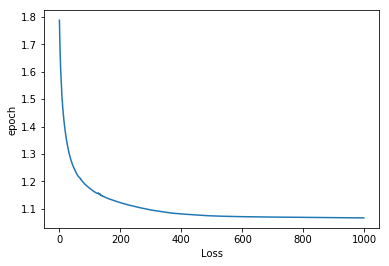

In [91]:
# Plotting Losses at Various Epochs
plt.plot(range(epochs), losses)
plt.xlabel('Loss')
plt.ylabel('epoch')

In [98]:
model.predict(X_test)

array([2, 2], dtype=int64)

In [100]:
len(X_test)

84

In [32]:
w = np.array([[1,2,3],[4,5,6]])

In [33]:
w

array([[1, 2, 3],
       [4, 5, 6]])

In [37]:
np.argmax(w,axis=1)

array([2, 2], dtype=int64)

In [34]:
class ClassifierModule(nn.Module):
    def __init__(self, input_dim=X_train.shape[1], hidden_dim=100, output_dim=len(le.classes_), dropout=0.5,):
        super(ClassifierModule, self).__init__()
        self.dropout = nn.Dropout(dropout)

        self.hidden = nn.Linear(input_dim, hidden_dim)
        self.output = nn.Linear(hidden_dim, output_dim)

    def forward(self, X, **kwargs):
        X = F.relu(self.hidden(X))
        X = self.dropout(X)
        X = F.softmax(self.output(X), dim=-1)
        return X

In [35]:
torch.manual_seed(0)

net = NeuralNetClassifier(
    ClassifierModule,
    max_epochs=100,
    lr=0.005,
)

In [36]:
net.fit(X_train.astype(np.float32), y_actual);

  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        1.8150       0.1688        1.7834  0.0280
      2        1.7863       0.1818        1.7735  0.0290
      3        1.7887       0.1883        1.7636  0.0292
      4        1.7740       0.2078        1.7539  0.0305
      5        1.7754       0.2338        1.7444  0.0302
      6        1.7544       0.2403        1.7349  0.0281
      7        1.7306       0.2597        1.7256  0.0302
      8        1.7242       0.2922        1.7165  0.0277
      9        1.7163       0.3182        1.7075  0.0337
     10        1.6919       0.3571        1.6985  0.0302
     11        1.7058       0.3636        1.6897  0.0302
     12        1.6995       0.3766        1.6809  0.0295
     13        1.6847       0.3896        1.6724  0.0340
     14        1.6735       0.4091        1.6639  0.0280
     15        1.6580       0.4221        1.6555  0.0302
     16        1.6645       0.4

In [37]:
y_pred = net.predict(X_test.astype(np.float32))

In [38]:
from sklearn.metrics import accuracy_score

In [39]:
accuracy_score(y_actual2, y_pred)

0.47619047619047616

In [40]:
confusion_matrix(y_actual2, y_pred)

array([[ 0,  3,  1,  0,  0, 10],
       [ 0,  8,  0,  0,  0,  3],
       [ 0,  5,  5,  2,  0,  3],
       [ 0,  1,  0, 11,  0,  0],
       [ 0,  5,  0,  0,  0,  9],
       [ 0,  2,  0,  0,  0, 16]], dtype=int64)